# Validating NN Model

Using validation curves to validate the model performance 

In [1]:
import activation_functions
import loss_functions
import process_MNIST
from init_NN_val import NeuralNetwork
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

#local path to files 
training_images_path =  'training_data/train-images.idx3-ubyte'
training_labels_path =  'training_data/train-labels.idx1-ubyte'
test_images_path = 'test_data/t10k-images.idx3-ubyte'
test_labels_path =  'test_data/t10k-labels.idx1-ubyte'


#Loads MNIST data files. Assumes unzipped idx files avilable at: http://yann.lecun.com/exdb/mnist/
training_images, training_labels = process_MNIST.load_data(training_images_path, training_labels_path)
test_images, test_labels = process_MNIST.load_data(test_images_path, test_labels_path)

In [2]:
lr = 0.01
lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns

nn_lr01_sgd = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy, lr)
losses = nn_lr01_sgd.train(training_images, training_labels, epochs = 10, batch_size=1) #, debug=True, info_skip=1000)
nn_lr01_sgd_cross_ent_error, nn_lr001_sgd_classification_error = nn_lr01_sgd.test(test_images, test_labels)

 10%|█         | 1/10 [02:04<18:44, 124.93s/it]

epoch loss:  2.4735600645951563


 20%|██        | 2/10 [03:57<15:39, 117.41s/it]

epoch loss:  1.9712423830308232


 30%|███       | 3/10 [05:52<13:34, 116.33s/it]

epoch loss:  1.9304041710195552


 40%|████      | 4/10 [07:17<10:25, 104.19s/it]

epoch loss:  1.911262486021752


 50%|█████     | 5/10 [08:58<08:34, 102.85s/it]

epoch loss:  1.8368770522301803


 60%|██████    | 6/10 [10:57<07:13, 108.28s/it]

epoch loss:  1.7758353141653775


 70%|███████   | 7/10 [12:42<05:21, 107.25s/it]

epoch loss:  1.746982074057816


 80%|████████  | 8/10 [14:15<03:25, 102.84s/it]

epoch loss:  1.6652930840906934


 90%|█████████ | 9/10 [15:46<01:39, 99.06s/it] 

epoch loss:  1.5364022449175432


100%|██████████| 10/10 [17:14<00:00, 103.48s/it]


epoch loss:  1.3458530571066227
Average cross entropy loss: 2.6089352461600157
Classification accuracy: 42.699999999999996%


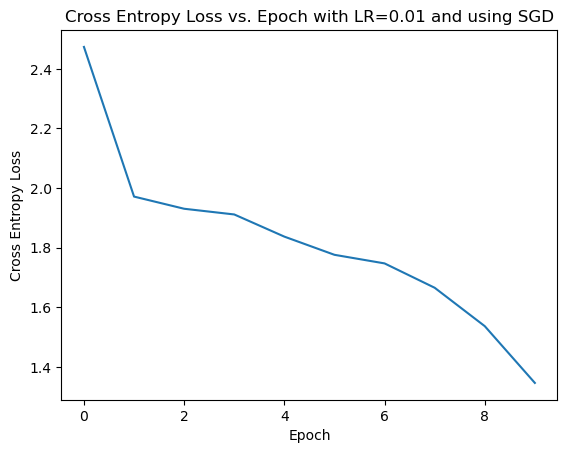

In [3]:
plt.plot(losses)
# plt.ylim(0, 1.5)
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy Loss')
plt.title('Cross Entropy Loss vs. Epoch with LR=0.01 and using SGD')
plt.show()

In [4]:
error_summary = stats.describe(nn_lr01_sgd_cross_ent_error)
print("mean: ", np.mean(nn_lr01_sgd_cross_ent_error))
print("median: ", np.median(nn_lr01_sgd_cross_ent_error))
print("min: ", np.min(nn_lr01_sgd_cross_ent_error))
print("max: ", np.max(nn_lr01_sgd_cross_ent_error))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(nn_lr01_sgd_cross_ent_error, q=[10, 25, 50, 75, 90]))

mean:  1.770653639244361
median:  1.770653639244361
min:  -0.0
max:  76.50573412601024


In [4]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import torch.optim as optim
from torch.utils.data import Dataset
import process_MNIST
from init_Pytorch_NN import FeedForwardNN

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

batch_size = 1

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


#Define NN architecture. Input size (first layer) and output size (last layer) can't change.
#Will have linear activation functions between each layer, and ReLU activation functions after 
#each linear activation function except between last hidden layer and output layer. 
# lsize = [784, 128, 64, 10] #e.g. this structure will have 3 linear activation functions and 2 ReLU fcns
input_size = 784  # Example: 28x28 pixels for MNIST dataset
hidden_size = [128, 64]
num_classes = 10  # Example: Number of classes for MNIST dataset
learning_rate = 0.01
num_epochs = 10

#initialize NN 
# nn = NeuralNetwork(lsize, activation_functions.ReLU, activation_functions.dReLU, loss_functions.cross_entropy_w_softmax, loss_functions.dcross_entropy)
model = FeedForwardNN(input_size, hidden_size, num_classes)

##train NN (example uses mini-batch)
# nn.train(training_images, training_labels, epochs = 10, batch_size=1)
# model.train(num_epochs, batch_size=1, learning_rate=learning_rate,  training_data=training_data)
model.train(num_epochs, batch_size=input_size, learning_rate=learning_rate,  train_dataloader=train_dataloader)
#gradient descent means batch size = # training samples (# steps you take = # epochs)
#stochastic gradient descent means batch size = 1


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10], Step [100/60000], Loss: 2.2181
Epoch [1/10], Step [200/60000], Loss: 1.9082


Epoch [1/10], Step [300/60000], Loss: 2.1544
Epoch [1/10], Step [400/60000], Loss: 2.1481


Epoch [1/10], Step [500/60000], Loss: 2.3281
Epoch [1/10], Step [600/60000], Loss: 1.8605
Epoch [1/10], Step [700/60000], Loss: 2.2360


Epoch [1/10], Step [800/60000], Loss: 1.8901
Epoch [1/10], Step [900/60000], Loss: 0.3452


Epoch [1/10], Step [1000/60000], Loss: 1.4722
Epoch [1/10], Step [1100/60000], Loss: 0.2362
Epoch [1/10], Step [1200/60000], Loss: 0.9186


Epoch [1/10], Step [1300/60000], Loss: 0.0343
Epoch [1/10], Step [1400/60000], Loss: 2.3560
Epoch [1/10], Step [1500/60000], Loss: 0.6485


Epoch [1/10], Step [1600/60000], Loss: 0.3155
Epoch [1/10], Step [1700/60000], Loss: 0.6207


1772it [00:01, 959.30it/s]

Epoch [1/10], Step [1800/60000], Loss: 0.9117
Epoch [1/10], Step [1900/60000], Loss: 0.4260
Epoch [1/10], Step [2000/60000], Loss: 0.0925


Epoch [1/10], Step [2100/60000], Loss: 1.3161
Epoch [1/10], Step [2200/60000], Loss: 0.4122


Epoch [1/10], Step [2300/60000], Loss: 0.0006
Epoch [1/10], Step [2400/60000], Loss: 0.1314
Epoch [1/10], Step [2500/60000], Loss: 1.1362


2508it [00:02, 1001.57it/s]

Epoch [1/10], Step [2600/60000], Loss: 0.0243
Epoch [1/10], Step [2700/60000], Loss: 0.5028


Epoch [1/10], Step [2800/60000], Loss: 0.0720
Epoch [1/10], Step [2900/60000], Loss: 0.9079


Epoch [1/10], Step [3000/60000], Loss: 3.7493
Epoch [1/10], Step [3100/60000], Loss: 1.4133


3190it [00:03, 938.65it/s]

Epoch [1/10], Step [3200/60000], Loss: 0.2640
Epoch [1/10], Step [3300/60000], Loss: 0.1489


Epoch [1/10], Step [3400/60000], Loss: 0.0140
Epoch [1/10], Step [3500/60000], Loss: 0.2166


Epoch [1/10], Step [3600/60000], Loss: 0.0695
Epoch [1/10], Step [3700/60000], Loss: 0.0037
Epoch [1/10], Step [3800/60000], Loss: 0.1411


3802it [00:03, 998.87it/s]


Epoch [1/10], Step [3900/60000], Loss: 8.2957
Epoch [1/10], Step [4000/60000], Loss: 0.0203
Epoch [1/10], Step [4100/60000], Loss: 0.3994


4105it [00:04, 941.57it/s]

Epoch [1/10], Step [4200/60000], Loss: 7.2595
Epoch [1/10], Step [4300/60000], Loss: 4.7762


Epoch [1/10], Step [4400/60000], Loss: 0.1678
Epoch [1/10], Step [4500/60000], Loss: 0.8604


Epoch [1/10], Step [4600/60000], Loss: 0.0340
Epoch [1/10], Step [4700/60000], Loss: 0.0942
Epoch [1/10], Step [4800/60000], Loss: 0.0316


Epoch [1/10], Step [4900/60000], Loss: 0.0596
Epoch [1/10], Step [5000/60000], Loss: 1.0562
Epoch [1/10], Step [5100/60000], Loss: 0.0720


Epoch [1/10], Step [5200/60000], Loss: 0.0702
Epoch [1/10], Step [5300/60000], Loss: 0.4955
Epoch [1/10], Step [5400/60000], Loss: 0.0026


Epoch [1/10], Step [5500/60000], Loss: 0.0253
Epoch [1/10], Step [5600/60000], Loss: 0.0091


Epoch [1/10], Step [5700/60000], Loss: 0.0045
Epoch [1/10], Step [5800/60000], Loss: 1.7736
Epoch [1/10], Step [5900/60000], Loss: 7.2277


Epoch [1/10], Step [6000/60000], Loss: 2.8503
Epoch [1/10], Step [6100/60000], Loss: 1.1019


6158it [00:06, 906.73it/s]

Epoch [1/10], Step [6200/60000], Loss: 0.0273
Epoch [1/10], Step [6300/60000], Loss: 1.7317
Epoch [1/10], Step [6400/60000], Loss: 0.0528


Epoch [1/10], Step [6500/60000], Loss: 0.0132
Epoch [1/10], Step [6600/60000], Loss: 3.4192


Epoch [1/10], Step [6700/60000], Loss: 0.0714
Epoch [1/10], Step [6800/60000], Loss: 0.1704
Epoch [1/10], Step [6900/60000], Loss: 0.5746


Epoch [1/10], Step [7000/60000], Loss: 1.7749
Epoch [1/10], Step [7100/60000], Loss: 0.2396


7180it [00:07, 999.20it/s] 

Epoch [1/10], Step [7200/60000], Loss: 0.2312
Epoch [1/10], Step [7300/60000], Loss: 4.4441


Epoch [1/10], Step [7400/60000], Loss: 0.0040
Epoch [1/10], Step [7500/60000], Loss: 0.0031
Epoch [1/10], Step [7600/60000], Loss: 0.0104


7601it [00:07, 989.10it/s]

Epoch [1/10], Step [7700/60000], Loss: 0.0016
Epoch [1/10], Step [7800/60000], Loss: 2.6094


Epoch [1/10], Step [7900/60000], Loss: 0.1855
Epoch [1/10], Step [8000/60000], Loss: 0.0029
Epoch [1/10], Step [8100/60000], Loss: 0.0458


Epoch [1/10], Step [8200/60000], Loss: 0.0080
Epoch [1/10], Step [8300/60000], Loss: 0.0997


Epoch [1/10], Step [8400/60000], Loss: 0.4629
Epoch [1/10], Step [8500/60000], Loss: 0.0212
Epoch [1/10], Step [8600/60000], Loss: 0.0492


8620it [00:09, 995.22it/s]

Epoch [1/10], Step [8700/60000], Loss: 1.8736
Epoch [1/10], Step [8800/60000], Loss: 0.0737
Epoch [1/10], Step [8900/60000], Loss: 0.0849


Epoch [1/10], Step [9000/60000], Loss: 0.0006
Epoch [1/10], Step [9100/60000], Loss: 0.1333


Epoch [1/10], Step [9200/60000], Loss: 0.0044
Epoch [1/10], Step [9300/60000], Loss: 0.0636
Epoch [1/10], Step [9400/60000], Loss: 0.0017


Epoch [1/10], Step [9500/60000], Loss: 0.0013
Epoch [1/10], Step [9600/60000], Loss: 0.1333
Epoch [1/10], Step [9700/60000], Loss: 0.0189


Epoch [1/10], Step [9800/60000], Loss: 0.5223
Epoch [1/10], Step [9900/60000], Loss: 0.1065
Epoch [1/10], Step [10000/60000], Loss: 0.0846


Epoch [1/10], Step [10100/60000], Loss: 0.0229
Epoch [1/10], Step [10200/60000], Loss: 0.3756
Epoch [1/10], Step [10300/60000], Loss: 0.2089


Epoch [1/10], Step [10400/60000], Loss: 0.0406
Epoch [1/10], Step [10500/60000], Loss: 0.3854


10584it [00:11, 1003.31it/s]

Epoch [1/10], Step [10600/60000], Loss: 0.0020
Epoch [1/10], Step [10700/60000], Loss: 0.0028


Epoch [1/10], Step [10800/60000], Loss: 0.0054
Epoch [1/10], Step [10900/60000], Loss: 0.0090
Epoch [1/10], Step [11000/60000], Loss: 0.1076


Epoch [1/10], Step [11100/60000], Loss: 0.0028
Epoch [1/10], Step [11200/60000], Loss: 0.0079
Epoch [1/10], Step [11300/60000], Loss: 0.1520


11307it [00:11, 999.89it/s] 

Epoch [1/10], Step [11400/60000], Loss: 0.0080
Epoch [1/10], Step [11500/60000], Loss: 0.0336
Epoch [1/10], Step [11600/60000], Loss: 0.0000


Epoch [1/10], Step [11700/60000], Loss: 0.0007
Epoch [1/10], Step [11800/60000], Loss: 0.0096
Epoch [1/10], Step [11900/60000], Loss: 0.0359


11958it [00:12, 1090.35it/s]

Epoch [1/10], Step [12000/60000], Loss: 0.0386
Epoch [1/10], Step [12100/60000], Loss: 0.0001
Epoch [1/10], Step [12200/60000], Loss: 0.0067


Epoch [1/10], Step [12300/60000], Loss: 0.0024
Epoch [1/10], Step [12400/60000], Loss: 1.4619


Epoch [1/10], Step [12500/60000], Loss: 1.7194
Epoch [1/10], Step [12600/60000], Loss: 0.0010
Epoch [1/10], Step [12700/60000], Loss: 0.0075


12714it [00:13, 1011.50it/s]

Epoch [1/10], Step [12800/60000], Loss: 0.0265
Epoch [1/10], Step [12900/60000], Loss: 2.2019


Epoch [1/10], Step [13000/60000], Loss: 0.0396
Epoch [1/10], Step [13100/60000], Loss: 0.0012
Epoch [1/10], Step [13200/60000], Loss: 0.0094


Epoch [1/10], Step [13300/60000], Loss: 0.0160
Epoch [1/10], Step [13400/60000], Loss: 0.0001


Epoch [1/10], Step [13500/60000], Loss: 0.2173
Epoch [1/10], Step [13600/60000], Loss: 0.0002


Epoch [1/10], Step [13700/60000], Loss: 0.0000
Epoch [1/10], Step [13800/60000], Loss: 0.0008
Epoch [1/10], Step [13900/60000], Loss: 0.0006


Epoch [1/10], Step [14000/60000], Loss: 0.2180
Epoch [1/10], Step [14100/60000], Loss: 0.0170
Epoch [1/10], Step [14200/60000], Loss: 0.3593


Epoch [1/10], Step [14300/60000], Loss: 0.0000
Epoch [1/10], Step [14400/60000], Loss: 0.0013
Epoch [1/10], Step [14500/60000], Loss: 0.0012


Epoch [1/10], Step [14600/60000], Loss: 0.0024
Epoch [1/10], Step [14700/60000], Loss: 0.0000


14795it [00:15, 1017.10it/s]

Epoch [1/10], Step [14800/60000], Loss: 0.4617
Epoch [1/10], Step [14900/60000], Loss: 0.0227


Epoch [1/10], Step [15000/60000], Loss: 0.0366
Epoch [1/10], Step [15100/60000], Loss: 0.0025


Epoch [1/10], Step [15200/60000], Loss: 0.0057
Epoch [1/10], Step [15300/60000], Loss: 0.2032
Epoch [1/10], Step [15400/60000], Loss: 0.1200


15402it [00:15, 965.02it/s]


Epoch [1/10], Step [15500/60000], Loss: 0.4651
Epoch [1/10], Step [15600/60000], Loss: 0.0042
Epoch [1/10], Step [15700/60000], Loss: 0.1099


15727it [00:16, 1042.93it/s]

Epoch [1/10], Step [15800/60000], Loss: 0.0018
Epoch [1/10], Step [15900/60000], Loss: 0.1785


Epoch [1/10], Step [16000/60000], Loss: 0.0002
Epoch [1/10], Step [16100/60000], Loss: 0.4274


Epoch [1/10], Step [16200/60000], Loss: 0.0655
Epoch [1/10], Step [16300/60000], Loss: 0.0054
Epoch [1/10], Step [16400/60000], Loss: 0.0567


Epoch [1/10], Step [16500/60000], Loss: 0.9624
Epoch [1/10], Step [16600/60000], Loss: 0.0049
Epoch [1/10], Step [16700/60000], Loss: 0.0005


Epoch [1/10], Step [16800/60000], Loss: 0.1619
Epoch [1/10], Step [16900/60000], Loss: 0.0001


Epoch [1/10], Step [17000/60000], Loss: 0.0088
Epoch [1/10], Step [17100/60000], Loss: 0.8881


17178it [00:17, 928.07it/s]

Epoch [1/10], Step [17200/60000], Loss: 0.0003
Epoch [1/10], Step [17300/60000], Loss: 0.0020
Epoch [1/10], Step [17400/60000], Loss: 0.0624


Epoch [1/10], Step [17500/60000], Loss: 0.4244
Epoch [1/10], Step [17600/60000], Loss: 0.1054


Epoch [1/10], Step [17700/60000], Loss: 0.0007
Epoch [1/10], Step [17800/60000], Loss: 0.0621
Epoch [1/10], Step [17900/60000], Loss: 0.0042


Epoch [1/10], Step [18000/60000], Loss: 0.0057
Epoch [1/10], Step [18100/60000], Loss: 0.0004
Epoch [1/10], Step [18200/60000], Loss: 0.0182


Epoch [1/10], Step [18300/60000], Loss: 2.1195
Epoch [1/10], Step [18400/60000], Loss: 0.0001


Epoch [1/10], Step [18500/60000], Loss: 0.0294
Epoch [1/10], Step [18600/60000], Loss: 0.0003


18695it [00:19, 942.48it/s]


Epoch [1/10], Step [18700/60000], Loss: 0.0008
Epoch [1/10], Step [18800/60000], Loss: 0.0035


18893it [00:19, 967.83it/s]

Epoch [1/10], Step [18900/60000], Loss: 0.0015
Epoch [1/10], Step [19000/60000], Loss: 0.0007
Epoch [1/10], Step [19100/60000], Loss: 2.2851


Epoch [1/10], Step [19200/60000], Loss: 0.0011
Epoch [1/10], Step [19300/60000], Loss: 0.0072


Epoch [1/10], Step [19400/60000], Loss: 0.0093
Epoch [1/10], Step [19500/60000], Loss: 0.0390


Epoch [1/10], Step [19600/60000], Loss: 0.0027
Epoch [1/10], Step [19700/60000], Loss: 0.0012


Epoch [1/10], Step [19800/60000], Loss: 0.3081
Epoch [1/10], Step [19900/60000], Loss: 0.0033
Epoch [1/10], Step [20000/60000], Loss: 0.0256


Epoch [1/10], Step [20100/60000], Loss: 0.8574
Epoch [1/10], Step [20200/60000], Loss: 0.0028


Epoch [1/10], Step [20300/60000], Loss: 0.0531
Epoch [1/10], Step [20400/60000], Loss: 0.0011


20441it [00:21, 798.26it/s]

Epoch [1/10], Step [20500/60000], Loss: 0.0001
Epoch [1/10], Step [20600/60000], Loss: 0.0050


Epoch [1/10], Step [20700/60000], Loss: 1.5823
Epoch [1/10], Step [20800/60000], Loss: 0.0016


Epoch [1/10], Step [20900/60000], Loss: 0.0006
Epoch [1/10], Step [21000/60000], Loss: 0.0670


21094it [00:21, 909.63it/s]

Epoch [1/10], Step [21100/60000], Loss: 0.0019
Epoch [1/10], Step [21200/60000], Loss: 0.0039


Epoch [1/10], Step [21300/60000], Loss: 0.0008
Epoch [1/10], Step [21400/60000], Loss: 0.0039


Epoch [1/10], Step [21500/60000], Loss: 0.0517
Epoch [1/10], Step [21600/60000], Loss: 0.1001


Epoch [1/10], Step [21700/60000], Loss: 0.0152
Epoch [1/10], Step [21800/60000], Loss: 1.5297


21873it [00:22, 879.10it/s]

Epoch [1/10], Step [21900/60000], Loss: 0.7730
Epoch [1/10], Step [22000/60000], Loss: 0.0048


Epoch [1/10], Step [22100/60000], Loss: 0.0008
Epoch [1/10], Step [22200/60000], Loss: 0.0044


Epoch [1/10], Step [22300/60000], Loss: 0.1879
Epoch [1/10], Step [22400/60000], Loss: 0.0110


Epoch [1/10], Step [22500/60000], Loss: 0.0054
Epoch [1/10], Step [22600/60000], Loss: 0.0049


Epoch [1/10], Step [22700/60000], Loss: 0.0082
Epoch [1/10], Step [22800/60000], Loss: 0.0001


Epoch [1/10], Step [22900/60000], Loss: 0.0002
Epoch [1/10], Step [23000/60000], Loss: 0.0056


23094it [00:24, 932.97it/s]

Epoch [1/10], Step [23100/60000], Loss: 0.7966
Epoch [1/10], Step [23200/60000], Loss: 0.3363


Epoch [1/10], Step [23300/60000], Loss: 0.0002
Epoch [1/10], Step [23400/60000], Loss: 0.0007


23477it [00:24, 949.95it/s]

Epoch [1/10], Step [23500/60000], Loss: 0.0010
Epoch [1/10], Step [23600/60000], Loss: 0.0093
Epoch [1/10], Step [23700/60000], Loss: 0.4588


Epoch [1/10], Step [23800/60000], Loss: 4.6255
Epoch [1/10], Step [23900/60000], Loss: 0.0306


Epoch [1/10], Step [24000/60000], Loss: 0.0138
Epoch [1/10], Step [24100/60000], Loss: 0.0022


Epoch [1/10], Step [24200/60000], Loss: 0.4719
Epoch [1/10], Step [24300/60000], Loss: 0.0003


Epoch [1/10], Step [24400/60000], Loss: 0.0115
Epoch [1/10], Step [24500/60000], Loss: 0.0003


24594it [00:25, 913.08it/s]


Epoch [1/10], Step [24600/60000], Loss: 0.7197
Epoch [1/10], Step [24700/60000], Loss: 0.0020


24785it [00:26, 931.26it/s]

Epoch [1/10], Step [24800/60000], Loss: 0.0010
Epoch [1/10], Step [24900/60000], Loss: 0.0326


Epoch [1/10], Step [25000/60000], Loss: 2.2146
Epoch [1/10], Step [25100/60000], Loss: 0.0003


Epoch [1/10], Step [25200/60000], Loss: 0.0079
Epoch [1/10], Step [25300/60000], Loss: 0.0132


25335it [00:26, 842.49it/s]

Epoch [1/10], Step [25400/60000], Loss: 0.0000
Epoch [1/10], Step [25500/60000], Loss: 0.0418


Epoch [1/10], Step [25600/60000], Loss: 0.0454
Epoch [1/10], Step [25700/60000], Loss: 0.0010


Epoch [1/10], Step [25800/60000], Loss: 0.0654
Epoch [1/10], Step [25900/60000], Loss: 0.0550


Epoch [1/10], Step [26000/60000], Loss: 0.0015
Epoch [1/10], Step [26100/60000], Loss: 0.0010


Epoch [1/10], Step [26200/60000], Loss: 0.0003
Epoch [1/10], Step [26300/60000], Loss: 0.0024


Epoch [1/10], Step [26400/60000], Loss: 0.0004
Epoch [1/10], Step [26500/60000], Loss: 0.0028
Epoch [1/10], Step [26600/60000], Loss: 0.0004


Epoch [1/10], Step [26700/60000], Loss: 0.1164
Epoch [1/10], Step [26800/60000], Loss: 0.0126
Epoch [1/10], Step [26900/60000], Loss: 0.2646


26925it [00:28, 994.72it/s]

Epoch [1/10], Step [27000/60000], Loss: 0.0034
Epoch [1/10], Step [27100/60000], Loss: 0.0005
Epoch [1/10], Step [27200/60000], Loss: 0.0088


Epoch [1/10], Step [27300/60000], Loss: 0.0026
Epoch [1/10], Step [27400/60000], Loss: 2.8949


Epoch [1/10], Step [27500/60000], Loss: 0.1421
Epoch [1/10], Step [27600/60000], Loss: 0.0000


27645it [00:29, 872.57it/s]

Epoch [1/10], Step [27700/60000], Loss: 0.0022
Epoch [1/10], Step [27800/60000], Loss: 0.0068
Epoch [1/10], Step [27900/60000], Loss: 0.0000


Epoch [1/10], Step [28000/60000], Loss: 0.0320
Epoch [1/10], Step [28100/60000], Loss: 0.0008
Epoch [1/10], Step [28200/60000], Loss: 0.1727


Epoch [1/10], Step [28300/60000], Loss: 0.0760
Epoch [1/10], Step [28400/60000], Loss: 0.0012


28446it [00:30, 905.83it/s]

Epoch [1/10], Step [28500/60000], Loss: 0.0028
Epoch [1/10], Step [28600/60000], Loss: 0.0188
Epoch [1/10], Step [28700/60000], Loss: 0.0116


Epoch [1/10], Step [28800/60000], Loss: 0.0001
Epoch [1/10], Step [28900/60000], Loss: 0.0001
Epoch [1/10], Step [29000/60000], Loss: 0.0124


Epoch [1/10], Step [29100/60000], Loss: 0.0061
Epoch [1/10], Step [29200/60000], Loss: 0.0001
Epoch [1/10], Step [29300/60000], Loss: 0.0000


Epoch [1/10], Step [29400/60000], Loss: 0.0000
Epoch [1/10], Step [29500/60000], Loss: 0.0021
Epoch [1/10], Step [29600/60000], Loss: 0.0766


Epoch [1/10], Step [29700/60000], Loss: 0.0114
Epoch [1/10], Step [29800/60000], Loss: 1.5940


Epoch [1/10], Step [29900/60000], Loss: 0.0003
Epoch [1/10], Step [30000/60000], Loss: 0.0073


Epoch [1/10], Step [30100/60000], Loss: 0.0004
Epoch [1/10], Step [30200/60000], Loss: 0.0015


Epoch [1/10], Step [30300/60000], Loss: 0.0020
Epoch [1/10], Step [30400/60000], Loss: 2.5955
Epoch [1/10], Step [30500/60000], Loss: 0.0001


Epoch [1/10], Step [30600/60000], Loss: 0.0008
Epoch [1/10], Step [30700/60000], Loss: 0.0004


Epoch [1/10], Step [30800/60000], Loss: 0.0263
Epoch [1/10], Step [30900/60000], Loss: 0.0058
Epoch [1/10], Step [31000/60000], Loss: 0.1056


Epoch [1/10], Step [31100/60000], Loss: 0.0026
Epoch [1/10], Step [31200/60000], Loss: 0.0053



31466it [00:33, 892.48it/s]

Epoch [1/10], Step [31300/60000], Loss: 0.0010
Epoch [1/10], Step [31400/60000], Loss: 6.4974


Epoch [1/10], Step [31500/60000], Loss: 1.6869
Epoch [1/10], Step [31600/60000], Loss: 3.2650


Epoch [1/10], Step [31700/60000], Loss: 0.1469
Epoch [1/10], Step [31800/60000], Loss: 0.0218


31827it [00:33, 821.75it/s]

Epoch [1/10], Step [31900/60000], Loss: 0.0007
Epoch [1/10], Step [32000/60000], Loss: 0.0048


Epoch [1/10], Step [32100/60000], Loss: 0.0431
Epoch [1/10], Step [32200/60000], Loss: 0.0549


Epoch [1/10], Step [32300/60000], Loss: 0.0618
Epoch [1/10], Step [32400/60000], Loss: 0.0055
Epoch [1/10], Step [32500/60000], Loss: 0.1930


Epoch [1/10], Step [32600/60000], Loss: 0.0016
Epoch [1/10], Step [32700/60000], Loss: 0.0567


32755it [00:34, 856.97it/s]

Epoch [1/10], Step [32800/60000], Loss: 0.0008
Epoch [1/10], Step [32900/60000], Loss: 0.0002
Epoch [1/10], Step [33000/60000], Loss: 0.0003


Epoch [1/10], Step [33100/60000], Loss: 0.0772
Epoch [1/10], Step [33200/60000], Loss: 0.0194


Epoch [1/10], Step [33300/60000], Loss: 0.0023
Epoch [1/10], Step [33400/60000], Loss: 0.0067
Epoch [1/10], Step [33500/60000], Loss: 0.0001


33526it [00:35, 939.95it/s]

Epoch [1/10], Step [33600/60000], Loss: 0.0001
Epoch [1/10], Step [33700/60000], Loss: 0.0622


Epoch [1/10], Step [33800/60000], Loss: 0.0024
Epoch [1/10], Step [33900/60000], Loss: 0.2952


Epoch [1/10], Step [34000/60000], Loss: 0.6802
Epoch [1/10], Step [34100/60000], Loss: 0.0016


Epoch [1/10], Step [34200/60000], Loss: 0.0000
Epoch [1/10], Step [34300/60000], Loss: 0.0009


Epoch [1/10], Step [34400/60000], Loss: 0.0002
Epoch [1/10], Step [34500/60000], Loss: 0.0003


Epoch [1/10], Step [34600/60000], Loss: 2.1680
Epoch [1/10], Step [34700/60000], Loss: 0.0016


Epoch [1/10], Step [34800/60000], Loss: 0.0176
Epoch [1/10], Step [34900/60000], Loss: 0.0804


Epoch [1/10], Step [35000/60000], Loss: 0.0018
Epoch [1/10], Step [35100/60000], Loss: 0.1889


Epoch [1/10], Step [35200/60000], Loss: 0.0000
Epoch [1/10], Step [35300/60000], Loss: 0.2483


Epoch [1/10], Step [35400/60000], Loss: 0.2546
Epoch [1/10], Step [35500/60000], Loss: 0.0000
Epoch [1/10], Step [35600/60000], Loss: 0.0039


35608it [00:37, 1023.13it/s]

Epoch [1/10], Step [35700/60000], Loss: 0.0040
Epoch [1/10], Step [35800/60000], Loss: 0.0015


Epoch [1/10], Step [35900/60000], Loss: 0.0012
Epoch [1/10], Step [36000/60000], Loss: 0.0002


Epoch [1/10], Step [36100/60000], Loss: 0.0641
Epoch [1/10], Step [36200/60000], Loss: 0.0027


36287it [00:38, 888.69it/s]

Epoch [1/10], Step [36300/60000], Loss: 1.2268
Epoch [1/10], Step [36400/60000], Loss: 0.0085
Epoch [1/10], Step [36500/60000], Loss: 0.0012


Epoch [1/10], Step [36600/60000], Loss: 0.0275
Epoch [1/10], Step [36700/60000], Loss: 0.0059


36796it [00:39, 968.23it/s]

Epoch [1/10], Step [36800/60000], Loss: 0.0059
Epoch [1/10], Step [36900/60000], Loss: 0.0017


Epoch [1/10], Step [37000/60000], Loss: 0.0007
Epoch [1/10], Step [37100/60000], Loss: 0.0001
Epoch [1/10], Step [37200/60000], Loss: 0.0001


37207it [00:39, 973.09it/s]

Epoch [1/10], Step [37300/60000], Loss: 1.0121
Epoch [1/10], Step [37400/60000], Loss: 0.0008
Epoch [1/10], Step [37500/60000], Loss: 0.0867


Epoch [1/10], Step [37600/60000], Loss: 0.0001
Epoch [1/10], Step [37700/60000], Loss: 0.0000



37947it [00:40, 930.55it/s] 

Epoch [1/10], Step [37800/60000], Loss: 0.0104
Epoch [1/10], Step [37900/60000], Loss: 0.0039


Epoch [1/10], Step [38000/60000], Loss: 0.0012
Epoch [1/10], Step [38100/60000], Loss: 0.0318
Epoch [1/10], Step [38200/60000], Loss: 0.0000


Epoch [1/10], Step [38300/60000], Loss: 0.0000
Epoch [1/10], Step [38400/60000], Loss: 1.0822
Epoch [1/10], Step [38500/60000], Loss: 0.4183


Epoch [1/10], Step [38600/60000], Loss: 0.1881
Epoch [1/10], Step [38700/60000], Loss: 0.0138


38763it [00:41, 908.22it/s]

Epoch [1/10], Step [38800/60000], Loss: 0.0023
Epoch [1/10], Step [38900/60000], Loss: 0.1611


Epoch [1/10], Step [39000/60000], Loss: 0.0001
Epoch [1/10], Step [39100/60000], Loss: 1.3345


Epoch [1/10], Step [39200/60000], Loss: 0.0019
Epoch [1/10], Step [39300/60000], Loss: 0.0222


39347it [00:41, 872.37it/s]


Epoch [1/10], Step [39400/60000], Loss: 0.0001
Epoch [1/10], Step [39500/60000], Loss: 0.0643


39521it [00:42, 759.38it/s]


Epoch [1/10], Step [39600/60000], Loss: 0.0004
Epoch [1/10], Step [39700/60000], Loss: 0.1353


39777it [00:42, 822.04it/s]


Epoch [1/10], Step [39800/60000], Loss: 0.0066
Epoch [1/10], Step [39900/60000], Loss: 0.0162


39953it [00:42, 823.55it/s]

Epoch [1/10], Step [40000/60000], Loss: 0.0006
Epoch [1/10], Step [40100/60000], Loss: 0.0159
Epoch [1/10], Step [40200/60000], Loss: 0.0003


Epoch [1/10], Step [40300/60000], Loss: 0.0002
Epoch [1/10], Step [40400/60000], Loss: 0.6605


Epoch [1/10], Step [40500/60000], Loss: 0.0002
Epoch [1/10], Step [40600/60000], Loss: 0.0043


Epoch [1/10], Step [40700/60000], Loss: 0.0000
Epoch [1/10], Step [40800/60000], Loss: 0.0215
Epoch [1/10], Step [40900/60000], Loss: 1.5580


Epoch [1/10], Step [41000/60000], Loss: 0.0070
Epoch [1/10], Step [41100/60000], Loss: 0.0137


Epoch [1/10], Step [41200/60000], Loss: 0.0049
Epoch [1/10], Step [41300/60000], Loss: 0.0002


Epoch [1/10], Step [41400/60000], Loss: 0.0004
Epoch [1/10], Step [41500/60000], Loss: 0.0035


41596it [00:44, 977.66it/s]


Epoch [1/10], Step [41600/60000], Loss: 0.0000
Epoch [1/10], Step [41700/60000], Loss: 0.0487
Epoch [1/10], Step [41800/60000], Loss: 0.0167


41803it [00:44, 1002.71it/s]

Epoch [1/10], Step [41900/60000], Loss: 0.0009
Epoch [1/10], Step [42000/60000], Loss: 0.0115
Epoch [1/10], Step [42100/60000], Loss: 0.9687


Epoch [1/10], Step [42200/60000], Loss: 0.0050
Epoch [1/10], Step [42300/60000], Loss: 0.0012
Epoch [1/10], Step [42400/60000], Loss: 0.0007


Epoch [1/10], Step [42500/60000], Loss: 0.0000
Epoch [1/10], Step [42600/60000], Loss: 0.0751
Epoch [1/10], Step [42700/60000], Loss: 0.0036


Epoch [1/10], Step [42800/60000], Loss: 0.0818
Epoch [1/10], Step [42900/60000], Loss: 0.0013


Epoch [1/10], Step [43000/60000], Loss: 0.0002
Epoch [1/10], Step [43100/60000], Loss: 0.0016


Epoch [1/10], Step [43200/60000], Loss: 0.0147
Epoch [1/10], Step [43300/60000], Loss: 0.0012


Epoch [1/10], Step [43400/60000], Loss: 0.0000
Epoch [1/10], Step [43500/60000], Loss: 0.0293


Epoch [1/10], Step [43600/60000], Loss: 0.0000
Epoch [1/10], Step [43700/60000], Loss: 0.0003


Epoch [1/10], Step [43800/60000], Loss: 0.3044
Epoch [1/10], Step [43900/60000], Loss: 0.1876


Epoch [1/10], Step [44000/60000], Loss: 0.0018
Epoch [1/10], Step [44100/60000], Loss: 0.0024
Epoch [1/10], Step [44200/60000], Loss: 0.0009


Epoch [1/10], Step [44300/60000], Loss: 0.0053
Epoch [1/10], Step [44400/60000], Loss: 0.1035


Epoch [1/10], Step [44500/60000], Loss: 0.0025
Epoch [1/10], Step [44600/60000], Loss: 0.0000


Epoch [1/10], Step [44700/60000], Loss: 0.0003
Epoch [1/10], Step [44800/60000], Loss: 0.0088


44840it [00:48, 859.29it/s]

Epoch [1/10], Step [44900/60000], Loss: 0.0012
Epoch [1/10], Step [45000/60000], Loss: 0.0000
Epoch [1/10], Step [45100/60000], Loss: 0.0000


Epoch [1/10], Step [45200/60000], Loss: 0.0011
Epoch [1/10], Step [45300/60000], Loss: 0.0346
Epoch [1/10], Step [45400/60000], Loss: 0.0001


45428it [00:48, 986.02it/s]

Epoch [1/10], Step [45500/60000], Loss: 0.0113
Epoch [1/10], Step [45600/60000], Loss: 0.0002


Epoch [1/10], Step [45700/60000], Loss: 0.0023
Epoch [1/10], Step [45800/60000], Loss: 0.0004
Epoch [1/10], Step [45900/60000], Loss: 0.0004


Epoch [1/10], Step [46000/60000], Loss: 0.0038
Epoch [1/10], Step [46100/60000], Loss: 0.0006


Epoch [1/10], Step [46200/60000], Loss: 0.0018
Epoch [1/10], Step [46300/60000], Loss: 0.0050


Epoch [1/10], Step [46400/60000], Loss: 1.9435
Epoch [1/10], Step [46500/60000], Loss: 0.0244


Epoch [1/10], Step [46600/60000], Loss: 0.0032
Epoch [1/10], Step [46700/60000], Loss: 0.1551


Epoch [1/10], Step [46800/60000], Loss: 0.0000
Epoch [1/10], Step [46900/60000], Loss: 0.1469


46986it [00:50, 921.58it/s]


Epoch [1/10], Step [47000/60000], Loss: 0.0318
Epoch [1/10], Step [47100/60000], Loss: 0.0173


47174it [00:50, 911.34it/s]

Epoch [1/10], Step [47200/60000], Loss: 0.0421
Epoch [1/10], Step [47300/60000], Loss: 0.0026


Epoch [1/10], Step [47400/60000], Loss: 0.0000
Epoch [1/10], Step [47500/60000], Loss: 0.2881


Epoch [1/10], Step [47600/60000], Loss: 0.0001
Epoch [1/10], Step [47700/60000], Loss: 0.0011


Epoch [1/10], Step [47800/60000], Loss: 0.0002
Epoch [1/10], Step [47900/60000], Loss: 0.0014


Epoch [1/10], Step [48000/60000], Loss: 0.0005
Epoch [1/10], Step [48100/60000], Loss: 0.0710


Epoch [1/10], Step [48200/60000], Loss: 0.0005
Epoch [1/10], Step [48300/60000], Loss: 0.0013


48377it [00:52, 824.20it/s]

Epoch [1/10], Step [48400/60000], Loss: 0.0001
Epoch [1/10], Step [48500/60000], Loss: 0.8897


Epoch [1/10], Step [48600/60000], Loss: 0.0715
Epoch [1/10], Step [48700/60000], Loss: 0.0010


Epoch [1/10], Step [48800/60000], Loss: 0.0009
Epoch [1/10], Step [48900/60000], Loss: 0.0015


Epoch [1/10], Step [49000/60000], Loss: 0.0014
Epoch [1/10], Step [49100/60000], Loss: 0.0006


Epoch [1/10], Step [49200/60000], Loss: 0.0117
Epoch [1/10], Step [49300/60000], Loss: 0.3983


49353it [00:53, 821.69it/s]

Epoch [1/10], Step [49400/60000], Loss: 0.0000
Epoch [1/10], Step [49500/60000], Loss: 0.0010


Epoch [1/10], Step [49600/60000], Loss: 0.0001
Epoch [1/10], Step [49700/60000], Loss: 0.0955


Epoch [1/10], Step [49800/60000], Loss: 0.0076
Epoch [1/10], Step [49900/60000], Loss: 0.0016


Epoch [1/10], Step [50000/60000], Loss: 0.0150
Epoch [1/10], Step [50100/60000], Loss: 0.0004


Epoch [1/10], Step [50200/60000], Loss: 0.0079
Epoch [1/10], Step [50300/60000], Loss: 0.0002


50367it [00:54, 895.72it/s]


Epoch [1/10], Step [50400/60000], Loss: 0.0484
Epoch [1/10], Step [50500/60000], Loss: 0.0055


50538it [00:54, 762.63it/s]

Epoch [1/10], Step [50600/60000], Loss: 0.0002
Epoch [1/10], Step [50700/60000], Loss: 0.0625


Epoch [1/10], Step [50800/60000], Loss: 0.0000
Epoch [1/10], Step [50900/60000], Loss: 0.0032


Epoch [1/10], Step [51000/60000], Loss: 0.0447
Epoch [1/10], Step [51100/60000], Loss: 0.0001


Epoch [1/10], Step [51200/60000], Loss: 0.0330
Epoch [1/10], Step [51300/60000], Loss: 0.0008


Epoch [1/10], Step [51400/60000], Loss: 0.0002
Epoch [1/10], Step [51500/60000], Loss: 0.0032


Epoch [1/10], Step [51600/60000], Loss: 0.0071
Epoch [1/10], Step [51700/60000], Loss: 0.0037


51788it [00:56, 881.15it/s]


Epoch [1/10], Step [51800/60000], Loss: 0.0002
Epoch [1/10], Step [51900/60000], Loss: 0.1174


51974it [00:56, 900.75it/s]

Epoch [1/10], Step [52000/60000], Loss: 0.0003
Epoch [1/10], Step [52100/60000], Loss: 0.0478


Epoch [1/10], Step [52200/60000], Loss: 0.0041
Epoch [1/10], Step [52300/60000], Loss: 0.0005


Epoch [1/10], Step [52400/60000], Loss: 0.0125
Epoch [1/10], Step [52500/60000], Loss: 0.1737


Epoch [1/10], Step [52600/60000], Loss: 0.0003
Epoch [1/10], Step [52700/60000], Loss: 0.0033


52778it [00:57, 842.02it/s]


Epoch [1/10], Step [52800/60000], Loss: 0.4939
Epoch [1/10], Step [52900/60000], Loss: 0.0004


52948it [00:57, 812.06it/s]

Epoch [1/10], Step [53000/60000], Loss: 0.2488
Epoch [1/10], Step [53100/60000], Loss: 0.0231


Epoch [1/10], Step [53200/60000], Loss: 0.0026
Epoch [1/10], Step [53300/60000], Loss: 0.0254


53393it [00:58, 883.06it/s]


Epoch [1/10], Step [53400/60000], Loss: 0.0041
Epoch [1/10], Step [53500/60000], Loss: 0.0000


53584it [00:58, 917.03it/s]


Epoch [1/10], Step [53600/60000], Loss: 0.0360
Epoch [1/10], Step [53700/60000], Loss: 0.0003


53771it [00:58, 912.67it/s]

Epoch [1/10], Step [53800/60000], Loss: 0.0708
Epoch [1/10], Step [53900/60000], Loss: 0.0004


Epoch [1/10], Step [54000/60000], Loss: 0.0043
Epoch [1/10], Step [54100/60000], Loss: 0.0367


Epoch [1/10], Step [54200/60000], Loss: 0.0451
Epoch [1/10], Step [54300/60000], Loss: 0.0162


Epoch [1/10], Step [54400/60000], Loss: 0.0061
Epoch [1/10], Step [54500/60000], Loss: 0.0082


Epoch [1/10], Step [54600/60000], Loss: 0.1422
Epoch [1/10], Step [54700/60000], Loss: 0.0002


Epoch [1/10], Step [54800/60000], Loss: 0.0356
Epoch [1/10], Step [54900/60000], Loss: 0.0018
Epoch [1/10], Step [55000/60000], Loss: 0.0003


Epoch [1/10], Step [55100/60000], Loss: 0.0012
Epoch [1/10], Step [55200/60000], Loss: 0.0718


Epoch [1/10], Step [55300/60000], Loss: 0.0068
Epoch [1/10], Step [55400/60000], Loss: 0.0000


Epoch [1/10], Step [55500/60000], Loss: 0.0192
Epoch [1/10], Step [55600/60000], Loss: 0.2481


Epoch [1/10], Step [55700/60000], Loss: 0.0392
Epoch [1/10], Step [55800/60000], Loss: 0.0122


Epoch [1/10], Step [55900/60000], Loss: 0.0063
Epoch [1/10], Step [56000/60000], Loss: 2.9040


Epoch [1/10], Step [56100/60000], Loss: 0.0021
Epoch [1/10], Step [56200/60000], Loss: 0.0002


Epoch [1/10], Step [56300/60000], Loss: 0.0007
Epoch [1/10], Step [56400/60000], Loss: 0.0000


Epoch [1/10], Step [56500/60000], Loss: 0.0019
Epoch [1/10], Step [56600/60000], Loss: 0.0053
Epoch [1/10], Step [56700/60000], Loss: 0.0005


56707it [01:01, 914.02it/s]

Epoch [1/10], Step [56800/60000], Loss: 0.0000
Epoch [1/10], Step [56900/60000], Loss: 0.0006


Epoch [1/10], Step [57000/60000], Loss: 0.0010
Epoch [1/10], Step [57100/60000], Loss: 0.0000


57149it [01:02, 791.82it/s]

Epoch [1/10], Step [57200/60000], Loss: 4.4539
Epoch [1/10], Step [57300/60000], Loss: 0.0033


Epoch [1/10], Step [57400/60000], Loss: 3.3428
Epoch [1/10], Step [57500/60000], Loss: 0.5463


Epoch [1/10], Step [57600/60000], Loss: 0.0000
Epoch [1/10], Step [57700/60000], Loss: 0.0093


Epoch [1/10], Step [57800/60000], Loss: 0.0005
Epoch [1/10], Step [57900/60000], Loss: 0.0029


57971it [01:03, 874.54it/s]

Epoch [1/10], Step [58000/60000], Loss: 0.0009
Epoch [1/10], Step [58100/60000], Loss: 0.0055


Epoch [1/10], Step [58200/60000], Loss: 0.1909
Epoch [1/10], Step [58300/60000], Loss: 0.0075


Epoch [1/10], Step [58400/60000], Loss: 0.0807
Epoch [1/10], Step [58500/60000], Loss: 0.0000


Epoch [1/10], Step [58600/60000], Loss: 0.2333
Epoch [1/10], Step [58700/60000], Loss: 0.0888


Epoch [1/10], Step [58800/60000], Loss: 0.0153
Epoch [1/10], Step [58900/60000], Loss: 0.0038


Epoch [1/10], Step [59000/60000], Loss: 0.0000
Epoch [1/10], Step [59100/60000], Loss: 0.2919
Epoch [1/10], Step [59200/60000], Loss: 1.7857


Epoch [1/10], Step [59300/60000], Loss: 0.0248
Epoch [1/10], Step [59400/60000], Loss: 0.0133


Epoch [1/10], Step [59500/60000], Loss: 0.0001
Epoch [1/10], Step [59600/60000], Loss: 0.0001


59639it [01:05, 774.22it/s]

Epoch [1/10], Step [59700/60000], Loss: 0.0027
Epoch [1/10], Step [59800/60000], Loss: 0.0000


60000it [01:05, 911.80it/s]
 10%|█         | 1/10 [01:05<09:52, 65.81s/it]

Epoch [1/10], Step [59900/60000], Loss: 0.0008
Epoch [1/10], Step [60000/60000], Loss: 0.0032


Epoch [2/10], Step [100/60000], Loss: 3.4657


Epoch [2/10], Step [200/60000], Loss: 0.0055
Epoch [2/10], Step [300/60000], Loss: 0.0292


Epoch [2/10], Step [400/60000], Loss: 0.0943
Epoch [2/10], Step [500/60000], Loss: 0.0003


Epoch [2/10], Step [600/60000], Loss: 0.0034
Epoch [2/10], Step [700/60000], Loss: 0.0000


Epoch [2/10], Step [800/60000], Loss: 0.0001
Epoch [2/10], Step [900/60000], Loss: 0.3398


Epoch [2/10], Step [1000/60000], Loss: 0.0002
Epoch [2/10], Step [1100/60000], Loss: 0.0001


Epoch [2/10], Step [1200/60000], Loss: 0.0007
Epoch [2/10], Step [1300/60000], Loss: 0.0002


Epoch [2/10], Step [1400/60000], Loss: 0.0023
Epoch [2/10], Step [1500/60000], Loss: 2.0097


1544it [00:02, 814.12it/s]

Epoch [2/10], Step [1600/60000], Loss: 0.0008
Epoch [2/10], Step [1700/60000], Loss: 0.1339


Epoch [2/10], Step [1800/60000], Loss: 0.0000
Epoch [2/10], Step [1900/60000], Loss: 0.0000


1973it [00:02, 847.75it/s]

Epoch [2/10], Step [2000/60000], Loss: 0.0000
Epoch [2/10], Step [2100/60000], Loss: 0.0003


Epoch [2/10], Step [2200/60000], Loss: 0.0002
Epoch [2/10], Step [2300/60000], Loss: 0.0002


Epoch [2/10], Step [2400/60000], Loss: 0.0000
Epoch [2/10], Step [2500/60000], Loss: 0.0000


Epoch [2/10], Step [2600/60000], Loss: 0.0001
Epoch [2/10], Step [2700/60000], Loss: 0.1233


Epoch [2/10], Step [2800/60000], Loss: 0.0002
Epoch [2/10], Step [2900/60000], Loss: 0.0000


2994it [00:03, 895.71it/s]


Epoch [2/10], Step [3000/60000], Loss: 0.0001
Epoch [2/10], Step [3100/60000], Loss: 0.0002


3181it [00:03, 916.95it/s]


Epoch [2/10], Step [3200/60000], Loss: 0.0295
Epoch [2/10], Step [3300/60000], Loss: 0.0131


3383it [00:04, 965.15it/s]

Epoch [2/10], Step [3400/60000], Loss: 0.0033
Epoch [2/10], Step [3500/60000], Loss: 0.0000



3756it [00:04, 867.12it/s]

Epoch [2/10], Step [3600/60000], Loss: 0.0001
Epoch [2/10], Step [3700/60000], Loss: 0.0046


Epoch [2/10], Step [3800/60000], Loss: 0.0002
Epoch [2/10], Step [3900/60000], Loss: 1.1826


Epoch [2/10], Step [4000/60000], Loss: 0.0000
Epoch [2/10], Step [4100/60000], Loss: 0.0012
Epoch [2/10], Step [4200/60000], Loss: 0.0001


Epoch [2/10], Step [4300/60000], Loss: 0.0002
Epoch [2/10], Step [4400/60000], Loss: 0.0036
Epoch [2/10], Step [4500/60000], Loss: 0.0001


Epoch [2/10], Step [4600/60000], Loss: 0.0240
Epoch [2/10], Step [4700/60000], Loss: 0.0231
Epoch [2/10], Step [4800/60000], Loss: 0.0001


Epoch [2/10], Step [4900/60000], Loss: 0.0001
Epoch [2/10], Step [5000/60000], Loss: 0.0066


Epoch [2/10], Step [5100/60000], Loss: 0.0000
Epoch [2/10], Step [5200/60000], Loss: 0.0000


Epoch [2/10], Step [5300/60000], Loss: 0.0011
Epoch [2/10], Step [5400/60000], Loss: 0.0000
Epoch [2/10], Step [5500/60000], Loss: 0.0175


Epoch [2/10], Step [5600/60000], Loss: 0.0001
Epoch [2/10], Step [5700/60000], Loss: 6.4714


Epoch [2/10], Step [5800/60000], Loss: 0.0002
Epoch [2/10], Step [5900/60000], Loss: 0.0000


Epoch [2/10], Step [6000/60000], Loss: 0.0000
Epoch [2/10], Step [6100/60000], Loss: 0.0395


Epoch [2/10], Step [6200/60000], Loss: 0.0378
Epoch [2/10], Step [6300/60000], Loss: 0.0029


Epoch [2/10], Step [6400/60000], Loss: 4.1293
Epoch [2/10], Step [6500/60000], Loss: 0.0002


6591it [00:07, 844.04it/s]

Epoch [2/10], Step [6600/60000], Loss: 0.0008
Epoch [2/10], Step [6700/60000], Loss: 0.0003


Epoch [2/10], Step [6800/60000], Loss: 0.0001
Epoch [2/10], Step [6900/60000], Loss: 0.0000


6972it [00:08, 889.29it/s]

Epoch [2/10], Step [7000/60000], Loss: 0.0003
Epoch [2/10], Step [7100/60000], Loss: 0.0032


Epoch [2/10], Step [7200/60000], Loss: 0.0001
Epoch [2/10], Step [7300/60000], Loss: 0.0001


7325it [00:08, 754.39it/s]


Epoch [2/10], Step [7400/60000], Loss: 0.0000
Epoch [2/10], Step [7500/60000], Loss: 0.0000


7592it [00:09, 852.34it/s]


Epoch [2/10], Step [7600/60000], Loss: 0.0002
Epoch [2/10], Step [7700/60000], Loss: 0.0394


7780it [00:09, 889.91it/s]

Epoch [2/10], Step [7800/60000], Loss: 4.8346
Epoch [2/10], Step [7900/60000], Loss: 0.0000
Epoch [2/10], Step [8000/60000], Loss: 0.0184


Epoch [2/10], Step [8100/60000], Loss: 0.0051
Epoch [2/10], Step [8200/60000], Loss: 0.0000
Epoch [2/10], Step [8300/60000], Loss: 0.2217


Epoch [2/10], Step [8400/60000], Loss: 0.0154
Epoch [2/10], Step [8500/60000], Loss: 0.0057


Epoch [2/10], Step [8600/60000], Loss: 0.0332
Epoch [2/10], Step [8700/60000], Loss: 0.0087


Epoch [2/10], Step [8800/60000], Loss: 0.0003
Epoch [2/10], Step [8900/60000], Loss: 0.0000


8978it [00:10, 870.61it/s]

Epoch [2/10], Step [9000/60000], Loss: 0.0253
Epoch [2/10], Step [9100/60000], Loss: 0.0399
Epoch [2/10], Step [9200/60000], Loss: 0.0927


Epoch [2/10], Step [9300/60000], Loss: 0.0004
Epoch [2/10], Step [9400/60000], Loss: 0.0027


9449it [00:11, 820.87it/s]

Epoch [2/10], Step [9500/60000], Loss: 1.9049
Epoch [2/10], Step [9600/60000], Loss: 0.0012


Epoch [2/10], Step [9700/60000], Loss: 0.0002
Epoch [2/10], Step [9800/60000], Loss: 0.0003


9851it [00:11, 765.14it/s]

Epoch [2/10], Step [9900/60000], Loss: 0.0024
Epoch [2/10], Step [10000/60000], Loss: 0.0002


Epoch [2/10], Step [10100/60000], Loss: 0.0008
Epoch [2/10], Step [10200/60000], Loss: 0.0006


Epoch [2/10], Step [10300/60000], Loss: 0.0000
Epoch [2/10], Step [10400/60000], Loss: 0.0001


Epoch [2/10], Step [10500/60000], Loss: 0.0001
Epoch [2/10], Step [10600/60000], Loss: 0.0002


Epoch [2/10], Step [10700/60000], Loss: 0.0000
Epoch [2/10], Step [10800/60000], Loss: 0.0001


Epoch [2/10], Step [10900/60000], Loss: 0.5710
Epoch [2/10], Step [11000/60000], Loss: 0.0011


Epoch [2/10], Step [11100/60000], Loss: 0.0000
Epoch [2/10], Step [11200/60000], Loss: 0.0073


Epoch [2/10], Step [11300/60000], Loss: 0.0001
Epoch [2/10], Step [11400/60000], Loss: 0.0008


Epoch [2/10], Step [11500/60000], Loss: 0.4951
Epoch [2/10], Step [11600/60000], Loss: 0.0019


11667it [00:14, 804.11it/s]

Epoch [2/10], Step [11700/60000], Loss: 0.0032
Epoch [2/10], Step [11800/60000], Loss: 0.0359


Epoch [2/10], Step [11900/60000], Loss: 0.0010
Epoch [2/10], Step [12000/60000], Loss: 0.0000


Epoch [2/10], Step [12100/60000], Loss: 0.0163
Epoch [2/10], Step [12200/60000], Loss: 0.0247


Epoch [2/10], Step [12300/60000], Loss: 0.0004
Epoch [2/10], Step [12400/60000], Loss: 0.0003


Epoch [2/10], Step [12500/60000], Loss: 0.0000
Epoch [2/10], Step [12600/60000], Loss: 0.0192


Epoch [2/10], Step [12700/60000], Loss: 0.0000
Epoch [2/10], Step [12800/60000], Loss: 0.0269


12845it [00:15, 781.06it/s]

Epoch [2/10], Step [12900/60000], Loss: 0.0033
Epoch [2/10], Step [13000/60000], Loss: 0.0274


Epoch [2/10], Step [13100/60000], Loss: 0.0001
Epoch [2/10], Step [13200/60000], Loss: 0.0000


Epoch [2/10], Step [13300/60000], Loss: 0.0000
Epoch [2/10], Step [13400/60000], Loss: 0.2509


Epoch [2/10], Step [13500/60000], Loss: 0.0000
Epoch [2/10], Step [13600/60000], Loss: 0.0002


Epoch [2/10], Step [13700/60000], Loss: 0.0025
Epoch [2/10], Step [13800/60000], Loss: 0.0009


Epoch [2/10], Step [13900/60000], Loss: 0.1584
Epoch [2/10], Step [14000/60000], Loss: 0.0006


Epoch [2/10], Step [14100/60000], Loss: 0.0141
Epoch [2/10], Step [14200/60000], Loss: 0.0000


Epoch [2/10], Step [14300/60000], Loss: 0.0459
Epoch [2/10], Step [14400/60000], Loss: 1.3497


14458it [00:17, 799.69it/s]


Epoch [2/10], Step [14500/60000], Loss: 0.0000
Epoch [2/10], Step [14600/60000], Loss: 0.0184


14625it [00:18, 724.90it/s]

Epoch [2/10], Step [14700/60000], Loss: 0.0118
Epoch [2/10], Step [14800/60000], Loss: 0.0000


Epoch [2/10], Step [14900/60000], Loss: 0.0027
Epoch [2/10], Step [15000/60000], Loss: 0.0000


Epoch [2/10], Step [15100/60000], Loss: 0.0000
Epoch [2/10], Step [15200/60000], Loss: 0.0000


Epoch [2/10], Step [15300/60000], Loss: 0.0002
Epoch [2/10], Step [15400/60000], Loss: 0.6196


Epoch [2/10], Step [15500/60000], Loss: 0.0081
Epoch [2/10], Step [15600/60000], Loss: 0.0002


Epoch [2/10], Step [15700/60000], Loss: 0.0005
Epoch [2/10], Step [15800/60000], Loss: 0.0027


Epoch [2/10], Step [15900/60000], Loss: 0.0001
Epoch [2/10], Step [16000/60000], Loss: 0.0009


16056it [00:20, 766.81it/s]

Epoch [2/10], Step [16100/60000], Loss: 0.0002
Epoch [2/10], Step [16200/60000], Loss: 0.0003


Epoch [2/10], Step [16300/60000], Loss: 0.0000
Epoch [2/10], Step [16400/60000], Loss: 0.1503


Epoch [2/10], Step [16500/60000], Loss: 0.0001
Epoch [2/10], Step [16600/60000], Loss: 0.0000


16650it [00:20, 819.72it/s]

Epoch [2/10], Step [16700/60000], Loss: 2.8119
Epoch [2/10], Step [16800/60000], Loss: 0.0003


Epoch [2/10], Step [16900/60000], Loss: 0.0000
Epoch [2/10], Step [17000/60000], Loss: 0.0000


17063it [00:21, 774.26it/s]

Epoch [2/10], Step [17100/60000], Loss: 0.0000
Epoch [2/10], Step [17200/60000], Loss: 0.0000


Epoch [2/10], Step [17300/60000], Loss: 0.0001
Epoch [2/10], Step [17400/60000], Loss: 0.0009


Epoch [2/10], Step [17500/60000], Loss: 0.0001
Epoch [2/10], Step [17600/60000], Loss: 0.0013


17662it [00:22, 850.02it/s]

Epoch [2/10], Step [17700/60000], Loss: 0.0001
Epoch [2/10], Step [17800/60000], Loss: 0.7816


Epoch [2/10], Step [17900/60000], Loss: 0.0061
Epoch [2/10], Step [18000/60000], Loss: 0.0015


Epoch [2/10], Step [18100/60000], Loss: 0.0391
Epoch [2/10], Step [18200/60000], Loss: 0.0000


Epoch [2/10], Step [18300/60000], Loss: 0.0001
Epoch [2/10], Step [18400/60000], Loss: 0.0003


18423it [00:23, 724.92it/s]

Epoch [2/10], Step [18500/60000], Loss: 0.0272
Epoch [2/10], Step [18600/60000], Loss: 0.0001


Epoch [2/10], Step [18700/60000], Loss: 0.0001
Epoch [2/10], Step [18800/60000], Loss: 0.0011


Epoch [2/10], Step [18900/60000], Loss: 0.0068
Epoch [2/10], Step [19000/60000], Loss: 0.0003


Epoch [2/10], Step [19100/60000], Loss: 0.0002
Epoch [2/10], Step [19200/60000], Loss: 0.0011


Epoch [2/10], Step [19300/60000], Loss: 0.0008
Epoch [2/10], Step [19400/60000], Loss: 0.0000


Epoch [2/10], Step [19500/60000], Loss: 0.0000
Epoch [2/10], Step [19600/60000], Loss: 0.0027


Epoch [2/10], Step [19700/60000], Loss: 0.0001
Epoch [2/10], Step [19800/60000], Loss: 0.0017


19854it [00:24, 770.84it/s]

Epoch [2/10], Step [19900/60000], Loss: 0.0010
Epoch [2/10], Step [20000/60000], Loss: 0.0028


Epoch [2/10], Step [20100/60000], Loss: 0.0002
Epoch [2/10], Step [20200/60000], Loss: 0.0000


Epoch [2/10], Step [20300/60000], Loss: 0.0000
Epoch [2/10], Step [20400/60000], Loss: 0.0000


20436it [00:25, 737.02it/s]

Epoch [2/10], Step [20500/60000], Loss: 0.0011
Epoch [2/10], Step [20600/60000], Loss: 0.0006


Epoch [2/10], Step [20700/60000], Loss: 0.5349
Epoch [2/10], Step [20800/60000], Loss: 0.1230


20894it [00:26, 887.84it/s]

Epoch [2/10], Step [20900/60000], Loss: 0.0003
Epoch [2/10], Step [21000/60000], Loss: 0.0102


Epoch [2/10], Step [21100/60000], Loss: 0.0001
Epoch [2/10], Step [21200/60000], Loss: 0.0054


21263it [00:26, 887.74it/s]


Epoch [2/10], Step [21300/60000], Loss: 0.0002
Epoch [2/10], Step [21400/60000], Loss: 0.0008


21441it [00:26, 816.31it/s]

Epoch [2/10], Step [21500/60000], Loss: 0.0007
Epoch [2/10], Step [21600/60000], Loss: 0.0001
Epoch [2/10], Step [21700/60000], Loss: 0.0002


Epoch [2/10], Step [21800/60000], Loss: 0.0220
Epoch [2/10], Step [21900/60000], Loss: 0.0000


Epoch [2/10], Step [22000/60000], Loss: 0.0087
Epoch [2/10], Step [22100/60000], Loss: 0.0134


Epoch [2/10], Step [22200/60000], Loss: 0.0634
Epoch [2/10], Step [22300/60000], Loss: 0.1592


Epoch [2/10], Step [22400/60000], Loss: 0.0000
Epoch [2/10], Step [22500/60000], Loss: 0.0002
Epoch [2/10], Step [22600/60000], Loss: 0.0000


Epoch [2/10], Step [22700/60000], Loss: 0.0036
Epoch [2/10], Step [22800/60000], Loss: 0.0004


Epoch [2/10], Step [22900/60000], Loss: 0.0713
Epoch [2/10], Step [23000/60000], Loss: 0.0023


Epoch [2/10], Step [23100/60000], Loss: 0.0001
Epoch [2/10], Step [23200/60000], Loss: 0.0001


Epoch [2/10], Step [23300/60000], Loss: 0.0000
Epoch [2/10], Step [23400/60000], Loss: 0.0002


Epoch [2/10], Step [23500/60000], Loss: 0.0945
Epoch [2/10], Step [23600/60000], Loss: 0.0077


23658it [00:29, 853.47it/s]

Epoch [2/10], Step [23700/60000], Loss: 0.0091
Epoch [2/10], Step [23800/60000], Loss: 0.1560
Epoch [2/10], Step [23900/60000], Loss: 0.0000


Epoch [2/10], Step [24000/60000], Loss: 0.0001
Epoch [2/10], Step [24100/60000], Loss: 0.6546


Epoch [2/10], Step [24200/60000], Loss: 0.0001
Epoch [2/10], Step [24300/60000], Loss: 0.0331


Epoch [2/10], Step [24400/60000], Loss: 0.0000
Epoch [2/10], Step [24500/60000], Loss: 0.0001


Epoch [2/10], Step [24600/60000], Loss: 0.0005
Epoch [2/10], Step [24700/60000], Loss: 0.0002


Epoch [2/10], Step [24800/60000], Loss: 0.3858
Epoch [2/10], Step [24900/60000], Loss: 0.0000


Epoch [2/10], Step [25000/60000], Loss: 0.0066
Epoch [2/10], Step [25100/60000], Loss: 0.1379


25189it [00:31, 861.17it/s]

Epoch [2/10], Step [25200/60000], Loss: 0.0322
Epoch [2/10], Step [25300/60000], Loss: 0.0025


Epoch [2/10], Step [25400/60000], Loss: 0.0005
Epoch [2/10], Step [25500/60000], Loss: 0.0001


Epoch [2/10], Step [25600/60000], Loss: 0.0000
Epoch [2/10], Step [25700/60000], Loss: 0.0001


25733it [00:31, 800.74it/s]

Epoch [2/10], Step [25800/60000], Loss: 0.0052
Epoch [2/10], Step [25900/60000], Loss: 0.0000


Epoch [2/10], Step [26000/60000], Loss: 0.0009
Epoch [2/10], Step [26100/60000], Loss: 0.0000


Epoch [2/10], Step [26200/60000], Loss: 0.0247
Epoch [2/10], Step [26300/60000], Loss: 0.0002


Epoch [2/10], Step [26400/60000], Loss: 0.0003
Epoch [2/10], Step [26500/60000], Loss: 2.0459


Epoch [2/10], Step [26600/60000], Loss: 0.0001
Epoch [2/10], Step [26700/60000], Loss: 0.0205


Epoch [2/10], Step [26800/60000], Loss: 0.0035
Epoch [2/10], Step [26900/60000], Loss: 0.0000


Epoch [2/10], Step [27000/60000], Loss: 0.0004
Epoch [2/10], Step [27100/60000], Loss: 0.0006


Epoch [2/10], Step [27200/60000], Loss: 0.0107
Epoch [2/10], Step [27300/60000], Loss: 0.0011


Epoch [2/10], Step [27400/60000], Loss: 0.0000
Epoch [2/10], Step [27500/60000], Loss: 0.0000


Epoch [2/10], Step [27600/60000], Loss: 0.0026
Epoch [2/10], Step [27700/60000], Loss: 0.0000


Epoch [2/10], Step [27800/60000], Loss: 0.0046
Epoch [2/10], Step [27900/60000], Loss: 0.0003


Epoch [2/10], Step [28000/60000], Loss: 0.0005
Epoch [2/10], Step [28100/60000], Loss: 0.0346


Epoch [2/10], Step [28200/60000], Loss: 0.0749
Epoch [2/10], Step [28300/60000], Loss: 0.3813


Epoch [2/10], Step [28400/60000], Loss: 0.0444
Epoch [2/10], Step [28500/60000], Loss: 0.0023


Epoch [2/10], Step [28600/60000], Loss: 0.2886
Epoch [2/10], Step [28700/60000], Loss: 0.0196


28707it [00:35, 640.64it/s]

Epoch [2/10], Step [28800/60000], Loss: 0.0002
Epoch [2/10], Step [28900/60000], Loss: 0.0001


Epoch [2/10], Step [29000/60000], Loss: 0.0042
Epoch [2/10], Step [29100/60000], Loss: 0.0303


Epoch [2/10], Step [29200/60000], Loss: 0.0005
Epoch [2/10], Step [29300/60000], Loss: 0.0007


Epoch [2/10], Step [29400/60000], Loss: 0.0000
Epoch [2/10], Step [29500/60000], Loss: 0.0006


Epoch [2/10], Step [29600/60000], Loss: 0.0000
Epoch [2/10], Step [29700/60000], Loss: 0.0154


29700it [00:37, 534.15it/s]

Epoch [2/10], Step [29800/60000], Loss: 0.0001
Epoch [2/10], Step [29900/60000], Loss: 0.0001


Epoch [2/10], Step [30000/60000], Loss: 0.0000
Epoch [2/10], Step [30100/60000], Loss: 4.8877


30124it [00:38, 610.18it/s]

Epoch [2/10], Step [30200/60000], Loss: 0.0000
Epoch [2/10], Step [30300/60000], Loss: 0.0003



30519it [00:38, 637.14it/s]

Epoch [2/10], Step [30400/60000], Loss: 0.0005
Epoch [2/10], Step [30500/60000], Loss: 0.0014


Epoch [2/10], Step [30600/60000], Loss: 0.0203
Epoch [2/10], Step [30700/60000], Loss: 0.0021


Epoch [2/10], Step [30800/60000], Loss: 0.0006
Epoch [2/10], Step [30900/60000], Loss: 0.0004


Epoch [2/10], Step [31000/60000], Loss: 0.0044
Epoch [2/10], Step [31100/60000], Loss: 0.0001


Epoch [2/10], Step [31200/60000], Loss: 0.0103
Epoch [2/10], Step [31300/60000], Loss: 0.0006


31349it [00:40, 651.27it/s]

Epoch [2/10], Step [31400/60000], Loss: 0.0000
Epoch [2/10], Step [31500/60000], Loss: 0.0000


Epoch [2/10], Step [31600/60000], Loss: 0.0292
Epoch [2/10], Step [31700/60000], Loss: 0.0019


Epoch [2/10], Step [31800/60000], Loss: 0.0017
Epoch [2/10], Step [31900/60000], Loss: 0.0091


Epoch [2/10], Step [32000/60000], Loss: 0.0001
Epoch [2/10], Step [32100/60000], Loss: 0.0046



32314it [00:41, 596.25it/s]

Epoch [2/10], Step [32200/60000], Loss: 0.0000
Epoch [2/10], Step [32300/60000], Loss: 0.0003


Epoch [2/10], Step [32400/60000], Loss: 0.0005
Epoch [2/10], Step [32500/60000], Loss: 0.0000


Epoch [2/10], Step [32600/60000], Loss: 0.0058
Epoch [2/10], Step [32700/60000], Loss: 9.3186


Epoch [2/10], Step [32800/60000], Loss: 0.0000
Epoch [2/10], Step [32900/60000], Loss: 0.0001


32911it [00:42, 646.24it/s]

Epoch [2/10], Step [33000/60000], Loss: 0.0000
Epoch [2/10], Step [33100/60000], Loss: 0.0180


Epoch [2/10], Step [33200/60000], Loss: 0.0000
Epoch [2/10], Step [33300/60000], Loss: 0.0001


Epoch [2/10], Step [33400/60000], Loss: 0.0024
Epoch [2/10], Step [33500/60000], Loss: 0.0000


Epoch [2/10], Step [33600/60000], Loss: 0.0000
Epoch [2/10], Step [33700/60000], Loss: 0.0002


Epoch [2/10], Step [33800/60000], Loss: 0.0005
Epoch [2/10], Step [33900/60000], Loss: 0.0002


Epoch [2/10], Step [34000/60000], Loss: 0.0000
Epoch [2/10], Step [34100/60000], Loss: 0.0218


Epoch [2/10], Step [34200/60000], Loss: 0.0157
Epoch [2/10], Step [34300/60000], Loss: 0.0082


34363it [00:44, 852.35it/s]

Epoch [2/10], Step [34400/60000], Loss: 2.3140
Epoch [2/10], Step [34500/60000], Loss: 0.0038


Epoch [2/10], Step [34600/60000], Loss: 0.0003
Epoch [2/10], Step [34700/60000], Loss: 0.0000


Epoch [2/10], Step [34800/60000], Loss: 0.0001
Epoch [2/10], Step [34900/60000], Loss: 0.0003


34955it [00:45, 804.33it/s]

Epoch [2/10], Step [35000/60000], Loss: 0.0001
Epoch [2/10], Step [35100/60000], Loss: 0.0135


Epoch [2/10], Step [35200/60000], Loss: 0.0175
Epoch [2/10], Step [35300/60000], Loss: 0.0049


35381it [00:45, 842.16it/s]


Epoch [2/10], Step [35400/60000], Loss: 0.0000
Epoch [2/10], Step [35500/60000], Loss: 0.0000


35550it [00:46, 823.40it/s]

Epoch [2/10], Step [35600/60000], Loss: 0.0003
Epoch [2/10], Step [35700/60000], Loss: 0.0012


Epoch [2/10], Step [35800/60000], Loss: 0.0002
Epoch [2/10], Step [35900/60000], Loss: 0.1760


35979it [00:46, 853.16it/s]

Epoch [2/10], Step [36000/60000], Loss: 1.3084
Epoch [2/10], Step [36100/60000], Loss: 0.0001


Epoch [2/10], Step [36200/60000], Loss: 0.0028
Epoch [2/10], Step [36300/60000], Loss: 1.6678


Epoch [2/10], Step [36400/60000], Loss: 0.0013
Epoch [2/10], Step [36500/60000], Loss: 0.0134


Epoch [2/10], Step [36600/60000], Loss: 0.0041
Epoch [2/10], Step [36700/60000], Loss: 0.0014


36761it [00:47, 852.25it/s]

Epoch [2/10], Step [36800/60000], Loss: 0.0004
Epoch [2/10], Step [36900/60000], Loss: 0.0024


Epoch [2/10], Step [37000/60000], Loss: 0.9613
Epoch [2/10], Step [37100/60000], Loss: 1.2160


Epoch [2/10], Step [37200/60000], Loss: 0.0065
Epoch [2/10], Step [37300/60000], Loss: 0.0002


Epoch [2/10], Step [37400/60000], Loss: 0.0000
Epoch [2/10], Step [37500/60000], Loss: 0.0001


Epoch [2/10], Step [37600/60000], Loss: 0.0002
Epoch [2/10], Step [37700/60000], Loss: 0.9532


37765it [00:48, 853.68it/s]


Epoch [2/10], Step [37800/60000], Loss: 0.0004
Epoch [2/10], Step [37900/60000], Loss: 0.0026


37937it [00:49, 751.58it/s]

Epoch [2/10], Step [38000/60000], Loss: 0.0142
Epoch [2/10], Step [38100/60000], Loss: 0.0040


Epoch [2/10], Step [38200/60000], Loss: 0.0001
Epoch [2/10], Step [38300/60000], Loss: 0.0017


38361it [00:49, 828.80it/s]

Epoch [2/10], Step [38400/60000], Loss: 0.0006
Epoch [2/10], Step [38500/60000], Loss: 0.0000


Epoch [2/10], Step [38600/60000], Loss: 0.0583
Epoch [2/10], Step [38700/60000], Loss: 0.0157


Epoch [2/10], Step [38800/60000], Loss: 0.0005
Epoch [2/10], Step [38900/60000], Loss: 0.0001


Epoch [2/10], Step [39000/60000], Loss: 0.0004
Epoch [2/10], Step [39100/60000], Loss: 0.0000


Epoch [2/10], Step [39200/60000], Loss: 0.0000
Epoch [2/10], Step [39300/60000], Loss: 0.0000


39312it [00:50, 732.61it/s]


Epoch [2/10], Step [39400/60000], Loss: 0.0002
Epoch [2/10], Step [39500/60000], Loss: 0.0012


39575it [00:51, 823.59it/s]

Epoch [2/10], Step [39600/60000], Loss: 0.0036
Epoch [2/10], Step [39700/60000], Loss: 0.0015


Epoch [2/10], Step [39800/60000], Loss: 0.0001
Epoch [2/10], Step [39900/60000], Loss: 0.5217


Epoch [2/10], Step [40000/60000], Loss: 0.0002
Epoch [2/10], Step [40100/60000], Loss: 0.0013


40182it [00:51, 839.49it/s]

Epoch [2/10], Step [40200/60000], Loss: 0.0013
Epoch [2/10], Step [40300/60000], Loss: 0.1407


Epoch [2/10], Step [40400/60000], Loss: 0.0014
Epoch [2/10], Step [40500/60000], Loss: 0.0008


Epoch [2/10], Step [40600/60000], Loss: 0.0013
Epoch [2/10], Step [40700/60000], Loss: 0.0003


Epoch [2/10], Step [40800/60000], Loss: 0.0004
Epoch [2/10], Step [40900/60000], Loss: 0.2306


Epoch [2/10], Step [41000/60000], Loss: 0.0083
Epoch [2/10], Step [41100/60000], Loss: 0.0146


41165it [00:52, 837.71it/s]

Epoch [2/10], Step [41200/60000], Loss: 0.0000
Epoch [2/10], Step [41300/60000], Loss: 0.0058


Epoch [2/10], Step [41400/60000], Loss: 0.0001
Epoch [2/10], Step [41500/60000], Loss: 0.0258


Epoch [2/10], Step [41600/60000], Loss: 0.0000
Epoch [2/10], Step [41700/60000], Loss: 0.0001


Epoch [2/10], Step [41800/60000], Loss: 0.0000
Epoch [2/10], Step [41900/60000], Loss: 0.0000


Epoch [2/10], Step [42000/60000], Loss: 0.0024
Epoch [2/10], Step [42100/60000], Loss: 0.0002


Epoch [2/10], Step [42200/60000], Loss: 0.0000
Epoch [2/10], Step [42300/60000], Loss: 0.0002


42388it [00:54, 798.47it/s]
42558it [00:54, 822.38it/s]

Epoch [2/10], Step [42400/60000], Loss: 0.0010
Epoch [2/10], Step [42500/60000], Loss: 0.0000


Epoch [2/10], Step [42600/60000], Loss: 0.0000
Epoch [2/10], Step [42700/60000], Loss: 0.0000


Epoch [2/10], Step [42800/60000], Loss: 0.0005
Epoch [2/10], Step [42900/60000], Loss: 0.0000


Epoch [2/10], Step [43000/60000], Loss: 0.0007
Epoch [2/10], Step [43100/60000], Loss: 0.0002


43156it [00:55, 775.02it/s]

Epoch [2/10], Step [43200/60000], Loss: 0.0000
Epoch [2/10], Step [43300/60000], Loss: 0.0004


Epoch [2/10], Step [43400/60000], Loss: 0.0000
Epoch [2/10], Step [43500/60000], Loss: 0.0001


Epoch [2/10], Step [43600/60000], Loss: 2.8220
Epoch [2/10], Step [43700/60000], Loss: 0.0007


43777it [00:56, 864.73it/s]

Epoch [2/10], Step [43800/60000], Loss: 0.0000
Epoch [2/10], Step [43900/60000], Loss: 1.6381


Epoch [2/10], Step [44000/60000], Loss: 0.0000
Epoch [2/10], Step [44100/60000], Loss: 0.0005


Epoch [2/10], Step [44200/60000], Loss: 0.0000
Epoch [2/10], Step [44300/60000], Loss: 0.0000


Epoch [2/10], Step [44400/60000], Loss: 0.0004
Epoch [2/10], Step [44500/60000], Loss: 0.0000


Epoch [2/10], Step [44600/60000], Loss: 0.0006
Epoch [2/10], Step [44700/60000], Loss: 0.0163


Epoch [2/10], Step [44800/60000], Loss: 0.0000
Epoch [2/10], Step [44900/60000], Loss: 0.0269


44951it [00:57, 766.93it/s]

Epoch [2/10], Step [45000/60000], Loss: 0.0370
Epoch [2/10], Step [45100/60000], Loss: 2.6744


Epoch [2/10], Step [45200/60000], Loss: 0.0000
Epoch [2/10], Step [45300/60000], Loss: 0.0002


45374it [00:58, 837.67it/s]
45548it [00:58, 837.63it/s]

Epoch [2/10], Step [45400/60000], Loss: 0.0001
Epoch [2/10], Step [45500/60000], Loss: 0.0000


Epoch [2/10], Step [45600/60000], Loss: 0.0006
Epoch [2/10], Step [45700/60000], Loss: 0.0020


Epoch [2/10], Step [45800/60000], Loss: 0.1248
Epoch [2/10], Step [45900/60000], Loss: 0.0160


Epoch [2/10], Step [46000/60000], Loss: 0.0001
Epoch [2/10], Step [46100/60000], Loss: 0.0137


Epoch [2/10], Step [46200/60000], Loss: 0.0000
Epoch [2/10], Step [46300/60000], Loss: 0.0002


Epoch [2/10], Step [46400/60000], Loss: 0.0000
Epoch [2/10], Step [46500/60000], Loss: 0.0000


Epoch [2/10], Step [46600/60000], Loss: 0.0000
Epoch [2/10], Step [46700/60000], Loss: 0.0007


Epoch [2/10], Step [46800/60000], Loss: 0.0013
Epoch [2/10], Step [46900/60000], Loss: 0.0570


Epoch [2/10], Step [47000/60000], Loss: 0.0000
Epoch [2/10], Step [47100/60000], Loss: 0.1464


47155it [01:00, 828.09it/s]

Epoch [2/10], Step [47200/60000], Loss: 0.0099
Epoch [2/10], Step [47300/60000], Loss: 0.0034


Epoch [2/10], Step [47400/60000], Loss: 0.0020
Epoch [2/10], Step [47500/60000], Loss: 0.0005


Epoch [2/10], Step [47600/60000], Loss: 0.0016
Epoch [2/10], Step [47700/60000], Loss: 0.4158


Epoch [2/10], Step [47800/60000], Loss: 0.0001
Epoch [2/10], Step [47900/60000], Loss: 0.0000


Epoch [2/10], Step [48000/60000], Loss: 0.0001
Epoch [2/10], Step [48100/60000], Loss: 0.0003


Epoch [2/10], Step [48200/60000], Loss: 0.0000
Epoch [2/10], Step [48300/60000], Loss: 0.0138


Epoch [2/10], Step [48400/60000], Loss: 0.0000
Epoch [2/10], Step [48500/60000], Loss: 0.7913


Epoch [2/10], Step [48600/60000], Loss: 0.0012
Epoch [2/10], Step [48700/60000], Loss: 0.0000


Epoch [2/10], Step [48800/60000], Loss: 0.0003
Epoch [2/10], Step [48900/60000], Loss: 0.0000


Epoch [2/10], Step [49000/60000], Loss: 0.0002
Epoch [2/10], Step [49100/60000], Loss: 0.0002


Epoch [2/10], Step [49200/60000], Loss: 0.0015
Epoch [2/10], Step [49300/60000], Loss: 0.0001


Epoch [2/10], Step [49400/60000], Loss: 0.0001
Epoch [2/10], Step [49500/60000], Loss: 0.0000


Epoch [2/10], Step [49600/60000], Loss: 0.0057
Epoch [2/10], Step [49700/60000], Loss: 0.0000


Epoch [2/10], Step [49800/60000], Loss: 0.0021
Epoch [2/10], Step [49900/60000], Loss: 1.1054



50129it [01:04, 760.66it/s]

Epoch [2/10], Step [50000/60000], Loss: 0.0000
Epoch [2/10], Step [50100/60000], Loss: 0.0000


Epoch [2/10], Step [50200/60000], Loss: 0.0000
Epoch [2/10], Step [50300/60000], Loss: 0.0059


50384it [01:04, 820.38it/s]


Epoch [2/10], Step [50400/60000], Loss: 0.0030
Epoch [2/10], Step [50500/60000], Loss: 0.0001


50559it [01:04, 846.84it/s]

Epoch [2/10], Step [50600/60000], Loss: 0.8425
Epoch [2/10], Step [50700/60000], Loss: 0.0001


Epoch [2/10], Step [50800/60000], Loss: 1.8990
Epoch [2/10], Step [50900/60000], Loss: 0.0006


Epoch [2/10], Step [51000/60000], Loss: 0.0014
Epoch [2/10], Step [51100/60000], Loss: 0.0003


Epoch [2/10], Step [51200/60000], Loss: 0.0025
Epoch [2/10], Step [51300/60000], Loss: 0.0001


Epoch [2/10], Step [51400/60000], Loss: 0.0131
Epoch [2/10], Step [51500/60000], Loss: 2.2659


Epoch [2/10], Step [51600/60000], Loss: 0.0002
Epoch [2/10], Step [51700/60000], Loss: 0.0001


Epoch [2/10], Step [51800/60000], Loss: 0.0003
Epoch [2/10], Step [51900/60000], Loss: 0.0021


Epoch [2/10], Step [52000/60000], Loss: 0.0007
Epoch [2/10], Step [52100/60000], Loss: 0.1022


52151it [01:06, 819.69it/s]


Epoch [2/10], Step [52200/60000], Loss: 0.0483
Epoch [2/10], Step [52300/60000], Loss: 0.0956


52319it [01:06, 751.41it/s]


Epoch [2/10], Step [52400/60000], Loss: 0.0002
Epoch [2/10], Step [52500/60000], Loss: 0.0004


52569it [01:07, 800.94it/s]

Epoch [2/10], Step [52600/60000], Loss: 0.0370
Epoch [2/10], Step [52700/60000], Loss: 0.0001


Epoch [2/10], Step [52800/60000], Loss: 0.0862
Epoch [2/10], Step [52900/60000], Loss: 0.0000


Epoch [2/10], Step [53000/60000], Loss: 0.0002
Epoch [2/10], Step [53100/60000], Loss: 0.0059


Epoch [2/10], Step [53200/60000], Loss: 0.0002
Epoch [2/10], Step [53300/60000], Loss: 0.0001


Epoch [2/10], Step [53400/60000], Loss: 0.0000
Epoch [2/10], Step [53500/60000], Loss: 1.5203


Epoch [2/10], Step [53600/60000], Loss: 0.0007
Epoch [2/10], Step [53700/60000], Loss: 0.0000


53766it [01:08, 755.89it/s]

Epoch [2/10], Step [53800/60000], Loss: 0.0002
Epoch [2/10], Step [53900/60000], Loss: 0.0010


Epoch [2/10], Step [54000/60000], Loss: 0.0016
Epoch [2/10], Step [54100/60000], Loss: 0.0002


Epoch [2/10], Step [54200/60000], Loss: 0.0057
Epoch [2/10], Step [54300/60000], Loss: 0.0001


Epoch [2/10], Step [54400/60000], Loss: 0.0866
Epoch [2/10], Step [54500/60000], Loss: 1.1306


54583it [01:09, 804.55it/s]


Epoch [2/10], Step [54600/60000], Loss: 0.0131
Epoch [2/10], Step [54700/60000], Loss: 0.0064


54751it [01:10, 795.53it/s]

Epoch [2/10], Step [54800/60000], Loss: 0.0010
Epoch [2/10], Step [54900/60000], Loss: 0.0001


Epoch [2/10], Step [55000/60000], Loss: 0.0000
Epoch [2/10], Step [55100/60000], Loss: 0.0002


Epoch [2/10], Step [55200/60000], Loss: 0.0000
Epoch [2/10], Step [55300/60000], Loss: 0.0006


Epoch [2/10], Step [55400/60000], Loss: 0.0005
Epoch [2/10], Step [55500/60000], Loss: 0.0029


Epoch [2/10], Step [55600/60000], Loss: 0.0000
Epoch [2/10], Step [55700/60000], Loss: 0.0000



55938it [01:11, 770.69it/s]

Epoch [2/10], Step [55800/60000], Loss: 0.0001
Epoch [2/10], Step [55900/60000], Loss: 0.0011


Epoch [2/10], Step [56000/60000], Loss: 0.0006
Epoch [2/10], Step [56100/60000], Loss: 0.0441


Epoch [2/10], Step [56200/60000], Loss: 0.0000
Epoch [2/10], Step [56300/60000], Loss: 0.0000


Epoch [2/10], Step [56400/60000], Loss: 0.0006
Epoch [2/10], Step [56500/60000], Loss: 0.0000


Epoch [2/10], Step [56600/60000], Loss: 0.0005
Epoch [2/10], Step [56700/60000], Loss: 0.0001


Epoch [2/10], Step [56800/60000], Loss: 3.9971
Epoch [2/10], Step [56900/60000], Loss: 0.0006


56930it [01:12, 754.69it/s]

Epoch [2/10], Step [57000/60000], Loss: 0.0155
Epoch [2/10], Step [57100/60000], Loss: 0.0000


Epoch [2/10], Step [57200/60000], Loss: 0.0021
Epoch [2/10], Step [57300/60000], Loss: 0.0000


57350it [01:13, 818.43it/s]


Epoch [2/10], Step [57400/60000], Loss: 0.0037
Epoch [2/10], Step [57500/60000], Loss: 0.0007


57509it [01:13, 670.74it/s]


Epoch [2/10], Step [57600/60000], Loss: 0.0059
Epoch [2/10], Step [57700/60000], Loss: 0.0000


57758it [01:13, 771.72it/s]

Epoch [2/10], Step [57800/60000], Loss: 0.0019
Epoch [2/10], Step [57900/60000], Loss: 0.0001


Epoch [2/10], Step [58000/60000], Loss: 0.0001
Epoch [2/10], Step [58100/60000], Loss: 0.0043


Epoch [2/10], Step [58200/60000], Loss: 0.0028
Epoch [2/10], Step [58300/60000], Loss: 0.0285


Epoch [2/10], Step [58400/60000], Loss: 0.2808
Epoch [2/10], Step [58500/60000], Loss: 0.0000


Epoch [2/10], Step [58600/60000], Loss: 0.0007
Epoch [2/10], Step [58700/60000], Loss: 0.0003


Epoch [2/10], Step [58800/60000], Loss: 0.0085
Epoch [2/10], Step [58900/60000], Loss: 0.0000


58938it [01:15, 755.68it/s]

Epoch [2/10], Step [59000/60000], Loss: 0.0001
Epoch [2/10], Step [59100/60000], Loss: 0.0035


Epoch [2/10], Step [59200/60000], Loss: 0.0001
Epoch [2/10], Step [59300/60000], Loss: 0.0001


Epoch [2/10], Step [59400/60000], Loss: 0.0012
Epoch [2/10], Step [59500/60000], Loss: 0.0004


Epoch [2/10], Step [59600/60000], Loss: 0.0016
Epoch [2/10], Step [59700/60000], Loss: 0.0106


Epoch [2/10], Step [59800/60000], Loss: 0.0011
Epoch [2/10], Step [59900/60000], Loss: 0.0031


60000it [01:16, 781.61it/s]
 20%|██        | 2/10 [02:22<09:38, 72.26s/it]

Epoch [2/10], Step [60000/60000], Loss: 0.0455


Epoch [3/10], Step [100/60000], Loss: 0.2315


Epoch [3/10], Step [200/60000], Loss: 0.0192


Epoch [3/10], Step [300/60000], Loss: 0.0003


Epoch [3/10], Step [400/60000], Loss: 0.0000


Epoch [3/10], Step [500/60000], Loss: 0.0001


Epoch [3/10], Step [600/60000], Loss: 0.0005


Epoch [3/10], Step [700/60000], Loss: 1.5968


Epoch [3/10], Step [800/60000], Loss: 0.0463



924it [00:01, 675.33it/s]

Epoch [3/10], Step [900/60000], Loss: 0.0009


Epoch [3/10], Step [1000/60000], Loss: 0.0001


Epoch [3/10], Step [1100/60000], Loss: 0.0002


1160it [00:01, 750.68it/s]

Epoch [3/10], Step [1200/60000], Loss: 0.1860


Epoch [3/10], Step [1300/60000], Loss: 0.0059


Epoch [3/10], Step [1400/60000], Loss: 0.0003


Epoch [3/10], Step [1500/60000], Loss: 0.0000


Epoch [3/10], Step [1600/60000], Loss: 0.0001


Epoch [3/10], Step [1700/60000], Loss: 0.4119


Epoch [3/10], Step [1800/60000], Loss: 0.0001


Epoch [3/10], Step [1900/60000], Loss: 0.0000


Epoch [3/10], Step [2000/60000], Loss: 0.1516


Epoch [3/10], Step [2100/60000], Loss: 0.0002


2152it [00:02, 772.80it/s]

Epoch [3/10], Step [2200/60000], Loss: 0.0017


Epoch [3/10], Step [2300/60000], Loss: 0.0007


Epoch [3/10], Step [2400/60000], Loss: 0.0057


Epoch [3/10], Step [2500/60000], Loss: 0.0017


Epoch [3/10], Step [2600/60000], Loss: 0.5289


Epoch [3/10], Step [2700/60000], Loss: 0.0028


Epoch [3/10], Step [2800/60000], Loss: 0.0018


Epoch [3/10], Step [2900/60000], Loss: 0.0019


2962it [00:03, 769.57it/s]

Epoch [3/10], Step [3000/60000], Loss: 0.0006


Epoch [3/10], Step [3100/60000], Loss: 0.6157


Epoch [3/10], Step [3200/60000], Loss: 0.0005


Epoch [3/10], Step [3300/60000], Loss: 0.0390


Epoch [3/10], Step [3400/60000], Loss: 0.0040


Epoch [3/10], Step [3500/60000], Loss: 0.0000


Epoch [3/10], Step [3600/60000], Loss: 0.0011


Epoch [3/10], Step [3700/60000], Loss: 0.0000


Epoch [3/10], Step [3800/60000], Loss: 0.0005


Epoch [3/10], Step [3900/60000], Loss: 0.0000


3938it [00:05, 750.81it/s]

Epoch [3/10], Step [4000/60000], Loss: 0.0297
Epoch [3/10], Step [4100/60000], Loss: 0.0000


Epoch [3/10], Step [4200/60000], Loss: 0.0015
Epoch [3/10], Step [4300/60000], Loss: 0.0028


Epoch [3/10], Step [4400/60000], Loss: 0.0000
Epoch [3/10], Step [4500/60000], Loss: 0.0000


Epoch [3/10], Step [4600/60000], Loss: 0.0000
Epoch [3/10], Step [4700/60000], Loss: 0.0000


Epoch [3/10], Step [4800/60000], Loss: 0.0001
Epoch [3/10], Step [4900/60000], Loss: 0.0040


Epoch [3/10], Step [5000/60000], Loss: 0.0382
Epoch [3/10], Step [5100/60000], Loss: 0.0000


Epoch [3/10], Step [5200/60000], Loss: 0.0022
Epoch [3/10], Step [5300/60000], Loss: 0.0203


Epoch [3/10], Step [5400/60000], Loss: 0.0045
Epoch [3/10], Step [5500/60000], Loss: 0.0008


Epoch [3/10], Step [5600/60000], Loss: 0.0609
Epoch [3/10], Step [5700/60000], Loss: 0.0863


Epoch [3/10], Step [5800/60000], Loss: 0.0000
Epoch [3/10], Step [5900/60000], Loss: 0.0001


Epoch [3/10], Step [6000/60000], Loss: 0.0000
Epoch [3/10], Step [6100/60000], Loss: 0.0000


6172it [00:08, 797.56it/s]

Epoch [3/10], Step [6200/60000], Loss: 0.0000
Epoch [3/10], Step [6300/60000], Loss: 0.0003


Epoch [3/10], Step [6400/60000], Loss: 0.0128
Epoch [3/10], Step [6500/60000], Loss: 0.0001


Epoch [3/10], Step [6600/60000], Loss: 0.0012
Epoch [3/10], Step [6700/60000], Loss: 0.0005


Epoch [3/10], Step [6800/60000], Loss: 0.0000
Epoch [3/10], Step [6900/60000], Loss: 0.0000


Epoch [3/10], Step [7000/60000], Loss: 1.2538
Epoch [3/10], Step [7100/60000], Loss: 0.0014


Epoch [3/10], Step [7200/60000], Loss: 0.0000
Epoch [3/10], Step [7300/60000], Loss: 0.0005


Epoch [3/10], Step [7400/60000], Loss: 0.0007
Epoch [3/10], Step [7500/60000], Loss: 0.0003


Epoch [3/10], Step [7600/60000], Loss: 0.0000
Epoch [3/10], Step [7700/60000], Loss: 0.0001


Epoch [3/10], Step [7800/60000], Loss: 0.0251
Epoch [3/10], Step [7900/60000], Loss: 0.0713


Epoch [3/10], Step [8000/60000], Loss: 0.0052
Epoch [3/10], Step [8100/60000], Loss: 0.0007


Epoch [3/10], Step [8200/60000], Loss: 0.0000
Epoch [3/10], Step [8300/60000], Loss: 0.1049


Epoch [3/10], Step [8400/60000], Loss: 0.0000
Epoch [3/10], Step [8500/60000], Loss: 0.0000


Epoch [3/10], Step [8600/60000], Loss: 0.0197
Epoch [3/10], Step [8700/60000], Loss: 0.0695


Epoch [3/10], Step [8800/60000], Loss: 0.0000
Epoch [3/10], Step [8900/60000], Loss: 0.0001


Epoch [3/10], Step [9000/60000], Loss: 0.0006
Epoch [3/10], Step [9100/60000], Loss: 2.2881


Epoch [3/10], Step [9200/60000], Loss: 0.0000
Epoch [3/10], Step [9300/60000], Loss: 0.0002


Epoch [3/10], Step [9400/60000], Loss: 0.0001
Epoch [3/10], Step [9500/60000], Loss: 0.0003


Epoch [3/10], Step [9600/60000], Loss: 0.0004
Epoch [3/10], Step [9700/60000], Loss: 0.0000


Epoch [3/10], Step [9800/60000], Loss: 0.0142
Epoch [3/10], Step [9900/60000], Loss: 0.0002


Epoch [3/10], Step [10000/60000], Loss: 0.0037
Epoch [3/10], Step [10100/60000], Loss: 0.0001


10161it [00:13, 771.29it/s]

Epoch [3/10], Step [10200/60000], Loss: 0.0000
Epoch [3/10], Step [10300/60000], Loss: 0.0360


Epoch [3/10], Step [10400/60000], Loss: 0.0028
Epoch [3/10], Step [10500/60000], Loss: 0.0005


Epoch [3/10], Step [10600/60000], Loss: 0.0037
Epoch [3/10], Step [10700/60000], Loss: 0.1551


Epoch [3/10], Step [10800/60000], Loss: 0.0001
Epoch [3/10], Step [10900/60000], Loss: 0.0000


Epoch [3/10], Step [11000/60000], Loss: 0.0004
Epoch [3/10], Step [11100/60000], Loss: 0.0001


Epoch [3/10], Step [11200/60000], Loss: 0.0329
Epoch [3/10], Step [11300/60000], Loss: 0.0001


Epoch [3/10], Step [11400/60000], Loss: 0.0006
Epoch [3/10], Step [11500/60000], Loss: 0.0113


Epoch [3/10], Step [11600/60000], Loss: 0.0000
Epoch [3/10], Step [11700/60000], Loss: 0.0432


11744it [00:15, 738.47it/s]

Epoch [3/10], Step [11800/60000], Loss: 0.0003
Epoch [3/10], Step [11900/60000], Loss: 0.0073


Epoch [3/10], Step [12000/60000], Loss: 0.2030
Epoch [3/10], Step [12100/60000], Loss: 0.0000


Epoch [3/10], Step [12200/60000], Loss: 0.0333
Epoch [3/10], Step [12300/60000], Loss: 0.0000


Epoch [3/10], Step [12400/60000], Loss: 0.0090
Epoch [3/10], Step [12500/60000], Loss: 0.0069


Epoch [3/10], Step [12600/60000], Loss: 0.0000
Epoch [3/10], Step [12700/60000], Loss: 0.0007


Epoch [3/10], Step [12800/60000], Loss: 0.8344
Epoch [3/10], Step [12900/60000], Loss: 0.2214


12947it [00:17, 761.06it/s]


Epoch [3/10], Step [13000/60000], Loss: 0.0014


13094it [00:17, 658.63it/s]


Epoch [3/10], Step [13100/60000], Loss: 0.0000
Epoch [3/10], Step [13200/60000], Loss: 0.0004


13252it [00:17, 719.62it/s]

Epoch [3/10], Step [13300/60000], Loss: 0.0000
Epoch [3/10], Step [13400/60000], Loss: 0.0000


Epoch [3/10], Step [13500/60000], Loss: 0.3834
Epoch [3/10], Step [13600/60000], Loss: 0.0011


Epoch [3/10], Step [13700/60000], Loss: 0.0094
Epoch [3/10], Step [13800/60000], Loss: 0.0001


Epoch [3/10], Step [13900/60000], Loss: 0.0033
Epoch [3/10], Step [14000/60000], Loss: 0.0001


Epoch [3/10], Step [14100/60000], Loss: 0.0020
Epoch [3/10], Step [14200/60000], Loss: 0.0000


Epoch [3/10], Step [14300/60000], Loss: 0.0022
Epoch [3/10], Step [14400/60000], Loss: 0.0001


14452it [00:19, 783.36it/s]

Epoch [3/10], Step [14500/60000], Loss: 0.0086
Epoch [3/10], Step [14600/60000], Loss: 0.0000


Epoch [3/10], Step [14700/60000], Loss: 0.0000
Epoch [3/10], Step [14800/60000], Loss: 0.0009


14854it [00:19, 729.60it/s]

Epoch [3/10], Step [14900/60000], Loss: 0.0000
Epoch [3/10], Step [15000/60000], Loss: 0.0038


Epoch [3/10], Step [15100/60000], Loss: 0.0008
Epoch [3/10], Step [15200/60000], Loss: 0.0013


Epoch [3/10], Step [15300/60000], Loss: 0.0001
Epoch [3/10], Step [15400/60000], Loss: 0.0045


15402it [00:20, 727.08it/s]

Epoch [3/10], Step [15500/60000], Loss: 0.0000
Epoch [3/10], Step [15600/60000], Loss: 0.0000


Epoch [3/10], Step [15700/60000], Loss: 0.0195
Epoch [3/10], Step [15800/60000], Loss: 0.0000


Epoch [3/10], Step [15900/60000], Loss: 0.0000
Epoch [3/10], Step [16000/60000], Loss: 0.0000


Epoch [3/10], Step [16100/60000], Loss: 0.0011
Epoch [3/10], Step [16200/60000], Loss: 0.0003


16241it [00:21, 749.86it/s]

Epoch [3/10], Step [16300/60000], Loss: 0.0000
Epoch [3/10], Step [16400/60000], Loss: 0.0133


Epoch [3/10], Step [16500/60000], Loss: 0.0000
Epoch [3/10], Step [16600/60000], Loss: 0.0001


16610it [00:22, 672.23it/s]

Epoch [3/10], Step [16700/60000], Loss: 0.0005
Epoch [3/10], Step [16800/60000], Loss: 0.0004


Epoch [3/10], Step [16900/60000], Loss: 0.0013
Epoch [3/10], Step [17000/60000], Loss: 0.0000


17058it [00:22, 734.14it/s]

Epoch [3/10], Step [17100/60000], Loss: 0.0013
Epoch [3/10], Step [17200/60000], Loss: 0.0033


Epoch [3/10], Step [17300/60000], Loss: 0.0019
Epoch [3/10], Step [17400/60000], Loss: 0.0000


17443it [00:23, 719.69it/s]

Epoch [3/10], Step [17500/60000], Loss: 0.0172
Epoch [3/10], Step [17600/60000], Loss: 0.0465


Epoch [3/10], Step [17700/60000], Loss: 0.0818
Epoch [3/10], Step [17800/60000], Loss: 0.0034


Epoch [3/10], Step [17900/60000], Loss: 2.3043
Epoch [3/10], Step [18000/60000], Loss: 0.0000


Epoch [3/10], Step [18100/60000], Loss: 0.0058
Epoch [3/10], Step [18200/60000], Loss: 0.0009


Epoch [3/10], Step [18300/60000], Loss: 0.0045
Epoch [3/10], Step [18400/60000], Loss: 0.0001


Epoch [3/10], Step [18500/60000], Loss: 0.0008
Epoch [3/10], Step [18600/60000], Loss: 0.0023


Epoch [3/10], Step [18700/60000], Loss: 0.0003
Epoch [3/10], Step [18800/60000], Loss: 0.0000


Epoch [3/10], Step [18900/60000], Loss: 0.0001
Epoch [3/10], Step [19000/60000], Loss: 0.0003


Epoch [3/10], Step [19100/60000], Loss: 0.0000
Epoch [3/10], Step [19200/60000], Loss: 0.0000


Epoch [3/10], Step [19300/60000], Loss: 1.4015
Epoch [3/10], Step [19400/60000], Loss: 0.0587


19451it [00:26, 723.33it/s]

Epoch [3/10], Step [19500/60000], Loss: 0.0010
Epoch [3/10], Step [19600/60000], Loss: 0.0000


Epoch [3/10], Step [19700/60000], Loss: 0.0379
Epoch [3/10], Step [19800/60000], Loss: 0.0000


19839it [00:26, 731.54it/s]

Epoch [3/10], Step [19900/60000], Loss: 0.0054
Epoch [3/10], Step [20000/60000], Loss: 0.0001


Epoch [3/10], Step [20100/60000], Loss: 0.0000
Epoch [3/10], Step [20200/60000], Loss: 0.7607


Epoch [3/10], Step [20300/60000], Loss: 0.0051
Epoch [3/10], Step [20400/60000], Loss: 0.0003


Epoch [3/10], Step [20500/60000], Loss: 0.0000
Epoch [3/10], Step [20600/60000], Loss: 0.0000


Epoch [3/10], Step [20700/60000], Loss: 0.0000
Epoch [3/10], Step [20800/60000], Loss: 0.0002


Epoch [3/10], Step [20900/60000], Loss: 0.0004
Epoch [3/10], Step [21000/60000], Loss: 2.4562


Epoch [3/10], Step [21100/60000], Loss: 0.0040
Epoch [3/10], Step [21200/60000], Loss: 0.0000


21261it [00:28, 762.71it/s]

Epoch [3/10], Step [21300/60000], Loss: 0.0004
Epoch [3/10], Step [21400/60000], Loss: 0.1921


Epoch [3/10], Step [21500/60000], Loss: 0.0014
Epoch [3/10], Step [21600/60000], Loss: 0.0002


Epoch [3/10], Step [21700/60000], Loss: 0.0000
Epoch [3/10], Step [21800/60000], Loss: 0.0000


Epoch [3/10], Step [21900/60000], Loss: 0.0000
Epoch [3/10], Step [22000/60000], Loss: 0.0007


Epoch [3/10], Step [22100/60000], Loss: 1.0419
Epoch [3/10], Step [22200/60000], Loss: 0.0000


Epoch [3/10], Step [22300/60000], Loss: 0.0001
Epoch [3/10], Step [22400/60000], Loss: 0.0017


Epoch [3/10], Step [22500/60000], Loss: 0.0000
Epoch [3/10], Step [22600/60000], Loss: 0.0007


Epoch [3/10], Step [22700/60000], Loss: 0.0368
Epoch [3/10], Step [22800/60000], Loss: 0.2148


Epoch [3/10], Step [22900/60000], Loss: 0.0006
Epoch [3/10], Step [23000/60000], Loss: 0.0006


Epoch [3/10], Step [23100/60000], Loss: 0.0164
Epoch [3/10], Step [23200/60000], Loss: 0.0006


Epoch [3/10], Step [23300/60000], Loss: 0.0000
Epoch [3/10], Step [23400/60000], Loss: 0.0001


23484it [00:31, 858.29it/s]

Epoch [3/10], Step [23500/60000], Loss: 0.0774
Epoch [3/10], Step [23600/60000], Loss: 0.0034
Epoch [3/10], Step [23700/60000], Loss: 0.0097


Epoch [3/10], Step [23800/60000], Loss: 0.0017
Epoch [3/10], Step [23900/60000], Loss: 0.0000


Epoch [3/10], Step [24000/60000], Loss: 0.0005
Epoch [3/10], Step [24100/60000], Loss: 0.0002


Epoch [3/10], Step [24200/60000], Loss: 0.0005
Epoch [3/10], Step [24300/60000], Loss: 0.0002


Epoch [3/10], Step [24400/60000], Loss: 0.0000
Epoch [3/10], Step [24500/60000], Loss: 0.0000


Epoch [3/10], Step [24600/60000], Loss: 0.0024
Epoch [3/10], Step [24700/60000], Loss: 0.0021


Epoch [3/10], Step [24800/60000], Loss: 0.0001
Epoch [3/10], Step [24900/60000], Loss: 0.0018


Epoch [3/10], Step [25000/60000], Loss: 0.0028
Epoch [3/10], Step [25100/60000], Loss: 0.0005


Epoch [3/10], Step [25200/60000], Loss: 0.0000
Epoch [3/10], Step [25300/60000], Loss: 0.0011


Epoch [3/10], Step [25400/60000], Loss: 0.0118
Epoch [3/10], Step [25500/60000], Loss: 0.0000


Epoch [3/10], Step [25600/60000], Loss: 0.0002
Epoch [3/10], Step [25700/60000], Loss: 0.0001


Epoch [3/10], Step [25800/60000], Loss: 0.0115
Epoch [3/10], Step [25900/60000], Loss: 1.6130


Epoch [3/10], Step [26000/60000], Loss: 0.0000
Epoch [3/10], Step [26100/60000], Loss: 0.0000


Epoch [3/10], Step [26200/60000], Loss: 0.0000
Epoch [3/10], Step [26300/60000], Loss: 0.0037


Epoch [3/10], Step [26400/60000], Loss: 0.0000
Epoch [3/10], Step [26500/60000], Loss: 0.0000


Epoch [3/10], Step [26600/60000], Loss: 0.0001
Epoch [3/10], Step [26700/60000], Loss: 0.0000


Epoch [3/10], Step [26800/60000], Loss: 0.0000
Epoch [3/10], Step [26900/60000], Loss: 0.0003


26917it [00:35, 658.26it/s]


Epoch [3/10], Step [27000/60000], Loss: 0.0034
Epoch [3/10], Step [27100/60000], Loss: 0.1948


27151it [00:35, 744.10it/s]

Epoch [3/10], Step [27200/60000], Loss: 0.0118
Epoch [3/10], Step [27300/60000], Loss: 0.0011


Epoch [3/10], Step [27400/60000], Loss: 0.0000
Epoch [3/10], Step [27500/60000], Loss: 0.0000


Epoch [3/10], Step [27600/60000], Loss: 0.3310
Epoch [3/10], Step [27700/60000], Loss: 0.0000


Epoch [3/10], Step [27800/60000], Loss: 0.0076
Epoch [3/10], Step [27900/60000], Loss: 0.0276


Epoch [3/10], Step [28000/60000], Loss: 0.0000
Epoch [3/10], Step [28100/60000], Loss: 0.0016


Epoch [3/10], Step [28200/60000], Loss: 0.0532
Epoch [3/10], Step [28300/60000], Loss: 0.0000


28379it [00:37, 809.46it/s]

Epoch [3/10], Step [28400/60000], Loss: 0.0001
Epoch [3/10], Step [28500/60000], Loss: 0.0000


Epoch [3/10], Step [28600/60000], Loss: 0.0000
Epoch [3/10], Step [28700/60000], Loss: 0.0047


Epoch [3/10], Step [28800/60000], Loss: 0.0001
Epoch [3/10], Step [28900/60000], Loss: 0.0838


28959it [00:38, 812.63it/s]


Epoch [3/10], Step [29000/60000], Loss: 0.0000
Epoch [3/10], Step [29100/60000], Loss: 0.0010


29130it [00:38, 738.54it/s]

Epoch [3/10], Step [29200/60000], Loss: 0.0002
Epoch [3/10], Step [29300/60000], Loss: 1.6723



29562it [00:39, 847.27it/s]

Epoch [3/10], Step [29400/60000], Loss: 0.0043
Epoch [3/10], Step [29500/60000], Loss: 0.0050


Epoch [3/10], Step [29600/60000], Loss: 0.0000
Epoch [3/10], Step [29700/60000], Loss: 0.0035


Epoch [3/10], Step [29800/60000], Loss: 0.0004
Epoch [3/10], Step [29900/60000], Loss: 0.0000


Epoch [3/10], Step [30000/60000], Loss: 0.0001
Epoch [3/10], Step [30100/60000], Loss: 0.0059


Epoch [3/10], Step [30200/60000], Loss: 0.0000
Epoch [3/10], Step [30300/60000], Loss: 0.0000


30366it [00:40, 703.31it/s]

Epoch [3/10], Step [30400/60000], Loss: 0.5781
Epoch [3/10], Step [30500/60000], Loss: 0.0000


Epoch [3/10], Step [30600/60000], Loss: 0.0005
Epoch [3/10], Step [30700/60000], Loss: 0.0059


Epoch [3/10], Step [30800/60000], Loss: 0.0001
Epoch [3/10], Step [30900/60000], Loss: 0.0001


Epoch [3/10], Step [31000/60000], Loss: 0.0002
Epoch [3/10], Step [31100/60000], Loss: 0.0652


31123it [00:41, 763.82it/s]


Epoch [3/10], Step [31200/60000], Loss: 0.2339
Epoch [3/10], Step [31300/60000], Loss: 0.0711


31372it [00:41, 807.63it/s]

Epoch [3/10], Step [31400/60000], Loss: 0.0002
Epoch [3/10], Step [31500/60000], Loss: 0.0003


Epoch [3/10], Step [31600/60000], Loss: 0.0001
Epoch [3/10], Step [31700/60000], Loss: 0.0012


Epoch [3/10], Step [31800/60000], Loss: 0.1015
Epoch [3/10], Step [31900/60000], Loss: 0.0000


Epoch [3/10], Step [32000/60000], Loss: 0.0072
Epoch [3/10], Step [32100/60000], Loss: 0.0110
Epoch [3/10], Step [32200/60000], Loss: 4.0004


Epoch [3/10], Step [32300/60000], Loss: 0.0000
Epoch [3/10], Step [32400/60000], Loss: 0.0010


Epoch [3/10], Step [32500/60000], Loss: 0.0000
Epoch [3/10], Step [32600/60000], Loss: 0.0000


Epoch [3/10], Step [32700/60000], Loss: 0.0000
Epoch [3/10], Step [32800/60000], Loss: 0.0004


Epoch [3/10], Step [32900/60000], Loss: 0.0004
Epoch [3/10], Step [33000/60000], Loss: 0.0003



33221it [00:43, 726.59it/s]

Epoch [3/10], Step [33100/60000], Loss: 0.0089
Epoch [3/10], Step [33200/60000], Loss: 0.0040


Epoch [3/10], Step [33300/60000], Loss: 0.0008
Epoch [3/10], Step [33400/60000], Loss: 0.0003


33478it [00:44, 808.74it/s]


Epoch [3/10], Step [33500/60000], Loss: 0.0000
Epoch [3/10], Step [33600/60000], Loss: 0.0002


33652it [00:44, 834.57it/s]

Epoch [3/10], Step [33700/60000], Loss: 0.0000
Epoch [3/10], Step [33800/60000], Loss: 0.0066


Epoch [3/10], Step [33900/60000], Loss: 0.0000
Epoch [3/10], Step [34000/60000], Loss: 0.0023


Epoch [3/10], Step [34100/60000], Loss: 0.0005
Epoch [3/10], Step [34200/60000], Loss: 0.0000


Epoch [3/10], Step [34300/60000], Loss: 0.0000
Epoch [3/10], Step [34400/60000], Loss: 0.0010


Epoch [3/10], Step [34500/60000], Loss: 0.0001
Epoch [3/10], Step [34600/60000], Loss: 0.0041


Epoch [3/10], Step [34700/60000], Loss: 0.0000
Epoch [3/10], Step [34800/60000], Loss: 0.0000


Epoch [3/10], Step [34900/60000], Loss: 0.0892
Epoch [3/10], Step [35000/60000], Loss: 0.0001


Epoch [3/10], Step [35100/60000], Loss: 0.0055
Epoch [3/10], Step [35200/60000], Loss: 0.0000


Epoch [3/10], Step [35300/60000], Loss: 0.0000
Epoch [3/10], Step [35400/60000], Loss: 0.0019


Epoch [3/10], Step [35500/60000], Loss: 0.0434
Epoch [3/10], Step [35600/60000], Loss: 0.0000


Epoch [3/10], Step [35700/60000], Loss: 0.0001
Epoch [3/10], Step [35800/60000], Loss: 0.0001


Epoch [3/10], Step [35900/60000], Loss: 0.0000
Epoch [3/10], Step [36000/60000], Loss: 0.0000


Epoch [3/10], Step [36100/60000], Loss: 0.0000
Epoch [3/10], Step [36200/60000], Loss: 0.0001


Epoch [3/10], Step [36300/60000], Loss: 0.0043
Epoch [3/10], Step [36400/60000], Loss: 0.0060


Epoch [3/10], Step [36500/60000], Loss: 0.0018
Epoch [3/10], Step [36600/60000], Loss: 0.0052


36663it [00:48, 808.46it/s]

Epoch [3/10], Step [36700/60000], Loss: 0.0007
Epoch [3/10], Step [36800/60000], Loss: 0.0003


Epoch [3/10], Step [36900/60000], Loss: 0.0165
Epoch [3/10], Step [37000/60000], Loss: 0.0114


Epoch [3/10], Step [37100/60000], Loss: 0.0003
Epoch [3/10], Step [37200/60000], Loss: 0.3476


Epoch [3/10], Step [37300/60000], Loss: 0.0001
Epoch [3/10], Step [37400/60000], Loss: 0.0015


Epoch [3/10], Step [37500/60000], Loss: 0.7610
Epoch [3/10], Step [37600/60000], Loss: 0.0000


37656it [00:49, 797.31it/s]

Epoch [3/10], Step [37700/60000], Loss: 0.0099
Epoch [3/10], Step [37800/60000], Loss: 2.2901


Epoch [3/10], Step [37900/60000], Loss: 0.0000
Epoch [3/10], Step [38000/60000], Loss: 0.0208


Epoch [3/10], Step [38100/60000], Loss: 0.0002
Epoch [3/10], Step [38200/60000], Loss: 0.1002


Epoch [3/10], Step [38300/60000], Loss: 0.0007
Epoch [3/10], Step [38400/60000], Loss: 0.0001


38432it [00:50, 708.41it/s]

Epoch [3/10], Step [38500/60000], Loss: 0.1836
Epoch [3/10], Step [38600/60000], Loss: 0.0000


Epoch [3/10], Step [38700/60000], Loss: 0.0001
Epoch [3/10], Step [38800/60000], Loss: 0.0978


Epoch [3/10], Step [38900/60000], Loss: 0.0004
Epoch [3/10], Step [39000/60000], Loss: 0.0000


Epoch [3/10], Step [39100/60000], Loss: 0.0000
Epoch [3/10], Step [39200/60000], Loss: 0.0000


Epoch [3/10], Step [39300/60000], Loss: 0.0000
Epoch [3/10], Step [39400/60000], Loss: 0.0047


39444it [00:52, 718.78it/s]

Epoch [3/10], Step [39500/60000], Loss: 0.0000
Epoch [3/10], Step [39600/60000], Loss: 0.0000


Epoch [3/10], Step [39700/60000], Loss: 0.0000
Epoch [3/10], Step [39800/60000], Loss: 5.8268


Epoch [3/10], Step [39900/60000], Loss: 0.0000
Epoch [3/10], Step [40000/60000], Loss: 0.0000


Epoch [3/10], Step [40100/60000], Loss: 0.0001
Epoch [3/10], Step [40200/60000], Loss: 0.0000


Epoch [3/10], Step [40300/60000], Loss: 0.1959
Epoch [3/10], Step [40400/60000], Loss: 0.0000


Epoch [3/10], Step [40500/60000], Loss: 0.0012
Epoch [3/10], Step [40600/60000], Loss: 0.0000


Epoch [3/10], Step [40700/60000], Loss: 0.0001
Epoch [3/10], Step [40800/60000], Loss: 0.0049


Epoch [3/10], Step [40900/60000], Loss: 0.5328
Epoch [3/10], Step [41000/60000], Loss: 0.0000


Epoch [3/10], Step [41100/60000], Loss: 0.0003
Epoch [3/10], Step [41200/60000], Loss: 0.0000


Epoch [3/10], Step [41300/60000], Loss: 0.0034
Epoch [3/10], Step [41400/60000], Loss: 0.0009


Epoch [3/10], Step [41500/60000], Loss: 0.0000
Epoch [3/10], Step [41600/60000], Loss: 0.0000


Epoch [3/10], Step [41700/60000], Loss: 0.0001
Epoch [3/10], Step [41800/60000], Loss: 0.0000


41858it [00:55, 715.22it/s]

Epoch [3/10], Step [41900/60000], Loss: 0.0001
Epoch [3/10], Step [42000/60000], Loss: 0.0000


Epoch [3/10], Step [42100/60000], Loss: 0.0000
Epoch [3/10], Step [42200/60000], Loss: 0.0000


42229it [00:56, 710.44it/s]

Epoch [3/10], Step [42300/60000], Loss: 0.0001
Epoch [3/10], Step [42400/60000], Loss: 0.0000


Epoch [3/10], Step [42500/60000], Loss: 0.0000
Epoch [3/10], Step [42600/60000], Loss: 0.0000


Epoch [3/10], Step [42700/60000], Loss: 0.2589
Epoch [3/10], Step [42800/60000], Loss: 0.0001


Epoch [3/10], Step [42900/60000], Loss: 0.0026
Epoch [3/10], Step [43000/60000], Loss: 0.4570


43046it [00:57, 740.85it/s]

Epoch [3/10], Step [43100/60000], Loss: 0.0000
Epoch [3/10], Step [43200/60000], Loss: 0.0021


Epoch [3/10], Step [43300/60000], Loss: 0.0000
Epoch [3/10], Step [43400/60000], Loss: 0.0002


43409it [00:57, 616.40it/s]


Epoch [3/10], Step [43500/60000], Loss: 0.0002
Epoch [3/10], Step [43600/60000], Loss: 0.8521


43633it [00:58, 690.80it/s]


Epoch [3/10], Step [43700/60000], Loss: 0.0000
Epoch [3/10], Step [43800/60000], Loss: 0.0000


43844it [00:58, 681.43it/s]

Epoch [3/10], Step [43900/60000], Loss: 0.0000
Epoch [3/10], Step [44000/60000], Loss: 0.0000


Epoch [3/10], Step [44100/60000], Loss: 0.0000
Epoch [3/10], Step [44200/60000], Loss: 0.0000


Epoch [3/10], Step [44300/60000], Loss: 0.0010
Epoch [3/10], Step [44400/60000], Loss: 0.0000


Epoch [3/10], Step [44500/60000], Loss: 0.0015


Epoch [3/10], Step [44600/60000], Loss: 0.0001
Epoch [3/10], Step [44700/60000], Loss: 0.0000


Epoch [3/10], Step [44800/60000], Loss: 0.0000
Epoch [3/10], Step [44900/60000], Loss: 0.0000


44908it [01:00, 577.15it/s]

Epoch [3/10], Step [45000/60000], Loss: 0.0000
Epoch [3/10], Step [45100/60000], Loss: 0.0000


Epoch [3/10], Step [45200/60000], Loss: 0.0000


45289it [01:00, 538.97it/s]
45410it [01:01, 571.17it/s]

Epoch [3/10], Step [45300/60000], Loss: 0.0658
Epoch [3/10], Step [45400/60000], Loss: 0.0013


Epoch [3/10], Step [45500/60000], Loss: 0.0007
Epoch [3/10], Step [45600/60000], Loss: 0.0000


Epoch [3/10], Step [45700/60000], Loss: 0.0006
Epoch [3/10], Step [45800/60000], Loss: 0.0000


Epoch [3/10], Step [45900/60000], Loss: 0.0000
Epoch [3/10], Step [46000/60000], Loss: 0.0000


Epoch [3/10], Step [46100/60000], Loss: 0.0004
Epoch [3/10], Step [46200/60000], Loss: 0.2780


Epoch [3/10], Step [46300/60000], Loss: 0.0005
Epoch [3/10], Step [46400/60000], Loss: 0.0000


Epoch [3/10], Step [46500/60000], Loss: 0.0015
Epoch [3/10], Step [46600/60000], Loss: 0.0179


Epoch [3/10], Step [46700/60000], Loss: 0.0000
Epoch [3/10], Step [46800/60000], Loss: 0.0126


Epoch [3/10], Step [46900/60000], Loss: 0.0002
Epoch [3/10], Step [47000/60000], Loss: 0.0002


Epoch [3/10], Step [47100/60000], Loss: 1.0491
Epoch [3/10], Step [47200/60000], Loss: 0.0099


Epoch [3/10], Step [47300/60000], Loss: 0.0026
Epoch [3/10], Step [47400/60000], Loss: 0.0000


47451it [01:04, 706.48it/s]

Epoch [3/10], Step [47500/60000], Loss: 0.0011
Epoch [3/10], Step [47600/60000], Loss: 0.0000


Epoch [3/10], Step [47700/60000], Loss: 0.0000
Epoch [3/10], Step [47800/60000], Loss: 0.0007


Epoch [3/10], Step [47900/60000], Loss: 0.0019
Epoch [3/10], Step [48000/60000], Loss: 0.0000


48046it [01:05, 757.32it/s]

Epoch [3/10], Step [48100/60000], Loss: 0.0025
Epoch [3/10], Step [48200/60000], Loss: 0.0005


Epoch [3/10], Step [48300/60000], Loss: 0.0005
Epoch [3/10], Step [48400/60000], Loss: 0.0003


Epoch [3/10], Step [48500/60000], Loss: 0.0000
Epoch [3/10], Step [48600/60000], Loss: 0.0000


Epoch [3/10], Step [48700/60000], Loss: 0.0010
Epoch [3/10], Step [48800/60000], Loss: 0.0384


Epoch [3/10], Step [48900/60000], Loss: 0.0000
Epoch [3/10], Step [49000/60000], Loss: 0.0036


Epoch [3/10], Step [49100/60000], Loss: 0.0000
Epoch [3/10], Step [49200/60000], Loss: 0.0000


Epoch [3/10], Step [49300/60000], Loss: 0.0018
Epoch [3/10], Step [49400/60000], Loss: 0.0013


49437it [01:07, 673.94it/s]

Epoch [3/10], Step [49500/60000], Loss: 0.0003
Epoch [3/10], Step [49600/60000], Loss: 0.0001


Epoch [3/10], Step [49700/60000], Loss: 2.5322
Epoch [3/10], Step [49800/60000], Loss: 0.0078


Epoch [3/10], Step [49900/60000], Loss: 0.0009
Epoch [3/10], Step [50000/60000], Loss: 0.0149


Epoch [3/10], Step [50100/60000], Loss: 0.2739
Epoch [3/10], Step [50200/60000], Loss: 0.0000


50238it [01:08, 720.02it/s]

Epoch [3/10], Step [50300/60000], Loss: 0.0208
Epoch [3/10], Step [50400/60000], Loss: 0.0000


Epoch [3/10], Step [50500/60000], Loss: 0.0055
Epoch [3/10], Step [50600/60000], Loss: 0.0325


Epoch [3/10], Step [50700/60000], Loss: 0.0000
Epoch [3/10], Step [50800/60000], Loss: 0.0000


Epoch [3/10], Step [50900/60000], Loss: 0.0000
Epoch [3/10], Step [51000/60000], Loss: 0.0021


Epoch [3/10], Step [51100/60000], Loss: 0.0000
Epoch [3/10], Step [51200/60000], Loss: 0.0001


Epoch [3/10], Step [51300/60000], Loss: 1.8936
Epoch [3/10], Step [51400/60000], Loss: 0.0000


Epoch [3/10], Step [51500/60000], Loss: 0.0000
Epoch [3/10], Step [51600/60000], Loss: 0.0000


51661it [01:10, 740.73it/s]

Epoch [3/10], Step [51700/60000], Loss: 0.0000
Epoch [3/10], Step [51800/60000], Loss: 0.0000


Epoch [3/10], Step [51900/60000], Loss: 0.0081
Epoch [3/10], Step [52000/60000], Loss: 1.2952


52051it [01:11, 729.37it/s]

Epoch [3/10], Step [52100/60000], Loss: 0.0000
Epoch [3/10], Step [52200/60000], Loss: 0.0000


Epoch [3/10], Step [52300/60000], Loss: 0.0040
Epoch [3/10], Step [52400/60000], Loss: 0.0055


Epoch [3/10], Step [52500/60000], Loss: 1.3382
Epoch [3/10], Step [52600/60000], Loss: 0.0005


Epoch [3/10], Step [52700/60000], Loss: 0.0000
Epoch [3/10], Step [52800/60000], Loss: 0.0055


Epoch [3/10], Step [52900/60000], Loss: 0.0000
Epoch [3/10], Step [53000/60000], Loss: 0.0000


Epoch [3/10], Step [53100/60000], Loss: 0.0001
Epoch [3/10], Step [53200/60000], Loss: 0.0215


Epoch [3/10], Step [53300/60000], Loss: 0.0046
Epoch [3/10], Step [53400/60000], Loss: 0.0000


Epoch [3/10], Step [53500/60000], Loss: 0.0193
Epoch [3/10], Step [53600/60000], Loss: 0.0000


Epoch [3/10], Step [53700/60000], Loss: 0.0061
Epoch [3/10], Step [53800/60000], Loss: 0.0015


53862it [01:13, 730.56it/s]

Epoch [3/10], Step [53900/60000], Loss: 0.0000
Epoch [3/10], Step [54000/60000], Loss: 0.0000


Epoch [3/10], Step [54100/60000], Loss: 0.0000
Epoch [3/10], Step [54200/60000], Loss: 0.0027


54222it [01:14, 675.72it/s]

Epoch [3/10], Step [54300/60000], Loss: 0.0002


Epoch [3/10], Step [54400/60000], Loss: 0.0398
Epoch [3/10], Step [54500/60000], Loss: 0.0001


Epoch [3/10], Step [54600/60000], Loss: 0.0013
Epoch [3/10], Step [54700/60000], Loss: 0.0002


54713it [01:14, 635.72it/s]

Epoch [3/10], Step [54800/60000], Loss: 0.0004
Epoch [3/10], Step [54900/60000], Loss: 0.0000


Epoch [3/10], Step [55000/60000], Loss: 0.0690
Epoch [3/10], Step [55100/60000], Loss: 0.2664


Epoch [3/10], Step [55200/60000], Loss: 0.0000
Epoch [3/10], Step [55300/60000], Loss: 0.0001


Epoch [3/10], Step [55400/60000], Loss: 0.0029
Epoch [3/10], Step [55500/60000], Loss: 0.0000


Epoch [3/10], Step [55600/60000], Loss: 0.0000
Epoch [3/10], Step [55700/60000], Loss: 1.4843


Epoch [3/10], Step [55800/60000], Loss: 0.0871
Epoch [3/10], Step [55900/60000], Loss: 0.0000


55916it [01:16, 629.33it/s]


Epoch [3/10], Step [56000/60000], Loss: 0.0651
Epoch [3/10], Step [56100/60000], Loss: 0.0000


56131it [01:17, 678.13it/s]

Epoch [3/10], Step [56200/60000], Loss: 0.0000
Epoch [3/10], Step [56300/60000], Loss: 0.3548


Epoch [3/10], Step [56400/60000], Loss: 0.0000
Epoch [3/10], Step [56500/60000], Loss: 0.0000


Epoch [3/10], Step [56600/60000], Loss: 0.0021
Epoch [3/10], Step [56700/60000], Loss: 0.0025


Epoch [3/10], Step [56800/60000], Loss: 0.0004
Epoch [3/10], Step [56900/60000], Loss: 0.0000


Epoch [3/10], Step [57000/60000], Loss: 0.0000
Epoch [3/10], Step [57100/60000], Loss: 0.0000


57122it [01:18, 654.31it/s]
57325it [01:18, 633.49it/s]

Epoch [3/10], Step [57200/60000], Loss: 0.0111
Epoch [3/10], Step [57300/60000], Loss: 0.0001


Epoch [3/10], Step [57400/60000], Loss: 0.0010
Epoch [3/10], Step [57500/60000], Loss: 0.0015


57547it [01:19, 703.30it/s]

Epoch [3/10], Step [57600/60000], Loss: 0.0000
Epoch [3/10], Step [57700/60000], Loss: 8.7864


Epoch [3/10], Step [57800/60000], Loss: 0.1074
Epoch [3/10], Step [57900/60000], Loss: 0.0000


Epoch [3/10], Step [58000/60000], Loss: 0.1911
Epoch [3/10], Step [58100/60000], Loss: 0.0592


Epoch [3/10], Step [58200/60000], Loss: 0.0000
Epoch [3/10], Step [58300/60000], Loss: 0.0000


Epoch [3/10], Step [58400/60000], Loss: 0.0000
Epoch [3/10], Step [58500/60000], Loss: 0.0005


Epoch [3/10], Step [58600/60000], Loss: 0.2863


Epoch [3/10], Step [58700/60000], Loss: 0.0006
Epoch [3/10], Step [58800/60000], Loss: 0.0004


Epoch [3/10], Step [58900/60000], Loss: 0.0007
Epoch [3/10], Step [59000/60000], Loss: 0.0000


Epoch [3/10], Step [59100/60000], Loss: 0.0000
Epoch [3/10], Step [59200/60000], Loss: 0.0091


59212it [01:21, 613.41it/s]

Epoch [3/10], Step [59300/60000], Loss: 0.0566
Epoch [3/10], Step [59400/60000], Loss: 0.0000



59626it [01:22, 685.34it/s]

Epoch [3/10], Step [59500/60000], Loss: 0.0113
Epoch [3/10], Step [59600/60000], Loss: 0.0000


Epoch [3/10], Step [59700/60000], Loss: 0.0005
Epoch [3/10], Step [59800/60000], Loss: 0.0545


60000it [01:23, 722.25it/s]
 30%|███       | 3/10 [03:45<09:00, 77.20s/it]

Epoch [3/10], Step [59900/60000], Loss: 0.0276
Epoch [3/10], Step [60000/60000], Loss: 0.0028


Epoch [4/10], Step [100/60000], Loss: 0.2162
Epoch [4/10], Step [200/60000], Loss: 0.0002


Epoch [4/10], Step [300/60000], Loss: 0.0000
Epoch [4/10], Step [400/60000], Loss: 0.0384


Epoch [4/10], Step [500/60000], Loss: 0.0000
Epoch [4/10], Step [600/60000], Loss: 0.0000


Epoch [4/10], Step [700/60000], Loss: 0.0000
Epoch [4/10], Step [800/60000], Loss: 0.0000


852it [00:01, 704.64it/s]

Epoch [4/10], Step [900/60000], Loss: 0.0001
Epoch [4/10], Step [1000/60000], Loss: 0.0000


Epoch [4/10], Step [1100/60000], Loss: 0.8279
Epoch [4/10], Step [1200/60000], Loss: 0.0006


Epoch [4/10], Step [1300/60000], Loss: 0.2109
Epoch [4/10], Step [1400/60000], Loss: 0.0401


Epoch [4/10], Step [1500/60000], Loss: 0.0002


1575it [00:02, 482.70it/s]

Epoch [4/10], Step [1600/60000], Loss: 0.0039
Epoch [4/10], Step [1700/60000], Loss: 0.0001


Epoch [4/10], Step [1800/60000], Loss: 0.0000


Epoch [4/10], Step [1900/60000], Loss: 0.0000
Epoch [4/10], Step [2000/60000], Loss: 0.0017


Epoch [4/10], Step [2100/60000], Loss: 0.0005
Epoch [4/10], Step [2200/60000], Loss: 0.0004


Epoch [4/10], Step [2300/60000], Loss: 0.0001
Epoch [4/10], Step [2400/60000], Loss: 0.0003


Epoch [4/10], Step [2500/60000], Loss: 0.0000
Epoch [4/10], Step [2600/60000], Loss: 0.0054


Epoch [4/10], Step [2700/60000], Loss: 0.0002
Epoch [4/10], Step [2800/60000], Loss: 0.0020


2811it [00:04, 616.17it/s]


Epoch [4/10], Step [2900/60000], Loss: 0.0000
Epoch [4/10], Step [3000/60000], Loss: 0.0000


3000it [00:05, 579.08it/s]

Epoch [4/10], Step [3100/60000], Loss: 0.0000
Epoch [4/10], Step [3200/60000], Loss: 0.0008


Epoch [4/10], Step [3300/60000], Loss: 0.0001
Epoch [4/10], Step [3400/60000], Loss: 0.0000


Epoch [4/10], Step [3500/60000], Loss: 0.0031
Epoch [4/10], Step [3600/60000], Loss: 0.0006


3636it [00:06, 628.17it/s]


Epoch [4/10], Step [3700/60000], Loss: 0.0001
Epoch [4/10], Step [3800/60000], Loss: 0.0005


3831it [00:06, 642.62it/s]


Epoch [4/10], Step [3900/60000], Loss: 0.0023
Epoch [4/10], Step [4000/60000], Loss: 0.0000


4035it [00:06, 666.06it/s]

Epoch [4/10], Step [4100/60000], Loss: 0.0000
Epoch [4/10], Step [4200/60000], Loss: 0.0000


Epoch [4/10], Step [4300/60000], Loss: 0.0000
Epoch [4/10], Step [4400/60000], Loss: 0.0000


Epoch [4/10], Step [4500/60000], Loss: 0.0001
Epoch [4/10], Step [4600/60000], Loss: 0.0014


Epoch [4/10], Step [4700/60000], Loss: 0.0010
Epoch [4/10], Step [4800/60000], Loss: 0.0015


Epoch [4/10], Step [4900/60000], Loss: 0.0000
Epoch [4/10], Step [5000/60000], Loss: 0.0013


Epoch [4/10], Step [5100/60000], Loss: 0.0004
Epoch [4/10], Step [5200/60000], Loss: 0.0099


Epoch [4/10], Step [5300/60000], Loss: 0.0118
Epoch [4/10], Step [5400/60000], Loss: 0.1096


Epoch [4/10], Step [5500/60000], Loss: 0.0000
Epoch [4/10], Step [5600/60000], Loss: 0.0034


Epoch [4/10], Step [5700/60000], Loss: 0.0001
Epoch [4/10], Step [5800/60000], Loss: 0.0000


Epoch [4/10], Step [5900/60000], Loss: 0.0000
Epoch [4/10], Step [6000/60000], Loss: 0.0000


Epoch [4/10], Step [6100/60000], Loss: 0.0002
Epoch [4/10], Step [6200/60000], Loss: 0.0000


Epoch [4/10], Step [6300/60000], Loss: 0.0001
Epoch [4/10], Step [6400/60000], Loss: 0.0000


6430it [00:10, 643.02it/s]


Epoch [4/10], Step [6500/60000], Loss: 0.0000
Epoch [4/10], Step [6600/60000], Loss: 0.0000


6629it [00:10, 652.75it/s]

Epoch [4/10], Step [6700/60000], Loss: 0.0005
Epoch [4/10], Step [6800/60000], Loss: 0.0002


Epoch [4/10], Step [6900/60000], Loss: 0.0000
Epoch [4/10], Step [7000/60000], Loss: 0.6872


Epoch [4/10], Step [7100/60000], Loss: 0.0001
Epoch [4/10], Step [7200/60000], Loss: 0.0247


7227it [00:11, 625.35it/s]

Epoch [4/10], Step [7300/60000], Loss: 0.0000
Epoch [4/10], Step [7400/60000], Loss: 0.0002


Epoch [4/10], Step [7500/60000], Loss: 0.0000
Epoch [4/10], Step [7600/60000], Loss: 0.0000


Epoch [4/10], Step [7700/60000], Loss: 0.0001
Epoch [4/10], Step [7800/60000], Loss: 0.0002


Epoch [4/10], Step [7900/60000], Loss: 0.0002
Epoch [4/10], Step [8000/60000], Loss: 3.0658


Epoch [4/10], Step [8100/60000], Loss: 0.0015
Epoch [4/10], Step [8200/60000], Loss: 0.0166


Epoch [4/10], Step [8300/60000], Loss: 0.0000
Epoch [4/10], Step [8400/60000], Loss: 0.0000


Epoch [4/10], Step [8500/60000], Loss: 0.0002
Epoch [4/10], Step [8600/60000], Loss: 0.0002


Epoch [4/10], Step [8700/60000], Loss: 0.0014
Epoch [4/10], Step [8800/60000], Loss: 0.0000


Epoch [4/10], Step [8900/60000], Loss: 0.0000
Epoch [4/10], Step [9000/60000], Loss: 0.0038



9256it [00:14, 810.97it/s]

Epoch [4/10], Step [9100/60000], Loss: 0.0001
Epoch [4/10], Step [9200/60000], Loss: 0.0163


Epoch [4/10], Step [9300/60000], Loss: 0.0001
Epoch [4/10], Step [9400/60000], Loss: 0.0000


9411it [00:14, 661.38it/s]

Epoch [4/10], Step [9500/60000], Loss: 0.0000
Epoch [4/10], Step [9600/60000], Loss: 0.0000


Epoch [4/10], Step [9700/60000], Loss: 0.0000


Epoch [4/10], Step [9800/60000], Loss: 0.0000


Epoch [4/10], Step [9900/60000], Loss: 0.0000
Epoch [4/10], Step [10000/60000], Loss: 0.0001


10010it [00:16, 530.97it/s]

Epoch [4/10], Step [10100/60000], Loss: 0.0016
Epoch [4/10], Step [10200/60000], Loss: 0.0000


Epoch [4/10], Step [10300/60000], Loss: 0.0043


Epoch [4/10], Step [10400/60000], Loss: 0.0003
Epoch [4/10], Step [10500/60000], Loss: 0.0008


Epoch [4/10], Step [10600/60000], Loss: 0.0001
Epoch [4/10], Step [10700/60000], Loss: 0.0008


Epoch [4/10], Step [10800/60000], Loss: 0.0050
Epoch [4/10], Step [10900/60000], Loss: 0.0042


Epoch [4/10], Step [11000/60000], Loss: 0.0000
Epoch [4/10], Step [11100/60000], Loss: 0.0111


Epoch [4/10], Step [11200/60000], Loss: 0.4243


Epoch [4/10], Step [11300/60000], Loss: 0.2564


Epoch [4/10], Step [11400/60000], Loss: 0.0000


Epoch [4/10], Step [11500/60000], Loss: 0.0009
Epoch [4/10], Step [11600/60000], Loss: 0.0002


11621it [00:19, 512.45it/s]

Epoch [4/10], Step [11700/60000], Loss: 0.0000
Epoch [4/10], Step [11800/60000], Loss: 0.0303


Epoch [4/10], Step [11900/60000], Loss: 0.0000
Epoch [4/10], Step [12000/60000], Loss: 0.0002


Epoch [4/10], Step [12100/60000], Loss: 0.0000
Epoch [4/10], Step [12200/60000], Loss: 0.0000


Epoch [4/10], Step [12300/60000], Loss: 0.0000
Epoch [4/10], Step [12400/60000], Loss: 0.0023


Epoch [4/10], Step [12500/60000], Loss: 0.1323
Epoch [4/10], Step [12600/60000], Loss: 1.6941


12610it [00:21, 499.34it/s]

Epoch [4/10], Step [12700/60000], Loss: 0.0037


Epoch [4/10], Step [12800/60000], Loss: 0.0000


Epoch [4/10], Step [12900/60000], Loss: 0.0023


Epoch [4/10], Step [13000/60000], Loss: 0.0001
Epoch [4/10], Step [13100/60000], Loss: 0.0000


Epoch [4/10], Step [13200/60000], Loss: 0.0110
Epoch [4/10], Step [13300/60000], Loss: 0.0000


Epoch [4/10], Step [13400/60000], Loss: 0.0133
Epoch [4/10], Step [13500/60000], Loss: 0.0089


13502it [00:22, 553.85it/s]

Epoch [4/10], Step [13600/60000], Loss: 0.0001
Epoch [4/10], Step [13700/60000], Loss: 0.0005


Epoch [4/10], Step [13800/60000], Loss: 0.0000
Epoch [4/10], Step [13900/60000], Loss: 0.0008


Epoch [4/10], Step [14000/60000], Loss: 0.0011
Epoch [4/10], Step [14100/60000], Loss: 0.0044


14138it [00:24, 580.07it/s]

Epoch [4/10], Step [14200/60000], Loss: 0.0000
Epoch [4/10], Step [14300/60000], Loss: 0.0000


Epoch [4/10], Step [14400/60000], Loss: 0.0000
Epoch [4/10], Step [14500/60000], Loss: 0.0005


Epoch [4/10], Step [14600/60000], Loss: 0.0000
Epoch [4/10], Step [14700/60000], Loss: 0.0047


Epoch [4/10], Step [14800/60000], Loss: 0.0001
Epoch [4/10], Step [14900/60000], Loss: 0.0002


Epoch [4/10], Step [15000/60000], Loss: 0.0000


Epoch [4/10], Step [15100/60000], Loss: 0.0000
Epoch [4/10], Step [15200/60000], Loss: 0.0003


Epoch [4/10], Step [15300/60000], Loss: 0.0001
Epoch [4/10], Step [15400/60000], Loss: 0.0003


15410it [00:26, 546.70it/s]

Epoch [4/10], Step [15500/60000], Loss: 0.0000


Epoch [4/10], Step [15600/60000], Loss: 0.0007
Epoch [4/10], Step [15700/60000], Loss: 0.0287


Epoch [4/10], Step [15800/60000], Loss: 0.0003
Epoch [4/10], Step [15900/60000], Loss: 0.0000


Epoch [4/10], Step [16000/60000], Loss: 0.0015


Epoch [4/10], Step [16100/60000], Loss: 0.0001
Epoch [4/10], Step [16200/60000], Loss: 0.0000


Epoch [4/10], Step [16300/60000], Loss: 0.0000
Epoch [4/10], Step [16400/60000], Loss: 0.0005


Epoch [4/10], Step [16500/60000], Loss: 0.0000
Epoch [4/10], Step [16600/60000], Loss: 0.0000


Epoch [4/10], Step [16700/60000], Loss: 0.0000


Epoch [4/10], Step [16800/60000], Loss: 0.0000
Epoch [4/10], Step [16900/60000], Loss: 0.0000


Epoch [4/10], Step [17000/60000], Loss: 0.0003
Epoch [4/10], Step [17100/60000], Loss: 0.0000


Epoch [4/10], Step [17200/60000], Loss: 0.0020
Epoch [4/10], Step [17300/60000], Loss: 0.0004


Epoch [4/10], Step [17400/60000], Loss: 0.0001
Epoch [4/10], Step [17500/60000], Loss: 0.3535


Epoch [4/10], Step [17600/60000], Loss: 0.0000
Epoch [4/10], Step [17700/60000], Loss: 0.0000


Epoch [4/10], Step [17800/60000], Loss: 0.0000
Epoch [4/10], Step [17900/60000], Loss: 0.0001


17922it [00:30, 563.84it/s]

Epoch [4/10], Step [18000/60000], Loss: 0.0000
Epoch [4/10], Step [18100/60000], Loss: 0.0000


Epoch [4/10], Step [18200/60000], Loss: 0.0003


Epoch [4/10], Step [18300/60000], Loss: 0.0010


Epoch [4/10], Step [18400/60000], Loss: 0.0001
Epoch [4/10], Step [18500/60000], Loss: 0.0002


Epoch [4/10], Step [18600/60000], Loss: 0.0000
Epoch [4/10], Step [18700/60000], Loss: 0.0008


Epoch [4/10], Step [18800/60000], Loss: 0.0000
Epoch [4/10], Step [18900/60000], Loss: 0.0020


Epoch [4/10], Step [19000/60000], Loss: 0.0000
Epoch [4/10], Step [19100/60000], Loss: 0.0038


Epoch [4/10], Step [19200/60000], Loss: 0.0000


19294it [00:33, 578.62it/s]

Epoch [4/10], Step [19300/60000], Loss: 0.0000
Epoch [4/10], Step [19400/60000], Loss: 0.0038


Epoch [4/10], Step [19500/60000], Loss: 0.0000


19597it [00:33, 510.88it/s]

Epoch [4/10], Step [19600/60000], Loss: 0.0082


Epoch [4/10], Step [19700/60000], Loss: 0.0015
Epoch [4/10], Step [19800/60000], Loss: 0.0000


Epoch [4/10], Step [19900/60000], Loss: 0.0119
Epoch [4/10], Step [20000/60000], Loss: 0.0001


Epoch [4/10], Step [20100/60000], Loss: 0.0180


Epoch [4/10], Step [20200/60000], Loss: 0.0000


Epoch [4/10], Step [20300/60000], Loss: 0.0000
Epoch [4/10], Step [20400/60000], Loss: 0.0033


Epoch [4/10], Step [20500/60000], Loss: 0.0000
Epoch [4/10], Step [20600/60000], Loss: 0.0042


Epoch [4/10], Step [20700/60000], Loss: 0.0255
Epoch [4/10], Step [20800/60000], Loss: 0.0001


Epoch [4/10], Step [20900/60000], Loss: 0.0000
Epoch [4/10], Step [21000/60000], Loss: 0.3515


Epoch [4/10], Step [21100/60000], Loss: 0.0004
Epoch [4/10], Step [21200/60000], Loss: 0.0032


21222it [00:36, 540.05it/s]

Epoch [4/10], Step [21300/60000], Loss: 0.0001
Epoch [4/10], Step [21400/60000], Loss: 0.0000


Epoch [4/10], Step [21500/60000], Loss: 0.0006


21596it [00:37, 515.21it/s]

Epoch [4/10], Step [21600/60000], Loss: 1.6313


Epoch [4/10], Step [21700/60000], Loss: 0.0000
Epoch [4/10], Step [21800/60000], Loss: 0.0017


Epoch [4/10], Step [21900/60000], Loss: 0.0023
Epoch [4/10], Step [22000/60000], Loss: 0.0033


Epoch [4/10], Step [22100/60000], Loss: 0.0183
Epoch [4/10], Step [22200/60000], Loss: 0.0004


Epoch [4/10], Step [22300/60000], Loss: 0.0002
Epoch [4/10], Step [22400/60000], Loss: 0.0001


Epoch [4/10], Step [22500/60000], Loss: 0.0131


Epoch [4/10], Step [22600/60000], Loss: 0.0000


Epoch [4/10], Step [22700/60000], Loss: 0.0000


Epoch [4/10], Step [22800/60000], Loss: 0.0000
Epoch [4/10], Step [22900/60000], Loss: 0.0033


Epoch [4/10], Step [23000/60000], Loss: 0.0000


23096it [00:40, 500.35it/s]

Epoch [4/10], Step [23100/60000], Loss: 0.0001


Epoch [4/10], Step [23200/60000], Loss: 0.0000


Epoch [4/10], Step [23300/60000], Loss: 0.5984


23389it [00:41, 451.33it/s]

Epoch [4/10], Step [23400/60000], Loss: 0.0031
Epoch [4/10], Step [23500/60000], Loss: 0.0000


Epoch [4/10], Step [23600/60000], Loss: 0.0001
Epoch [4/10], Step [23700/60000], Loss: 0.0015


Epoch [4/10], Step [23800/60000], Loss: 0.0000
Epoch [4/10], Step [23900/60000], Loss: 0.1300


Epoch [4/10], Step [24000/60000], Loss: 0.0000


24070it [00:42, 444.36it/s]

Epoch [4/10], Step [24100/60000], Loss: 0.0000


Epoch [4/10], Step [24200/60000], Loss: 0.0032


Epoch [4/10], Step [24300/60000], Loss: 0.0000


Epoch [4/10], Step [24400/60000], Loss: 0.0008


Epoch [4/10], Step [24500/60000], Loss: 0.0000


Epoch [4/10], Step [24600/60000], Loss: 0.2276
Epoch [4/10], Step [24700/60000], Loss: 0.0008


Epoch [4/10], Step [24800/60000], Loss: 0.0000
Epoch [4/10], Step [24900/60000], Loss: 0.0003


Epoch [4/10], Step [25000/60000], Loss: 0.0001
Epoch [4/10], Step [25100/60000], Loss: 0.0000


Epoch [4/10], Step [25200/60000], Loss: 0.0018


Epoch [4/10], Step [25300/60000], Loss: 0.0002
Epoch [4/10], Step [25400/60000], Loss: 0.0000


Epoch [4/10], Step [25500/60000], Loss: 0.0032
Epoch [4/10], Step [25600/60000], Loss: 0.0000


Epoch [4/10], Step [25700/60000], Loss: 0.0113
Epoch [4/10], Step [25800/60000], Loss: 0.0019


Epoch [4/10], Step [25900/60000], Loss: 0.0000
Epoch [4/10], Step [26000/60000], Loss: 0.0059


Epoch [4/10], Step [26100/60000], Loss: 0.0020
Epoch [4/10], Step [26200/60000], Loss: 0.0000


Epoch [4/10], Step [26300/60000], Loss: 0.0001
Epoch [4/10], Step [26400/60000], Loss: 0.0017


Epoch [4/10], Step [26500/60000], Loss: 0.0039
Epoch [4/10], Step [26600/60000], Loss: 0.0002


Epoch [4/10], Step [26700/60000], Loss: 0.0000
Epoch [4/10], Step [26800/60000], Loss: 0.0005


Epoch [4/10], Step [26900/60000], Loss: 0.0000
Epoch [4/10], Step [27000/60000], Loss: 0.0008


Epoch [4/10], Step [27100/60000], Loss: 0.0482
Epoch [4/10], Step [27200/60000], Loss: 0.0002


Epoch [4/10], Step [27300/60000], Loss: 0.0000
Epoch [4/10], Step [27400/60000], Loss: 7.0023


Epoch [4/10], Step [27500/60000], Loss: 0.0005
Epoch [4/10], Step [27600/60000], Loss: 0.0000


Epoch [4/10], Step [27700/60000], Loss: 0.0000
Epoch [4/10], Step [27800/60000], Loss: 0.0003


Epoch [4/10], Step [27900/60000], Loss: 0.0000
Epoch [4/10], Step [28000/60000], Loss: 0.0000


28039it [00:49, 617.14it/s]


Epoch [4/10], Step [28100/60000], Loss: 0.0000


28156it [00:50, 438.96it/s]

Epoch [4/10], Step [28200/60000], Loss: 0.0191
Epoch [4/10], Step [28300/60000], Loss: 0.0980


Epoch [4/10], Step [28400/60000], Loss: 0.0000
Epoch [4/10], Step [28500/60000], Loss: 0.0018


28502it [00:50, 518.39it/s]

Epoch [4/10], Step [28600/60000], Loss: 0.0000
Epoch [4/10], Step [28700/60000], Loss: 0.0001


Epoch [4/10], Step [28800/60000], Loss: 0.0000
Epoch [4/10], Step [28900/60000], Loss: 0.0005


28909it [00:51, 539.22it/s]

Epoch [4/10], Step [29000/60000], Loss: 0.0001


Epoch [4/10], Step [29100/60000], Loss: 0.0000
Epoch [4/10], Step [29200/60000], Loss: 0.0011


29242it [00:52, 624.23it/s]

Epoch [4/10], Step [29300/60000], Loss: 0.0000
Epoch [4/10], Step [29400/60000], Loss: 0.0021


Epoch [4/10], Step [29500/60000], Loss: 0.0003
Epoch [4/10], Step [29600/60000], Loss: 0.0000


Epoch [4/10], Step [29700/60000], Loss: 0.0000
Epoch [4/10], Step [29800/60000], Loss: 0.0008


Epoch [4/10], Step [29900/60000], Loss: 0.0000
Epoch [4/10], Step [30000/60000], Loss: 0.0017


Epoch [4/10], Step [30100/60000], Loss: 0.0000
Epoch [4/10], Step [30200/60000], Loss: 0.0000


Epoch [4/10], Step [30300/60000], Loss: 0.0003
Epoch [4/10], Step [30400/60000], Loss: 0.0000


Epoch [4/10], Step [30500/60000], Loss: 0.0000
Epoch [4/10], Step [30600/60000], Loss: 0.0000


30632it [00:54, 700.15it/s]

Epoch [4/10], Step [30700/60000], Loss: 0.0000
Epoch [4/10], Step [30800/60000], Loss: 0.0047


Epoch [4/10], Step [30900/60000], Loss: 0.0000
Epoch [4/10], Step [31000/60000], Loss: 0.0000


31046it [00:54, 662.71it/s]

Epoch [4/10], Step [31100/60000], Loss: 0.2446
Epoch [4/10], Step [31200/60000], Loss: 0.0004


Epoch [4/10], Step [31300/60000], Loss: 0.0000
Epoch [4/10], Step [31400/60000], Loss: 0.0000


Epoch [4/10], Step [31500/60000], Loss: 0.0000
Epoch [4/10], Step [31600/60000], Loss: 0.0006


Epoch [4/10], Step [31700/60000], Loss: 3.4188
Epoch [4/10], Step [31800/60000], Loss: 0.0001


Epoch [4/10], Step [31900/60000], Loss: 0.3506
Epoch [4/10], Step [32000/60000], Loss: 0.0000


Epoch [4/10], Step [32100/60000], Loss: 0.0025
Epoch [4/10], Step [32200/60000], Loss: 0.0000


Epoch [4/10], Step [32300/60000], Loss: 0.0000
Epoch [4/10], Step [32400/60000], Loss: 0.0000


Epoch [4/10], Step [32500/60000], Loss: 0.0000
Epoch [4/10], Step [32600/60000], Loss: 0.0012


Epoch [4/10], Step [32700/60000], Loss: 0.0001
Epoch [4/10], Step [32800/60000], Loss: 0.0169


Epoch [4/10], Step [32900/60000], Loss: 0.0006


Epoch [4/10], Step [33000/60000], Loss: 0.0087
Epoch [4/10], Step [33100/60000], Loss: 0.0819


Epoch [4/10], Step [33200/60000], Loss: 0.0414
Epoch [4/10], Step [33300/60000], Loss: 0.0000


33327it [00:58, 635.69it/s]

Epoch [4/10], Step [33400/60000], Loss: 0.0005
Epoch [4/10], Step [33500/60000], Loss: 0.0219


Epoch [4/10], Step [33600/60000], Loss: 0.0003
Epoch [4/10], Step [33700/60000], Loss: 0.0013


Epoch [4/10], Step [33800/60000], Loss: 0.0005
Epoch [4/10], Step [33900/60000], Loss: 0.0006


33929it [00:59, 654.44it/s]

Epoch [4/10], Step [34000/60000], Loss: 0.0002
Epoch [4/10], Step [34100/60000], Loss: 0.0032


Epoch [4/10], Step [34200/60000], Loss: 0.1730
Epoch [4/10], Step [34300/60000], Loss: 0.0000


34302it [01:00, 537.73it/s]

Epoch [4/10], Step [34400/60000], Loss: 0.0000
Epoch [4/10], Step [34500/60000], Loss: 0.0000


Epoch [4/10], Step [34600/60000], Loss: 0.0000
Epoch [4/10], Step [34700/60000], Loss: 0.0000


Epoch [4/10], Step [34800/60000], Loss: 0.0000
Epoch [4/10], Step [34900/60000], Loss: 0.0000


Epoch [4/10], Step [35000/60000], Loss: 0.0000
Epoch [4/10], Step [35100/60000], Loss: 0.0027


Epoch [4/10], Step [35200/60000], Loss: 0.0099
Epoch [4/10], Step [35300/60000], Loss: 0.0001


Epoch [4/10], Step [35400/60000], Loss: 0.0000
Epoch [4/10], Step [35500/60000], Loss: 0.0001


Epoch [4/10], Step [35600/60000], Loss: 0.0000
Epoch [4/10], Step [35700/60000], Loss: 0.0000


35742it [01:02, 629.79it/s]

Epoch [4/10], Step [35800/60000], Loss: 0.9736
Epoch [4/10], Step [35900/60000], Loss: 0.0008


Epoch [4/10], Step [36000/60000], Loss: 0.0122
Epoch [4/10], Step [36100/60000], Loss: 0.0002


Epoch [4/10], Step [36200/60000], Loss: 0.0005
Epoch [4/10], Step [36300/60000], Loss: 0.0004


Epoch [4/10], Step [36400/60000], Loss: 0.0000
Epoch [4/10], Step [36500/60000], Loss: 0.0000


36553it [01:03, 688.41it/s]

Epoch [4/10], Step [36600/60000], Loss: 0.0001
Epoch [4/10], Step [36700/60000], Loss: 0.0002


Epoch [4/10], Step [36800/60000], Loss: 0.0741
Epoch [4/10], Step [36900/60000], Loss: 0.0002


Epoch [4/10], Step [37000/60000], Loss: 0.0000
Epoch [4/10], Step [37100/60000], Loss: 0.0005


Epoch [4/10], Step [37200/60000], Loss: 0.0006
Epoch [4/10], Step [37300/60000], Loss: 0.0002


Epoch [4/10], Step [37400/60000], Loss: 0.0083
Epoch [4/10], Step [37500/60000], Loss: 0.0001


Epoch [4/10], Step [37600/60000], Loss: 0.0060
Epoch [4/10], Step [37700/60000], Loss: 0.0002


Epoch [4/10], Step [37800/60000], Loss: 0.0000
Epoch [4/10], Step [37900/60000], Loss: 0.0000


Epoch [4/10], Step [38000/60000], Loss: 0.0000
Epoch [4/10], Step [38100/60000], Loss: 0.0023


Epoch [4/10], Step [38200/60000], Loss: 0.0001
Epoch [4/10], Step [38300/60000], Loss: 0.0003


Epoch [4/10], Step [38400/60000], Loss: 0.0000


Epoch [4/10], Step [38500/60000], Loss: 0.0008
Epoch [4/10], Step [38600/60000], Loss: 0.0000


Epoch [4/10], Step [38700/60000], Loss: 0.0000
Epoch [4/10], Step [38800/60000], Loss: 0.0000


Epoch [4/10], Step [38900/60000], Loss: 0.0148
Epoch [4/10], Step [39000/60000], Loss: 0.0000


Epoch [4/10], Step [39100/60000], Loss: 0.0000
Epoch [4/10], Step [39200/60000], Loss: 0.0001


39236it [01:07, 686.79it/s]

Epoch [4/10], Step [39300/60000], Loss: 0.0022
Epoch [4/10], Step [39400/60000], Loss: 0.0000


Epoch [4/10], Step [39500/60000], Loss: 0.0000
Epoch [4/10], Step [39600/60000], Loss: 2.8585


Epoch [4/10], Step [39700/60000], Loss: 0.0012
Epoch [4/10], Step [39800/60000], Loss: 0.0002


39822it [01:08, 649.53it/s]
40018it [01:09, 605.40it/s]

Epoch [4/10], Step [39900/60000], Loss: 0.0373
Epoch [4/10], Step [40000/60000], Loss: 0.0000


Epoch [4/10], Step [40100/60000], Loss: 0.0000


Epoch [4/10], Step [40200/60000], Loss: 0.0000
Epoch [4/10], Step [40300/60000], Loss: 0.0000


Epoch [4/10], Step [40400/60000], Loss: 0.0000
Epoch [4/10], Step [40500/60000], Loss: 0.0001


Epoch [4/10], Step [40600/60000], Loss: 0.0000
Epoch [4/10], Step [40700/60000], Loss: 0.0012


Epoch [4/10], Step [40800/60000], Loss: 0.0000
Epoch [4/10], Step [40900/60000], Loss: 0.0008


Epoch [4/10], Step [41000/60000], Loss: 0.0051
Epoch [4/10], Step [41100/60000], Loss: 0.0001


Epoch [4/10], Step [41200/60000], Loss: 0.0002
Epoch [4/10], Step [41300/60000], Loss: 0.0000


Epoch [4/10], Step [41400/60000], Loss: 0.0000
Epoch [4/10], Step [41500/60000], Loss: 0.0000


Epoch [4/10], Step [41600/60000], Loss: 0.0000
Epoch [4/10], Step [41700/60000], Loss: 0.0000


41726it [01:11, 642.69it/s]


Epoch [4/10], Step [41800/60000], Loss: 0.0001
Epoch [4/10], Step [41900/60000], Loss: 0.0016


41933it [01:12, 643.73it/s]


Epoch [4/10], Step [42000/60000], Loss: 0.0011
Epoch [4/10], Step [42100/60000], Loss: 0.0000


42140it [01:12, 668.81it/s]

Epoch [4/10], Step [42200/60000], Loss: 0.0001
Epoch [4/10], Step [42300/60000], Loss: 0.0000


Epoch [4/10], Step [42400/60000], Loss: 0.0000
Epoch [4/10], Step [42500/60000], Loss: 0.0000


Epoch [4/10], Step [42600/60000], Loss: 0.0003
Epoch [4/10], Step [42700/60000], Loss: 0.0000


Epoch [4/10], Step [42800/60000], Loss: 0.0000
Epoch [4/10], Step [42900/60000], Loss: 0.0000


Epoch [4/10], Step [43000/60000], Loss: 0.0001
Epoch [4/10], Step [43100/60000], Loss: 0.0000


Epoch [4/10], Step [43200/60000], Loss: 0.0922
Epoch [4/10], Step [43300/60000], Loss: 0.1595


Epoch [4/10], Step [43400/60000], Loss: 0.0002
Epoch [4/10], Step [43500/60000], Loss: 0.0057


Epoch [4/10], Step [43600/60000], Loss: 1.0236
Epoch [4/10], Step [43700/60000], Loss: 0.0002


Epoch [4/10], Step [43800/60000], Loss: 0.0000
Epoch [4/10], Step [43900/60000], Loss: 0.0000


Epoch [4/10], Step [44000/60000], Loss: 0.0072
Epoch [4/10], Step [44100/60000], Loss: 0.0011


Epoch [4/10], Step [44200/60000], Loss: 0.0000
Epoch [4/10], Step [44300/60000], Loss: 0.0000


Epoch [4/10], Step [44400/60000], Loss: 0.4203
Epoch [4/10], Step [44500/60000], Loss: 0.5839


Epoch [4/10], Step [44600/60000], Loss: 0.8401
Epoch [4/10], Step [44700/60000], Loss: 0.0003


44720it [01:16, 582.58it/s]


Epoch [4/10], Step [44800/60000], Loss: 0.0000
Epoch [4/10], Step [44900/60000], Loss: 0.0023


44903it [01:16, 566.98it/s]

Epoch [4/10], Step [45000/60000], Loss: 0.0000
Epoch [4/10], Step [45100/60000], Loss: 0.0000


Epoch [4/10], Step [45200/60000], Loss: 0.0000
Epoch [4/10], Step [45300/60000], Loss: 0.0205


45327it [01:17, 557.94it/s]

Epoch [4/10], Step [45400/60000], Loss: 0.0023
Epoch [4/10], Step [45500/60000], Loss: 0.0097


Epoch [4/10], Step [45600/60000], Loss: 0.0038
Epoch [4/10], Step [45700/60000], Loss: 0.0000


Epoch [4/10], Step [45800/60000], Loss: 0.0000
Epoch [4/10], Step [45900/60000], Loss: 0.0000


Epoch [4/10], Step [46000/60000], Loss: 0.0000
Epoch [4/10], Step [46100/60000], Loss: 0.0000


Epoch [4/10], Step [46200/60000], Loss: 0.0000
Epoch [4/10], Step [46300/60000], Loss: 0.0019


Epoch [4/10], Step [46400/60000], Loss: 0.0000
Epoch [4/10], Step [46500/60000], Loss: 0.0358


Epoch [4/10], Step [46600/60000], Loss: 0.0031
Epoch [4/10], Step [46700/60000], Loss: 0.0000


46723it [01:20, 626.13it/s]


Epoch [4/10], Step [46800/60000], Loss: 0.0004
Epoch [4/10], Step [46900/60000], Loss: 0.0011


46907it [01:20, 569.99it/s]

Epoch [4/10], Step [47000/60000], Loss: 0.0000
Epoch [4/10], Step [47100/60000], Loss: 0.0012


Epoch [4/10], Step [47200/60000], Loss: 0.0167
Epoch [4/10], Step [47300/60000], Loss: 0.0001


Epoch [4/10], Step [47400/60000], Loss: 0.0000
Epoch [4/10], Step [47500/60000], Loss: 0.0001


Epoch [4/10], Step [47600/60000], Loss: 0.0212
Epoch [4/10], Step [47700/60000], Loss: 0.0018


Epoch [4/10], Step [47800/60000], Loss: 0.0000
Epoch [4/10], Step [47900/60000], Loss: 0.0001


Epoch [4/10], Step [48000/60000], Loss: 0.0007
Epoch [4/10], Step [48100/60000], Loss: 0.0000


48108it [01:22, 624.47it/s]

Epoch [4/10], Step [48200/60000], Loss: 0.0032
Epoch [4/10], Step [48300/60000], Loss: 0.0000


Epoch [4/10], Step [48400/60000], Loss: 0.0000
Epoch [4/10], Step [48500/60000], Loss: 0.0002


Epoch [4/10], Step [48600/60000], Loss: 0.0000
Epoch [4/10], Step [48700/60000], Loss: 0.0001


Epoch [4/10], Step [48800/60000], Loss: 1.0657
Epoch [4/10], Step [48900/60000], Loss: 0.0000


Epoch [4/10], Step [49000/60000], Loss: 0.0057
Epoch [4/10], Step [49100/60000], Loss: 0.0000


Epoch [4/10], Step [49200/60000], Loss: 0.0000
Epoch [4/10], Step [49300/60000], Loss: 0.0002


Epoch [4/10], Step [49400/60000], Loss: 0.0000
Epoch [4/10], Step [49500/60000], Loss: 0.0193


Epoch [4/10], Step [49600/60000], Loss: 0.2900
Epoch [4/10], Step [49700/60000], Loss: 0.0000


Epoch [4/10], Step [49800/60000], Loss: 0.0000
Epoch [4/10], Step [49900/60000], Loss: 0.0093


Epoch [4/10], Step [50000/60000], Loss: 0.0002
Epoch [4/10], Step [50100/60000], Loss: 0.0000


50137it [01:25, 660.74it/s]


Epoch [4/10], Step [50200/60000], Loss: 0.0000
Epoch [4/10], Step [50300/60000], Loss: 0.0000


50339it [01:25, 656.90it/s]

Epoch [4/10], Step [50400/60000], Loss: 0.0003
Epoch [4/10], Step [50500/60000], Loss: 0.0004


Epoch [4/10], Step [50600/60000], Loss: 0.0000
Epoch [4/10], Step [50700/60000], Loss: 0.0000


50734it [01:26, 636.95it/s]


Epoch [4/10], Step [50800/60000], Loss: 0.0014
Epoch [4/10], Step [50900/60000], Loss: 0.0000


50936it [01:26, 647.77it/s]


Epoch [4/10], Step [51000/60000], Loss: 0.0241
Epoch [4/10], Step [51100/60000], Loss: 0.0000


51129it [01:27, 631.55it/s]


Epoch [4/10], Step [51200/60000], Loss: 0.0262
Epoch [4/10], Step [51300/60000], Loss: 0.0095


51323it [01:27, 613.18it/s]


Epoch [4/10], Step [51400/60000], Loss: 0.0002
Epoch [4/10], Step [51500/60000], Loss: 0.0000


51519it [01:27, 619.60it/s]

Epoch [4/10], Step [51600/60000], Loss: 0.0001
Epoch [4/10], Step [51700/60000], Loss: 0.0000


Epoch [4/10], Step [51800/60000], Loss: 0.0000
Epoch [4/10], Step [51900/60000], Loss: 0.0002


51921it [01:28, 600.86it/s]

Epoch [4/10], Step [52000/60000], Loss: 0.0000
Epoch [4/10], Step [52100/60000], Loss: 0.0017


Epoch [4/10], Step [52200/60000], Loss: 0.0000
Epoch [4/10], Step [52300/60000], Loss: 0.0000


Epoch [4/10], Step [52400/60000], Loss: 0.5537
Epoch [4/10], Step [52500/60000], Loss: 0.0017


Epoch [4/10], Step [52600/60000], Loss: 0.0001
Epoch [4/10], Step [52700/60000], Loss: 0.0001


Epoch [4/10], Step [52800/60000], Loss: 0.0000
Epoch [4/10], Step [52900/60000], Loss: 0.0000


Epoch [4/10], Step [53000/60000], Loss: 0.0002


Epoch [4/10], Step [53100/60000], Loss: 0.0000


Epoch [4/10], Step [53200/60000], Loss: 0.0003
Epoch [4/10], Step [53300/60000], Loss: 0.0000


Epoch [4/10], Step [53400/60000], Loss: 0.0000


Epoch [4/10], Step [53500/60000], Loss: 0.0039
Epoch [4/10], Step [53600/60000], Loss: 0.2343


53619it [01:31, 541.89it/s]

Epoch [4/10], Step [53700/60000], Loss: 0.0005
Epoch [4/10], Step [53800/60000], Loss: 0.0000


Epoch [4/10], Step [53900/60000], Loss: 0.0000
Epoch [4/10], Step [54000/60000], Loss: 0.0000


Epoch [4/10], Step [54100/60000], Loss: 0.0000
Epoch [4/10], Step [54200/60000], Loss: 0.0050


Epoch [4/10], Step [54300/60000], Loss: 0.0000
Epoch [4/10], Step [54400/60000], Loss: 0.0000


Epoch [4/10], Step [54500/60000], Loss: 0.0000
Epoch [4/10], Step [54600/60000], Loss: 0.0001


Epoch [4/10], Step [54700/60000], Loss: 0.0010
Epoch [4/10], Step [54800/60000], Loss: 0.0000


Epoch [4/10], Step [54900/60000], Loss: 0.0000
Epoch [4/10], Step [55000/60000], Loss: 0.0003


Epoch [4/10], Step [55100/60000], Loss: 0.0000
Epoch [4/10], Step [55200/60000], Loss: 0.0001



55412it [01:34, 599.19it/s]

Epoch [4/10], Step [55300/60000], Loss: 0.0001
Epoch [4/10], Step [55400/60000], Loss: 0.0000


Epoch [4/10], Step [55500/60000], Loss: 0.0001
Epoch [4/10], Step [55600/60000], Loss: 0.0012


Epoch [4/10], Step [55700/60000], Loss: 0.0000
Epoch [4/10], Step [55800/60000], Loss: 0.0000


Epoch [4/10], Step [55900/60000], Loss: 0.0012
Epoch [4/10], Step [56000/60000], Loss: 0.0023


Epoch [4/10], Step [56100/60000], Loss: 0.0000
Epoch [4/10], Step [56200/60000], Loss: 0.0006


Epoch [4/10], Step [56300/60000], Loss: 0.0374
Epoch [4/10], Step [56400/60000], Loss: 0.0000


Epoch [4/10], Step [56500/60000], Loss: 0.0015
Epoch [4/10], Step [56600/60000], Loss: 0.0006


Epoch [4/10], Step [56700/60000], Loss: 0.0257
Epoch [4/10], Step [56800/60000], Loss: 0.0000


Epoch [4/10], Step [56900/60000], Loss: 0.0001
Epoch [4/10], Step [57000/60000], Loss: 0.0000


Epoch [4/10], Step [57100/60000], Loss: 0.0011
Epoch [4/10], Step [57200/60000], Loss: 0.0010


Epoch [4/10], Step [57300/60000], Loss: 0.0005
Epoch [4/10], Step [57400/60000], Loss: 0.0001


Epoch [4/10], Step [57500/60000], Loss: 0.0000
Epoch [4/10], Step [57600/60000], Loss: 0.0001


Epoch [4/10], Step [57700/60000], Loss: 0.0000
Epoch [4/10], Step [57800/60000], Loss: 0.0000


Epoch [4/10], Step [57900/60000], Loss: 0.0000
Epoch [4/10], Step [58000/60000], Loss: 0.0077


Epoch [4/10], Step [58100/60000], Loss: 0.0000
Epoch [4/10], Step [58200/60000], Loss: 0.0000


Epoch [4/10], Step [58300/60000], Loss: 0.0003
Epoch [4/10], Step [58400/60000], Loss: 0.0228


Epoch [4/10], Step [58500/60000], Loss: 0.0000
Epoch [4/10], Step [58600/60000], Loss: 0.0099


Epoch [4/10], Step [58700/60000], Loss: 0.0000
Epoch [4/10], Step [58800/60000], Loss: 0.0153


Epoch [4/10], Step [58900/60000], Loss: 0.0000
Epoch [4/10], Step [59000/60000], Loss: 0.0071



59219it [01:41, 581.24it/s]

Epoch [4/10], Step [59100/60000], Loss: 0.0066
Epoch [4/10], Step [59200/60000], Loss: 0.0000


Epoch [4/10], Step [59300/60000], Loss: 0.0125
Epoch [4/10], Step [59400/60000], Loss: 0.0000


59405it [01:41, 567.03it/s]

Epoch [4/10], Step [59500/60000], Loss: 0.0000
Epoch [4/10], Step [59600/60000], Loss: 0.0417


Epoch [4/10], Step [59700/60000], Loss: 0.0058
Epoch [4/10], Step [59800/60000], Loss: 0.0003


60000it [01:42, 585.57it/s]
 40%|████      | 4/10 [05:28<08:43, 87.18s/it]

Epoch [4/10], Step [59900/60000], Loss: 0.0081
Epoch [4/10], Step [60000/60000], Loss: 0.0000


Epoch [5/10], Step [100/60000], Loss: 0.0013
Epoch [5/10], Step [200/60000], Loss: 0.0000


Epoch [5/10], Step [300/60000], Loss: 0.0000
Epoch [5/10], Step [400/60000], Loss: 0.0000


Epoch [5/10], Step [500/60000], Loss: 0.0008
Epoch [5/10], Step [600/60000], Loss: 0.0001


Epoch [5/10], Step [700/60000], Loss: 0.0121
Epoch [5/10], Step [800/60000], Loss: 0.1800


Epoch [5/10], Step [900/60000], Loss: 0.0001
Epoch [5/10], Step [1000/60000], Loss: 0.0000


1023it [00:01, 684.30it/s]

Epoch [5/10], Step [1100/60000], Loss: 0.0230
Epoch [5/10], Step [1200/60000], Loss: 0.0002


Epoch [5/10], Step [1300/60000], Loss: 0.0000
Epoch [5/10], Step [1400/60000], Loss: 0.0002


1452it [00:02, 696.83it/s]

Epoch [5/10], Step [1500/60000], Loss: 0.0000
Epoch [5/10], Step [1600/60000], Loss: 0.0000


Epoch [5/10], Step [1700/60000], Loss: 0.0000
Epoch [5/10], Step [1800/60000], Loss: 0.0004


Epoch [5/10], Step [1900/60000], Loss: 0.0031
Epoch [5/10], Step [2000/60000], Loss: 0.0000


Epoch [5/10], Step [2100/60000], Loss: 0.0000
Epoch [5/10], Step [2200/60000], Loss: 0.0000


2230it [00:03, 670.89it/s]

Epoch [5/10], Step [2300/60000], Loss: 0.0002
Epoch [5/10], Step [2400/60000], Loss: 0.0000


Epoch [5/10], Step [2500/60000], Loss: 0.0000
Epoch [5/10], Step [2600/60000], Loss: 0.0001


2656it [00:04, 700.52it/s]

Epoch [5/10], Step [2700/60000], Loss: 0.0678
Epoch [5/10], Step [2800/60000], Loss: 0.0000


Epoch [5/10], Step [2900/60000], Loss: 0.0001
Epoch [5/10], Step [3000/60000], Loss: 0.0000


3021it [00:04, 659.48it/s]

Epoch [5/10], Step [3100/60000], Loss: 0.0002
Epoch [5/10], Step [3200/60000], Loss: 0.0002


Epoch [5/10], Step [3300/60000], Loss: 0.0000
Epoch [5/10], Step [3400/60000], Loss: 0.0007


3436it [00:05, 661.99it/s]


Epoch [5/10], Step [3500/60000], Loss: 0.0982
Epoch [5/10], Step [3600/60000], Loss: 0.0001


3644it [00:05, 653.75it/s]

Epoch [5/10], Step [3700/60000], Loss: 0.0000
Epoch [5/10], Step [3800/60000], Loss: 0.0000


Epoch [5/10], Step [3900/60000], Loss: 0.0000
Epoch [5/10], Step [4000/60000], Loss: 0.0000


4056it [00:06, 681.22it/s]

Epoch [5/10], Step [4100/60000], Loss: 0.0101
Epoch [5/10], Step [4200/60000], Loss: 0.0002


Epoch [5/10], Step [4300/60000], Loss: 0.0000
Epoch [5/10], Step [4400/60000], Loss: 0.0111


Epoch [5/10], Step [4500/60000], Loss: 0.0004
Epoch [5/10], Step [4600/60000], Loss: 0.0000


Epoch [5/10], Step [4700/60000], Loss: 0.0000
Epoch [5/10], Step [4800/60000], Loss: 0.0001


Epoch [5/10], Step [4900/60000], Loss: 0.0000
Epoch [5/10], Step [5000/60000], Loss: 0.0003


Epoch [5/10], Step [5100/60000], Loss: 0.0000
Epoch [5/10], Step [5200/60000], Loss: 0.0237


5206it [00:08, 602.16it/s]

Epoch [5/10], Step [5300/60000], Loss: 0.0002
Epoch [5/10], Step [5400/60000], Loss: 0.0038


Epoch [5/10], Step [5500/60000], Loss: 0.0000
Epoch [5/10], Step [5600/60000], Loss: 0.0000


5616it [00:08, 627.78it/s]

Epoch [5/10], Step [5700/60000], Loss: 0.0001
Epoch [5/10], Step [5800/60000], Loss: 0.0001



6032it [00:09, 687.66it/s]

Epoch [5/10], Step [5900/60000], Loss: 0.1782
Epoch [5/10], Step [6000/60000], Loss: 0.0000


Epoch [5/10], Step [6100/60000], Loss: 0.0002
Epoch [5/10], Step [6200/60000], Loss: 0.0001


Epoch [5/10], Step [6300/60000], Loss: 0.0000
Epoch [5/10], Step [6400/60000], Loss: 0.0004


Epoch [5/10], Step [6500/60000], Loss: 0.0475
Epoch [5/10], Step [6600/60000], Loss: 0.0000


Epoch [5/10], Step [6700/60000], Loss: 0.0000
Epoch [5/10], Step [6800/60000], Loss: 0.0000


Epoch [5/10], Step [6900/60000], Loss: 0.0000
Epoch [5/10], Step [7000/60000], Loss: 0.0000


Epoch [5/10], Step [7100/60000], Loss: 0.0110
Epoch [5/10], Step [7200/60000], Loss: 0.0000


Epoch [5/10], Step [7300/60000], Loss: 0.0003
Epoch [5/10], Step [7400/60000], Loss: 0.0000


Epoch [5/10], Step [7500/60000], Loss: 0.0000
Epoch [5/10], Step [7600/60000], Loss: 0.0000



7800it [00:12, 605.24it/s]

Epoch [5/10], Step [7700/60000], Loss: 0.0000
Epoch [5/10], Step [7800/60000], Loss: 0.0000


Epoch [5/10], Step [7900/60000], Loss: 0.0000
Epoch [5/10], Step [8000/60000], Loss: 0.0000


Epoch [5/10], Step [8100/60000], Loss: 0.0000
Epoch [5/10], Step [8200/60000], Loss: 0.0003


Epoch [5/10], Step [8300/60000], Loss: 0.0011
Epoch [5/10], Step [8400/60000], Loss: 0.0000


8423it [00:12, 614.35it/s]

Epoch [5/10], Step [8500/60000], Loss: 1.8928
Epoch [5/10], Step [8600/60000], Loss: 0.0000


Epoch [5/10], Step [8700/60000], Loss: 0.0000
Epoch [5/10], Step [8800/60000], Loss: 0.0000


8828it [00:13, 664.55it/s]

Epoch [5/10], Step [8900/60000], Loss: 0.0000
Epoch [5/10], Step [9000/60000], Loss: 0.0002


Epoch [5/10], Step [9100/60000], Loss: 0.0000
Epoch [5/10], Step [9200/60000], Loss: 0.0000


9236it [00:14, 636.48it/s]


Epoch [5/10], Step [9300/60000], Loss: 0.1084
Epoch [5/10], Step [9400/60000], Loss: 0.0001


9440it [00:14, 665.81it/s]

Epoch [5/10], Step [9500/60000], Loss: 0.0000
Epoch [5/10], Step [9600/60000], Loss: 0.0000


Epoch [5/10], Step [9700/60000], Loss: 0.0000
Epoch [5/10], Step [9800/60000], Loss: 0.0014


Epoch [5/10], Step [9900/60000], Loss: 0.0002
Epoch [5/10], Step [10000/60000], Loss: 0.0002


Epoch [5/10], Step [10100/60000], Loss: 0.0000
Epoch [5/10], Step [10200/60000], Loss: 0.0115


Epoch [5/10], Step [10300/60000], Loss: 0.0000
Epoch [5/10], Step [10400/60000], Loss: 0.0000


Epoch [5/10], Step [10500/60000], Loss: 0.0000
Epoch [5/10], Step [10600/60000], Loss: 2.4041


Epoch [5/10], Step [10700/60000], Loss: 0.0000
Epoch [5/10], Step [10800/60000], Loss: 0.0000


Epoch [5/10], Step [10900/60000], Loss: 0.0000
Epoch [5/10], Step [11000/60000], Loss: 0.0003


11024it [00:17, 649.47it/s]


Epoch [5/10], Step [11100/60000], Loss: 0.0000
Epoch [5/10], Step [11200/60000], Loss: 3.2542


11233it [00:17, 669.32it/s]


Epoch [5/10], Step [11300/60000], Loss: 1.8031
Epoch [5/10], Step [11400/60000], Loss: 0.0000


11438it [00:17, 639.30it/s]


Epoch [5/10], Step [11500/60000], Loss: 0.1083
Epoch [5/10], Step [11600/60000], Loss: 0.0000


11634it [00:18, 610.82it/s]


Epoch [5/10], Step [11700/60000], Loss: 0.0000
Epoch [5/10], Step [11800/60000], Loss: 0.0000


11837it [00:18, 651.10it/s]


Epoch [5/10], Step [11900/60000], Loss: 0.0000
Epoch [5/10], Step [12000/60000], Loss: 0.0000


12031it [00:18, 627.91it/s]

Epoch [5/10], Step [12100/60000], Loss: 0.0070
Epoch [5/10], Step [12200/60000], Loss: 0.0001


Epoch [5/10], Step [12300/60000], Loss: 0.0000
Epoch [5/10], Step [12400/60000], Loss: 0.0012


12423it [00:19, 627.12it/s]

Epoch [5/10], Step [12500/60000], Loss: 0.0000
Epoch [5/10], Step [12600/60000], Loss: 0.0000


Epoch [5/10], Step [12700/60000], Loss: 0.0416
Epoch [5/10], Step [12800/60000], Loss: 0.0002


Epoch [5/10], Step [12900/60000], Loss: 0.0001
Epoch [5/10], Step [13000/60000], Loss: 0.0000


13008it [00:20, 570.71it/s]

Epoch [5/10], Step [13100/60000], Loss: 0.0000
Epoch [5/10], Step [13200/60000], Loss: 0.0021


Epoch [5/10], Step [13300/60000], Loss: 0.0000
Epoch [5/10], Step [13400/60000], Loss: 0.0000


Epoch [5/10], Step [13500/60000], Loss: 0.0065
Epoch [5/10], Step [13600/60000], Loss: 0.0000


Epoch [5/10], Step [13700/60000], Loss: 0.0000
Epoch [5/10], Step [13800/60000], Loss: 0.0000


Epoch [5/10], Step [13900/60000], Loss: 0.0010


Epoch [5/10], Step [14000/60000], Loss: 0.0000


Epoch [5/10], Step [14100/60000], Loss: 0.0000
Epoch [5/10], Step [14200/60000], Loss: 0.0156


14211it [00:22, 495.71it/s]

Epoch [5/10], Step [14300/60000], Loss: 0.0000


Epoch [5/10], Step [14400/60000], Loss: 0.0000


Epoch [5/10], Step [14500/60000], Loss: 0.0026
Epoch [5/10], Step [14600/60000], Loss: 0.0225


14626it [00:23, 496.10it/s]

Epoch [5/10], Step [14700/60000], Loss: 0.7826
Epoch [5/10], Step [14800/60000], Loss: 0.0008


Epoch [5/10], Step [14900/60000], Loss: 0.0000
Epoch [5/10], Step [15000/60000], Loss: 0.0003


Epoch [5/10], Step [15100/60000], Loss: 0.2963
Epoch [5/10], Step [15200/60000], Loss: 0.0026


Epoch [5/10], Step [15300/60000], Loss: 0.0102
Epoch [5/10], Step [15400/60000], Loss: 0.0000


15416it [00:24, 576.95it/s]

Epoch [5/10], Step [15500/60000], Loss: 0.4249
Epoch [5/10], Step [15600/60000], Loss: 0.0518


Epoch [5/10], Step [15700/60000], Loss: 0.0000
Epoch [5/10], Step [15800/60000], Loss: 0.0079


Epoch [5/10], Step [15900/60000], Loss: 0.0000


Epoch [5/10], Step [16000/60000], Loss: 0.0002
Epoch [5/10], Step [16100/60000], Loss: 0.0000


Epoch [5/10], Step [16200/60000], Loss: 0.0000
Epoch [5/10], Step [16300/60000], Loss: 0.0000


Epoch [5/10], Step [16400/60000], Loss: 0.0000
Epoch [5/10], Step [16500/60000], Loss: 0.0000



16728it [00:27, 638.06it/s]

Epoch [5/10], Step [16600/60000], Loss: 0.0000
Epoch [5/10], Step [16700/60000], Loss: 0.0008


Epoch [5/10], Step [16800/60000], Loss: 0.0001


Epoch [5/10], Step [16900/60000], Loss: 0.0016


Epoch [5/10], Step [17000/60000], Loss: 0.0000


Epoch [5/10], Step [17100/60000], Loss: 0.0003
Epoch [5/10], Step [17200/60000], Loss: 0.0143


Epoch [5/10], Step [17300/60000], Loss: 0.0017
Epoch [5/10], Step [17400/60000], Loss: 0.0000


Epoch [5/10], Step [17500/60000], Loss: 0.0000


Epoch [5/10], Step [17600/60000], Loss: 0.0000


Epoch [5/10], Step [17700/60000], Loss: 0.0000


Epoch [5/10], Step [17800/60000], Loss: 0.0285


17888it [00:29, 444.64it/s]

Epoch [5/10], Step [17900/60000], Loss: 0.0000
Epoch [5/10], Step [18000/60000], Loss: 1.8988


Epoch [5/10], Step [18100/60000], Loss: 0.0022
Epoch [5/10], Step [18200/60000], Loss: 0.0001


Epoch [5/10], Step [18300/60000], Loss: 0.0000
Epoch [5/10], Step [18400/60000], Loss: 1.2115


18414it [00:30, 577.80it/s]

Epoch [5/10], Step [18500/60000], Loss: 0.0018


Epoch [5/10], Step [18600/60000], Loss: 0.0000
Epoch [5/10], Step [18700/60000], Loss: 0.0002


Epoch [5/10], Step [18800/60000], Loss: 0.0000
Epoch [5/10], Step [18900/60000], Loss: 0.1031


Epoch [5/10], Step [19000/60000], Loss: 0.0000


Epoch [5/10], Step [19100/60000], Loss: 0.0000


Epoch [5/10], Step [19200/60000], Loss: 0.0000


19264it [00:32, 436.99it/s]

Epoch [5/10], Step [19300/60000], Loss: 0.0009
Epoch [5/10], Step [19400/60000], Loss: 0.0411


Epoch [5/10], Step [19500/60000], Loss: 0.0001
Epoch [5/10], Step [19600/60000], Loss: 0.0000


Epoch [5/10], Step [19700/60000], Loss: 0.0000
Epoch [5/10], Step [19800/60000], Loss: 0.0002


Epoch [5/10], Step [19900/60000], Loss: 0.1570
Epoch [5/10], Step [20000/60000], Loss: 0.0027


Epoch [5/10], Step [20100/60000], Loss: 0.0006
Epoch [5/10], Step [20200/60000], Loss: 0.7558


Epoch [5/10], Step [20300/60000], Loss: 0.0000
Epoch [5/10], Step [20400/60000], Loss: 0.0000


Epoch [5/10], Step [20500/60000], Loss: 0.0000
Epoch [5/10], Step [20600/60000], Loss: 0.0000


Epoch [5/10], Step [20700/60000], Loss: 0.0006
Epoch [5/10], Step [20800/60000], Loss: 0.0019


Epoch [5/10], Step [20900/60000], Loss: 0.0000
Epoch [5/10], Step [21000/60000], Loss: 0.0000


21012it [00:35, 567.53it/s]

Epoch [5/10], Step [21100/60000], Loss: 0.0000
Epoch [5/10], Step [21200/60000], Loss: 0.0001


Epoch [5/10], Step [21300/60000], Loss: 0.0000


Epoch [5/10], Step [21400/60000], Loss: 0.0000
Epoch [5/10], Step [21500/60000], Loss: 0.0001


Epoch [5/10], Step [21600/60000], Loss: 0.0086
Epoch [5/10], Step [21700/60000], Loss: 0.0000


Epoch [5/10], Step [21800/60000], Loss: 0.0001
Epoch [5/10], Step [21900/60000], Loss: 0.0000


Epoch [5/10], Step [22000/60000], Loss: 0.0000


22097it [00:37, 534.43it/s]

Epoch [5/10], Step [22100/60000], Loss: 0.0052


Epoch [5/10], Step [22200/60000], Loss: 0.0247
Epoch [5/10], Step [22300/60000], Loss: 0.0000


22332it [00:38, 540.15it/s]

Epoch [5/10], Step [22400/60000], Loss: 0.0147


Epoch [5/10], Step [22500/60000], Loss: 0.0002


Epoch [5/10], Step [22600/60000], Loss: 0.0000


Epoch [5/10], Step [22700/60000], Loss: 0.0000
Epoch [5/10], Step [22800/60000], Loss: 0.0000


Epoch [5/10], Step [22900/60000], Loss: 0.0000
Epoch [5/10], Step [23000/60000], Loss: 0.0000


Epoch [5/10], Step [23100/60000], Loss: 0.0000
Epoch [5/10], Step [23200/60000], Loss: 0.0001


Epoch [5/10], Step [23300/60000], Loss: 0.0000
Epoch [5/10], Step [23400/60000], Loss: 0.0000


Epoch [5/10], Step [23500/60000], Loss: 0.0001


Epoch [5/10], Step [23600/60000], Loss: 0.0052
Epoch [5/10], Step [23700/60000], Loss: 0.0000


Epoch [5/10], Step [23800/60000], Loss: 0.0000


Epoch [5/10], Step [23900/60000], Loss: 0.0000


Epoch [5/10], Step [24000/60000], Loss: 0.7525


Epoch [5/10], Step [24100/60000], Loss: 0.0002


24169it [00:42, 410.18it/s]

Epoch [5/10], Step [24200/60000], Loss: 0.0000
Epoch [5/10], Step [24300/60000], Loss: 0.0000


Epoch [5/10], Step [24400/60000], Loss: 0.0000


Epoch [5/10], Step [24500/60000], Loss: 0.0001


Epoch [5/10], Step [24600/60000], Loss: 0.1325
Epoch [5/10], Step [24700/60000], Loss: 0.0169


Epoch [5/10], Step [24800/60000], Loss: 0.0099


24897it [00:43, 476.43it/s]

Epoch [5/10], Step [24900/60000], Loss: 0.0010


Epoch [5/10], Step [25000/60000], Loss: 0.0000


Epoch [5/10], Step [25100/60000], Loss: 0.0003
Epoch [5/10], Step [25200/60000], Loss: 0.0000


Epoch [5/10], Step [25300/60000], Loss: 0.0002
Epoch [5/10], Step [25400/60000], Loss: 0.0002


Epoch [5/10], Step [25500/60000], Loss: 0.0000
Epoch [5/10], Step [25600/60000], Loss: 0.0000


Epoch [5/10], Step [25700/60000], Loss: 0.0000


25793it [00:45, 498.03it/s]

Epoch [5/10], Step [25800/60000], Loss: 0.0000


Epoch [5/10], Step [25900/60000], Loss: 0.0000


Epoch [5/10], Step [26000/60000], Loss: 0.0000


Epoch [5/10], Step [26100/60000], Loss: 0.0000
Epoch [5/10], Step [26200/60000], Loss: 0.0000


Epoch [5/10], Step [26300/60000], Loss: 0.0001


26394it [00:46, 472.05it/s]

Epoch [5/10], Step [26400/60000], Loss: 0.0044
Epoch [5/10], Step [26500/60000], Loss: 0.0003


Epoch [5/10], Step [26600/60000], Loss: 0.0016
Epoch [5/10], Step [26700/60000], Loss: 0.0000


Epoch [5/10], Step [26800/60000], Loss: 0.0043
Epoch [5/10], Step [26900/60000], Loss: 0.0000


26912it [00:47, 570.91it/s]


Epoch [5/10], Step [27000/60000], Loss: 0.0001


27082it [00:47, 509.11it/s]

Epoch [5/10], Step [27100/60000], Loss: 0.0008
Epoch [5/10], Step [27200/60000], Loss: 0.0001


Epoch [5/10], Step [27300/60000], Loss: 0.0000
Epoch [5/10], Step [27400/60000], Loss: 0.0000


27422it [00:48, 563.02it/s]

Epoch [5/10], Step [27500/60000], Loss: 0.0000
Epoch [5/10], Step [27600/60000], Loss: 0.0061


Epoch [5/10], Step [27700/60000], Loss: 0.0000
Epoch [5/10], Step [27800/60000], Loss: 0.0000


27841it [00:49, 589.96it/s]

Epoch [5/10], Step [27900/60000], Loss: 0.0006
Epoch [5/10], Step [28000/60000], Loss: 0.0000


Epoch [5/10], Step [28100/60000], Loss: 0.0000
Epoch [5/10], Step [28200/60000], Loss: 0.0000


Epoch [5/10], Step [28300/60000], Loss: 0.0000


Epoch [5/10], Step [28400/60000], Loss: 0.0257
Epoch [5/10], Step [28500/60000], Loss: 0.0000


28504it [00:50, 489.99it/s]

Epoch [5/10], Step [28600/60000], Loss: 0.0455


Epoch [5/10], Step [28700/60000], Loss: 0.0003


Epoch [5/10], Step [28800/60000], Loss: 0.6214


Epoch [5/10], Step [28900/60000], Loss: 0.0000


Epoch [5/10], Step [29000/60000], Loss: 0.0010


29095it [00:52, 491.55it/s]

Epoch [5/10], Step [29100/60000], Loss: 0.0013


Epoch [5/10], Step [29200/60000], Loss: 0.5604


Epoch [5/10], Step [29300/60000], Loss: 0.0000


29399it [00:52, 488.97it/s]

Epoch [5/10], Step [29400/60000], Loss: 0.0000


Epoch [5/10], Step [29500/60000], Loss: 0.0008


Epoch [5/10], Step [29600/60000], Loss: 0.0000


Epoch [5/10], Step [29700/60000], Loss: 0.0001
Epoch [5/10], Step [29800/60000], Loss: 0.0001


Epoch [5/10], Step [29900/60000], Loss: 0.0000
Epoch [5/10], Step [30000/60000], Loss: 0.0008



30205it [00:54, 526.19it/s]

Epoch [5/10], Step [30100/60000], Loss: 0.0000
Epoch [5/10], Step [30200/60000], Loss: 0.0002


Epoch [5/10], Step [30300/60000], Loss: 0.0023


Epoch [5/10], Step [30400/60000], Loss: 0.0009
Epoch [5/10], Step [30500/60000], Loss: 0.0000


Epoch [5/10], Step [30600/60000], Loss: 0.0000
Epoch [5/10], Step [30700/60000], Loss: 0.0005


Epoch [5/10], Step [30800/60000], Loss: 0.0004


Epoch [5/10], Step [30900/60000], Loss: 0.0000
Epoch [5/10], Step [31000/60000], Loss: 0.0004


Epoch [5/10], Step [31100/60000], Loss: 0.0000
Epoch [5/10], Step [31200/60000], Loss: 0.0000


Epoch [5/10], Step [31300/60000], Loss: 0.0000
Epoch [5/10], Step [31400/60000], Loss: 0.0000


Epoch [5/10], Step [31500/60000], Loss: 0.0000
Epoch [5/10], Step [31600/60000], Loss: 0.0009


31607it [00:57, 502.39it/s]


Epoch [5/10], Step [31700/60000], Loss: 0.0000
Epoch [5/10], Step [31800/60000], Loss: 0.0000


31826it [00:57, 521.56it/s]


Epoch [5/10], Step [31900/60000], Loss: 0.0000


31985it [00:57, 474.90it/s]

Epoch [5/10], Step [32000/60000], Loss: 0.0004


Epoch [5/10], Step [32100/60000], Loss: 0.0000
Epoch [5/10], Step [32200/60000], Loss: 0.0002


Epoch [5/10], Step [32300/60000], Loss: 0.0000
Epoch [5/10], Step [32400/60000], Loss: 0.0000


32421it [00:58, 554.96it/s]

Epoch [5/10], Step [32500/60000], Loss: 0.0000
Epoch [5/10], Step [32600/60000], Loss: 0.0054


Epoch [5/10], Step [32700/60000], Loss: 0.0000
Epoch [5/10], Step [32800/60000], Loss: 0.0000


32804it [00:59, 494.99it/s]

Epoch [5/10], Step [32900/60000], Loss: 0.0005
Epoch [5/10], Step [33000/60000], Loss: 0.0000


Epoch [5/10], Step [33100/60000], Loss: 0.0000
Epoch [5/10], Step [33200/60000], Loss: 0.0000


Epoch [5/10], Step [33300/60000], Loss: 0.0000
Epoch [5/10], Step [33400/60000], Loss: 0.0011


Epoch [5/10], Step [33500/60000], Loss: 0.0007


Epoch [5/10], Step [33600/60000], Loss: 0.0000
Epoch [5/10], Step [33700/60000], Loss: 0.0000


Epoch [5/10], Step [33800/60000], Loss: 0.0000
Epoch [5/10], Step [33900/60000], Loss: 0.0000


Epoch [5/10], Step [34000/60000], Loss: 0.0000


Epoch [5/10], Step [34100/60000], Loss: 0.0000
Epoch [5/10], Step [34200/60000], Loss: 0.0022


34216it [01:02, 515.16it/s]

Epoch [5/10], Step [34300/60000], Loss: 0.0000
Epoch [5/10], Step [34400/60000], Loss: 0.0081


Epoch [5/10], Step [34500/60000], Loss: 0.0000
Epoch [5/10], Step [34600/60000], Loss: 0.0002


34617it [01:02, 563.02it/s]


Epoch [5/10], Step [34700/60000], Loss: 0.7313


34787it [01:03, 499.35it/s]

Epoch [5/10], Step [34800/60000], Loss: 0.0000


Epoch [5/10], Step [34900/60000], Loss: 0.0025
Epoch [5/10], Step [35000/60000], Loss: 0.0000


Epoch [5/10], Step [35100/60000], Loss: 0.0000
Epoch [5/10], Step [35200/60000], Loss: 0.0000


Epoch [5/10], Step [35300/60000], Loss: 0.0000
Epoch [5/10], Step [35400/60000], Loss: 0.0000


Epoch [5/10], Step [35500/60000], Loss: 0.0007


Epoch [5/10], Step [35600/60000], Loss: 0.0000


Epoch [5/10], Step [35700/60000], Loss: 0.0005


Epoch [5/10], Step [35800/60000], Loss: 0.0000


Epoch [5/10], Step [35900/60000], Loss: 0.0000
Epoch [5/10], Step [36000/60000], Loss: 0.0000


Epoch [5/10], Step [36100/60000], Loss: 0.0000


Epoch [5/10], Step [36200/60000], Loss: 1.4750


Epoch [5/10], Step [36300/60000], Loss: 0.0001
Epoch [5/10], Step [36400/60000], Loss: 0.0000


Epoch [5/10], Step [36500/60000], Loss: 0.0000
Epoch [5/10], Step [36600/60000], Loss: 0.0009


Epoch [5/10], Step [36700/60000], Loss: 0.2098
Epoch [5/10], Step [36800/60000], Loss: 0.0000


Epoch [5/10], Step [36900/60000], Loss: 0.0000
Epoch [5/10], Step [37000/60000], Loss: 0.0000


Epoch [5/10], Step [37100/60000], Loss: 0.0000


Epoch [5/10], Step [37200/60000], Loss: 0.0015


Epoch [5/10], Step [37300/60000], Loss: 0.0002
Epoch [5/10], Step [37400/60000], Loss: 0.0004


Epoch [5/10], Step [37500/60000], Loss: 0.0024
Epoch [5/10], Step [37600/60000], Loss: 0.0000


Epoch [5/10], Step [37700/60000], Loss: 0.0000
Epoch [5/10], Step [37800/60000], Loss: 0.0002


Epoch [5/10], Step [37900/60000], Loss: 0.0009


37959it [01:10, 413.28it/s]

Epoch [5/10], Step [38000/60000], Loss: 0.0000
Epoch [5/10], Step [38100/60000], Loss: 0.1340


Epoch [5/10], Step [38200/60000], Loss: 0.0000
Epoch [5/10], Step [38300/60000], Loss: 0.0001


Epoch [5/10], Step [38400/60000], Loss: 0.0000
Epoch [5/10], Step [38500/60000], Loss: 0.0114


Epoch [5/10], Step [38600/60000], Loss: 0.0001
Epoch [5/10], Step [38700/60000], Loss: 0.0000


Epoch [5/10], Step [38800/60000], Loss: 0.0000
Epoch [5/10], Step [38900/60000], Loss: 0.0134


Epoch [5/10], Step [39000/60000], Loss: 0.0001


Epoch [5/10], Step [39100/60000], Loss: 0.0220


Epoch [5/10], Step [39200/60000], Loss: 0.0000
Epoch [5/10], Step [39300/60000], Loss: 0.0000


39307it [01:12, 513.67it/s]

Epoch [5/10], Step [39400/60000], Loss: 0.0339


Epoch [5/10], Step [39500/60000], Loss: 0.0000


Epoch [5/10], Step [39600/60000], Loss: 0.0084
Epoch [5/10], Step [39700/60000], Loss: 0.0000


Epoch [5/10], Step [39800/60000], Loss: 0.0003
Epoch [5/10], Step [39900/60000], Loss: 0.0017


Epoch [5/10], Step [40000/60000], Loss: 0.0037



40180it [01:14, 451.09it/s]

Epoch [5/10], Step [40100/60000], Loss: 0.0000


Epoch [5/10], Step [40200/60000], Loss: 0.0000
Epoch [5/10], Step [40300/60000], Loss: 0.0000


Epoch [5/10], Step [40400/60000], Loss: 0.0088
Epoch [5/10], Step [40500/60000], Loss: 0.7682


Epoch [5/10], Step [40600/60000], Loss: 0.0000


Epoch [5/10], Step [40700/60000], Loss: 0.0007


Epoch [5/10], Step [40800/60000], Loss: 0.0005


Epoch [5/10], Step [40900/60000], Loss: 0.0000
Epoch [5/10], Step [41000/60000], Loss: 1.2725


Epoch [5/10], Step [41100/60000], Loss: 0.0002
Epoch [5/10], Step [41200/60000], Loss: 0.0000


Epoch [5/10], Step [41300/60000], Loss: 0.0000
Epoch [5/10], Step [41400/60000], Loss: 0.0000


Epoch [5/10], Step [41500/60000], Loss: 0.0003
Epoch [5/10], Step [41600/60000], Loss: 0.0223


41602it [01:17, 510.37it/s]


Epoch [5/10], Step [41700/60000], Loss: 0.0000


41748it [01:18, 346.62it/s]

Epoch [5/10], Step [41800/60000], Loss: 0.0016


Epoch [5/10], Step [41900/60000], Loss: 0.0000


Epoch [5/10], Step [42000/60000], Loss: 0.0000


Epoch [5/10], Step [42100/60000], Loss: 0.0000


Epoch [5/10], Step [42200/60000], Loss: 0.0001
Epoch [5/10], Step [42300/60000], Loss: 0.0001


Epoch [5/10], Step [42400/60000], Loss: 0.0001


Epoch [5/10], Step [42500/60000], Loss: 0.0001
Epoch [5/10], Step [42600/60000], Loss: 0.0000


Epoch [5/10], Step [42700/60000], Loss: 0.0000
Epoch [5/10], Step [42800/60000], Loss: 0.0000


42816it [01:20, 486.00it/s]

Epoch [5/10], Step [42900/60000], Loss: 0.0001
Epoch [5/10], Step [43000/60000], Loss: 0.0007


Epoch [5/10], Step [43100/60000], Loss: 0.0061
Epoch [5/10], Step [43200/60000], Loss: 0.6611


Epoch [5/10], Step [43300/60000], Loss: 0.0005
Epoch [5/10], Step [43400/60000], Loss: 0.0002


43429it [01:21, 566.38it/s]

Epoch [5/10], Step [43500/60000], Loss: 0.0000


Epoch [5/10], Step [43600/60000], Loss: 0.0001


Epoch [5/10], Step [43700/60000], Loss: 0.0001
Epoch [5/10], Step [43800/60000], Loss: 0.0415


Epoch [5/10], Step [43900/60000], Loss: 0.0099
Epoch [5/10], Step [44000/60000], Loss: 0.0000


Epoch [5/10], Step [44100/60000], Loss: 0.0000


Epoch [5/10], Step [44200/60000], Loss: 0.0016
Epoch [5/10], Step [44300/60000], Loss: 0.0005


44304it [01:23, 462.08it/s]

Epoch [5/10], Step [44400/60000], Loss: 0.0013


Epoch [5/10], Step [44500/60000], Loss: 0.0000
Epoch [5/10], Step [44600/60000], Loss: 0.0209


Epoch [5/10], Step [44700/60000], Loss: 0.0000
Epoch [5/10], Step [44800/60000], Loss: 0.0196


Epoch [5/10], Step [44900/60000], Loss: 0.0005


Epoch [5/10], Step [45000/60000], Loss: 0.0000


Epoch [5/10], Step [45100/60000], Loss: 0.0000


Epoch [5/10], Step [45200/60000], Loss: 0.0002
Epoch [5/10], Step [45300/60000], Loss: 0.0000


45307it [01:25, 494.57it/s]

Epoch [5/10], Step [45400/60000], Loss: 0.0000


Epoch [5/10], Step [45500/60000], Loss: 0.0000
Epoch [5/10], Step [45600/60000], Loss: 0.0001


45606it [01:26, 482.54it/s]

Epoch [5/10], Step [45700/60000], Loss: 0.0000
Epoch [5/10], Step [45800/60000], Loss: 0.0025


Epoch [5/10], Step [45900/60000], Loss: 0.0000
Epoch [5/10], Step [46000/60000], Loss: 0.0001


Epoch [5/10], Step [46100/60000], Loss: 0.0004


Epoch [5/10], Step [46200/60000], Loss: 0.0000
Epoch [5/10], Step [46300/60000], Loss: 0.0000


Epoch [5/10], Step [46400/60000], Loss: 0.0006
Epoch [5/10], Step [46500/60000], Loss: 0.0000


46501it [01:28, 501.81it/s]

Epoch [5/10], Step [46600/60000], Loss: 0.0000
Epoch [5/10], Step [46700/60000], Loss: 0.0000


Epoch [5/10], Step [46800/60000], Loss: 0.0595
Epoch [5/10], Step [46900/60000], Loss: 0.0002


Epoch [5/10], Step [47000/60000], Loss: 0.0000
Epoch [5/10], Step [47100/60000], Loss: 0.0000


Epoch [5/10], Step [47200/60000], Loss: 0.0006
Epoch [5/10], Step [47300/60000], Loss: 0.0000


47313it [01:29, 538.85it/s]

Epoch [5/10], Step [47400/60000], Loss: 0.0000
Epoch [5/10], Step [47500/60000], Loss: 0.0001


Epoch [5/10], Step [47600/60000], Loss: 0.0000
Epoch [5/10], Step [47700/60000], Loss: 0.0007


Epoch [5/10], Step [47800/60000], Loss: 0.0000
Epoch [5/10], Step [47900/60000], Loss: 0.0000


Epoch [5/10], Step [48000/60000], Loss: 0.0000


Epoch [5/10], Step [48100/60000], Loss: 0.0003
Epoch [5/10], Step [48200/60000], Loss: 0.0000


Epoch [5/10], Step [48300/60000], Loss: 0.0000


Epoch [5/10], Step [48400/60000], Loss: 0.0000
Epoch [5/10], Step [48500/60000], Loss: 0.0000


Epoch [5/10], Step [48600/60000], Loss: 0.0000
Epoch [5/10], Step [48700/60000], Loss: 0.0007



48898it [01:33, 491.06it/s]

Epoch [5/10], Step [48800/60000], Loss: 0.0000


Epoch [5/10], Step [48900/60000], Loss: 0.4150
Epoch [5/10], Step [49000/60000], Loss: 0.0009


49004it [01:33, 494.82it/s]

Epoch [5/10], Step [49100/60000], Loss: 0.0000
Epoch [5/10], Step [49200/60000], Loss: 0.0000


Epoch [5/10], Step [49300/60000], Loss: 0.0000


Epoch [5/10], Step [49400/60000], Loss: 0.0000
Epoch [5/10], Step [49500/60000], Loss: 0.0000


Epoch [5/10], Step [49600/60000], Loss: 0.0001
Epoch [5/10], Step [49700/60000], Loss: 0.0000


49708it [01:34, 469.82it/s]

Epoch [5/10], Step [49800/60000], Loss: 0.0012
Epoch [5/10], Step [49900/60000], Loss: 0.0010


Epoch [5/10], Step [50000/60000], Loss: 0.0000


Epoch [5/10], Step [50100/60000], Loss: 0.0000


Epoch [5/10], Step [50200/60000], Loss: 0.2822
Epoch [5/10], Step [50300/60000], Loss: 0.0000


50302it [01:36, 453.94it/s]


Epoch [5/10], Step [50400/60000], Loss: 0.0000
Epoch [5/10], Step [50500/60000], Loss: 0.0012


50512it [01:36, 509.45it/s]

Epoch [5/10], Step [50600/60000], Loss: 0.0000
Epoch [5/10], Step [50700/60000], Loss: 0.0000


Epoch [5/10], Step [50800/60000], Loss: 0.0001
Epoch [5/10], Step [50900/60000], Loss: 0.0000


Epoch [5/10], Step [51000/60000], Loss: 0.0003
Epoch [5/10], Step [51100/60000], Loss: 0.0001


Epoch [5/10], Step [51200/60000], Loss: 0.0003
Epoch [5/10], Step [51300/60000], Loss: 0.0001


Epoch [5/10], Step [51400/60000], Loss: 0.0035
Epoch [5/10], Step [51500/60000], Loss: 0.0000


Epoch [5/10], Step [51600/60000], Loss: 0.0000
Epoch [5/10], Step [51700/60000], Loss: 0.0458


Epoch [5/10], Step [51800/60000], Loss: 0.0000
Epoch [5/10], Step [51900/60000], Loss: 0.0013


51914it [01:39, 508.07it/s]

Epoch [5/10], Step [52000/60000], Loss: 0.0000
Epoch [5/10], Step [52100/60000], Loss: 0.0000


Epoch [5/10], Step [52200/60000], Loss: 0.0000
Epoch [5/10], Step [52300/60000], Loss: 0.0000


Epoch [5/10], Step [52400/60000], Loss: 0.0018
Epoch [5/10], Step [52500/60000], Loss: 0.0001


Epoch [5/10], Step [52600/60000], Loss: 0.0001
Epoch [5/10], Step [52700/60000], Loss: 0.2344


Epoch [5/10], Step [52800/60000], Loss: 0.0013
Epoch [5/10], Step [52900/60000], Loss: 0.0000


52900it [01:41, 480.36it/s]


Epoch [5/10], Step [53000/60000], Loss: 0.0000
Epoch [5/10], Step [53100/60000], Loss: 0.0000


53120it [01:41, 537.83it/s]

Epoch [5/10], Step [53200/60000], Loss: 0.0000
Epoch [5/10], Step [53300/60000], Loss: 0.0000


Epoch [5/10], Step [53400/60000], Loss: 0.0000
Epoch [5/10], Step [53500/60000], Loss: 0.0001


Epoch [5/10], Step [53600/60000], Loss: 0.0000


Epoch [5/10], Step [53700/60000], Loss: 0.0000
Epoch [5/10], Step [53800/60000], Loss: 0.0000


Epoch [5/10], Step [53900/60000], Loss: 0.0000
Epoch [5/10], Step [54000/60000], Loss: 0.0000


Epoch [5/10], Step [54100/60000], Loss: 0.0004
Epoch [5/10], Step [54200/60000], Loss: 0.0000


Epoch [5/10], Step [54300/60000], Loss: 0.0000
Epoch [5/10], Step [54400/60000], Loss: 0.0003


54431it [01:44, 582.14it/s]

Epoch [5/10], Step [54500/60000], Loss: 0.0001


Epoch [5/10], Step [54600/60000], Loss: 0.0001


Epoch [5/10], Step [54700/60000], Loss: 0.0000


Epoch [5/10], Step [54800/60000], Loss: 0.0001
Epoch [5/10], Step [54900/60000], Loss: 0.0000


Epoch [5/10], Step [55000/60000], Loss: 0.0000
Epoch [5/10], Step [55100/60000], Loss: 0.0000


Epoch [5/10], Step [55200/60000], Loss: 0.0000


Epoch [5/10], Step [55300/60000], Loss: 0.0093


Epoch [5/10], Step [55400/60000], Loss: 0.0003


Epoch [5/10], Step [55500/60000], Loss: 0.0000
Epoch [5/10], Step [55600/60000], Loss: 0.0007


Epoch [5/10], Step [55700/60000], Loss: 0.0052


Epoch [5/10], Step [55800/60000], Loss: 0.0001


Epoch [5/10], Step [55900/60000], Loss: 0.0000
Epoch [5/10], Step [56000/60000], Loss: 0.0000


Epoch [5/10], Step [56100/60000], Loss: 0.0000


Epoch [5/10], Step [56200/60000], Loss: 0.0000


Epoch [5/10], Step [56300/60000], Loss: 0.0000
Epoch [5/10], Step [56400/60000], Loss: 0.0000


Epoch [5/10], Step [56500/60000], Loss: 0.0001
Epoch [5/10], Step [56600/60000], Loss: 0.0002


Epoch [5/10], Step [56700/60000], Loss: 0.0008


Epoch [5/10], Step [56800/60000], Loss: 0.0000


56858it [01:49, 373.63it/s]


Epoch [5/10], Step [56900/60000], Loss: 0.0000


56977it [01:50, 358.18it/s]

Epoch [5/10], Step [57000/60000], Loss: 0.0053


Epoch [5/10], Step [57100/60000], Loss: 0.0000


Epoch [5/10], Step [57200/60000], Loss: 0.0032
Epoch [5/10], Step [57300/60000], Loss: 0.1913


57300it [01:50, 478.20it/s]


Epoch [5/10], Step [57400/60000], Loss: 0.0000


57492it [01:51, 449.56it/s]


Epoch [5/10], Step [57500/60000], Loss: 0.0000


57590it [01:51, 458.33it/s]

Epoch [5/10], Step [57600/60000], Loss: 0.0000


Epoch [5/10], Step [57700/60000], Loss: 0.0000


Epoch [5/10], Step [57800/60000], Loss: 0.0000


57880it [01:52, 399.60it/s]

Epoch [5/10], Step [57900/60000], Loss: 0.8032


Epoch [5/10], Step [58000/60000], Loss: 0.0000


Epoch [5/10], Step [58100/60000], Loss: 0.0000


58179it [01:52, 451.01it/s]

Epoch [5/10], Step [58200/60000], Loss: 0.0000


Epoch [5/10], Step [58300/60000], Loss: 0.0000


Epoch [5/10], Step [58400/60000], Loss: 2.6844


Epoch [5/10], Step [58500/60000], Loss: 0.0041


Epoch [5/10], Step [58600/60000], Loss: 0.0495


Epoch [5/10], Step [58700/60000], Loss: 0.0511


Epoch [5/10], Step [58800/60000], Loss: 0.0000


Epoch [5/10], Step [58900/60000], Loss: 0.0000
Epoch [5/10], Step [59000/60000], Loss: 0.0000


Epoch [5/10], Step [59100/60000], Loss: 0.0000
Epoch [5/10], Step [59200/60000], Loss: 0.0656


Epoch [5/10], Step [59300/60000], Loss: 0.0189


59373it [01:56, 448.62it/s]

Epoch [5/10], Step [59400/60000], Loss: 0.0000
Epoch [5/10], Step [59500/60000], Loss: 0.0002


Epoch [5/10], Step [59600/60000], Loss: 0.0000
Epoch [5/10], Step [59700/60000], Loss: 0.0000


Epoch [5/10], Step [59800/60000], Loss: 0.0000
Epoch [5/10], Step [59900/60000], Loss: 0.0000


60000it [01:57, 510.35it/s]
 50%|█████     | 5/10 [07:25<08:10, 98.14s/it]

Epoch [5/10], Step [60000/60000], Loss: 0.0005


Epoch [6/10], Step [100/60000], Loss: 0.0000


Epoch [6/10], Step [200/60000], Loss: 0.0002


Epoch [6/10], Step [300/60000], Loss: 0.0000
Epoch [6/10], Step [400/60000], Loss: 0.0003


411it [00:00, 483.68it/s]

Epoch [6/10], Step [500/60000], Loss: 0.0006
Epoch [6/10], Step [600/60000], Loss: 0.0001


Epoch [6/10], Step [700/60000], Loss: 0.0003


Epoch [6/10], Step [800/60000], Loss: 0.0000


859it [00:01, 371.70it/s]

Epoch [6/10], Step [900/60000], Loss: 0.0001


Epoch [6/10], Step [1000/60000], Loss: 0.0000


Epoch [6/10], Step [1100/60000], Loss: 0.0001


Epoch [6/10], Step [1200/60000], Loss: 0.0009


1256it [00:03, 339.13it/s]

Epoch [6/10], Step [1300/60000], Loss: 0.0000


Epoch [6/10], Step [1400/60000], Loss: 0.0000


Epoch [6/10], Step [1500/60000], Loss: 0.0016



1678it [00:04, 385.03it/s]

Epoch [6/10], Step [1600/60000], Loss: 0.0000


Epoch [6/10], Step [1700/60000], Loss: 0.0046


Epoch [6/10], Step [1800/60000], Loss: 0.0001


1894it [00:04, 425.66it/s]

Epoch [6/10], Step [1900/60000], Loss: 0.0001


Epoch [6/10], Step [2000/60000], Loss: 0.0001


Epoch [6/10], Step [2100/60000], Loss: 0.0037


Epoch [6/10], Step [2200/60000], Loss: 0.0091


Epoch [6/10], Step [2300/60000], Loss: 0.0000


2350it [00:06, 272.59it/s]

Epoch [6/10], Step [2400/60000], Loss: 0.1895
Epoch [6/10], Step [2500/60000], Loss: 0.0031


Epoch [6/10], Step [2600/60000], Loss: 0.0000


Epoch [6/10], Step [2700/60000], Loss: 0.0000



2873it [00:07, 371.76it/s]

Epoch [6/10], Step [2800/60000], Loss: 0.0000


Epoch [6/10], Step [2900/60000], Loss: 0.0000


Epoch [6/10], Step [3000/60000], Loss: 0.0005


3065it [00:08, 332.97it/s]


Epoch [6/10], Step [3100/60000], Loss: 0.0012


3169it [00:08, 327.16it/s]

Epoch [6/10], Step [3200/60000], Loss: 0.0089


Epoch [6/10], Step [3300/60000], Loss: 0.0014


3377it [00:09, 393.45it/s]

Epoch [6/10], Step [3400/60000], Loss: 0.0000


Epoch [6/10], Step [3500/60000], Loss: 0.0000


Epoch [6/10], Step [3600/60000], Loss: 0.0000
Epoch [6/10], Step [3700/60000], Loss: 0.0000


Epoch [6/10], Step [3800/60000], Loss: 1.8574


Epoch [6/10], Step [3900/60000], Loss: 0.0003


Epoch [6/10], Step [4000/60000], Loss: 0.0000


Epoch [6/10], Step [4100/60000], Loss: 0.0000


Epoch [6/10], Step [4200/60000], Loss: 0.0000



4360it [00:11, 353.77it/s]

Epoch [6/10], Step [4300/60000], Loss: 0.0002


Epoch [6/10], Step [4400/60000], Loss: 0.0002


4485it [00:11, 398.72it/s]

Epoch [6/10], Step [4500/60000], Loss: 0.0743
Epoch [6/10], Step [4600/60000], Loss: 0.0000


Epoch [6/10], Step [4700/60000], Loss: 0.0000
Epoch [6/10], Step [4800/60000], Loss: 0.0000


Epoch [6/10], Step [4900/60000], Loss: 0.0000


Epoch [6/10], Step [5000/60000], Loss: 0.0000
Epoch [6/10], Step [5100/60000], Loss: 0.0002


Epoch [6/10], Step [5200/60000], Loss: 0.0000


Epoch [6/10], Step [5300/60000], Loss: 0.0000


Epoch [6/10], Step [5400/60000], Loss: 0.0000


5498it [00:14, 473.53it/s]

Epoch [6/10], Step [5500/60000], Loss: 0.0009



5698it [00:14, 498.45it/s]

Epoch [6/10], Step [5600/60000], Loss: 0.0004


Epoch [6/10], Step [5700/60000], Loss: 0.0033


Epoch [6/10], Step [5800/60000], Loss: 0.0002


Epoch [6/10], Step [5900/60000], Loss: 0.0000


Epoch [6/10], Step [6000/60000], Loss: 0.0000
Epoch [6/10], Step [6100/60000], Loss: 0.0000


Epoch [6/10], Step [6200/60000], Loss: 0.0000
Epoch [6/10], Step [6300/60000], Loss: 0.0018


Epoch [6/10], Step [6400/60000], Loss: 0.0000
Epoch [6/10], Step [6500/60000], Loss: 0.0008


Epoch [6/10], Step [6600/60000], Loss: 0.0000
Epoch [6/10], Step [6700/60000], Loss: 0.0000


Epoch [6/10], Step [6800/60000], Loss: 0.4695


Epoch [6/10], Step [6900/60000], Loss: 0.0000
Epoch [6/10], Step [7000/60000], Loss: 0.0000


Epoch [6/10], Step [7100/60000], Loss: 0.0000


Epoch [6/10], Step [7200/60000], Loss: 0.0001


Epoch [6/10], Step [7300/60000], Loss: 0.0311


Epoch [6/10], Step [7400/60000], Loss: 0.0005


Epoch [6/10], Step [7500/60000], Loss: 0.0000


Epoch [6/10], Step [7600/60000], Loss: 0.0000


Epoch [6/10], Step [7700/60000], Loss: 0.0002


Epoch [6/10], Step [7800/60000], Loss: 0.0002


Epoch [6/10], Step [7900/60000], Loss: 0.0000


7978it [00:20, 399.98it/s]

Epoch [6/10], Step [8000/60000], Loss: 0.0000


Epoch [6/10], Step [8100/60000], Loss: 0.1765


Epoch [6/10], Step [8200/60000], Loss: 0.0977


8287it [00:21, 366.85it/s]

Epoch [6/10], Step [8300/60000], Loss: 0.0000
Epoch [6/10], Step [8400/60000], Loss: 3.4948


Epoch [6/10], Step [8500/60000], Loss: 0.0000


Epoch [6/10], Step [8600/60000], Loss: 0.2262


8676it [00:21, 374.42it/s]

Epoch [6/10], Step [8700/60000], Loss: 0.0000


Epoch [6/10], Step [8800/60000], Loss: 0.0001


Epoch [6/10], Step [8900/60000], Loss: 0.0077
Epoch [6/10], Step [9000/60000], Loss: 0.0000


Epoch [6/10], Step [9100/60000], Loss: 0.0001
Epoch [6/10], Step [9200/60000], Loss: 0.0000


9201it [00:23, 474.72it/s]

Epoch [6/10], Step [9300/60000], Loss: 0.0003


Epoch [6/10], Step [9400/60000], Loss: 0.0000
Epoch [6/10], Step [9500/60000], Loss: 0.0002


Epoch [6/10], Step [9600/60000], Loss: 0.0076


9680it [00:24, 460.35it/s]

Epoch [6/10], Step [9700/60000], Loss: 0.0000


Epoch [6/10], Step [9800/60000], Loss: 0.0000
Epoch [6/10], Step [9900/60000], Loss: 0.0000


Epoch [6/10], Step [10000/60000], Loss: 0.0000
Epoch [6/10], Step [10100/60000], Loss: 0.0000


10107it [00:25, 470.57it/s]

Epoch [6/10], Step [10200/60000], Loss: 0.0000
Epoch [6/10], Step [10300/60000], Loss: 0.0000


Epoch [6/10], Step [10400/60000], Loss: 0.0066


Epoch [6/10], Step [10500/60000], Loss: 0.0000


10598it [00:26, 473.73it/s]

Epoch [6/10], Step [10600/60000], Loss: 0.0000


Epoch [6/10], Step [10700/60000], Loss: 0.0000


10787it [00:26, 433.33it/s]


Epoch [6/10], Step [10800/60000], Loss: 0.0000


10878it [00:26, 400.19it/s]

Epoch [6/10], Step [10900/60000], Loss: 0.0005


Epoch [6/10], Step [11000/60000], Loss: 0.0000


Epoch [6/10], Step [11100/60000], Loss: 0.0000
Epoch [6/10], Step [11200/60000], Loss: 0.0000


11207it [00:27, 460.87it/s]

Epoch [6/10], Step [11300/60000], Loss: 0.0000


Epoch [6/10], Step [11400/60000], Loss: 0.0000


11494it [00:28, 456.15it/s]

Epoch [6/10], Step [11500/60000], Loss: 0.0003


Epoch [6/10], Step [11600/60000], Loss: 0.0000


11677it [00:28, 419.85it/s]

Epoch [6/10], Step [11700/60000], Loss: 0.0031


Epoch [6/10], Step [11800/60000], Loss: 0.0008


Epoch [6/10], Step [11900/60000], Loss: 0.0000


Epoch [6/10], Step [12000/60000], Loss: 0.0000


Epoch [6/10], Step [12100/60000], Loss: 0.0000


Epoch [6/10], Step [12200/60000], Loss: 0.0000


Epoch [6/10], Step [12300/60000], Loss: 0.1886


12378it [00:30, 420.69it/s]

Epoch [6/10], Step [12400/60000], Loss: 0.0009


Epoch [6/10], Step [12500/60000], Loss: 0.0001


Epoch [6/10], Step [12600/60000], Loss: 0.0000


12691it [00:31, 440.21it/s]


Epoch [6/10], Step [12700/60000], Loss: 0.0326


12786it [00:31, 455.27it/s]

Epoch [6/10], Step [12800/60000], Loss: 0.0000
Epoch [6/10], Step [12900/60000], Loss: 0.0000


Epoch [6/10], Step [13000/60000], Loss: 0.0000
Epoch [6/10], Step [13100/60000], Loss: 0.0000


Epoch [6/10], Step [13200/60000], Loss: 0.0000
Epoch [6/10], Step [13300/60000], Loss: 0.0048


Epoch [6/10], Step [13400/60000], Loss: 0.0102
Epoch [6/10], Step [13500/60000], Loss: 0.0000


Epoch [6/10], Step [13600/60000], Loss: 0.0000


Epoch [6/10], Step [13700/60000], Loss: 0.0053


Epoch [6/10], Step [13800/60000], Loss: 0.0000


Epoch [6/10], Step [13900/60000], Loss: 0.0000


Epoch [6/10], Step [14000/60000], Loss: 0.0002


Epoch [6/10], Step [14100/60000], Loss: 0.0000


Epoch [6/10], Step [14200/60000], Loss: 0.0000
Epoch [6/10], Step [14300/60000], Loss: 0.0000


Epoch [6/10], Step [14400/60000], Loss: 0.0000


Epoch [6/10], Step [14500/60000], Loss: 0.0030



14678it [00:35, 412.69it/s]

Epoch [6/10], Step [14600/60000], Loss: 0.0116


Epoch [6/10], Step [14700/60000], Loss: 0.0000


Epoch [6/10], Step [14800/60000], Loss: 0.0000


Epoch [6/10], Step [14900/60000], Loss: 0.0006


Epoch [6/10], Step [15000/60000], Loss: 0.0007


Epoch [6/10], Step [15100/60000], Loss: 0.0000


Epoch [6/10], Step [15200/60000], Loss: 0.1030
Epoch [6/10], Step [15300/60000], Loss: 0.0000


Epoch [6/10], Step [15400/60000], Loss: 0.0001
Epoch [6/10], Step [15500/60000], Loss: 0.0000


Epoch [6/10], Step [15600/60000], Loss: 0.0000


15692it [00:37, 479.77it/s]

Epoch [6/10], Step [15700/60000], Loss: 0.0000


Epoch [6/10], Step [15800/60000], Loss: 0.0000


Epoch [6/10], Step [15900/60000], Loss: 0.0000


Epoch [6/10], Step [16000/60000], Loss: 0.0000


16092it [00:38, 472.11it/s]


Epoch [6/10], Step [16100/60000], Loss: 0.0003


16191it [00:38, 453.03it/s]


Epoch [6/10], Step [16200/60000], Loss: 0.1720


16299it [00:39, 494.96it/s]


Epoch [6/10], Step [16300/60000], Loss: 0.0001
Epoch [6/10], Step [16400/60000], Loss: 0.0037


16405it [00:39, 502.34it/s]


Epoch [6/10], Step [16500/60000], Loss: 0.0000
Epoch [6/10], Step [16600/60000], Loss: 0.0002


16615it [00:39, 511.18it/s]

Epoch [6/10], Step [16700/60000], Loss: 0.0000


Epoch [6/10], Step [16800/60000], Loss: 0.0000
Epoch [6/10], Step [16900/60000], Loss: 0.0000


Epoch [6/10], Step [17000/60000], Loss: 0.0004
Epoch [6/10], Step [17100/60000], Loss: 0.3071


Epoch [6/10], Step [17200/60000], Loss: 0.0000
Epoch [6/10], Step [17300/60000], Loss: 0.0003


Epoch [6/10], Step [17400/60000], Loss: 0.0112


17493it [00:41, 476.50it/s]

Epoch [6/10], Step [17500/60000], Loss: 0.0000


Epoch [6/10], Step [17600/60000], Loss: 0.0000
Epoch [6/10], Step [17700/60000], Loss: 0.0000


17700it [00:42, 506.05it/s]

Epoch [6/10], Step [17800/60000], Loss: 0.0135
Epoch [6/10], Step [17900/60000], Loss: 0.0000


Epoch [6/10], Step [18000/60000], Loss: 0.0008


Epoch [6/10], Step [18100/60000], Loss: 0.0000
Epoch [6/10], Step [18200/60000], Loss: 0.0000


18204it [00:43, 477.53it/s]

Epoch [6/10], Step [18300/60000], Loss: 0.0000


Epoch [6/10], Step [18400/60000], Loss: 0.0001
Epoch [6/10], Step [18500/60000], Loss: 0.0000


Epoch [6/10], Step [18600/60000], Loss: 0.0001
Epoch [6/10], Step [18700/60000], Loss: 0.0002


Epoch [6/10], Step [18800/60000], Loss: 0.9088


18870it [00:44, 425.80it/s]

Epoch [6/10], Step [18900/60000], Loss: 0.0008


Epoch [6/10], Step [19000/60000], Loss: 0.0001


19091it [00:45, 427.62it/s]

Epoch [6/10], Step [19100/60000], Loss: 0.0425



19280it [00:45, 425.48it/s]

Epoch [6/10], Step [19200/60000], Loss: 0.0006


Epoch [6/10], Step [19300/60000], Loss: 0.0000
Epoch [6/10], Step [19400/60000], Loss: 0.0000


Epoch [6/10], Step [19500/60000], Loss: 0.0004
Epoch [6/10], Step [19600/60000], Loss: 0.3869


Epoch [6/10], Step [19700/60000], Loss: 0.0328
Epoch [6/10], Step [19800/60000], Loss: 0.0627


Epoch [6/10], Step [19900/60000], Loss: 0.0000
Epoch [6/10], Step [20000/60000], Loss: 0.0000


Epoch [6/10], Step [20100/60000], Loss: 0.0000
Epoch [6/10], Step [20200/60000], Loss: 0.0000


20205it [00:47, 454.22it/s]

Epoch [6/10], Step [20300/60000], Loss: 0.1202
Epoch [6/10], Step [20400/60000], Loss: 0.0001


Epoch [6/10], Step [20500/60000], Loss: 0.0000


Epoch [6/10], Step [20600/60000], Loss: 0.2897
Epoch [6/10], Step [20700/60000], Loss: 0.0000


Epoch [6/10], Step [20800/60000], Loss: 0.0012


Epoch [6/10], Step [20900/60000], Loss: 0.0000



21088it [00:49, 446.78it/s]

Epoch [6/10], Step [21000/60000], Loss: 0.0000


Epoch [6/10], Step [21100/60000], Loss: 0.0001


21178it [00:49, 415.85it/s]

Epoch [6/10], Step [21200/60000], Loss: 0.0000


Epoch [6/10], Step [21300/60000], Loss: 0.0000


Epoch [6/10], Step [21400/60000], Loss: 0.0000


Epoch [6/10], Step [21500/60000], Loss: 0.0000


Epoch [6/10], Step [21600/60000], Loss: 0.0000


Epoch [6/10], Step [21700/60000], Loss: 0.0017


Epoch [6/10], Step [21800/60000], Loss: 0.0001


Epoch [6/10], Step [21900/60000], Loss: 0.0263
Epoch [6/10], Step [22000/60000], Loss: 0.0024


Epoch [6/10], Step [22100/60000], Loss: 0.0000
Epoch [6/10], Step [22200/60000], Loss: 0.0000


Epoch [6/10], Step [22300/60000], Loss: 0.0002
Epoch [6/10], Step [22400/60000], Loss: 0.0003


Epoch [6/10], Step [22500/60000], Loss: 0.0000


Epoch [6/10], Step [22600/60000], Loss: 0.0000


Epoch [6/10], Step [22700/60000], Loss: 0.1460
Epoch [6/10], Step [22800/60000], Loss: 0.0033


22808it [00:53, 506.46it/s]

Epoch [6/10], Step [22900/60000], Loss: 0.0001


Epoch [6/10], Step [23000/60000], Loss: 0.0875
Epoch [6/10], Step [23100/60000], Loss: 0.0000


Epoch [6/10], Step [23200/60000], Loss: 0.0000
Epoch [6/10], Step [23300/60000], Loss: 0.0020


Epoch [6/10], Step [23400/60000], Loss: 0.0001
Epoch [6/10], Step [23500/60000], Loss: 0.0000


Epoch [6/10], Step [23600/60000], Loss: 0.0000


Epoch [6/10], Step [23700/60000], Loss: 0.0000
Epoch [6/10], Step [23800/60000], Loss: 0.0044


Epoch [6/10], Step [23900/60000], Loss: 0.0000


Epoch [6/10], Step [24000/60000], Loss: 0.0011


Epoch [6/10], Step [24100/60000], Loss: 0.0008


Epoch [6/10], Step [24200/60000], Loss: 0.0000


Epoch [6/10], Step [24300/60000], Loss: 0.0011


Epoch [6/10], Step [24400/60000], Loss: 0.0002


Epoch [6/10], Step [24500/60000], Loss: 0.0000


Epoch [6/10], Step [24600/60000], Loss: 0.0000


Epoch [6/10], Step [24700/60000], Loss: 0.0139


Epoch [6/10], Step [24800/60000], Loss: 0.0000


Epoch [6/10], Step [24900/60000], Loss: 0.0000


Epoch [6/10], Step [25000/60000], Loss: 0.9578


Epoch [6/10], Step [25100/60000], Loss: 0.7700


Epoch [6/10], Step [25200/60000], Loss: 0.0000


Epoch [6/10], Step [25300/60000], Loss: 0.0016


25367it [00:59, 394.28it/s]

Epoch [6/10], Step [25400/60000], Loss: 0.0177
Epoch [6/10], Step [25500/60000], Loss: 0.7309


Epoch [6/10], Step [25600/60000], Loss: 0.0000


25692it [01:00, 449.73it/s]

Epoch [6/10], Step [25700/60000], Loss: 0.0001


Epoch [6/10], Step [25800/60000], Loss: 0.0000


25869it [01:00, 375.92it/s]

Epoch [6/10], Step [25900/60000], Loss: 0.0000


Epoch [6/10], Step [26000/60000], Loss: 0.0025


Epoch [6/10], Step [26100/60000], Loss: 0.8955


Epoch [6/10], Step [26200/60000], Loss: 0.0000


Epoch [6/10], Step [26300/60000], Loss: 2.8635


Epoch [6/10], Step [26400/60000], Loss: 0.0504


Epoch [6/10], Step [26500/60000], Loss: 0.0014


Epoch [6/10], Step [26600/60000], Loss: 0.0001


Epoch [6/10], Step [26700/60000], Loss: 0.0000


Epoch [6/10], Step [26800/60000], Loss: 0.0000
Epoch [6/10], Step [26900/60000], Loss: 0.0000


26908it [01:03, 481.94it/s]

Epoch [6/10], Step [27000/60000], Loss: 0.0000


Epoch [6/10], Step [27100/60000], Loss: 0.0000


27177it [01:03, 403.29it/s]

Epoch [6/10], Step [27200/60000], Loss: 0.0021


Epoch [6/10], Step [27300/60000], Loss: 0.0000


Epoch [6/10], Step [27400/60000], Loss: 0.0000


Epoch [6/10], Step [27500/60000], Loss: 0.0035


Epoch [6/10], Step [27600/60000], Loss: 0.0009


Epoch [6/10], Step [27700/60000], Loss: 0.0145


Epoch [6/10], Step [27800/60000], Loss: 0.0096


Epoch [6/10], Step [27900/60000], Loss: 0.0003


Epoch [6/10], Step [28000/60000], Loss: 0.0000


Epoch [6/10], Step [28100/60000], Loss: 0.0000


Epoch [6/10], Step [28200/60000], Loss: 0.0000
Epoch [6/10], Step [28300/60000], Loss: 0.0000


Epoch [6/10], Step [28400/60000], Loss: 0.0025


28492it [01:07, 451.48it/s]

Epoch [6/10], Step [28500/60000], Loss: 0.0012


Epoch [6/10], Step [28600/60000], Loss: 0.0000


Epoch [6/10], Step [28700/60000], Loss: 0.0000


28753it [01:07, 368.70it/s]
28889it [01:08, 423.99it/s]

Epoch [6/10], Step [28800/60000], Loss: 0.0000


Epoch [6/10], Step [28900/60000], Loss: 0.0000


Epoch [6/10], Step [29000/60000], Loss: 0.0003


Epoch [6/10], Step [29100/60000], Loss: 0.0222


Epoch [6/10], Step [29200/60000], Loss: 0.0318


29274it [01:09, 402.96it/s]

Epoch [6/10], Step [29300/60000], Loss: 0.0000


Epoch [6/10], Step [29400/60000], Loss: 0.4463


Epoch [6/10], Step [29500/60000], Loss: 0.0001


Epoch [6/10], Step [29600/60000], Loss: 0.0000


29685it [01:10, 414.39it/s]

Epoch [6/10], Step [29700/60000], Loss: 0.0000


Epoch [6/10], Step [29800/60000], Loss: 0.0000


Epoch [6/10], Step [29900/60000], Loss: 0.0183


Epoch [6/10], Step [30000/60000], Loss: 0.0000


Epoch [6/10], Step [30100/60000], Loss: 0.0032


30164it [01:11, 371.81it/s]

Epoch [6/10], Step [30200/60000], Loss: 0.0018


Epoch [6/10], Step [30300/60000], Loss: 0.0001


Epoch [6/10], Step [30400/60000], Loss: 0.0066


Epoch [6/10], Step [30500/60000], Loss: 0.0000


Epoch [6/10], Step [30600/60000], Loss: 2.8142


Epoch [6/10], Step [30700/60000], Loss: 0.0000


30784it [01:12, 447.34it/s]

Epoch [6/10], Step [30800/60000], Loss: 0.0007
Epoch [6/10], Step [30900/60000], Loss: 0.0000


Epoch [6/10], Step [31000/60000], Loss: 0.0000
Epoch [6/10], Step [31100/60000], Loss: 0.0593


Epoch [6/10], Step [31200/60000], Loss: 0.0000


Epoch [6/10], Step [31300/60000], Loss: 0.0000


Epoch [6/10], Step [31400/60000], Loss: 0.0003


Epoch [6/10], Step [31500/60000], Loss: 0.0000


Epoch [6/10], Step [31600/60000], Loss: 0.0004


Epoch [6/10], Step [31700/60000], Loss: 0.0000


Epoch [6/10], Step [31800/60000], Loss: 0.0002
Epoch [6/10], Step [31900/60000], Loss: 0.0001


Epoch [6/10], Step [32000/60000], Loss: 0.0004


Epoch [6/10], Step [32100/60000], Loss: 0.0002


Epoch [6/10], Step [32200/60000], Loss: 0.0199


Epoch [6/10], Step [32300/60000], Loss: 0.0000


32390it [01:16, 423.27it/s]

Epoch [6/10], Step [32400/60000], Loss: 0.0000


Epoch [6/10], Step [32500/60000], Loss: 0.0003


32573it [01:17, 408.49it/s]

Epoch [6/10], Step [32600/60000], Loss: 0.0000


Epoch [6/10], Step [32700/60000], Loss: 0.0000


Epoch [6/10], Step [32800/60000], Loss: 0.0112


Epoch [6/10], Step [32900/60000], Loss: 0.0044


Epoch [6/10], Step [33000/60000], Loss: 0.0002


Epoch [6/10], Step [33100/60000], Loss: 0.0000


Epoch [6/10], Step [33200/60000], Loss: 0.0001


Epoch [6/10], Step [33300/60000], Loss: 0.0000


Epoch [6/10], Step [33400/60000], Loss: 0.0000


Epoch [6/10], Step [33500/60000], Loss: 0.0000


Epoch [6/10], Step [33600/60000], Loss: 0.0000


Epoch [6/10], Step [33700/60000], Loss: 0.0000


Epoch [6/10], Step [33800/60000], Loss: 0.0000


Epoch [6/10], Step [33900/60000], Loss: 0.0000
Epoch [6/10], Step [34000/60000], Loss: 0.0000


Epoch [6/10], Step [34100/60000], Loss: 0.0012


Epoch [6/10], Step [34200/60000], Loss: 0.0094


Epoch [6/10], Step [34300/60000], Loss: 0.0000


Epoch [6/10], Step [34400/60000], Loss: 0.0000


Epoch [6/10], Step [34500/60000], Loss: 0.0000


Epoch [6/10], Step [34600/60000], Loss: 0.0000


Epoch [6/10], Step [34700/60000], Loss: 1.7035


Epoch [6/10], Step [34800/60000], Loss: 0.0000


34890it [01:22, 423.66it/s]


Epoch [6/10], Step [34900/60000], Loss: 0.0002


34977it [01:23, 411.24it/s]

Epoch [6/10], Step [35000/60000], Loss: 0.0140


Epoch [6/10], Step [35100/60000], Loss: 0.0001


Epoch [6/10], Step [35200/60000], Loss: 0.0000


Epoch [6/10], Step [35300/60000], Loss: 0.0001


Epoch [6/10], Step [35400/60000], Loss: 0.0004
Epoch [6/10], Step [35500/60000], Loss: 0.0000


Epoch [6/10], Step [35600/60000], Loss: 0.0000


Epoch [6/10], Step [35700/60000], Loss: 0.0000


35778it [01:25, 392.51it/s]

Epoch [6/10], Step [35800/60000], Loss: 0.0000


Epoch [6/10], Step [35900/60000], Loss: 0.0000


Epoch [6/10], Step [36000/60000], Loss: 0.0000


36074it [01:25, 393.36it/s]

Epoch [6/10], Step [36100/60000], Loss: 0.0002


Epoch [6/10], Step [36200/60000], Loss: 0.0000


Epoch [6/10], Step [36300/60000], Loss: 0.0006


Epoch [6/10], Step [36400/60000], Loss: 0.0000


Epoch [6/10], Step [36500/60000], Loss: 0.0013


36595it [01:27, 422.36it/s]


Epoch [6/10], Step [36600/60000], Loss: 0.0002


36684it [01:27, 431.82it/s]

Epoch [6/10], Step [36700/60000], Loss: 0.0000


Epoch [6/10], Step [36800/60000], Loss: 0.0000


36856it [01:27, 354.05it/s]

Epoch [6/10], Step [36900/60000], Loss: 0.0000


Epoch [6/10], Step [37000/60000], Loss: 0.0001


37078it [01:28, 401.69it/s]

Epoch [6/10], Step [37100/60000], Loss: 0.0009


Epoch [6/10], Step [37200/60000], Loss: 0.0000


Epoch [6/10], Step [37300/60000], Loss: 0.0134


Epoch [6/10], Step [37400/60000], Loss: 0.0000


Epoch [6/10], Step [37500/60000], Loss: 0.0000


Epoch [6/10], Step [37600/60000], Loss: 0.0258


37671it [01:29, 386.40it/s]

Epoch [6/10], Step [37700/60000], Loss: 0.0004


Epoch [6/10], Step [37800/60000], Loss: 0.0000


Epoch [6/10], Step [37900/60000], Loss: 0.0142


Epoch [6/10], Step [38000/60000], Loss: 0.0000


Epoch [6/10], Step [38100/60000], Loss: 0.0000


Epoch [6/10], Step [38200/60000], Loss: 0.0000


Epoch [6/10], Step [38300/60000], Loss: 0.0000


Epoch [6/10], Step [38400/60000], Loss: 0.0016


Epoch [6/10], Step [38500/60000], Loss: 0.0000


Epoch [6/10], Step [38600/60000], Loss: 0.3648


Epoch [6/10], Step [38700/60000], Loss: 0.0005


38797it [01:32, 395.85it/s]

Epoch [6/10], Step [38800/60000], Loss: 0.0000


Epoch [6/10], Step [38900/60000], Loss: 0.0000


Epoch [6/10], Step [39000/60000], Loss: 0.0000


Epoch [6/10], Step [39100/60000], Loss: 0.0000


Epoch [6/10], Step [39200/60000], Loss: 0.0000


Epoch [6/10], Step [39300/60000], Loss: 0.0000


Epoch [6/10], Step [39400/60000], Loss: 0.0000


Epoch [6/10], Step [39500/60000], Loss: 0.0006
Epoch [6/10], Step [39600/60000], Loss: 0.0000


Epoch [6/10], Step [39700/60000], Loss: 0.0001


Epoch [6/10], Step [39800/60000], Loss: 0.0014


Epoch [6/10], Step [39900/60000], Loss: 0.0000


Epoch [6/10], Step [40000/60000], Loss: 0.0000



40178it [01:36, 411.98it/s]

Epoch [6/10], Step [40100/60000], Loss: 0.0000


Epoch [6/10], Step [40200/60000], Loss: 0.0000


Epoch [6/10], Step [40300/60000], Loss: 0.0009


Epoch [6/10], Step [40400/60000], Loss: 0.0000


Epoch [6/10], Step [40500/60000], Loss: 0.0000


Epoch [6/10], Step [40600/60000], Loss: 0.0001


Epoch [6/10], Step [40700/60000], Loss: 0.0000


Epoch [6/10], Step [40800/60000], Loss: 0.0000


Epoch [6/10], Step [40900/60000], Loss: 0.0010


Epoch [6/10], Step [41000/60000], Loss: 0.0007


Epoch [6/10], Step [41100/60000], Loss: 0.0000


Epoch [6/10], Step [41200/60000], Loss: 0.0003


41280it [01:39, 368.64it/s]

Epoch [6/10], Step [41300/60000], Loss: 0.0000


Epoch [6/10], Step [41400/60000], Loss: 0.0000


Epoch [6/10], Step [41500/60000], Loss: 0.0000


Epoch [6/10], Step [41600/60000], Loss: 0.0000


Epoch [6/10], Step [41700/60000], Loss: 0.0002


Epoch [6/10], Step [41800/60000], Loss: 0.0000



41973it [01:41, 393.19it/s]

Epoch [6/10], Step [41900/60000], Loss: 0.0000


Epoch [6/10], Step [42000/60000], Loss: 0.0014


Epoch [6/10], Step [42100/60000], Loss: 0.0000


Epoch [6/10], Step [42200/60000], Loss: 0.0000


Epoch [6/10], Step [42300/60000], Loss: 0.0000


42379it [01:42, 419.23it/s]

Epoch [6/10], Step [42400/60000], Loss: 0.1660


Epoch [6/10], Step [42500/60000], Loss: 0.0000


Epoch [6/10], Step [42600/60000], Loss: 0.0000


42671it [01:42, 372.78it/s]

Epoch [6/10], Step [42700/60000], Loss: 0.0147


Epoch [6/10], Step [42800/60000], Loss: 0.0000


Epoch [6/10], Step [42900/60000], Loss: 0.0000


Epoch [6/10], Step [43000/60000], Loss: 0.0000


Epoch [6/10], Step [43100/60000], Loss: 0.0000


Epoch [6/10], Step [43200/60000], Loss: 0.0000


Epoch [6/10], Step [43300/60000], Loss: 0.0000


Epoch [6/10], Step [43400/60000], Loss: 0.0000


Epoch [6/10], Step [43500/60000], Loss: 0.0002


Epoch [6/10], Step [43600/60000], Loss: 0.0000
Epoch [6/10], Step [43700/60000], Loss: 0.0000


Epoch [6/10], Step [43800/60000], Loss: 0.0535


Epoch [6/10], Step [43900/60000], Loss: 0.0000


Epoch [6/10], Step [44000/60000], Loss: 0.0000


Epoch [6/10], Step [44100/60000], Loss: 0.0002


Epoch [6/10], Step [44200/60000], Loss: 0.0000


Epoch [6/10], Step [44300/60000], Loss: 0.0000


Epoch [6/10], Step [44400/60000], Loss: 0.0000


Epoch [6/10], Step [44500/60000], Loss: 0.0000


Epoch [6/10], Step [44600/60000], Loss: 0.0000


Epoch [6/10], Step [44700/60000], Loss: 0.0024


Epoch [6/10], Step [44800/60000], Loss: 0.0000


Epoch [6/10], Step [44900/60000], Loss: 0.0018


Epoch [6/10], Step [45000/60000], Loss: 0.0000


Epoch [6/10], Step [45100/60000], Loss: 0.0000


Epoch [6/10], Step [45200/60000], Loss: 0.0000


45280it [01:49, 394.00it/s]

Epoch [6/10], Step [45300/60000], Loss: 0.0000


Epoch [6/10], Step [45400/60000], Loss: 0.0005


Epoch [6/10], Step [45500/60000], Loss: 0.0000


45573it [01:50, 378.64it/s]

Epoch [6/10], Step [45600/60000], Loss: 0.0000


Epoch [6/10], Step [45700/60000], Loss: 0.0001


45780it [01:50, 409.39it/s]

Epoch [6/10], Step [45800/60000], Loss: 0.0001


Epoch [6/10], Step [45900/60000], Loss: 0.0005


Epoch [6/10], Step [46000/60000], Loss: 0.0000


Epoch [6/10], Step [46100/60000], Loss: 0.0000


46163it [01:51, 378.91it/s]


Epoch [6/10], Step [46200/60000], Loss: 0.0000


46290it [01:52, 397.65it/s]
46376it [01:52, 404.65it/s]

Epoch [6/10], Step [46300/60000], Loss: 0.0003


Epoch [6/10], Step [46400/60000], Loss: 0.0000


Epoch [6/10], Step [46500/60000], Loss: 0.0000


Epoch [6/10], Step [46600/60000], Loss: 0.0000


Epoch [6/10], Step [46700/60000], Loss: 0.0000


46786it [01:53, 405.72it/s]

Epoch [6/10], Step [46800/60000], Loss: 0.0000


Epoch [6/10], Step [46900/60000], Loss: 0.0000


Epoch [6/10], Step [47000/60000], Loss: 0.0000


Epoch [6/10], Step [47100/60000], Loss: 0.0000


Epoch [6/10], Step [47200/60000], Loss: 0.0011


Epoch [6/10], Step [47300/60000], Loss: 0.5826


47361it [01:55, 343.25it/s]


Epoch [6/10], Step [47400/60000], Loss: 0.0000


47475it [01:55, 368.02it/s]

Epoch [6/10], Step [47500/60000], Loss: 0.0000


Epoch [6/10], Step [47600/60000], Loss: 0.0035


Epoch [6/10], Step [47700/60000], Loss: 0.0001
Epoch [6/10], Step [47800/60000], Loss: 0.0307


Epoch [6/10], Step [47900/60000], Loss: 0.0002


47980it [01:56, 430.24it/s]

Epoch [6/10], Step [48000/60000], Loss: 0.0000


Epoch [6/10], Step [48100/60000], Loss: 0.0000


48176it [01:57, 358.31it/s]

Epoch [6/10], Step [48200/60000], Loss: 0.0000


Epoch [6/10], Step [48300/60000], Loss: 0.0001


Epoch [6/10], Step [48400/60000], Loss: 0.0000


Epoch [6/10], Step [48500/60000], Loss: 0.0069


Epoch [6/10], Step [48600/60000], Loss: 0.0000


Epoch [6/10], Step [48700/60000], Loss: 0.0001


Epoch [6/10], Step [48800/60000], Loss: 0.0034


48874it [01:59, 389.48it/s]

Epoch [6/10], Step [48900/60000], Loss: 0.0000


Epoch [6/10], Step [49000/60000], Loss: 0.0000


Epoch [6/10], Step [49100/60000], Loss: 0.0001


49186it [02:00, 378.58it/s]

Epoch [6/10], Step [49200/60000], Loss: 0.0001


Epoch [6/10], Step [49300/60000], Loss: 0.0000


Epoch [6/10], Step [49400/60000], Loss: 0.0000


Epoch [6/10], Step [49500/60000], Loss: 0.0000


49589it [02:01, 394.58it/s]

Epoch [6/10], Step [49600/60000], Loss: 0.0000


Epoch [6/10], Step [49700/60000], Loss: 0.0000


Epoch [6/10], Step [49800/60000], Loss: 0.0009


49875it [02:01, 380.18it/s]

Epoch [6/10], Step [49900/60000], Loss: 0.0011


Epoch [6/10], Step [50000/60000], Loss: 0.0000


Epoch [6/10], Step [50100/60000], Loss: 0.0002


Epoch [6/10], Step [50200/60000], Loss: 0.0004


Epoch [6/10], Step [50300/60000], Loss: 0.0000


50387it [02:03, 400.55it/s]

Epoch [6/10], Step [50400/60000], Loss: 0.0000


Epoch [6/10], Step [50500/60000], Loss: 0.0001


Epoch [6/10], Step [50600/60000], Loss: 0.0000


Epoch [6/10], Step [50700/60000], Loss: 0.0000


50749it [02:04, 328.95it/s]

Epoch [6/10], Step [50800/60000], Loss: 0.0000


Epoch [6/10], Step [50900/60000], Loss: 0.0000


Epoch [6/10], Step [51000/60000], Loss: 0.0004


Epoch [6/10], Step [51100/60000], Loss: 0.0000


Epoch [6/10], Step [51200/60000], Loss: 0.0006


Epoch [6/10], Step [51300/60000], Loss: 0.0002


Epoch [6/10], Step [51400/60000], Loss: 0.0000


Epoch [6/10], Step [51500/60000], Loss: 0.0015


Epoch [6/10], Step [51600/60000], Loss: 0.0000


51656it [02:06, 339.38it/s]

Epoch [6/10], Step [51700/60000], Loss: 0.0002
Epoch [6/10], Step [51800/60000], Loss: 0.0000


Epoch [6/10], Step [51900/60000], Loss: 0.0000


Epoch [6/10], Step [52000/60000], Loss: 0.0000


Epoch [6/10], Step [52100/60000], Loss: 0.0022


Epoch [6/10], Step [52200/60000], Loss: 0.0000


Epoch [6/10], Step [52300/60000], Loss: 0.0001


Epoch [6/10], Step [52400/60000], Loss: 0.0000


Epoch [6/10], Step [52500/60000], Loss: 0.0000


52580it [02:09, 362.52it/s]

Epoch [6/10], Step [52600/60000], Loss: 0.0000


Epoch [6/10], Step [52700/60000], Loss: 0.0000


Epoch [6/10], Step [52800/60000], Loss: 0.0000


Epoch [6/10], Step [52900/60000], Loss: 0.0000


Epoch [6/10], Step [53000/60000], Loss: 0.0000


Epoch [6/10], Step [53100/60000], Loss: 0.0046


Epoch [6/10], Step [53200/60000], Loss: 0.0000


Epoch [6/10], Step [53300/60000], Loss: 0.0000


Epoch [6/10], Step [53400/60000], Loss: 0.0000


Epoch [6/10], Step [53500/60000], Loss: 0.0000


Epoch [6/10], Step [53600/60000], Loss: 0.0054


53649it [02:12, 310.33it/s]

Epoch [6/10], Step [53700/60000], Loss: 0.0000


Epoch [6/10], Step [53800/60000], Loss: 0.0001


Epoch [6/10], Step [53900/60000], Loss: 0.0000


Epoch [6/10], Step [54000/60000], Loss: 0.0000


54081it [02:13, 348.80it/s]

Epoch [6/10], Step [54100/60000], Loss: 0.0056


Epoch [6/10], Step [54200/60000], Loss: 0.0000


Epoch [6/10], Step [54300/60000], Loss: 0.0012


Epoch [6/10], Step [54400/60000], Loss: 0.0000


Epoch [6/10], Step [54500/60000], Loss: 0.0002


Epoch [6/10], Step [54600/60000], Loss: 0.0000


Epoch [6/10], Step [54700/60000], Loss: 0.0004


Epoch [6/10], Step [54800/60000], Loss: 0.0000


Epoch [6/10], Step [54900/60000], Loss: 0.0006


Epoch [6/10], Step [55000/60000], Loss: 0.0000


Epoch [6/10], Step [55100/60000], Loss: 0.0001


Epoch [6/10], Step [55200/60000], Loss: 0.0001


Epoch [6/10], Step [55300/60000], Loss: 0.0000


Epoch [6/10], Step [55400/60000], Loss: 0.0000


Epoch [6/10], Step [55500/60000], Loss: 0.0000


Epoch [6/10], Step [55600/60000], Loss: 0.0098


Epoch [6/10], Step [55700/60000], Loss: 0.0000


55752it [02:18, 319.51it/s]

Epoch [6/10], Step [55800/60000], Loss: 0.0002


Epoch [6/10], Step [55900/60000], Loss: 0.0000


Epoch [6/10], Step [56000/60000], Loss: 0.0000


Epoch [6/10], Step [56100/60000], Loss: 0.0000


Epoch [6/10], Step [56200/60000], Loss: 0.0000


Epoch [6/10], Step [56300/60000], Loss: 0.0067


Epoch [6/10], Step [56400/60000], Loss: 0.0000


Epoch [6/10], Step [56500/60000], Loss: 0.0000


Epoch [6/10], Step [56600/60000], Loss: 0.0000


Epoch [6/10], Step [56700/60000], Loss: 0.0000


Epoch [6/10], Step [56800/60000], Loss: 0.0034


56873it [02:21, 357.57it/s]

Epoch [6/10], Step [56900/60000], Loss: 0.0000


Epoch [6/10], Step [57000/60000], Loss: 0.0000


Epoch [6/10], Step [57100/60000], Loss: 0.0000


Epoch [6/10], Step [57200/60000], Loss: 0.0000


Epoch [6/10], Step [57300/60000], Loss: 0.0033


Epoch [6/10], Step [57400/60000], Loss: 0.0000


Epoch [6/10], Step [57500/60000], Loss: 0.0009


57583it [02:23, 391.23it/s]

Epoch [6/10], Step [57600/60000], Loss: 0.0000


Epoch [6/10], Step [57700/60000], Loss: 0.0038


57754it [02:23, 348.90it/s]

Epoch [6/10], Step [57800/60000], Loss: 0.0000


Epoch [6/10], Step [57900/60000], Loss: 0.0000


Epoch [6/10], Step [58000/60000], Loss: 0.0001


58078it [02:24, 379.89it/s]

Epoch [6/10], Step [58100/60000], Loss: 0.0000


Epoch [6/10], Step [58200/60000], Loss: 0.0002


58277it [02:25, 387.60it/s]

Epoch [6/10], Step [58300/60000], Loss: 0.0743


Epoch [6/10], Step [58400/60000], Loss: 0.0019


Epoch [6/10], Step [58500/60000], Loss: 0.0000


Epoch [6/10], Step [58600/60000], Loss: 0.0000


58682it [02:26, 371.09it/s]

Epoch [6/10], Step [58700/60000], Loss: 0.0000


Epoch [6/10], Step [58800/60000], Loss: 0.0000


Epoch [6/10], Step [58900/60000], Loss: 0.0000


Epoch [6/10], Step [59000/60000], Loss: 0.0000


Epoch [6/10], Step [59100/60000], Loss: 0.0000


Epoch [6/10], Step [59200/60000], Loss: 0.0001


Epoch [6/10], Step [59300/60000], Loss: 0.0001


Epoch [6/10], Step [59400/60000], Loss: 0.0000
Epoch [6/10], Step [59500/60000], Loss: 0.0001


Epoch [6/10], Step [59600/60000], Loss: 0.0000


Epoch [6/10], Step [59700/60000], Loss: 0.0318


Epoch [6/10], Step [59800/60000], Loss: 0.0000


Epoch [6/10], Step [59900/60000], Loss: 0.0000


60000it [02:29, 400.48it/s]
 60%|██████    | 6/10 [09:55<07:42, 115.71s/it]

Epoch [6/10], Step [60000/60000], Loss: 0.0000


Epoch [7/10], Step [100/60000], Loss: 0.0000


Epoch [7/10], Step [200/60000], Loss: 0.0000


272it [00:00, 383.11it/s]

Epoch [7/10], Step [300/60000], Loss: 0.0000


Epoch [7/10], Step [400/60000], Loss: 0.0001


477it [00:01, 371.22it/s]

Epoch [7/10], Step [500/60000], Loss: 0.0001


Epoch [7/10], Step [600/60000], Loss: 0.0000


Epoch [7/10], Step [700/60000], Loss: 0.0000


Epoch [7/10], Step [800/60000], Loss: 0.0000


Epoch [7/10], Step [900/60000], Loss: 0.0007


Epoch [7/10], Step [1000/60000], Loss: 0.0000


Epoch [7/10], Step [1100/60000], Loss: 0.0000


Epoch [7/10], Step [1200/60000], Loss: 0.0004


Epoch [7/10], Step [1300/60000], Loss: 0.0000


Epoch [7/10], Step [1400/60000], Loss: 0.0000


Epoch [7/10], Step [1500/60000], Loss: 0.0075


Epoch [7/10], Step [1600/60000], Loss: 0.0000


Epoch [7/10], Step [1700/60000], Loss: 0.0000


Epoch [7/10], Step [1800/60000], Loss: 0.0000


Epoch [7/10], Step [1900/60000], Loss: 0.0000


Epoch [7/10], Step [2000/60000], Loss: 0.0002


Epoch [7/10], Step [2100/60000], Loss: 0.0000


2164it [00:06, 348.98it/s]


Epoch [7/10], Step [2200/60000], Loss: 0.0000


2274it [00:06, 353.32it/s]

Epoch [7/10], Step [2300/60000], Loss: 0.0000



2475it [00:06, 394.07it/s]

Epoch [7/10], Step [2400/60000], Loss: 0.0005


Epoch [7/10], Step [2500/60000], Loss: 0.0068


Epoch [7/10], Step [2600/60000], Loss: 0.0116


Epoch [7/10], Step [2700/60000], Loss: 0.0000


Epoch [7/10], Step [2800/60000], Loss: 0.0000


2871it [00:08, 382.97it/s]

Epoch [7/10], Step [2900/60000], Loss: 0.0000


Epoch [7/10], Step [3000/60000], Loss: 0.0021


Epoch [7/10], Step [3100/60000], Loss: 0.0000


Epoch [7/10], Step [3200/60000], Loss: 0.0000


Epoch [7/10], Step [3300/60000], Loss: 0.0000


3399it [00:09, 447.79it/s]

Epoch [7/10], Step [3400/60000], Loss: 0.0000
Epoch [7/10], Step [3500/60000], Loss: 0.0000


Epoch [7/10], Step [3600/60000], Loss: 0.0000


Epoch [7/10], Step [3700/60000], Loss: 0.0002


Epoch [7/10], Step [3800/60000], Loss: 0.0000


Epoch [7/10], Step [3900/60000], Loss: 0.0014


Epoch [7/10], Step [4000/60000], Loss: 0.0000


4056it [00:11, 326.38it/s]

Epoch [7/10], Step [4100/60000], Loss: 0.0000


Epoch [7/10], Step [4200/60000], Loss: 0.0000


Epoch [7/10], Step [4300/60000], Loss: 0.0000


Epoch [7/10], Step [4400/60000], Loss: 0.0004


4472it [00:12, 371.45it/s]

Epoch [7/10], Step [4500/60000], Loss: 0.0000


Epoch [7/10], Step [4600/60000], Loss: 0.0016


Epoch [7/10], Step [4700/60000], Loss: 0.0000


Epoch [7/10], Step [4800/60000], Loss: 0.0000


Epoch [7/10], Step [4900/60000], Loss: 0.0000


Epoch [7/10], Step [5000/60000], Loss: 0.0016


Epoch [7/10], Step [5100/60000], Loss: 0.0000


Epoch [7/10], Step [5200/60000], Loss: 0.0002


5276it [00:14, 351.39it/s]

Epoch [7/10], Step [5300/60000], Loss: 0.0001


Epoch [7/10], Step [5400/60000], Loss: 0.0000


Epoch [7/10], Step [5500/60000], Loss: 0.0000


Epoch [7/10], Step [5600/60000], Loss: 0.0000


5680it [00:15, 355.93it/s]

Epoch [7/10], Step [5700/60000], Loss: 0.0000


Epoch [7/10], Step [5800/60000], Loss: 0.0000


Epoch [7/10], Step [5900/60000], Loss: 0.0115


5977it [00:16, 355.99it/s]

Epoch [7/10], Step [6000/60000], Loss: 0.0004



6169it [00:17, 364.28it/s]

Epoch [7/10], Step [6100/60000], Loss: 0.0000


Epoch [7/10], Step [6200/60000], Loss: 0.0001


Epoch [7/10], Step [6300/60000], Loss: 0.0001


Epoch [7/10], Step [6400/60000], Loss: 0.0000


Epoch [7/10], Step [6500/60000], Loss: 0.0000
Epoch [7/10], Step [6600/60000], Loss: 0.0000


Epoch [7/10], Step [6700/60000], Loss: 0.0003


6779it [00:18, 409.72it/s]


Epoch [7/10], Step [6800/60000], Loss: 0.0268


6858it [00:19, 355.67it/s]

Epoch [7/10], Step [6900/60000], Loss: 0.0005


Epoch [7/10], Step [7000/60000], Loss: 0.0026


Epoch [7/10], Step [7100/60000], Loss: 0.0001


Epoch [7/10], Step [7200/60000], Loss: 0.0000


Epoch [7/10], Step [7300/60000], Loss: 0.0002


Epoch [7/10], Step [7400/60000], Loss: 0.0000


Epoch [7/10], Step [7500/60000], Loss: 0.0009


Epoch [7/10], Step [7600/60000], Loss: 0.0000


Epoch [7/10], Step [7700/60000], Loss: 0.0000


Epoch [7/10], Step [7800/60000], Loss: 0.0000


Epoch [7/10], Step [7900/60000], Loss: 0.0000


Epoch [7/10], Step [8000/60000], Loss: 0.0000


Epoch [7/10], Step [8100/60000], Loss: 0.0003


8176it [00:22, 382.15it/s]

Epoch [7/10], Step [8200/60000], Loss: 0.0612


Epoch [7/10], Step [8300/60000], Loss: 0.0000


8375it [00:23, 368.83it/s]

Epoch [7/10], Step [8400/60000], Loss: 0.0016


Epoch [7/10], Step [8500/60000], Loss: 0.0854


Epoch [7/10], Step [8600/60000], Loss: 0.0000


Epoch [7/10], Step [8700/60000], Loss: 0.0002


Epoch [7/10], Step [8800/60000], Loss: 0.0010


Epoch [7/10], Step [8900/60000], Loss: 0.0000


Epoch [7/10], Step [9000/60000], Loss: 0.0000


Epoch [7/10], Step [9100/60000], Loss: 0.0000


Epoch [7/10], Step [9200/60000], Loss: 0.0000


Epoch [7/10], Step [9300/60000], Loss: 0.0000


Epoch [7/10], Step [9400/60000], Loss: 0.0000


Epoch [7/10], Step [9500/60000], Loss: 0.0000


Epoch [7/10], Step [9600/60000], Loss: 0.0007


Epoch [7/10], Step [9700/60000], Loss: 0.0002


Epoch [7/10], Step [9800/60000], Loss: 0.0000


Epoch [7/10], Step [9900/60000], Loss: 0.0209


Epoch [7/10], Step [10000/60000], Loss: 0.0002


Epoch [7/10], Step [10100/60000], Loss: 0.0007


Epoch [7/10], Step [10200/60000], Loss: 0.0000


Epoch [7/10], Step [10300/60000], Loss: 0.0001


10371it [00:29, 347.98it/s]

Epoch [7/10], Step [10400/60000], Loss: 0.0000


Epoch [7/10], Step [10500/60000], Loss: 0.0000


Epoch [7/10], Step [10600/60000], Loss: 0.0000


10674it [00:30, 368.31it/s]

Epoch [7/10], Step [10700/60000], Loss: 0.0032


Epoch [7/10], Step [10800/60000], Loss: 0.0000


Epoch [7/10], Step [10900/60000], Loss: 0.0000


Epoch [7/10], Step [11000/60000], Loss: 0.0000


Epoch [7/10], Step [11100/60000], Loss: 0.0001


Epoch [7/10], Step [11200/60000], Loss: 0.0000


Epoch [7/10], Step [11300/60000], Loss: 0.0000


Epoch [7/10], Step [11400/60000], Loss: 0.0000


Epoch [7/10], Step [11500/60000], Loss: 0.0000


11561it [00:33, 317.67it/s]

Epoch [7/10], Step [11600/60000], Loss: 0.0000


Epoch [7/10], Step [11700/60000], Loss: 0.0001


Epoch [7/10], Step [11800/60000], Loss: 0.0399


Epoch [7/10], Step [11900/60000], Loss: 0.0000


Epoch [7/10], Step [12000/60000], Loss: 0.0000


12090it [00:34, 379.71it/s]


Epoch [7/10], Step [12100/60000], Loss: 0.0000


12169it [00:34, 380.81it/s]

Epoch [7/10], Step [12200/60000], Loss: 0.0004


Epoch [7/10], Step [12300/60000], Loss: 0.0000


Epoch [7/10], Step [12400/60000], Loss: 0.0000


12450it [00:35, 333.47it/s]

Epoch [7/10], Step [12500/60000], Loss: 0.0089
Epoch [7/10], Step [12600/60000], Loss: 0.0000


Epoch [7/10], Step [12700/60000], Loss: 0.0001


12770it [00:36, 399.60it/s]

Epoch [7/10], Step [12800/60000], Loss: 0.0000


Epoch [7/10], Step [12900/60000], Loss: 0.0227


12973it [00:36, 382.60it/s]

Epoch [7/10], Step [13000/60000], Loss: 0.0287


Epoch [7/10], Step [13100/60000], Loss: 0.0001


Epoch [7/10], Step [13200/60000], Loss: 0.0000


Epoch [7/10], Step [13300/60000], Loss: 0.0000


Epoch [7/10], Step [13400/60000], Loss: 0.0002


13454it [00:38, 328.31it/s]

Epoch [7/10], Step [13500/60000], Loss: 0.0174


Epoch [7/10], Step [13600/60000], Loss: 0.0000


Epoch [7/10], Step [13700/60000], Loss: 0.0000


Epoch [7/10], Step [13800/60000], Loss: 0.0230


13847it [00:39, 336.92it/s]

Epoch [7/10], Step [13900/60000], Loss: 0.0005


Epoch [7/10], Step [14000/60000], Loss: 0.0003


Epoch [7/10], Step [14100/60000], Loss: 0.0000



14247it [00:40, 334.93it/s]

Epoch [7/10], Step [14200/60000], Loss: 0.0000


Epoch [7/10], Step [14300/60000], Loss: 0.0000


14357it [00:40, 323.83it/s]

Epoch [7/10], Step [14400/60000], Loss: 0.0005


Epoch [7/10], Step [14500/60000], Loss: 0.0000


Epoch [7/10], Step [14600/60000], Loss: 0.0003


Epoch [7/10], Step [14700/60000], Loss: 0.0006


14766it [00:41, 335.61it/s]

Epoch [7/10], Step [14800/60000], Loss: 0.0000


Epoch [7/10], Step [14900/60000], Loss: 0.0000


Epoch [7/10], Step [15000/60000], Loss: 0.0061


Epoch [7/10], Step [15100/60000], Loss: 0.0000


Epoch [7/10], Step [15200/60000], Loss: 0.0815


Epoch [7/10], Step [15300/60000], Loss: 0.0013


Epoch [7/10], Step [15400/60000], Loss: 0.0000


Epoch [7/10], Step [15500/60000], Loss: 0.0001
Epoch [7/10], Step [15600/60000], Loss: 0.0633


15606it [00:43, 484.87it/s]

Epoch [7/10], Step [15700/60000], Loss: 0.0000


Epoch [7/10], Step [15800/60000], Loss: 0.0018


Epoch [7/10], Step [15900/60000], Loss: 0.0026


15946it [00:44, 313.32it/s]

Epoch [7/10], Step [16000/60000], Loss: 0.0000


Epoch [7/10], Step [16100/60000], Loss: 0.0000


Epoch [7/10], Step [16200/60000], Loss: 0.0014


Epoch [7/10], Step [16300/60000], Loss: 0.0000


Epoch [7/10], Step [16400/60000], Loss: 0.0001


Epoch [7/10], Step [16500/60000], Loss: 0.0000


Epoch [7/10], Step [16600/60000], Loss: 0.0000


Epoch [7/10], Step [16700/60000], Loss: 0.0000


Epoch [7/10], Step [16800/60000], Loss: 0.0000



16976it [00:47, 391.75it/s]

Epoch [7/10], Step [16900/60000], Loss: 0.0001


Epoch [7/10], Step [17000/60000], Loss: 0.0000


Epoch [7/10], Step [17100/60000], Loss: 0.0000


17180it [00:48, 372.05it/s]

Epoch [7/10], Step [17200/60000], Loss: 0.0000


Epoch [7/10], Step [17300/60000], Loss: 0.0000


Epoch [7/10], Step [17400/60000], Loss: 0.0007


Epoch [7/10], Step [17500/60000], Loss: 0.0001


Epoch [7/10], Step [17600/60000], Loss: 0.0000


Epoch [7/10], Step [17700/60000], Loss: 0.0001


Epoch [7/10], Step [17800/60000], Loss: 0.0000



17962it [00:50, 350.41it/s]

Epoch [7/10], Step [17900/60000], Loss: 0.0051


Epoch [7/10], Step [18000/60000], Loss: 0.0000


Epoch [7/10], Step [18100/60000], Loss: 0.0000


Epoch [7/10], Step [18200/60000], Loss: 0.0000


Epoch [7/10], Step [18300/60000], Loss: 0.0000


Epoch [7/10], Step [18400/60000], Loss: 0.0000


Epoch [7/10], Step [18500/60000], Loss: 0.0000


Epoch [7/10], Step [18600/60000], Loss: 0.0000


Epoch [7/10], Step [18700/60000], Loss: 0.0001


Epoch [7/10], Step [18800/60000], Loss: 0.0000


Epoch [7/10], Step [18900/60000], Loss: 0.0000


Epoch [7/10], Step [19000/60000], Loss: 0.0078


Epoch [7/10], Step [19100/60000], Loss: 0.0000


Epoch [7/10], Step [19200/60000], Loss: 0.0007


Epoch [7/10], Step [19300/60000], Loss: 0.3316


Epoch [7/10], Step [19400/60000], Loss: 0.0000


Epoch [7/10], Step [19500/60000], Loss: 0.0000


Epoch [7/10], Step [19600/60000], Loss: 0.0000


Epoch [7/10], Step [19700/60000], Loss: 0.0000


19759it [00:55, 341.64it/s]


Epoch [7/10], Step [19800/60000], Loss: 0.0000


19870it [00:55, 347.92it/s]

Epoch [7/10], Step [19900/60000], Loss: 0.0000


Epoch [7/10], Step [20000/60000], Loss: 0.0000


Epoch [7/10], Step [20100/60000], Loss: 0.0021


Epoch [7/10], Step [20200/60000], Loss: 0.0003


Epoch [7/10], Step [20300/60000], Loss: 0.0135


Epoch [7/10], Step [20400/60000], Loss: 0.0004


Epoch [7/10], Step [20500/60000], Loss: 0.0000


Epoch [7/10], Step [20600/60000], Loss: 0.0000


20675it [00:58, 353.69it/s]


Epoch [7/10], Step [20700/60000], Loss: 0.0000


20745it [00:58, 297.94it/s]

Epoch [7/10], Step [20800/60000], Loss: 0.0034


Epoch [7/10], Step [20900/60000], Loss: 0.0000


Epoch [7/10], Step [21000/60000], Loss: 0.0000


Epoch [7/10], Step [21100/60000], Loss: 0.0009


Epoch [7/10], Step [21200/60000], Loss: 0.0002


Epoch [7/10], Step [21300/60000], Loss: 0.0000
Epoch [7/10], Step [21400/60000], Loss: 0.0000


Epoch [7/10], Step [21500/60000], Loss: 0.0000


21554it [01:00, 292.97it/s]

Epoch [7/10], Step [21600/60000], Loss: 0.0000


Epoch [7/10], Step [21700/60000], Loss: 0.0000


Epoch [7/10], Step [21800/60000], Loss: 0.0000


21874it [01:01, 330.65it/s]

Epoch [7/10], Step [21900/60000], Loss: 0.3407


Epoch [7/10], Step [22000/60000], Loss: 0.0044


Epoch [7/10], Step [22100/60000], Loss: 0.0000


Epoch [7/10], Step [22200/60000], Loss: 0.0001


Epoch [7/10], Step [22300/60000], Loss: 0.0194


Epoch [7/10], Step [22400/60000], Loss: 0.0000


Epoch [7/10], Step [22500/60000], Loss: 0.0094


22573it [01:04, 350.90it/s]

Epoch [7/10], Step [22600/60000], Loss: 0.0000


Epoch [7/10], Step [22700/60000], Loss: 0.0000


Epoch [7/10], Step [22800/60000], Loss: 0.0002


Epoch [7/10], Step [22900/60000], Loss: 0.0001


Epoch [7/10], Step [23000/60000], Loss: 0.0000


Epoch [7/10], Step [23100/60000], Loss: 0.0000


23162it [01:06, 324.68it/s]

Epoch [7/10], Step [23200/60000], Loss: 0.0000


Epoch [7/10], Step [23300/60000], Loss: 0.0009


Epoch [7/10], Step [23400/60000], Loss: 0.0212


Epoch [7/10], Step [23500/60000], Loss: 0.0000


23578it [01:07, 341.56it/s]

Epoch [7/10], Step [23600/60000], Loss: 0.0000


Epoch [7/10], Step [23700/60000], Loss: 0.0000


Epoch [7/10], Step [23800/60000], Loss: 0.0000


Epoch [7/10], Step [23900/60000], Loss: 0.0000


Epoch [7/10], Step [24000/60000], Loss: 0.0000


Epoch [7/10], Step [24100/60000], Loss: 0.0000


Epoch [7/10], Step [24200/60000], Loss: 0.0000


Epoch [7/10], Step [24300/60000], Loss: 0.0000


Epoch [7/10], Step [24400/60000], Loss: 0.0002


Epoch [7/10], Step [24500/60000], Loss: 0.0012



24638it [01:10, 271.62it/s]

Epoch [7/10], Step [24600/60000], Loss: 0.0000


Epoch [7/10], Step [24700/60000], Loss: 0.0000


Epoch [7/10], Step [24800/60000], Loss: 0.0000


Epoch [7/10], Step [24900/60000], Loss: 0.0069


Epoch [7/10], Step [25000/60000], Loss: 0.0000


Epoch [7/10], Step [25100/60000], Loss: 0.0234


25162it [01:12, 304.92it/s]

Epoch [7/10], Step [25200/60000], Loss: 0.0000


Epoch [7/10], Step [25300/60000], Loss: 0.0000


Epoch [7/10], Step [25400/60000], Loss: 0.0004


Epoch [7/10], Step [25500/60000], Loss: 0.0000


Epoch [7/10], Step [25600/60000], Loss: 0.0004


25665it [01:13, 324.49it/s]


Epoch [7/10], Step [25700/60000], Loss: 0.0000


25766it [01:14, 311.67it/s]

Epoch [7/10], Step [25800/60000], Loss: 0.0000


Epoch [7/10], Step [25900/60000], Loss: 0.0000


25975it [01:14, 347.20it/s]

Epoch [7/10], Step [26000/60000], Loss: 0.0001


Epoch [7/10], Step [26100/60000], Loss: 0.0000


Epoch [7/10], Step [26200/60000], Loss: 0.0000


Epoch [7/10], Step [26300/60000], Loss: 0.0004


Epoch [7/10], Step [26400/60000], Loss: 0.0000


Epoch [7/10], Step [26500/60000], Loss: 0.0007


Epoch [7/10], Step [26600/60000], Loss: 0.0000


Epoch [7/10], Step [26700/60000], Loss: 0.0355


26764it [01:17, 334.33it/s]


Epoch [7/10], Step [26800/60000], Loss: 0.0000


26869it [01:17, 340.71it/s]

Epoch [7/10], Step [26900/60000], Loss: 0.0011


Epoch [7/10], Step [27000/60000], Loss: 0.0000
Epoch [7/10], Step [27100/60000], Loss: 0.0007


Epoch [7/10], Step [27200/60000], Loss: 0.0463


27265it [01:18, 379.86it/s]

Epoch [7/10], Step [27300/60000], Loss: 0.0084


Epoch [7/10], Step [27400/60000], Loss: 0.0000


Epoch [7/10], Step [27500/60000], Loss: 0.0000


Epoch [7/10], Step [27600/60000], Loss: 0.0053


Epoch [7/10], Step [27700/60000], Loss: 0.0000


Epoch [7/10], Step [27800/60000], Loss: 0.0000


Epoch [7/10], Step [27900/60000], Loss: 0.0000


Epoch [7/10], Step [28000/60000], Loss: 0.0000


28058it [01:21, 319.44it/s]

Epoch [7/10], Step [28100/60000], Loss: 0.0000


Epoch [7/10], Step [28200/60000], Loss: 0.0000


Epoch [7/10], Step [28300/60000], Loss: 0.0001


28375it [01:22, 333.53it/s]

Epoch [7/10], Step [28400/60000], Loss: 0.1079


Epoch [7/10], Step [28500/60000], Loss: 0.0000


Epoch [7/10], Step [28600/60000], Loss: 0.0000


28669it [01:22, 356.15it/s]

Epoch [7/10], Step [28700/60000], Loss: 0.0000


Epoch [7/10], Step [28800/60000], Loss: 0.7898


Epoch [7/10], Step [28900/60000], Loss: 0.0254


Epoch [7/10], Step [29000/60000], Loss: 0.0000


Epoch [7/10], Step [29100/60000], Loss: 0.0000


Epoch [7/10], Step [29200/60000], Loss: 0.0000


Epoch [7/10], Step [29300/60000], Loss: 0.0000


Epoch [7/10], Step [29400/60000], Loss: 0.0000


29469it [01:25, 327.15it/s]

Epoch [7/10], Step [29500/60000], Loss: 0.0002


Epoch [7/10], Step [29600/60000], Loss: 0.0000


Epoch [7/10], Step [29700/60000], Loss: 0.0000


Epoch [7/10], Step [29800/60000], Loss: 0.0001


Epoch [7/10], Step [29900/60000], Loss: 0.0000


Epoch [7/10], Step [30000/60000], Loss: 0.0007


Epoch [7/10], Step [30100/60000], Loss: 0.0197


Epoch [7/10], Step [30200/60000], Loss: 0.0000


Epoch [7/10], Step [30300/60000], Loss: 0.0000


Epoch [7/10], Step [30400/60000], Loss: 0.0000


Epoch [7/10], Step [30500/60000], Loss: 0.0000



30664it [01:29, 302.09it/s]

Epoch [7/10], Step [30600/60000], Loss: 0.0000


Epoch [7/10], Step [30700/60000], Loss: 0.0000


Epoch [7/10], Step [30800/60000], Loss: 0.0190


Epoch [7/10], Step [30900/60000], Loss: 0.0000


Epoch [7/10], Step [31000/60000], Loss: 0.0000


31067it [01:31, 343.35it/s]


Epoch [7/10], Step [31100/60000], Loss: 0.0000


31176it [01:31, 355.54it/s]

Epoch [7/10], Step [31200/60000], Loss: 0.0000


Epoch [7/10], Step [31300/60000], Loss: 0.0000


Epoch [7/10], Step [31400/60000], Loss: 0.0000


Epoch [7/10], Step [31500/60000], Loss: 0.0000


Epoch [7/10], Step [31600/60000], Loss: 0.0004


Epoch [7/10], Step [31700/60000], Loss: 0.0002


Epoch [7/10], Step [31800/60000], Loss: 0.0143


Epoch [7/10], Step [31900/60000], Loss: 0.0021


Epoch [7/10], Step [32000/60000], Loss: 0.0390


Epoch [7/10], Step [32100/60000], Loss: 0.0000


Epoch [7/10], Step [32200/60000], Loss: 0.0000


Epoch [7/10], Step [32300/60000], Loss: 0.0371


32369it [01:35, 328.81it/s]


Epoch [7/10], Step [32400/60000], Loss: 0.0806


32479it [01:35, 351.60it/s]

Epoch [7/10], Step [32500/60000], Loss: 0.0001
Epoch [7/10], Step [32600/60000], Loss: 0.0000


Epoch [7/10], Step [32700/60000], Loss: 0.0013
Epoch [7/10], Step [32800/60000], Loss: 0.1606


Epoch [7/10], Step [32900/60000], Loss: 0.0000


Epoch [7/10], Step [33000/60000], Loss: 0.0000


Epoch [7/10], Step [33100/60000], Loss: 0.0000


Epoch [7/10], Step [33200/60000], Loss: 0.0000


Epoch [7/10], Step [33300/60000], Loss: 0.0002


33372it [01:38, 324.05it/s]

Epoch [7/10], Step [33400/60000], Loss: 0.0001


Epoch [7/10], Step [33500/60000], Loss: 0.0046


Epoch [7/10], Step [33600/60000], Loss: 0.0000


Epoch [7/10], Step [33700/60000], Loss: 0.0000


Epoch [7/10], Step [33800/60000], Loss: 0.0000


Epoch [7/10], Step [33900/60000], Loss: 0.0000


Epoch [7/10], Step [34000/60000], Loss: 0.0000


Epoch [7/10], Step [34100/60000], Loss: 0.0000


Epoch [7/10], Step [34200/60000], Loss: 0.0053



34359it [01:41, 231.78it/s]

Epoch [7/10], Step [34300/60000], Loss: 0.0000


Epoch [7/10], Step [34400/60000], Loss: 0.0000


Epoch [7/10], Step [34500/60000], Loss: 0.0000


Epoch [7/10], Step [34600/60000], Loss: 0.0003


Epoch [7/10], Step [34700/60000], Loss: 0.0000


Epoch [7/10], Step [34800/60000], Loss: 0.0014


Epoch [7/10], Step [34900/60000], Loss: 0.0000


34969it [01:43, 334.39it/s]

Epoch [7/10], Step [35000/60000], Loss: 0.0000


Epoch [7/10], Step [35100/60000], Loss: 0.0249



35240it [01:44, 274.39it/s]

Epoch [7/10], Step [35200/60000], Loss: 0.0000


Epoch [7/10], Step [35300/60000], Loss: 0.0000


Epoch [7/10], Step [35400/60000], Loss: 0.0000


Epoch [7/10], Step [35500/60000], Loss: 0.0000


Epoch [7/10], Step [35600/60000], Loss: 0.0000


35675it [01:45, 364.90it/s]

Epoch [7/10], Step [35700/60000], Loss: 0.0001


Epoch [7/10], Step [35800/60000], Loss: 0.0000


Epoch [7/10], Step [35900/60000], Loss: 0.6609


Epoch [7/10], Step [36000/60000], Loss: 0.0000


36071it [01:46, 366.27it/s]

Epoch [7/10], Step [36100/60000], Loss: 0.0000


Epoch [7/10], Step [36200/60000], Loss: 0.0000


Epoch [7/10], Step [36300/60000], Loss: 0.0001


36359it [01:47, 335.10it/s]

Epoch [7/10], Step [36400/60000], Loss: 0.0000


Epoch [7/10], Step [36500/60000], Loss: 0.0000


Epoch [7/10], Step [36600/60000], Loss: 0.0000


Epoch [7/10], Step [36700/60000], Loss: 0.0000


36752it [01:48, 320.38it/s]

Epoch [7/10], Step [36800/60000], Loss: 0.0021


Epoch [7/10], Step [36900/60000], Loss: 0.0000


Epoch [7/10], Step [37000/60000], Loss: 0.0004


Epoch [7/10], Step [37100/60000], Loss: 0.0000


37174it [01:50, 394.38it/s]

Epoch [7/10], Step [37200/60000], Loss: 0.0000


Epoch [7/10], Step [37300/60000], Loss: 0.0000


Epoch [7/10], Step [37400/60000], Loss: 0.0006


37484it [01:50, 373.57it/s]

Epoch [7/10], Step [37500/60000], Loss: 0.0000


Epoch [7/10], Step [37600/60000], Loss: 0.0000


Epoch [7/10], Step [37700/60000], Loss: 0.0000


37768it [01:51, 372.85it/s]

Epoch [7/10], Step [37800/60000], Loss: 0.0000


Epoch [7/10], Step [37900/60000], Loss: 0.0000


37961it [01:52, 336.50it/s]


Epoch [7/10], Step [38000/60000], Loss: 0.0745


38083it [01:52, 377.39it/s]

Epoch [7/10], Step [38100/60000], Loss: 0.0000


Epoch [7/10], Step [38200/60000], Loss: 0.0017


Epoch [7/10], Step [38300/60000], Loss: 0.0000


Epoch [7/10], Step [38400/60000], Loss: 0.0000


Epoch [7/10], Step [38500/60000], Loss: 0.0000


38579it [01:53, 365.76it/s]


Epoch [7/10], Step [38600/60000], Loss: 0.0000


38656it [01:54, 320.91it/s]


Epoch [7/10], Step [38700/60000], Loss: 0.0000


38786it [01:54, 384.78it/s]

Epoch [7/10], Step [38800/60000], Loss: 0.0000


Epoch [7/10], Step [38900/60000], Loss: 0.0000


Epoch [7/10], Step [39000/60000], Loss: 0.0000


Epoch [7/10], Step [39100/60000], Loss: 0.0000


Epoch [7/10], Step [39200/60000], Loss: 0.0000


Epoch [7/10], Step [39300/60000], Loss: 0.0000


39390it [01:56, 399.66it/s]

Epoch [7/10], Step [39400/60000], Loss: 0.0000


Epoch [7/10], Step [39500/60000], Loss: 0.0001


Epoch [7/10], Step [39600/60000], Loss: 0.0000


39682it [01:56, 391.17it/s]

Epoch [7/10], Step [39700/60000], Loss: 0.0116


Epoch [7/10], Step [39800/60000], Loss: 0.0001


Epoch [7/10], Step [39900/60000], Loss: 0.0033


Epoch [7/10], Step [40000/60000], Loss: 0.0000


Epoch [7/10], Step [40100/60000], Loss: 0.1365


Epoch [7/10], Step [40200/60000], Loss: 0.0447


Epoch [7/10], Step [40300/60000], Loss: 0.0040


Epoch [7/10], Step [40400/60000], Loss: 0.0006
Epoch [7/10], Step [40500/60000], Loss: 0.0001



40680it [01:59, 410.38it/s]

Epoch [7/10], Step [40600/60000], Loss: 0.0009


Epoch [7/10], Step [40700/60000], Loss: 0.0000


Epoch [7/10], Step [40800/60000], Loss: 0.0000


Epoch [7/10], Step [40900/60000], Loss: 0.0001


Epoch [7/10], Step [41000/60000], Loss: 0.0000


41088it [02:00, 388.23it/s]

Epoch [7/10], Step [41100/60000], Loss: 0.0000


Epoch [7/10], Step [41200/60000], Loss: 0.0000


Epoch [7/10], Step [41300/60000], Loss: 0.0005


Epoch [7/10], Step [41400/60000], Loss: 0.0000


41464it [02:01, 365.22it/s]

Epoch [7/10], Step [41500/60000], Loss: 0.0000


Epoch [7/10], Step [41600/60000], Loss: 0.0000


Epoch [7/10], Step [41700/60000], Loss: 0.0000


Epoch [7/10], Step [41800/60000], Loss: 0.0000


Epoch [7/10], Step [41900/60000], Loss: 0.0000


Epoch [7/10], Step [42000/60000], Loss: 0.0000


Epoch [7/10], Step [42100/60000], Loss: 0.0013


Epoch [7/10], Step [42200/60000], Loss: 0.0000


Epoch [7/10], Step [42300/60000], Loss: 0.0002


42379it [02:03, 378.73it/s]

Epoch [7/10], Step [42400/60000], Loss: 0.0066


Epoch [7/10], Step [42500/60000], Loss: 0.0000



42668it [02:04, 361.70it/s]

Epoch [7/10], Step [42600/60000], Loss: 0.0000


Epoch [7/10], Step [42700/60000], Loss: 0.0001



42869it [02:05, 379.31it/s]

Epoch [7/10], Step [42800/60000], Loss: 0.0000


Epoch [7/10], Step [42900/60000], Loss: 0.0000


Epoch [7/10], Step [43000/60000], Loss: 0.0000


Epoch [7/10], Step [43100/60000], Loss: 0.0005


Epoch [7/10], Step [43200/60000], Loss: 0.0000


Epoch [7/10], Step [43300/60000], Loss: 0.0000


43376it [02:06, 355.55it/s]

Epoch [7/10], Step [43400/60000], Loss: 0.0000


Epoch [7/10], Step [43500/60000], Loss: 0.0613


Epoch [7/10], Step [43600/60000], Loss: 0.0000


Epoch [7/10], Step [43700/60000], Loss: 0.0001


Epoch [7/10], Step [43800/60000], Loss: 0.0000


Epoch [7/10], Step [43900/60000], Loss: 0.0000


43959it [02:08, 300.78it/s]

Epoch [7/10], Step [44000/60000], Loss: 0.0001


Epoch [7/10], Step [44100/60000], Loss: 0.0000


Epoch [7/10], Step [44200/60000], Loss: 0.0000


Epoch [7/10], Step [44300/60000], Loss: 0.0005


Epoch [7/10], Step [44400/60000], Loss: 0.0000


Epoch [7/10], Step [44500/60000], Loss: 0.0001


Epoch [7/10], Step [44600/60000], Loss: 0.0009


44674it [02:10, 352.12it/s]

Epoch [7/10], Step [44700/60000], Loss: 0.0000


Epoch [7/10], Step [44800/60000], Loss: 0.0001


Epoch [7/10], Step [44900/60000], Loss: 0.0000


Epoch [7/10], Step [45000/60000], Loss: 0.0000


Epoch [7/10], Step [45100/60000], Loss: 0.0000


45162it [02:11, 345.41it/s]


Epoch [7/10], Step [45200/60000], Loss: 0.0000


45275it [02:12, 359.70it/s]

Epoch [7/10], Step [45300/60000], Loss: 0.0000


Epoch [7/10], Step [45400/60000], Loss: 0.0000


Epoch [7/10], Step [45500/60000], Loss: 0.0012


Epoch [7/10], Step [45600/60000], Loss: 0.0000


Epoch [7/10], Step [45700/60000], Loss: 0.0000


Epoch [7/10], Step [45800/60000], Loss: 0.0000


45871it [02:14, 373.37it/s]

Epoch [7/10], Step [45900/60000], Loss: 0.0000


Epoch [7/10], Step [46000/60000], Loss: 0.0000


Epoch [7/10], Step [46100/60000], Loss: 0.0000


Epoch [7/10], Step [46200/60000], Loss: 0.0000



46374it [02:15, 387.18it/s]

Epoch [7/10], Step [46300/60000], Loss: 0.0000


Epoch [7/10], Step [46400/60000], Loss: 0.0000


Epoch [7/10], Step [46500/60000], Loss: 0.0000


Epoch [7/10], Step [46600/60000], Loss: 0.0000


Epoch [7/10], Step [46700/60000], Loss: 0.0000


Epoch [7/10], Step [46800/60000], Loss: 0.0000


Epoch [7/10], Step [46900/60000], Loss: 0.5497


46970it [02:17, 323.17it/s]

Epoch [7/10], Step [47000/60000], Loss: 0.0005


Epoch [7/10], Step [47100/60000], Loss: 0.0000


Epoch [7/10], Step [47200/60000], Loss: 0.0002


Epoch [7/10], Step [47300/60000], Loss: 0.0000


47379it [02:18, 349.14it/s]

Epoch [7/10], Step [47400/60000], Loss: 0.0034


Epoch [7/10], Step [47500/60000], Loss: 0.0000


Epoch [7/10], Step [47600/60000], Loss: 0.0000


Epoch [7/10], Step [47700/60000], Loss: 0.0003


Epoch [7/10], Step [47800/60000], Loss: 0.0000


Epoch [7/10], Step [47900/60000], Loss: 0.0000


47969it [02:20, 335.71it/s]

Epoch [7/10], Step [48000/60000], Loss: 0.0000


Epoch [7/10], Step [48100/60000], Loss: 0.2472


48185it [02:20, 424.80it/s]

Epoch [7/10], Step [48200/60000], Loss: 0.0000


Epoch [7/10], Step [48300/60000], Loss: 0.0000


48353it [02:21, 356.16it/s]


Epoch [7/10], Step [48400/60000], Loss: 0.0000


48469it [02:21, 361.87it/s]

Epoch [7/10], Step [48500/60000], Loss: 0.0000


Epoch [7/10], Step [48600/60000], Loss: 0.0003


Epoch [7/10], Step [48700/60000], Loss: 0.0000


Epoch [7/10], Step [48800/60000], Loss: 0.0000


48865it [02:22, 348.78it/s]


Epoch [7/10], Step [48900/60000], Loss: 0.0000


48985it [02:23, 345.97it/s]

Epoch [7/10], Step [49000/60000], Loss: 0.0000


Epoch [7/10], Step [49100/60000], Loss: 0.0002


Epoch [7/10], Step [49200/60000], Loss: 0.0088


Epoch [7/10], Step [49300/60000], Loss: 0.0000


Epoch [7/10], Step [49400/60000], Loss: 0.0000


Epoch [7/10], Step [49500/60000], Loss: 0.0000


Epoch [7/10], Step [49600/60000], Loss: 0.0000


Epoch [7/10], Step [49700/60000], Loss: 0.0000


Epoch [7/10], Step [49800/60000], Loss: 0.0000


49872it [02:25, 351.73it/s]

Epoch [7/10], Step [49900/60000], Loss: 0.0000


Epoch [7/10], Step [50000/60000], Loss: 0.0016


Epoch [7/10], Step [50100/60000], Loss: 0.0000


Epoch [7/10], Step [50200/60000], Loss: 0.0000


Epoch [7/10], Step [50300/60000], Loss: 0.0036


Epoch [7/10], Step [50400/60000], Loss: 0.0000


Epoch [7/10], Step [50500/60000], Loss: 0.0000


50567it [02:27, 309.78it/s]

Epoch [7/10], Step [50600/60000], Loss: 0.0001


Epoch [7/10], Step [50700/60000], Loss: 0.0003


Epoch [7/10], Step [50800/60000], Loss: 0.0000


50875it [02:28, 370.94it/s]

Epoch [7/10], Step [50900/60000], Loss: 0.0002


Epoch [7/10], Step [51000/60000], Loss: 0.0006


Epoch [7/10], Step [51100/60000], Loss: 0.0220


Epoch [7/10], Step [51200/60000], Loss: 0.0000


51268it [02:29, 362.32it/s]

Epoch [7/10], Step [51300/60000], Loss: 0.0002


Epoch [7/10], Step [51400/60000], Loss: 0.0000


Epoch [7/10], Step [51500/60000], Loss: 0.0000


Epoch [7/10], Step [51600/60000], Loss: 0.0000


Epoch [7/10], Step [51700/60000], Loss: 0.0000


Epoch [7/10], Step [51800/60000], Loss: 0.0000


Epoch [7/10], Step [51900/60000], Loss: 0.0000


Epoch [7/10], Step [52000/60000], Loss: 0.0001


Epoch [7/10], Step [52100/60000], Loss: 0.0000


Epoch [7/10], Step [52200/60000], Loss: 0.0000


Epoch [7/10], Step [52300/60000], Loss: 0.0000


Epoch [7/10], Step [52400/60000], Loss: 0.0000


Epoch [7/10], Step [52500/60000], Loss: 0.0005


Epoch [7/10], Step [52600/60000], Loss: 0.0000


52675it [02:33, 352.79it/s]

Epoch [7/10], Step [52700/60000], Loss: 0.0000


Epoch [7/10], Step [52800/60000], Loss: 0.0000


52874it [02:34, 378.38it/s]

Epoch [7/10], Step [52900/60000], Loss: 0.0000


Epoch [7/10], Step [53000/60000], Loss: 0.0002


Epoch [7/10], Step [53100/60000], Loss: 0.0000


53157it [02:35, 344.86it/s]


Epoch [7/10], Step [53200/60000], Loss: 0.0000


53274it [02:35, 372.93it/s]

Epoch [7/10], Step [53300/60000], Loss: 0.0000


Epoch [7/10], Step [53400/60000], Loss: 0.0000


53466it [02:35, 351.26it/s]

Epoch [7/10], Step [53500/60000], Loss: 0.0000


Epoch [7/10], Step [53600/60000], Loss: 0.0141


Epoch [7/10], Step [53700/60000], Loss: 0.0000


Epoch [7/10], Step [53800/60000], Loss: 2.0016


Epoch [7/10], Step [53900/60000], Loss: 0.0048


Epoch [7/10], Step [54000/60000], Loss: 0.0000


Epoch [7/10], Step [54100/60000], Loss: 0.0000


Epoch [7/10], Step [54200/60000], Loss: 0.0000


Epoch [7/10], Step [54300/60000], Loss: 0.0000
Epoch [7/10], Step [54400/60000], Loss: 0.0000


Epoch [7/10], Step [54500/60000], Loss: 0.0000


Epoch [7/10], Step [54600/60000], Loss: 0.0088


Epoch [7/10], Step [54700/60000], Loss: 0.0000


Epoch [7/10], Step [54800/60000], Loss: 0.0000


Epoch [7/10], Step [54900/60000], Loss: 0.0005


Epoch [7/10], Step [55000/60000], Loss: 0.0000


Epoch [7/10], Step [55100/60000], Loss: 0.0031


Epoch [7/10], Step [55200/60000], Loss: 0.0000


55284it [02:40, 411.50it/s]

Epoch [7/10], Step [55300/60000], Loss: 0.0000


Epoch [7/10], Step [55400/60000], Loss: 0.0153


Epoch [7/10], Step [55500/60000], Loss: 0.0000


Epoch [7/10], Step [55600/60000], Loss: 0.0000


55671it [02:41, 377.76it/s]

Epoch [7/10], Step [55700/60000], Loss: 0.0000


Epoch [7/10], Step [55800/60000], Loss: 0.0073


Epoch [7/10], Step [55900/60000], Loss: 0.0000
Epoch [7/10], Step [56000/60000], Loss: 0.0002


56015it [02:42, 487.72it/s]


Epoch [7/10], Step [56100/60000], Loss: 0.0003


56158it [02:42, 370.90it/s]


Epoch [7/10], Step [56200/60000], Loss: 0.0000


56288it [02:43, 407.91it/s]

Epoch [7/10], Step [56300/60000], Loss: 0.0000


Epoch [7/10], Step [56400/60000], Loss: 0.0000


Epoch [7/10], Step [56500/60000], Loss: 0.0000


56587it [02:43, 421.41it/s]

Epoch [7/10], Step [56600/60000], Loss: 0.0000


Epoch [7/10], Step [56700/60000], Loss: 0.0005


Epoch [7/10], Step [56800/60000], Loss: 5.2145


Epoch [7/10], Step [56900/60000], Loss: 0.0000


56976it [02:44, 389.79it/s]

Epoch [7/10], Step [57000/60000], Loss: 0.0000


Epoch [7/10], Step [57100/60000], Loss: 0.0000


Epoch [7/10], Step [57200/60000], Loss: 0.0000


Epoch [7/10], Step [57300/60000], Loss: 0.0000


Epoch [7/10], Step [57400/60000], Loss: 0.0000


Epoch [7/10], Step [57500/60000], Loss: 0.0000


Epoch [7/10], Step [57600/60000], Loss: 0.0000


Epoch [7/10], Step [57700/60000], Loss: 0.0003


Epoch [7/10], Step [57800/60000], Loss: 0.0001


Epoch [7/10], Step [57900/60000], Loss: 0.0000


Epoch [7/10], Step [58000/60000], Loss: 0.0000


Epoch [7/10], Step [58100/60000], Loss: 0.0035


Epoch [7/10], Step [58200/60000], Loss: 0.0000


Epoch [7/10], Step [58300/60000], Loss: 0.0007


Epoch [7/10], Step [58400/60000], Loss: 0.0000


Epoch [7/10], Step [58500/60000], Loss: 0.0007


Epoch [7/10], Step [58600/60000], Loss: 0.0009


Epoch [7/10], Step [58700/60000], Loss: 0.0000


Epoch [7/10], Step [58800/60000], Loss: 0.0007


58873it [02:49, 394.14it/s]

Epoch [7/10], Step [58900/60000], Loss: 0.0000


Epoch [7/10], Step [59000/60000], Loss: 0.0023


Epoch [7/10], Step [59100/60000], Loss: 0.0000


Epoch [7/10], Step [59200/60000], Loss: 0.0000


Epoch [7/10], Step [59300/60000], Loss: 0.1563


59362it [02:50, 380.17it/s]

Epoch [7/10], Step [59400/60000], Loss: 0.0000


Epoch [7/10], Step [59500/60000], Loss: 0.0000


Epoch [7/10], Step [59600/60000], Loss: 0.0001


59640it [02:51, 282.22it/s]

Epoch [7/10], Step [59700/60000], Loss: 0.0015


Epoch [7/10], Step [59800/60000], Loss: 0.0000


Epoch [7/10], Step [59900/60000], Loss: 0.0000


60000it [02:52, 347.19it/s]
 70%|███████   | 7/10 [12:48<06:43, 134.38s/it]

Epoch [7/10], Step [60000/60000], Loss: 0.0000


Epoch [8/10], Step [100/60000], Loss: 0.0163


Epoch [8/10], Step [200/60000], Loss: 0.0000


267it [00:00, 361.00it/s]

Epoch [8/10], Step [300/60000], Loss: 2.8360


Epoch [8/10], Step [400/60000], Loss: 0.0020


Epoch [8/10], Step [500/60000], Loss: 0.0000


Epoch [8/10], Step [600/60000], Loss: 0.0000
Epoch [8/10], Step [700/60000], Loss: 0.0001


Epoch [8/10], Step [800/60000], Loss: 0.0000


882it [00:02, 424.45it/s]

Epoch [8/10], Step [900/60000], Loss: 0.0000


Epoch [8/10], Step [1000/60000], Loss: 0.0000


Epoch [8/10], Step [1100/60000], Loss: 0.0000


Epoch [8/10], Step [1200/60000], Loss: 0.0002


Epoch [8/10], Step [1300/60000], Loss: 0.0000


Epoch [8/10], Step [1400/60000], Loss: 0.0000


1480it [00:04, 373.09it/s]

Epoch [8/10], Step [1500/60000], Loss: 0.0000



1669it [00:04, 365.02it/s]

Epoch [8/10], Step [1600/60000], Loss: 0.0002


Epoch [8/10], Step [1700/60000], Loss: 0.0000


Epoch [8/10], Step [1800/60000], Loss: 0.0000


Epoch [8/10], Step [1900/60000], Loss: 0.0000


1981it [00:05, 369.23it/s]

Epoch [8/10], Step [2000/60000], Loss: 0.0000


Epoch [8/10], Step [2100/60000], Loss: 0.0000


2197it [00:06, 426.87it/s]


Epoch [8/10], Step [2200/60000], Loss: 0.0000


2287it [00:06, 438.79it/s]

Epoch [8/10], Step [2300/60000], Loss: 0.0000


Epoch [8/10], Step [2400/60000], Loss: 0.0000


Epoch [8/10], Step [2500/60000], Loss: 0.0174


Epoch [8/10], Step [2600/60000], Loss: 0.0000


Epoch [8/10], Step [2700/60000], Loss: 0.0000


Epoch [8/10], Step [2800/60000], Loss: 0.0000


2879it [00:08, 324.33it/s]

Epoch [8/10], Step [2900/60000], Loss: 0.0000


Epoch [8/10], Step [3000/60000], Loss: 0.0000


Epoch [8/10], Step [3100/60000], Loss: 0.0281


Epoch [8/10], Step [3200/60000], Loss: 0.0001


3274it [00:09, 395.19it/s]

Epoch [8/10], Step [3300/60000], Loss: 0.0030


Epoch [8/10], Step [3400/60000], Loss: 0.0000


Epoch [8/10], Step [3500/60000], Loss: 0.0001


Epoch [8/10], Step [3600/60000], Loss: 0.0000


Epoch [8/10], Step [3700/60000], Loss: 0.0000


Epoch [8/10], Step [3800/60000], Loss: 0.0013


Epoch [8/10], Step [3900/60000], Loss: 0.0000


3974it [00:11, 387.22it/s]

Epoch [8/10], Step [4000/60000], Loss: 0.0005


Epoch [8/10], Step [4100/60000], Loss: 0.0000


Epoch [8/10], Step [4200/60000], Loss: 0.0000


Epoch [8/10], Step [4300/60000], Loss: 0.0000


Epoch [8/10], Step [4400/60000], Loss: 0.0000


4473it [00:12, 382.04it/s]

Epoch [8/10], Step [4500/60000], Loss: 0.0000


Epoch [8/10], Step [4600/60000], Loss: 0.3454


Epoch [8/10], Step [4700/60000], Loss: 0.0000


Epoch [8/10], Step [4800/60000], Loss: 0.0000


Epoch [8/10], Step [4900/60000], Loss: 0.0001


Epoch [8/10], Step [5000/60000], Loss: 0.0000


Epoch [8/10], Step [5100/60000], Loss: 0.0008


5180it [00:14, 395.35it/s]

Epoch [8/10], Step [5200/60000], Loss: 0.0000


Epoch [8/10], Step [5300/60000], Loss: 0.0000


Epoch [8/10], Step [5400/60000], Loss: 0.0000


Epoch [8/10], Step [5500/60000], Loss: 0.0019


Epoch [8/10], Step [5600/60000], Loss: 0.0001


Epoch [8/10], Step [5700/60000], Loss: 0.0000


Epoch [8/10], Step [5800/60000], Loss: 0.0010


5884it [00:16, 407.35it/s]

Epoch [8/10], Step [5900/60000], Loss: 0.0000


Epoch [8/10], Step [6000/60000], Loss: 0.0000



6169it [00:16, 382.26it/s]

Epoch [8/10], Step [6100/60000], Loss: 0.0000


Epoch [8/10], Step [6200/60000], Loss: 0.0000


Epoch [8/10], Step [6300/60000], Loss: 0.0000


6370it [00:17, 364.57it/s]

Epoch [8/10], Step [6400/60000], Loss: 0.0000


Epoch [8/10], Step [6500/60000], Loss: 0.0000


Epoch [8/10], Step [6600/60000], Loss: 0.0000
Epoch [8/10], Step [6700/60000], Loss: 0.0000


Epoch [8/10], Step [6800/60000], Loss: 0.0000


Epoch [8/10], Step [6900/60000], Loss: 0.0000


Epoch [8/10], Step [7000/60000], Loss: 0.0000


Epoch [8/10], Step [7100/60000], Loss: 0.0000


7158it [00:19, 289.49it/s]


Epoch [8/10], Step [7200/60000], Loss: 0.0000


7294it [00:19, 390.67it/s]

Epoch [8/10], Step [7300/60000], Loss: 0.0000


Epoch [8/10], Step [7400/60000], Loss: 0.0000


Epoch [8/10], Step [7500/60000], Loss: 0.0000


Epoch [8/10], Step [7600/60000], Loss: 0.0000


Epoch [8/10], Step [7700/60000], Loss: 0.0000


Epoch [8/10], Step [7800/60000], Loss: 0.0002


Epoch [8/10], Step [7900/60000], Loss: 0.0000


Epoch [8/10], Step [8000/60000], Loss: 0.0000


Epoch [8/10], Step [8100/60000], Loss: 0.0000


Epoch [8/10], Step [8200/60000], Loss: 0.0001


Epoch [8/10], Step [8300/60000], Loss: 0.0000


Epoch [8/10], Step [8400/60000], Loss: 0.0000


Epoch [8/10], Step [8500/60000], Loss: 0.0000



8667it [00:23, 374.99it/s]

Epoch [8/10], Step [8600/60000], Loss: 0.0044


Epoch [8/10], Step [8700/60000], Loss: 0.0000


Epoch [8/10], Step [8800/60000], Loss: 0.0000


Epoch [8/10], Step [8900/60000], Loss: 0.0000


Epoch [8/10], Step [9000/60000], Loss: 0.0001


9076it [00:25, 380.60it/s]

Epoch [8/10], Step [9100/60000], Loss: 0.0000


Epoch [8/10], Step [9200/60000], Loss: 0.0000


Epoch [8/10], Step [9300/60000], Loss: 4.0182


Epoch [8/10], Step [9400/60000], Loss: 0.0000


Epoch [8/10], Step [9500/60000], Loss: 0.0000


Epoch [8/10], Step [9600/60000], Loss: 0.0000


Epoch [8/10], Step [9700/60000], Loss: 0.0000


Epoch [8/10], Step [9800/60000], Loss: 0.0000


9865it [00:27, 362.89it/s]

Epoch [8/10], Step [9900/60000], Loss: 0.0000


Epoch [8/10], Step [10000/60000], Loss: 0.0000


Epoch [8/10], Step [10100/60000], Loss: 0.0000


Epoch [8/10], Step [10200/60000], Loss: 0.0000
Epoch [8/10], Step [10300/60000], Loss: 0.0000


Epoch [8/10], Step [10400/60000], Loss: 0.0000


Epoch [8/10], Step [10500/60000], Loss: 0.0002


Epoch [8/10], Step [10600/60000], Loss: 0.0000


10671it [00:29, 410.27it/s]

Epoch [8/10], Step [10700/60000], Loss: 0.0001
Epoch [8/10], Step [10800/60000], Loss: 0.0000


Epoch [8/10], Step [10900/60000], Loss: 0.0000


Epoch [8/10], Step [11000/60000], Loss: 0.0000


Epoch [8/10], Step [11100/60000], Loss: 0.0000


Epoch [8/10], Step [11200/60000], Loss: 0.0000


Epoch [8/10], Step [11300/60000], Loss: 0.0000


Epoch [8/10], Step [11400/60000], Loss: 0.0000


11471it [00:30, 388.45it/s]

Epoch [8/10], Step [11500/60000], Loss: 0.0000


Epoch [8/10], Step [11600/60000], Loss: 0.0000


Epoch [8/10], Step [11700/60000], Loss: 0.0017


Epoch [8/10], Step [11800/60000], Loss: 0.0000


Epoch [8/10], Step [11900/60000], Loss: 0.0000


Epoch [8/10], Step [12000/60000], Loss: 0.0000


Epoch [8/10], Step [12100/60000], Loss: 0.0002


Epoch [8/10], Step [12200/60000], Loss: 0.0000


Epoch [8/10], Step [12300/60000], Loss: 0.0000


Epoch [8/10], Step [12400/60000], Loss: 0.0000


Epoch [8/10], Step [12500/60000], Loss: 0.0000
Epoch [8/10], Step [12600/60000], Loss: 0.0009


12600it [00:34, 404.58it/s]


Epoch [8/10], Step [12700/60000], Loss: 0.0041


12786it [00:34, 448.39it/s]

Epoch [8/10], Step [12800/60000], Loss: 0.0000


Epoch [8/10], Step [12900/60000], Loss: 0.0000


Epoch [8/10], Step [13000/60000], Loss: 0.0000


Epoch [8/10], Step [13100/60000], Loss: 0.0002
Epoch [8/10], Step [13200/60000], Loss: 0.0000


13200it [00:35, 440.34it/s]

Epoch [8/10], Step [13300/60000], Loss: 0.0000


Epoch [8/10], Step [13400/60000], Loss: 0.0000


Epoch [8/10], Step [13500/60000], Loss: 0.0000


Epoch [8/10], Step [13600/60000], Loss: 0.0000


Epoch [8/10], Step [13700/60000], Loss: 0.0052


Epoch [8/10], Step [13800/60000], Loss: 0.0000


13883it [00:36, 418.41it/s]

Epoch [8/10], Step [13900/60000], Loss: 0.0000
Epoch [8/10], Step [14000/60000], Loss: 0.0001


Epoch [8/10], Step [14100/60000], Loss: 0.0000
Epoch [8/10], Step [14200/60000], Loss: 0.0000


Epoch [8/10], Step [14300/60000], Loss: 0.0000


Epoch [8/10], Step [14400/60000], Loss: 0.0000


14498it [00:38, 482.07it/s]


Epoch [8/10], Step [14500/60000], Loss: 0.0000
Epoch [8/10], Step [14600/60000], Loss: 0.0001


14607it [00:38, 506.47it/s]

Epoch [8/10], Step [14700/60000], Loss: 0.0000


Epoch [8/10], Step [14800/60000], Loss: 0.0000
Epoch [8/10], Step [14900/60000], Loss: 0.0295


14909it [00:39, 488.50it/s]

Epoch [8/10], Step [15000/60000], Loss: 0.0001


Epoch [8/10], Step [15100/60000], Loss: 0.0000


Epoch [8/10], Step [15200/60000], Loss: 0.0000


Epoch [8/10], Step [15300/60000], Loss: 0.0000
Epoch [8/10], Step [15400/60000], Loss: 0.0010


15401it [00:40, 497.49it/s]


Epoch [8/10], Step [15500/60000], Loss: 0.0000
Epoch [8/10], Step [15600/60000], Loss: 0.0000


15617it [00:40, 510.38it/s]

Epoch [8/10], Step [15700/60000], Loss: 0.0000
Epoch [8/10], Step [15800/60000], Loss: 0.0000


Epoch [8/10], Step [15900/60000], Loss: 0.0000


Epoch [8/10], Step [16000/60000], Loss: 0.0000


16074it [00:41, 405.88it/s]

Epoch [8/10], Step [16100/60000], Loss: 0.0000


Epoch [8/10], Step [16200/60000], Loss: 0.0000


Epoch [8/10], Step [16300/60000], Loss: 0.0000


16352it [00:42, 374.70it/s]

Epoch [8/10], Step [16400/60000], Loss: 0.0000


Epoch [8/10], Step [16500/60000], Loss: 0.0000


16582it [00:42, 430.60it/s]


Epoch [8/10], Step [16600/60000], Loss: 0.0000


16666it [00:43, 386.35it/s]

Epoch [8/10], Step [16700/60000], Loss: 0.0017
Epoch [8/10], Step [16800/60000], Loss: 0.0000


Epoch [8/10], Step [16900/60000], Loss: 0.0000
Epoch [8/10], Step [17000/60000], Loss: 0.0000


Epoch [8/10], Step [17100/60000], Loss: 0.0000
Epoch [8/10], Step [17200/60000], Loss: 0.0668


Epoch [8/10], Step [17300/60000], Loss: 0.0000
Epoch [8/10], Step [17400/60000], Loss: 0.0000


Epoch [8/10], Step [17500/60000], Loss: 0.0000
Epoch [8/10], Step [17600/60000], Loss: 0.0000


Epoch [8/10], Step [17700/60000], Loss: 0.0008
Epoch [8/10], Step [17800/60000], Loss: 0.0018



18002it [00:45, 504.01it/s]

Epoch [8/10], Step [17900/60000], Loss: 0.0001
Epoch [8/10], Step [18000/60000], Loss: 0.2040


Epoch [8/10], Step [18100/60000], Loss: 0.0099
Epoch [8/10], Step [18200/60000], Loss: 0.0000


Epoch [8/10], Step [18300/60000], Loss: 0.0000


Epoch [8/10], Step [18400/60000], Loss: 0.0000
Epoch [8/10], Step [18500/60000], Loss: 0.0000


Epoch [8/10], Step [18600/60000], Loss: 0.0000
Epoch [8/10], Step [18700/60000], Loss: 0.0000


Epoch [8/10], Step [18800/60000], Loss: 0.0000


Epoch [8/10], Step [18900/60000], Loss: 0.0003
Epoch [8/10], Step [19000/60000], Loss: 0.0000


Epoch [8/10], Step [19100/60000], Loss: 0.0001


Epoch [8/10], Step [19200/60000], Loss: 0.1595
Epoch [8/10], Step [19300/60000], Loss: 0.0000


Epoch [8/10], Step [19400/60000], Loss: 0.0000


Epoch [8/10], Step [19500/60000], Loss: 0.0001


Epoch [8/10], Step [19600/60000], Loss: 0.0000


Epoch [8/10], Step [19700/60000], Loss: 0.0000


Epoch [8/10], Step [19800/60000], Loss: 0.0000


Epoch [8/10], Step [19900/60000], Loss: 0.0000


Epoch [8/10], Step [20000/60000], Loss: 0.0002


Epoch [8/10], Step [20100/60000], Loss: 0.0000
Epoch [8/10], Step [20200/60000], Loss: 0.0000


Epoch [8/10], Step [20300/60000], Loss: 0.0001
Epoch [8/10], Step [20400/60000], Loss: 0.0000


Epoch [8/10], Step [20500/60000], Loss: 0.0002
Epoch [8/10], Step [20600/60000], Loss: 0.0000


Epoch [8/10], Step [20700/60000], Loss: 0.0002
Epoch [8/10], Step [20800/60000], Loss: 0.0000


Epoch [8/10], Step [20900/60000], Loss: 0.0000
Epoch [8/10], Step [21000/60000], Loss: 0.0000


Epoch [8/10], Step [21100/60000], Loss: 0.0000
Epoch [8/10], Step [21200/60000], Loss: 0.0102


Epoch [8/10], Step [21300/60000], Loss: 0.0000
Epoch [8/10], Step [21400/60000], Loss: 0.0013


Epoch [8/10], Step [21500/60000], Loss: 0.0000
Epoch [8/10], Step [21600/60000], Loss: 0.0000


Epoch [8/10], Step [21700/60000], Loss: 0.0000
Epoch [8/10], Step [21800/60000], Loss: 0.0002


Epoch [8/10], Step [21900/60000], Loss: 0.0000


Epoch [8/10], Step [22000/60000], Loss: 0.0538


Epoch [8/10], Step [22100/60000], Loss: 0.0001
Epoch [8/10], Step [22200/60000], Loss: 0.0000


22202it [00:55, 406.32it/s]

Epoch [8/10], Step [22300/60000], Loss: 0.0000


Epoch [8/10], Step [22400/60000], Loss: 0.0001


Epoch [8/10], Step [22500/60000], Loss: 0.0000


22582it [00:56, 433.70it/s]


Epoch [8/10], Step [22600/60000], Loss: 0.0000


22671it [00:56, 409.24it/s]

Epoch [8/10], Step [22700/60000], Loss: 0.0000
Epoch [8/10], Step [22800/60000], Loss: 0.0000


Epoch [8/10], Step [22900/60000], Loss: 0.0001
Epoch [8/10], Step [23000/60000], Loss: 0.0000


Epoch [8/10], Step [23100/60000], Loss: 0.0005
Epoch [8/10], Step [23200/60000], Loss: 0.0014


Epoch [8/10], Step [23300/60000], Loss: 0.0000


23389it [00:58, 466.51it/s]

Epoch [8/10], Step [23400/60000], Loss: 0.0002
Epoch [8/10], Step [23500/60000], Loss: 0.0000



23699it [00:58, 482.38it/s]

Epoch [8/10], Step [23600/60000], Loss: 0.0000


Epoch [8/10], Step [23700/60000], Loss: 0.0000


Epoch [8/10], Step [23800/60000], Loss: 0.0000


Epoch [8/10], Step [23900/60000], Loss: 0.0000


23993it [00:59, 461.32it/s]

Epoch [8/10], Step [24000/60000], Loss: 0.0024


Epoch [8/10], Step [24100/60000], Loss: 0.0000


24174it [00:59, 395.04it/s]

Epoch [8/10], Step [24200/60000], Loss: 0.0000
Epoch [8/10], Step [24300/60000], Loss: 0.0479


Epoch [8/10], Step [24400/60000], Loss: 0.0000


Epoch [8/10], Step [24500/60000], Loss: 0.0000


Epoch [8/10], Step [24600/60000], Loss: 0.0000


Epoch [8/10], Step [24700/60000], Loss: 0.0000
Epoch [8/10], Step [24800/60000], Loss: 0.0000


Epoch [8/10], Step [24900/60000], Loss: 0.0000
Epoch [8/10], Step [25000/60000], Loss: 0.0000


25000it [01:01, 505.79it/s]

Epoch [8/10], Step [25100/60000], Loss: 0.0000


Epoch [8/10], Step [25200/60000], Loss: 0.0000


Epoch [8/10], Step [25300/60000], Loss: 0.0000


Epoch [8/10], Step [25400/60000], Loss: 0.0000


Epoch [8/10], Step [25500/60000], Loss: 0.0000


Epoch [8/10], Step [25600/60000], Loss: 0.0000


25695it [01:03, 466.85it/s]
25798it [01:03, 492.39it/s]

Epoch [8/10], Step [25700/60000], Loss: 0.0000


Epoch [8/10], Step [25800/60000], Loss: 0.0000


Epoch [8/10], Step [25900/60000], Loss: 0.0000


25991it [01:03, 424.55it/s]


Epoch [8/10], Step [26000/60000], Loss: 0.0128


26083it [01:04, 437.34it/s]
26172it [01:04, 423.41it/s]

Epoch [8/10], Step [26100/60000], Loss: 0.0026


Epoch [8/10], Step [26200/60000], Loss: 0.0000
Epoch [8/10], Step [26300/60000], Loss: 0.0000


Epoch [8/10], Step [26400/60000], Loss: 0.0024
Epoch [8/10], Step [26500/60000], Loss: 0.0000


26505it [01:04, 440.92it/s]

Epoch [8/10], Step [26600/60000], Loss: 0.0000


Epoch [8/10], Step [26700/60000], Loss: 0.0000


Epoch [8/10], Step [26800/60000], Loss: 0.0000


Epoch [8/10], Step [26900/60000], Loss: 0.0000


Epoch [8/10], Step [27000/60000], Loss: 0.0000


27079it [01:06, 410.83it/s]

Epoch [8/10], Step [27100/60000], Loss: 0.5427


Epoch [8/10], Step [27200/60000], Loss: 0.0000


27294it [01:06, 423.94it/s]

Epoch [8/10], Step [27300/60000], Loss: 0.0000


Epoch [8/10], Step [27400/60000], Loss: 0.0000


Epoch [8/10], Step [27500/60000], Loss: 0.0000


Epoch [8/10], Step [27600/60000], Loss: 0.0000


27680it [01:07, 398.91it/s]

Epoch [8/10], Step [27700/60000], Loss: 0.0000


Epoch [8/10], Step [27800/60000], Loss: 0.0002


Epoch [8/10], Step [27900/60000], Loss: 0.0196


Epoch [8/10], Step [28000/60000], Loss: 0.0000


Epoch [8/10], Step [28100/60000], Loss: 0.1105



28281it [01:09, 398.35it/s]

Epoch [8/10], Step [28200/60000], Loss: 0.0000


Epoch [8/10], Step [28300/60000], Loss: 0.0000


Epoch [8/10], Step [28400/60000], Loss: 0.0000


Epoch [8/10], Step [28500/60000], Loss: 0.0008


Epoch [8/10], Step [28600/60000], Loss: 0.0003


Epoch [8/10], Step [28700/60000], Loss: 0.0002


28796it [01:10, 445.04it/s]
28889it [01:11, 454.75it/s]

Epoch [8/10], Step [28800/60000], Loss: 0.0000


Epoch [8/10], Step [28900/60000], Loss: 0.0000


28981it [01:11, 432.21it/s]

Epoch [8/10], Step [29000/60000], Loss: 0.0000
Epoch [8/10], Step [29100/60000], Loss: 0.0000


Epoch [8/10], Step [29200/60000], Loss: 0.0000


29266it [01:11, 409.73it/s]

Epoch [8/10], Step [29300/60000], Loss: 0.0015
Epoch [8/10], Step [29400/60000], Loss: 0.0000


Epoch [8/10], Step [29500/60000], Loss: 0.0001
Epoch [8/10], Step [29600/60000], Loss: 0.0026


Epoch [8/10], Step [29700/60000], Loss: 0.0003


Epoch [8/10], Step [29800/60000], Loss: 0.0086


Epoch [8/10], Step [29900/60000], Loss: 0.0004


Epoch [8/10], Step [30000/60000], Loss: 0.0000


Epoch [8/10], Step [30100/60000], Loss: 0.0000
Epoch [8/10], Step [30200/60000], Loss: 0.0000


Epoch [8/10], Step [30300/60000], Loss: 0.0007
Epoch [8/10], Step [30400/60000], Loss: 0.0000


30407it [01:14, 492.54it/s]

Epoch [8/10], Step [30500/60000], Loss: 0.0000


Epoch [8/10], Step [30600/60000], Loss: 0.0001


Epoch [8/10], Step [30700/60000], Loss: 0.0012


30782it [01:15, 408.03it/s]

Epoch [8/10], Step [30800/60000], Loss: 0.0000
Epoch [8/10], Step [30900/60000], Loss: 1.8874


Epoch [8/10], Step [31000/60000], Loss: 0.0001
Epoch [8/10], Step [31100/60000], Loss: 0.0586


Epoch [8/10], Step [31200/60000], Loss: 0.0000
Epoch [8/10], Step [31300/60000], Loss: 0.0019


Epoch [8/10], Step [31400/60000], Loss: 0.0063


Epoch [8/10], Step [31500/60000], Loss: 0.0287
Epoch [8/10], Step [31600/60000], Loss: 0.0000


Epoch [8/10], Step [31700/60000], Loss: 0.0002


Epoch [8/10], Step [31800/60000], Loss: 0.0001


Epoch [8/10], Step [31900/60000], Loss: 0.0002
Epoch [8/10], Step [32000/60000], Loss: 0.5545


Epoch [8/10], Step [32100/60000], Loss: 0.0000


Epoch [8/10], Step [32200/60000], Loss: 0.0000


Epoch [8/10], Step [32300/60000], Loss: 0.0000


Epoch [8/10], Step [32400/60000], Loss: 0.0001


32489it [01:19, 435.33it/s]

Epoch [8/10], Step [32500/60000], Loss: 0.0001
Epoch [8/10], Step [32600/60000], Loss: 0.0014


Epoch [8/10], Step [32700/60000], Loss: 0.0000
Epoch [8/10], Step [32800/60000], Loss: 0.0001


Epoch [8/10], Step [32900/60000], Loss: 0.0006
Epoch [8/10], Step [33000/60000], Loss: 0.0000


Epoch [8/10], Step [33100/60000], Loss: 0.1178
Epoch [8/10], Step [33200/60000], Loss: 0.0010


Epoch [8/10], Step [33300/60000], Loss: 0.0003


Epoch [8/10], Step [33400/60000], Loss: 0.0000


Epoch [8/10], Step [33500/60000], Loss: 0.0000


Epoch [8/10], Step [33600/60000], Loss: 0.0000


Epoch [8/10], Step [33700/60000], Loss: 0.0022


Epoch [8/10], Step [33800/60000], Loss: 0.0000


Epoch [8/10], Step [33900/60000], Loss: 0.0001


Epoch [8/10], Step [34000/60000], Loss: 0.0000


Epoch [8/10], Step [34100/60000], Loss: 0.0000


Epoch [8/10], Step [34200/60000], Loss: 0.0000


Epoch [8/10], Step [34300/60000], Loss: 0.0000


Epoch [8/10], Step [34400/60000], Loss: 0.0185


Epoch [8/10], Step [34500/60000], Loss: 0.0000


Epoch [8/10], Step [34600/60000], Loss: 0.0000


Epoch [8/10], Step [34700/60000], Loss: 0.0000


34772it [01:24, 413.76it/s]

Epoch [8/10], Step [34800/60000], Loss: 0.0000


Epoch [8/10], Step [34900/60000], Loss: 0.0000


Epoch [8/10], Step [35000/60000], Loss: 0.0144


35097it [01:25, 450.35it/s]


Epoch [8/10], Step [35100/60000], Loss: 0.0000


35189it [01:25, 449.64it/s]


Epoch [8/10], Step [35200/60000], Loss: 0.0000


35279it [01:25, 432.90it/s]

Epoch [8/10], Step [35300/60000], Loss: 0.0000


Epoch [8/10], Step [35400/60000], Loss: 0.0018


35462it [01:26, 384.73it/s]

Epoch [8/10], Step [35500/60000], Loss: 0.0000


Epoch [8/10], Step [35600/60000], Loss: 0.0001


35684it [01:26, 418.66it/s]

Epoch [8/10], Step [35700/60000], Loss: 0.0000


Epoch [8/10], Step [35800/60000], Loss: 0.0000


Epoch [8/10], Step [35900/60000], Loss: 0.0000


Epoch [8/10], Step [36000/60000], Loss: 0.0000


Epoch [8/10], Step [36100/60000], Loss: 0.0000


Epoch [8/10], Step [36200/60000], Loss: 0.0007


Epoch [8/10], Step [36300/60000], Loss: 0.0000


Epoch [8/10], Step [36400/60000], Loss: 0.0000


Epoch [8/10], Step [36500/60000], Loss: 0.0001


36581it [01:28, 412.82it/s]

Epoch [8/10], Step [36600/60000], Loss: 0.0000


Epoch [8/10], Step [36700/60000], Loss: 0.0000


Epoch [8/10], Step [36800/60000], Loss: 0.0000


Epoch [8/10], Step [36900/60000], Loss: 0.0002


Epoch [8/10], Step [37000/60000], Loss: 0.0008


Epoch [8/10], Step [37100/60000], Loss: 0.0006


Epoch [8/10], Step [37200/60000], Loss: 0.0000


Epoch [8/10], Step [37300/60000], Loss: 0.0011



37453it [01:30, 345.03it/s]

Epoch [8/10], Step [37400/60000], Loss: 0.0000


Epoch [8/10], Step [37500/60000], Loss: 0.0000


Epoch [8/10], Step [37600/60000], Loss: 0.0003


Epoch [8/10], Step [37700/60000], Loss: 0.0000


37761it [01:31, 380.76it/s]

Epoch [8/10], Step [37800/60000], Loss: 0.0003


Epoch [8/10], Step [37900/60000], Loss: 0.0000


Epoch [8/10], Step [38000/60000], Loss: 0.0007


38086it [01:32, 453.03it/s]

Epoch [8/10], Step [38100/60000], Loss: 0.0001


Epoch [8/10], Step [38200/60000], Loss: 0.0000


38270it [01:32, 411.88it/s]

Epoch [8/10], Step [38300/60000], Loss: 0.0000


Epoch [8/10], Step [38400/60000], Loss: 0.0000


Epoch [8/10], Step [38500/60000], Loss: 0.0000


Epoch [8/10], Step [38600/60000], Loss: 0.0000


Epoch [8/10], Step [38700/60000], Loss: 0.0000


38776it [01:34, 406.86it/s]


Epoch [8/10], Step [38800/60000], Loss: 0.0000


38858it [01:34, 353.28it/s]


Epoch [8/10], Step [38900/60000], Loss: 0.0002


38980it [01:34, 377.09it/s]

Epoch [8/10], Step [39000/60000], Loss: 0.0000


Epoch [8/10], Step [39100/60000], Loss: 0.0000


Epoch [8/10], Step [39200/60000], Loss: 0.0000


Epoch [8/10], Step [39300/60000], Loss: 0.0000


39367it [01:35, 338.06it/s]


Epoch [8/10], Step [39400/60000], Loss: 0.0000


39492it [01:36, 388.56it/s]

Epoch [8/10], Step [39500/60000], Loss: 0.0000


Epoch [8/10], Step [39600/60000], Loss: 0.0007


Epoch [8/10], Step [39700/60000], Loss: 0.0000


Epoch [8/10], Step [39800/60000], Loss: 0.0010


Epoch [8/10], Step [39900/60000], Loss: 0.0000


Epoch [8/10], Step [40000/60000], Loss: 0.0000


Epoch [8/10], Step [40100/60000], Loss: 0.0000


Epoch [8/10], Step [40200/60000], Loss: 0.0000


Epoch [8/10], Step [40300/60000], Loss: 0.0007


Epoch [8/10], Step [40400/60000], Loss: 0.0000


Epoch [8/10], Step [40500/60000], Loss: 0.0767


Epoch [8/10], Step [40600/60000], Loss: 0.0000
Epoch [8/10], Step [40700/60000], Loss: 0.0000


Epoch [8/10], Step [40800/60000], Loss: 0.0000


40882it [01:39, 400.03it/s]

Epoch [8/10], Step [40900/60000], Loss: 0.0520


Epoch [8/10], Step [41000/60000], Loss: 0.0000


Epoch [8/10], Step [41100/60000], Loss: 0.0000


Epoch [8/10], Step [41200/60000], Loss: 0.0000


Epoch [8/10], Step [41300/60000], Loss: 0.0000


Epoch [8/10], Step [41400/60000], Loss: 0.0000


Epoch [8/10], Step [41500/60000], Loss: 5.6651


41598it [01:41, 434.21it/s]


Epoch [8/10], Step [41600/60000], Loss: 0.0000


41689it [01:41, 443.23it/s]


Epoch [8/10], Step [41700/60000], Loss: 0.0000


41779it [01:41, 442.96it/s]

Epoch [8/10], Step [41800/60000], Loss: 0.0158
Epoch [8/10], Step [41900/60000], Loss: 0.0000


Epoch [8/10], Step [42000/60000], Loss: 0.0000


Epoch [8/10], Step [42100/60000], Loss: 0.0000


42186it [01:42, 424.48it/s]

Epoch [8/10], Step [42200/60000], Loss: 0.0004


Epoch [8/10], Step [42300/60000], Loss: 0.0000


Epoch [8/10], Step [42400/60000], Loss: 0.0000


Epoch [8/10], Step [42500/60000], Loss: 0.0003


Epoch [8/10], Step [42600/60000], Loss: 0.0000


42664it [01:44, 358.89it/s]


Epoch [8/10], Step [42700/60000], Loss: 0.0000


42781it [01:44, 370.91it/s]

Epoch [8/10], Step [42800/60000], Loss: 0.0104


Epoch [8/10], Step [42900/60000], Loss: 0.0000


Epoch [8/10], Step [43000/60000], Loss: 0.0051


43076it [01:45, 399.58it/s]

Epoch [8/10], Step [43100/60000], Loss: 0.0000


Epoch [8/10], Step [43200/60000], Loss: 0.0000


Epoch [8/10], Step [43300/60000], Loss: 0.0000


Epoch [8/10], Step [43400/60000], Loss: 0.0000


Epoch [8/10], Step [43500/60000], Loss: 0.0000


Epoch [8/10], Step [43600/60000], Loss: 0.0000


Epoch [8/10], Step [43700/60000], Loss: 0.0000


Epoch [8/10], Step [43800/60000], Loss: 0.0000


43883it [01:47, 398.35it/s]

Epoch [8/10], Step [43900/60000], Loss: 0.0006


Epoch [8/10], Step [44000/60000], Loss: 0.0593


Epoch [8/10], Step [44100/60000], Loss: 0.0000


Epoch [8/10], Step [44200/60000], Loss: 0.0000


Epoch [8/10], Step [44300/60000], Loss: 0.0000


44365it [01:48, 371.51it/s]

Epoch [8/10], Step [44400/60000], Loss: 0.0000


Epoch [8/10], Step [44500/60000], Loss: 0.0000


Epoch [8/10], Step [44600/60000], Loss: 0.0000


Epoch [8/10], Step [44700/60000], Loss: 0.0206


Epoch [8/10], Step [44800/60000], Loss: 0.0001


44882it [01:49, 420.00it/s]


Epoch [8/10], Step [44900/60000], Loss: 0.0000


44969it [01:49, 383.66it/s]

Epoch [8/10], Step [45000/60000], Loss: 0.0006


Epoch [8/10], Step [45100/60000], Loss: 0.0000


Epoch [8/10], Step [45200/60000], Loss: 0.0023


Epoch [8/10], Step [45300/60000], Loss: 0.0000


Epoch [8/10], Step [45400/60000], Loss: 0.0001


Epoch [8/10], Step [45500/60000], Loss: 0.0038


Epoch [8/10], Step [45600/60000], Loss: 0.0000


Epoch [8/10], Step [45700/60000], Loss: 0.0000


45761it [01:52, 310.41it/s]


Epoch [8/10], Step [45800/60000], Loss: 0.0000


45869it [01:52, 342.02it/s]

Epoch [8/10], Step [45900/60000], Loss: 0.0000


Epoch [8/10], Step [46000/60000], Loss: 0.0000


Epoch [8/10], Step [46100/60000], Loss: 0.0000


Epoch [8/10], Step [46200/60000], Loss: 0.0000


Epoch [8/10], Step [46300/60000], Loss: 0.0000


Epoch [8/10], Step [46400/60000], Loss: 0.0000



46582it [01:54, 421.23it/s]

Epoch [8/10], Step [46500/60000], Loss: 0.0000


Epoch [8/10], Step [46600/60000], Loss: 0.0000


46670it [01:54, 389.56it/s]

Epoch [8/10], Step [46700/60000], Loss: 0.0000


Epoch [8/10], Step [46800/60000], Loss: 0.0000


46891it [01:54, 426.09it/s]

Epoch [8/10], Step [46900/60000], Loss: 0.0000


Epoch [8/10], Step [47000/60000], Loss: 0.0000


Epoch [8/10], Step [47100/60000], Loss: 0.0000


Epoch [8/10], Step [47200/60000], Loss: 0.0000


Epoch [8/10], Step [47300/60000], Loss: 0.0019


Epoch [8/10], Step [47400/60000], Loss: 0.0000


47472it [01:56, 358.21it/s]

Epoch [8/10], Step [47500/60000], Loss: 0.0222


Epoch [8/10], Step [47600/60000], Loss: 0.0000


47674it [01:57, 380.32it/s]

Epoch [8/10], Step [47700/60000], Loss: 0.0000


Epoch [8/10], Step [47800/60000], Loss: 0.0000


47876it [01:57, 390.16it/s]

Epoch [8/10], Step [47900/60000], Loss: 0.0004


Epoch [8/10], Step [48000/60000], Loss: 0.0005


Epoch [8/10], Step [48100/60000], Loss: 0.0000


Epoch [8/10], Step [48200/60000], Loss: 0.0001


Epoch [8/10], Step [48300/60000], Loss: 0.0001


Epoch [8/10], Step [48400/60000], Loss: 0.0000


Epoch [8/10], Step [48500/60000], Loss: 0.0000


Epoch [8/10], Step [48600/60000], Loss: 0.0022


Epoch [8/10], Step [48700/60000], Loss: 0.0000


Epoch [8/10], Step [48800/60000], Loss: 0.0000



48946it [02:01, 284.13it/s]

Epoch [8/10], Step [48900/60000], Loss: 0.0000


Epoch [8/10], Step [49000/60000], Loss: 0.0000


Epoch [8/10], Step [49100/60000], Loss: 0.0000


Epoch [8/10], Step [49200/60000], Loss: 0.0000


Epoch [8/10], Step [49300/60000], Loss: 0.0022


Epoch [8/10], Step [49400/60000], Loss: 0.0000


Epoch [8/10], Step [49500/60000], Loss: 0.0001


Epoch [8/10], Step [49600/60000], Loss: 0.0000


Epoch [8/10], Step [49700/60000], Loss: 0.0000


Epoch [8/10], Step [49800/60000], Loss: 0.0000


Epoch [8/10], Step [49900/60000], Loss: 0.0000


Epoch [8/10], Step [50000/60000], Loss: 0.0010


Epoch [8/10], Step [50100/60000], Loss: 0.0004


Epoch [8/10], Step [50200/60000], Loss: 0.0000


Epoch [8/10], Step [50300/60000], Loss: 0.0000


Epoch [8/10], Step [50400/60000], Loss: 0.0000


Epoch [8/10], Step [50500/60000], Loss: 0.0000


Epoch [8/10], Step [50600/60000], Loss: 0.0000


Epoch [8/10], Step [50700/60000], Loss: 0.0000


Epoch [8/10], Step [50800/60000], Loss: 0.0001


Epoch [8/10], Step [50900/60000], Loss: 0.0000


Epoch [8/10], Step [51000/60000], Loss: 0.0001


51077it [02:08, 355.58it/s]

Epoch [8/10], Step [51100/60000], Loss: 0.0000


Epoch [8/10], Step [51200/60000], Loss: 0.0000


Epoch [8/10], Step [51300/60000], Loss: 0.0000


51382it [02:09, 355.04it/s]

Epoch [8/10], Step [51400/60000], Loss: 0.0000


Epoch [8/10], Step [51500/60000], Loss: 0.0036


Epoch [8/10], Step [51600/60000], Loss: 0.0000


Epoch [8/10], Step [51700/60000], Loss: 0.0171


51781it [02:10, 371.30it/s]

Epoch [8/10], Step [51800/60000], Loss: 0.0000


Epoch [8/10], Step [51900/60000], Loss: 0.0000


Epoch [8/10], Step [52000/60000], Loss: 0.0000


Epoch [8/10], Step [52100/60000], Loss: 0.0000


Epoch [8/10], Step [52200/60000], Loss: 0.0002


Epoch [8/10], Step [52300/60000], Loss: 0.0016


Epoch [8/10], Step [52400/60000], Loss: 0.0000


Epoch [8/10], Step [52500/60000], Loss: 0.0000


52583it [02:12, 353.35it/s]

Epoch [8/10], Step [52600/60000], Loss: 0.0001


Epoch [8/10], Step [52700/60000], Loss: 0.0000


Epoch [8/10], Step [52800/60000], Loss: 0.0000


52839it [02:13, 267.03it/s]


Epoch [8/10], Step [52900/60000], Loss: 0.0000


52975it [02:13, 325.34it/s]

Epoch [8/10], Step [53000/60000], Loss: 0.0000


Epoch [8/10], Step [53100/60000], Loss: 0.0000


Epoch [8/10], Step [53200/60000], Loss: 0.0000


53260it [02:14, 332.37it/s]

Epoch [8/10], Step [53300/60000], Loss: 0.0000


Epoch [8/10], Step [53400/60000], Loss: 0.0000


Epoch [8/10], Step [53500/60000], Loss: 0.0038


Epoch [8/10], Step [53600/60000], Loss: 0.0003


Epoch [8/10], Step [53700/60000], Loss: 0.0001


Epoch [8/10], Step [53800/60000], Loss: 0.0000


Epoch [8/10], Step [53900/60000], Loss: 0.0000


Epoch [8/10], Step [54000/60000], Loss: 0.0000


54075it [02:16, 371.94it/s]

Epoch [8/10], Step [54100/60000], Loss: 0.0000


Epoch [8/10], Step [54200/60000], Loss: 0.0000


Epoch [8/10], Step [54300/60000], Loss: 0.0103


Epoch [8/10], Step [54400/60000], Loss: 0.0000



54572it [02:18, 335.54it/s]

Epoch [8/10], Step [54500/60000], Loss: 0.0003


Epoch [8/10], Step [54600/60000], Loss: 0.0000


Epoch [8/10], Step [54700/60000], Loss: 0.0000


Epoch [8/10], Step [54800/60000], Loss: 0.0000


Epoch [8/10], Step [54900/60000], Loss: 0.0000


54971it [02:19, 357.01it/s]

Epoch [8/10], Step [55000/60000], Loss: 0.0000


Epoch [8/10], Step [55100/60000], Loss: 0.0000


55163it [02:19, 352.31it/s]

Epoch [8/10], Step [55200/60000], Loss: 0.0000


Epoch [8/10], Step [55300/60000], Loss: 3.1701


Epoch [8/10], Step [55400/60000], Loss: 0.0000


Epoch [8/10], Step [55500/60000], Loss: 0.0002


Epoch [8/10], Step [55600/60000], Loss: 0.0000


55667it [02:21, 351.03it/s]

Epoch [8/10], Step [55700/60000], Loss: 0.0000



55872it [02:21, 392.80it/s]

Epoch [8/10], Step [55800/60000], Loss: 0.0001


Epoch [8/10], Step [55900/60000], Loss: 0.0001


Epoch [8/10], Step [56000/60000], Loss: 0.0000


56069it [02:22, 365.89it/s]

Epoch [8/10], Step [56100/60000], Loss: 0.0000


Epoch [8/10], Step [56200/60000], Loss: 0.0022


Epoch [8/10], Step [56300/60000], Loss: 0.0000


56371it [02:23, 356.01it/s]

Epoch [8/10], Step [56400/60000], Loss: 0.0017


Epoch [8/10], Step [56500/60000], Loss: 0.0000


Epoch [8/10], Step [56600/60000], Loss: 0.0000


Epoch [8/10], Step [56700/60000], Loss: 0.3429


Epoch [8/10], Step [56800/60000], Loss: 0.0000


56858it [02:24, 327.91it/s]

Epoch [8/10], Step [56900/60000], Loss: 0.0000


Epoch [8/10], Step [57000/60000], Loss: 0.0024


Epoch [8/10], Step [57100/60000], Loss: 0.0000


57178it [02:25, 384.89it/s]


Epoch [8/10], Step [57200/60000], Loss: 0.0000


57256it [02:25, 341.80it/s]


Epoch [8/10], Step [57300/60000], Loss: 0.0004


57377it [02:26, 378.40it/s]

Epoch [8/10], Step [57400/60000], Loss: 0.0002


Epoch [8/10], Step [57500/60000], Loss: 0.0000


Epoch [8/10], Step [57600/60000], Loss: 0.0000


57650it [02:26, 317.71it/s]

Epoch [8/10], Step [57700/60000], Loss: 0.0006


Epoch [8/10], Step [57800/60000], Loss: 0.0000


Epoch [8/10], Step [57900/60000], Loss: 0.0004


Epoch [8/10], Step [58000/60000], Loss: 0.0000


Epoch [8/10], Step [58100/60000], Loss: 0.0002


Epoch [8/10], Step [58200/60000], Loss: 0.0000


Epoch [8/10], Step [58300/60000], Loss: 0.0000


Epoch [8/10], Step [58400/60000], Loss: 0.0000


Epoch [8/10], Step [58500/60000], Loss: 0.0007


Epoch [8/10], Step [58600/60000], Loss: 0.0000


Epoch [8/10], Step [58700/60000], Loss: 0.0000


58779it [02:30, 376.74it/s]

Epoch [8/10], Step [58800/60000], Loss: 0.0000


Epoch [8/10], Step [58900/60000], Loss: 0.2134


Epoch [8/10], Step [59000/60000], Loss: 0.0000


Epoch [8/10], Step [59100/60000], Loss: 0.0000


Epoch [8/10], Step [59200/60000], Loss: 3.8907


Epoch [8/10], Step [59300/60000], Loss: 0.1899


Epoch [8/10], Step [59400/60000], Loss: 0.0000


Epoch [8/10], Step [59500/60000], Loss: 0.0000


Epoch [8/10], Step [59600/60000], Loss: 0.0000


Epoch [8/10], Step [59700/60000], Loss: 0.0000


Epoch [8/10], Step [59800/60000], Loss: 0.0000


Epoch [8/10], Step [59900/60000], Loss: 0.0000


60000it [02:33, 390.35it/s]
 80%|████████  | 8/10 [15:22<04:41, 140.54s/it]

Epoch [8/10], Step [60000/60000], Loss: 0.0000


Epoch [9/10], Step [100/60000], Loss: 0.0000


Epoch [9/10], Step [200/60000], Loss: 0.0000


263it [00:00, 336.19it/s]


Epoch [9/10], Step [300/60000], Loss: 0.0000


367it [00:01, 335.56it/s]


Epoch [9/10], Step [400/60000], Loss: 0.0000


471it [00:01, 317.69it/s]

Epoch [9/10], Step [500/60000], Loss: 0.0000


Epoch [9/10], Step [600/60000], Loss: 0.0000


Epoch [9/10], Step [700/60000], Loss: 0.0000


Epoch [9/10], Step [800/60000], Loss: 0.0004


Epoch [9/10], Step [900/60000], Loss: 0.0022


959it [00:02, 336.45it/s]

Epoch [9/10], Step [1000/60000], Loss: 0.0000


Epoch [9/10], Step [1100/60000], Loss: 0.0000


Epoch [9/10], Step [1200/60000], Loss: 0.0007


Epoch [9/10], Step [1300/60000], Loss: 0.0001


Epoch [9/10], Step [1400/60000], Loss: 0.0000


Epoch [9/10], Step [1500/60000], Loss: 0.0000


Epoch [9/10], Step [1600/60000], Loss: 0.0000


Epoch [9/10], Step [1700/60000], Loss: 0.0008


Epoch [9/10], Step [1800/60000], Loss: 0.0001


Epoch [9/10], Step [1900/60000], Loss: 0.0000


Epoch [9/10], Step [2000/60000], Loss: 0.0000


2077it [00:06, 340.24it/s]

Epoch [9/10], Step [2100/60000], Loss: 0.0000


Epoch [9/10], Step [2200/60000], Loss: 0.0000


Epoch [9/10], Step [2300/60000], Loss: 0.0000


Epoch [9/10], Step [2400/60000], Loss: 0.0000


Epoch [9/10], Step [2500/60000], Loss: 0.0000


Epoch [9/10], Step [2600/60000], Loss: 0.0000


Epoch [9/10], Step [2700/60000], Loss: 0.0000


Epoch [9/10], Step [2800/60000], Loss: 0.0000


Epoch [9/10], Step [2900/60000], Loss: 0.0000


Epoch [9/10], Step [3000/60000], Loss: 0.0351


Epoch [9/10], Step [3100/60000], Loss: 0.0000


Epoch [9/10], Step [3200/60000], Loss: 0.0086


Epoch [9/10], Step [3300/60000], Loss: 0.0000


Epoch [9/10], Step [3400/60000], Loss: 0.0000


Epoch [9/10], Step [3500/60000], Loss: 0.0000


Epoch [9/10], Step [3600/60000], Loss: 0.0000


3652it [00:11, 278.93it/s]

Epoch [9/10], Step [3700/60000], Loss: 0.0000


Epoch [9/10], Step [3800/60000], Loss: 0.0000


Epoch [9/10], Step [3900/60000], Loss: 0.0000


3979it [00:12, 351.91it/s]

Epoch [9/10], Step [4000/60000], Loss: 0.0000


Epoch [9/10], Step [4100/60000], Loss: 0.0000


Epoch [9/10], Step [4200/60000], Loss: 1.9648


Epoch [9/10], Step [4300/60000], Loss: 0.0011


Epoch [9/10], Step [4400/60000], Loss: 0.0000


Epoch [9/10], Step [4500/60000], Loss: 0.0000


Epoch [9/10], Step [4600/60000], Loss: 1.0495


Epoch [9/10], Step [4700/60000], Loss: 0.0000


4765it [00:14, 332.09it/s]


Epoch [9/10], Step [4800/60000], Loss: 0.0322


4866it [00:15, 320.16it/s]


Epoch [9/10], Step [4900/60000], Loss: 0.0000


4973it [00:15, 339.57it/s]

Epoch [9/10], Step [5000/60000], Loss: 0.0000


Epoch [9/10], Step [5100/60000], Loss: 0.0018


Epoch [9/10], Step [5200/60000], Loss: 0.0000


Epoch [9/10], Step [5300/60000], Loss: 0.0000


Epoch [9/10], Step [5400/60000], Loss: 0.0000


Epoch [9/10], Step [5500/60000], Loss: 0.0000


Epoch [9/10], Step [5600/60000], Loss: 0.0006


Epoch [9/10], Step [5700/60000], Loss: 0.0000


Epoch [9/10], Step [5800/60000], Loss: 0.0091


5863it [00:18, 328.42it/s]

Epoch [9/10], Step [5900/60000], Loss: 0.0000



6034it [00:18, 219.50it/s]

Epoch [9/10], Step [6000/60000], Loss: 0.0000


Epoch [9/10], Step [6100/60000], Loss: 0.0000


Epoch [9/10], Step [6200/60000], Loss: 0.0000


Epoch [9/10], Step [6300/60000], Loss: 0.0000


Epoch [9/10], Step [6400/60000], Loss: 0.0000


Epoch [9/10], Step [6500/60000], Loss: 0.0000


Epoch [9/10], Step [6600/60000], Loss: 0.0000


Epoch [9/10], Step [6700/60000], Loss: 0.0000


Epoch [9/10], Step [6800/60000], Loss: 0.0000


Epoch [9/10], Step [6900/60000], Loss: 0.0000


Epoch [9/10], Step [7000/60000], Loss: 0.0000


7074it [00:22, 349.76it/s]

Epoch [9/10], Step [7100/60000], Loss: 0.0204


Epoch [9/10], Step [7200/60000], Loss: 0.0020


Epoch [9/10], Step [7300/60000], Loss: 0.0000


Epoch [9/10], Step [7400/60000], Loss: 0.0000


7480it [00:23, 355.62it/s]

Epoch [9/10], Step [7500/60000], Loss: 0.0000


Epoch [9/10], Step [7600/60000], Loss: 0.0000


Epoch [9/10], Step [7700/60000], Loss: 0.0000


7773it [00:24, 348.29it/s]

Epoch [9/10], Step [7800/60000], Loss: 0.0000


Epoch [9/10], Step [7900/60000], Loss: 0.0000


Epoch [9/10], Step [8000/60000], Loss: 0.0000


8068it [00:25, 361.27it/s]


Epoch [9/10], Step [8100/60000], Loss: 0.0000


8183it [00:25, 372.48it/s]

Epoch [9/10], Step [8200/60000], Loss: 0.0000


Epoch [9/10], Step [8300/60000], Loss: 0.0000


Epoch [9/10], Step [8400/60000], Loss: 0.0000


Epoch [9/10], Step [8500/60000], Loss: 0.0000


Epoch [9/10], Step [8600/60000], Loss: 0.0291


Epoch [9/10], Step [8700/60000], Loss: 0.0000


8769it [00:27, 359.57it/s]

Epoch [9/10], Step [8800/60000], Loss: 0.0000


Epoch [9/10], Step [8900/60000], Loss: 0.0000


Epoch [9/10], Step [9000/60000], Loss: 0.0000


9060it [00:28, 335.73it/s]


Epoch [9/10], Step [9100/60000], Loss: 0.0000


9159it [00:28, 318.16it/s]

Epoch [9/10], Step [9200/60000], Loss: 0.0000


Epoch [9/10], Step [9300/60000], Loss: 0.0000


9358it [00:29, 295.78it/s]

Epoch [9/10], Step [9400/60000], Loss: 0.0000


Epoch [9/10], Step [9500/60000], Loss: 0.0036


9580it [00:29, 360.00it/s]

Epoch [9/10], Step [9600/60000], Loss: 0.0001


Epoch [9/10], Step [9700/60000], Loss: 0.0000



9867it [00:30, 332.09it/s]

Epoch [9/10], Step [9800/60000], Loss: 0.0074


Epoch [9/10], Step [9900/60000], Loss: 0.0000


9970it [00:31, 320.73it/s]

Epoch [9/10], Step [10000/60000], Loss: 0.0017


Epoch [9/10], Step [10100/60000], Loss: 0.0000


Epoch [9/10], Step [10200/60000], Loss: 0.0000


Epoch [9/10], Step [10300/60000], Loss: 0.0000


10373it [00:32, 343.32it/s]

Epoch [9/10], Step [10400/60000], Loss: 0.0000


Epoch [9/10], Step [10500/60000], Loss: 0.0000



10657it [00:33, 327.72it/s]

Epoch [9/10], Step [10600/60000], Loss: 0.0000


Epoch [9/10], Step [10700/60000], Loss: 0.0000


Epoch [9/10], Step [10800/60000], Loss: 0.0002


Epoch [9/10], Step [10900/60000], Loss: 0.0001


Epoch [9/10], Step [11000/60000], Loss: 0.0000


Epoch [9/10], Step [11100/60000], Loss: 0.0002


Epoch [9/10], Step [11200/60000], Loss: 0.0483


11265it [00:35, 317.60it/s]

Epoch [9/10], Step [11300/60000], Loss: 0.0000


Epoch [9/10], Step [11400/60000], Loss: 0.1086


11473it [00:35, 341.08it/s]

Epoch [9/10], Step [11500/60000], Loss: 0.0001


Epoch [9/10], Step [11600/60000], Loss: 0.0000


Epoch [9/10], Step [11700/60000], Loss: 0.0029


Epoch [9/10], Step [11800/60000], Loss: 0.0049


Epoch [9/10], Step [11900/60000], Loss: 0.0000


Epoch [9/10], Step [12000/60000], Loss: 0.0000


Epoch [9/10], Step [12100/60000], Loss: 0.0062


Epoch [9/10], Step [12200/60000], Loss: 0.0000


Epoch [9/10], Step [12300/60000], Loss: 0.0006


12360it [00:38, 294.66it/s]

Epoch [9/10], Step [12400/60000], Loss: 0.0000


Epoch [9/10], Step [12500/60000], Loss: 0.0003


Epoch [9/10], Step [12600/60000], Loss: 0.0000


Epoch [9/10], Step [12700/60000], Loss: 0.0000


Epoch [9/10], Step [12800/60000], Loss: 0.0000


Epoch [9/10], Step [12900/60000], Loss: 0.0000


Epoch [9/10], Step [13000/60000], Loss: 0.0000


13065it [00:40, 337.49it/s]


Epoch [9/10], Step [13100/60000], Loss: 0.0002


13172it [00:41, 329.88it/s]

Epoch [9/10], Step [13200/60000], Loss: 0.0322


Epoch [9/10], Step [13300/60000], Loss: 0.0008


Epoch [9/10], Step [13400/60000], Loss: 0.0000


Epoch [9/10], Step [13500/60000], Loss: 0.0000


Epoch [9/10], Step [13600/60000], Loss: 0.0000


13665it [00:42, 278.38it/s]


Epoch [9/10], Step [13700/60000], Loss: 0.5518


13768it [00:43, 319.62it/s]

Epoch [9/10], Step [13800/60000], Loss: 0.0000


Epoch [9/10], Step [13900/60000], Loss: 0.0000


13975it [00:43, 335.96it/s]

Epoch [9/10], Step [14000/60000], Loss: 0.0000


Epoch [9/10], Step [14100/60000], Loss: 0.0000


Epoch [9/10], Step [14200/60000], Loss: 0.0003


14268it [00:44, 295.05it/s]

Epoch [9/10], Step [14300/60000], Loss: 0.0000


Epoch [9/10], Step [14400/60000], Loss: 0.0000


Epoch [9/10], Step [14500/60000], Loss: 0.0001



14660it [00:46, 293.85it/s]

Epoch [9/10], Step [14600/60000], Loss: 0.0000


Epoch [9/10], Step [14700/60000], Loss: 0.0000


Epoch [9/10], Step [14800/60000], Loss: 0.0006


Epoch [9/10], Step [14900/60000], Loss: 0.0000


Epoch [9/10], Step [15000/60000], Loss: 0.0004


Epoch [9/10], Step [15100/60000], Loss: 0.0000


Epoch [9/10], Step [15200/60000], Loss: 0.0000


Epoch [9/10], Step [15300/60000], Loss: 0.0000


Epoch [9/10], Step [15400/60000], Loss: 0.0000


15467it [00:49, 301.33it/s]

Epoch [9/10], Step [15500/60000], Loss: 0.0000


Epoch [9/10], Step [15600/60000], Loss: 0.0003


15671it [00:49, 317.91it/s]

Epoch [9/10], Step [15700/60000], Loss: 0.0000


Epoch [9/10], Step [15800/60000], Loss: 0.0000


15870it [00:50, 309.62it/s]

Epoch [9/10], Step [15900/60000], Loss: 0.0046


Epoch [9/10], Step [16000/60000], Loss: 0.0001


Epoch [9/10], Step [16100/60000], Loss: 0.0000


Epoch [9/10], Step [16200/60000], Loss: 0.0000


Epoch [9/10], Step [16300/60000], Loss: 0.0001


Epoch [9/10], Step [16400/60000], Loss: 0.0000


Epoch [9/10], Step [16500/60000], Loss: 0.0305


Epoch [9/10], Step [16600/60000], Loss: 0.0000


Epoch [9/10], Step [16700/60000], Loss: 0.0000


Epoch [9/10], Step [16800/60000], Loss: 0.0000


Epoch [9/10], Step [16900/60000], Loss: 0.0001


16954it [00:54, 289.77it/s]


Epoch [9/10], Step [17000/60000], Loss: 0.0000


17041it [00:54, 251.75it/s]


Epoch [9/10], Step [17100/60000], Loss: 0.0000


17168it [00:55, 303.57it/s]


Epoch [9/10], Step [17200/60000], Loss: 0.0000


17268it [00:55, 320.67it/s]


Epoch [9/10], Step [17300/60000], Loss: 0.0000


17367it [00:55, 314.50it/s]

Epoch [9/10], Step [17400/60000], Loss: 0.0000


Epoch [9/10], Step [17500/60000], Loss: 0.0000


17573it [00:56, 332.55it/s]

Epoch [9/10], Step [17600/60000], Loss: 0.0001


Epoch [9/10], Step [17700/60000], Loss: 0.0000


Epoch [9/10], Step [17800/60000], Loss: 0.0000


17852it [00:57, 304.13it/s]

Epoch [9/10], Step [17900/60000], Loss: 0.0000


Epoch [9/10], Step [18000/60000], Loss: 0.0010


Epoch [9/10], Step [18100/60000], Loss: 0.0000


Epoch [9/10], Step [18200/60000], Loss: 0.0003


Epoch [9/10], Step [18300/60000], Loss: 0.0000


Epoch [9/10], Step [18400/60000], Loss: 0.0000


18467it [00:59, 323.23it/s]


Epoch [9/10], Step [18500/60000], Loss: 0.0036


18568it [00:59, 321.49it/s]

Epoch [9/10], Step [18600/60000], Loss: 0.0001


Epoch [9/10], Step [18700/60000], Loss: 0.0011


18747it [01:00, 251.93it/s]

Epoch [9/10], Step [18800/60000], Loss: 0.0000


Epoch [9/10], Step [18900/60000], Loss: 0.0006


Epoch [9/10], Step [19000/60000], Loss: 0.0003


Epoch [9/10], Step [19100/60000], Loss: 0.0000


19169it [01:01, 324.77it/s]

Epoch [9/10], Step [19200/60000], Loss: 0.0007


Epoch [9/10], Step [19300/60000], Loss: 0.0000


Epoch [9/10], Step [19400/60000], Loss: 0.0001


Epoch [9/10], Step [19500/60000], Loss: 0.0000


Epoch [9/10], Step [19600/60000], Loss: 0.0000


Epoch [9/10], Step [19700/60000], Loss: 0.0000


19773it [01:03, 339.01it/s]

Epoch [9/10], Step [19800/60000], Loss: 0.0001


Epoch [9/10], Step [19900/60000], Loss: 0.0000


19973it [01:04, 321.19it/s]

Epoch [9/10], Step [20000/60000], Loss: 0.0004


Epoch [9/10], Step [20100/60000], Loss: 0.0000


Epoch [9/10], Step [20200/60000], Loss: 0.0000


Epoch [9/10], Step [20300/60000], Loss: 0.0000


Epoch [9/10], Step [20400/60000], Loss: 0.0000


Epoch [9/10], Step [20500/60000], Loss: 6.6412


20556it [01:06, 265.30it/s]

Epoch [9/10], Step [20600/60000], Loss: 0.0000


Epoch [9/10], Step [20700/60000], Loss: 0.0000


Epoch [9/10], Step [20800/60000], Loss: 0.0001


Epoch [9/10], Step [20900/60000], Loss: 0.0000


Epoch [9/10], Step [21000/60000], Loss: 0.0000


Epoch [9/10], Step [21100/60000], Loss: 0.0000


21156it [01:08, 277.97it/s]

Epoch [9/10], Step [21200/60000], Loss: 0.0000


Epoch [9/10], Step [21300/60000], Loss: 0.0000


Epoch [9/10], Step [21400/60000], Loss: 0.0000


Epoch [9/10], Step [21500/60000], Loss: 0.0000


Epoch [9/10], Step [21600/60000], Loss: 0.0000


Epoch [9/10], Step [21700/60000], Loss: 0.0000


Epoch [9/10], Step [21800/60000], Loss: 0.0003


Epoch [9/10], Step [21900/60000], Loss: 0.0001


Epoch [9/10], Step [22000/60000], Loss: 0.0000


Epoch [9/10], Step [22100/60000], Loss: 0.0001


22146it [01:12, 285.38it/s]

Epoch [9/10], Step [22200/60000], Loss: 0.0000


Epoch [9/10], Step [22300/60000], Loss: 0.0000


Epoch [9/10], Step [22400/60000], Loss: 0.0000


Epoch [9/10], Step [22500/60000], Loss: 0.0000


Epoch [9/10], Step [22600/60000], Loss: 0.0000


22666it [01:14, 288.04it/s]


Epoch [9/10], Step [22700/60000], Loss: 0.0000


22765it [01:14, 313.75it/s]

Epoch [9/10], Step [22800/60000], Loss: 0.0000


Epoch [9/10], Step [22900/60000], Loss: 0.0000


Epoch [9/10], Step [23000/60000], Loss: 0.0000


Epoch [9/10], Step [23100/60000], Loss: 0.0000


Epoch [9/10], Step [23200/60000], Loss: 0.0000


23267it [01:16, 320.89it/s]

Epoch [9/10], Step [23300/60000], Loss: 0.0000


Epoch [9/10], Step [23400/60000], Loss: 0.3800


23477it [01:16, 341.82it/s]

Epoch [9/10], Step [23500/60000], Loss: 0.0000


Epoch [9/10], Step [23600/60000], Loss: 0.0000


Epoch [9/10], Step [23700/60000], Loss: 0.0000


Epoch [9/10], Step [23800/60000], Loss: 0.0000


Epoch [9/10], Step [23900/60000], Loss: 0.0000


Epoch [9/10], Step [24000/60000], Loss: 0.0000


Epoch [9/10], Step [24100/60000], Loss: 0.0000


Epoch [9/10], Step [24200/60000], Loss: 0.0047


Epoch [9/10], Step [24300/60000], Loss: 0.0100


Epoch [9/10], Step [24400/60000], Loss: 0.0000


Epoch [9/10], Step [24500/60000], Loss: 0.0000


Epoch [9/10], Step [24600/60000], Loss: 0.0000



24763it [01:21, 305.12it/s]

Epoch [9/10], Step [24700/60000], Loss: 0.0000


Epoch [9/10], Step [24800/60000], Loss: 0.0195


24861it [01:21, 307.42it/s]

Epoch [9/10], Step [24900/60000], Loss: 0.0000



25061it [01:22, 320.47it/s]

Epoch [9/10], Step [25000/60000], Loss: 0.0001



25158it [01:22, 302.24it/s]

Epoch [9/10], Step [25100/60000], Loss: 0.0000


Epoch [9/10], Step [25200/60000], Loss: 0.0000


Epoch [9/10], Step [25300/60000], Loss: 0.0000


Epoch [9/10], Step [25400/60000], Loss: 0.0052


Epoch [9/10], Step [25500/60000], Loss: 0.0000


Epoch [9/10], Step [25600/60000], Loss: 0.0000


25666it [01:24, 298.37it/s]


Epoch [9/10], Step [25700/60000], Loss: 0.0000


25766it [01:24, 321.29it/s]

Epoch [9/10], Step [25800/60000], Loss: 0.0000


Epoch [9/10], Step [25900/60000], Loss: 0.0383


Epoch [9/10], Step [26000/60000], Loss: 0.0000


Epoch [9/10], Step [26100/60000], Loss: 0.0000


Epoch [9/10], Step [26200/60000], Loss: 0.0000


Epoch [9/10], Step [26300/60000], Loss: 0.0000


Epoch [9/10], Step [26400/60000], Loss: 0.0001


Epoch [9/10], Step [26500/60000], Loss: 0.0003


Epoch [9/10], Step [26600/60000], Loss: 0.0000


Epoch [9/10], Step [26700/60000], Loss: 0.0000


26749it [01:27, 285.01it/s]

Epoch [9/10], Step [26800/60000], Loss: 0.0000


Epoch [9/10], Step [26900/60000], Loss: 0.3809


Epoch [9/10], Step [27000/60000], Loss: 0.0000


Epoch [9/10], Step [27100/60000], Loss: 0.0000


Epoch [9/10], Step [27200/60000], Loss: 0.0000


Epoch [9/10], Step [27300/60000], Loss: 0.0000


Epoch [9/10], Step [27400/60000], Loss: 0.0000


Epoch [9/10], Step [27500/60000], Loss: 0.0000


27562it [01:30, 308.42it/s]


Epoch [9/10], Step [27600/60000], Loss: 0.0000


27662it [01:30, 303.30it/s]


Epoch [9/10], Step [27700/60000], Loss: 0.0000


27756it [01:31, 300.76it/s]

Epoch [9/10], Step [27800/60000], Loss: 0.0000


Epoch [9/10], Step [27900/60000], Loss: 0.0000


Epoch [9/10], Step [28000/60000], Loss: 0.0000


Epoch [9/10], Step [28100/60000], Loss: 0.0001


Epoch [9/10], Step [28200/60000], Loss: 0.0000


28271it [01:32, 319.46it/s]

Epoch [9/10], Step [28300/60000], Loss: 0.0257


Epoch [9/10], Step [28400/60000], Loss: 0.0000


Epoch [9/10], Step [28500/60000], Loss: 0.0002


Epoch [9/10], Step [28600/60000], Loss: 0.0000


28669it [01:34, 314.95it/s]


Epoch [9/10], Step [28700/60000], Loss: 0.0000


28770it [01:34, 328.21it/s]

Epoch [9/10], Step [28800/60000], Loss: 0.0000


Epoch [9/10], Step [28900/60000], Loss: 0.0005


Epoch [9/10], Step [29000/60000], Loss: 0.0000


29064it [01:35, 306.73it/s]


Epoch [9/10], Step [29100/60000], Loss: 0.0000


29157it [01:35, 292.73it/s]

Epoch [9/10], Step [29200/60000], Loss: 0.0027


Epoch [9/10], Step [29300/60000], Loss: 0.0024


29350it [01:36, 290.16it/s]

Epoch [9/10], Step [29400/60000], Loss: 0.0000


Epoch [9/10], Step [29500/60000], Loss: 0.0000


Epoch [9/10], Step [29600/60000], Loss: 0.0000


Epoch [9/10], Step [29700/60000], Loss: 0.0000


Epoch [9/10], Step [29800/60000], Loss: 0.0000


Epoch [9/10], Step [29900/60000], Loss: 0.0000


Epoch [9/10], Step [30000/60000], Loss: 0.0001


Epoch [9/10], Step [30100/60000], Loss: 0.0000


30168it [01:39, 309.35it/s]

Epoch [9/10], Step [30200/60000], Loss: 0.0001


Epoch [9/10], Step [30300/60000], Loss: 0.0000


Epoch [9/10], Step [30400/60000], Loss: 0.0439


30460it [01:40, 314.32it/s]

Epoch [9/10], Step [30500/60000], Loss: 0.0002


Epoch [9/10], Step [30600/60000], Loss: 0.0000


Epoch [9/10], Step [30700/60000], Loss: 0.0013


Epoch [9/10], Step [30800/60000], Loss: 0.0000


Epoch [9/10], Step [30900/60000], Loss: 0.0000


Epoch [9/10], Step [31000/60000], Loss: 0.0000


Epoch [9/10], Step [31100/60000], Loss: 0.0001


31164it [01:42, 298.86it/s]


Epoch [9/10], Step [31200/60000], Loss: 0.0028


31263it [01:42, 317.58it/s]


Epoch [9/10], Step [31300/60000], Loss: 0.0000


31363it [01:43, 318.76it/s]


Epoch [9/10], Step [31400/60000], Loss: 0.0004


31462it [01:43, 321.54it/s]

Epoch [9/10], Step [31500/60000], Loss: 0.0001


Epoch [9/10], Step [31600/60000], Loss: 0.0000


Epoch [9/10], Step [31700/60000], Loss: 0.0018


Epoch [9/10], Step [31800/60000], Loss: 0.0114


Epoch [9/10], Step [31900/60000], Loss: 0.0002


31969it [01:45, 289.58it/s]


Epoch [9/10], Step [32000/60000], Loss: 0.0000


32063it [01:45, 301.22it/s]

Epoch [9/10], Step [32100/60000], Loss: 0.0000



32255it [01:46, 304.01it/s]

Epoch [9/10], Step [32200/60000], Loss: 0.0000


Epoch [9/10], Step [32300/60000], Loss: 0.0000


Epoch [9/10], Step [32400/60000], Loss: 0.0000


Epoch [9/10], Step [32500/60000], Loss: 0.0012


Epoch [9/10], Step [32600/60000], Loss: 0.0002


Epoch [9/10], Step [32700/60000], Loss: 1.3724


32766it [01:47, 293.05it/s]


Epoch [9/10], Step [32800/60000], Loss: 0.0000


32862it [01:48, 305.74it/s]

Epoch [9/10], Step [32900/60000], Loss: 1.5990


Epoch [9/10], Step [33000/60000], Loss: 0.0000


Epoch [9/10], Step [33100/60000], Loss: 0.0002


33145it [01:49, 267.78it/s]

Epoch [9/10], Step [33200/60000], Loss: 0.0000


Epoch [9/10], Step [33300/60000], Loss: 0.0000


Epoch [9/10], Step [33400/60000], Loss: 0.0008


Epoch [9/10], Step [33500/60000], Loss: 0.0000


Epoch [9/10], Step [33600/60000], Loss: 0.0000


Epoch [9/10], Step [33700/60000], Loss: 0.0000


Epoch [9/10], Step [33800/60000], Loss: 0.0000


Epoch [9/10], Step [33900/60000], Loss: 0.0000


Epoch [9/10], Step [34000/60000], Loss: 0.0000


Epoch [9/10], Step [34100/60000], Loss: 0.0000


Epoch [9/10], Step [34200/60000], Loss: 0.0000


Epoch [9/10], Step [34300/60000], Loss: 0.0000


Epoch [9/10], Step [34400/60000], Loss: 0.0000


Epoch [9/10], Step [34500/60000], Loss: 0.0000


34563it [01:53, 316.46it/s]


Epoch [9/10], Step [34600/60000], Loss: 0.0003


34664it [01:54, 327.23it/s]

Epoch [9/10], Step [34700/60000], Loss: 0.0003


Epoch [9/10], Step [34800/60000], Loss: 0.0000


Epoch [9/10], Step [34900/60000], Loss: 0.4508


Epoch [9/10], Step [35000/60000], Loss: 0.0000


Epoch [9/10], Step [35100/60000], Loss: 0.0001


Epoch [9/10], Step [35200/60000], Loss: 0.0000


Epoch [9/10], Step [35300/60000], Loss: 0.0010


Epoch [9/10], Step [35400/60000], Loss: 0.0000


Epoch [9/10], Step [35500/60000], Loss: 0.0000


Epoch [9/10], Step [35600/60000], Loss: 0.0001


Epoch [9/10], Step [35700/60000], Loss: 0.0326


Epoch [9/10], Step [35800/60000], Loss: 0.0000


Epoch [9/10], Step [35900/60000], Loss: 0.0000


35965it [01:58, 297.11it/s]

Epoch [9/10], Step [36000/60000], Loss: 0.0000


Epoch [9/10], Step [36100/60000], Loss: 0.5203


36160it [01:59, 308.89it/s]

Epoch [9/10], Step [36200/60000], Loss: 0.0000



36351it [01:59, 285.29it/s]

Epoch [9/10], Step [36300/60000], Loss: 0.0015


Epoch [9/10], Step [36400/60000], Loss: 0.0676


Epoch [9/10], Step [36500/60000], Loss: 0.0002


36565it [02:00, 295.40it/s]


Epoch [9/10], Step [36600/60000], Loss: 0.0000


36660it [02:00, 307.59it/s]

Epoch [9/10], Step [36700/60000], Loss: 0.0000


Epoch [9/10], Step [36800/60000], Loss: 0.0000


Epoch [9/10], Step [36900/60000], Loss: 0.0000


Epoch [9/10], Step [37000/60000], Loss: 0.0003


Epoch [9/10], Step [37100/60000], Loss: 0.0005


37165it [02:02, 298.92it/s]


Epoch [9/10], Step [37200/60000], Loss: 0.0000


37262it [02:03, 311.69it/s]

Epoch [9/10], Step [37300/60000], Loss: 0.0004


Epoch [9/10], Step [37400/60000], Loss: 0.0000


Epoch [9/10], Step [37500/60000], Loss: 0.0000


Epoch [9/10], Step [37600/60000], Loss: 0.0000


Epoch [9/10], Step [37700/60000], Loss: 0.0000


Epoch [9/10], Step [37800/60000], Loss: 0.0000


37850it [02:05, 271.04it/s]

Epoch [9/10], Step [37900/60000], Loss: 0.0000


Epoch [9/10], Step [38000/60000], Loss: 0.0000


Epoch [9/10], Step [38100/60000], Loss: 0.0065


Epoch [9/10], Step [38200/60000], Loss: 0.0000


Epoch [9/10], Step [38300/60000], Loss: 0.0600


Epoch [9/10], Step [38400/60000], Loss: 0.0000


38456it [02:07, 266.17it/s]

Epoch [9/10], Step [38500/60000], Loss: 0.0000


Epoch [9/10], Step [38600/60000], Loss: 1.9345


Epoch [9/10], Step [38700/60000], Loss: 0.0000


Epoch [9/10], Step [38800/60000], Loss: 0.0000


Epoch [9/10], Step [38900/60000], Loss: 0.0005


Epoch [9/10], Step [39000/60000], Loss: 0.0000


Epoch [9/10], Step [39100/60000], Loss: 0.0000


Epoch [9/10], Step [39200/60000], Loss: 0.0004


Epoch [9/10], Step [39300/60000], Loss: 0.0000


Epoch [9/10], Step [39400/60000], Loss: 0.0000


Epoch [9/10], Step [39500/60000], Loss: 0.0000


Epoch [9/10], Step [39600/60000], Loss: 0.0000


Epoch [9/10], Step [39700/60000], Loss: 0.0000


39755it [02:12, 267.59it/s]

Epoch [9/10], Step [39800/60000], Loss: 0.0000


Epoch [9/10], Step [39900/60000], Loss: 0.0000


39958it [02:13, 285.18it/s]

Epoch [9/10], Step [40000/60000], Loss: 0.0000


Epoch [9/10], Step [40100/60000], Loss: 0.0000


Epoch [9/10], Step [40200/60000], Loss: 0.0000


Epoch [9/10], Step [40300/60000], Loss: 0.0000


40358it [02:14, 256.49it/s]

Epoch [9/10], Step [40400/60000], Loss: 0.0000


Epoch [9/10], Step [40500/60000], Loss: 0.0000


Epoch [9/10], Step [40600/60000], Loss: 0.0000


40647it [02:15, 228.78it/s]

Epoch [9/10], Step [40700/60000], Loss: 0.0000


Epoch [9/10], Step [40800/60000], Loss: 0.0000


Epoch [9/10], Step [40900/60000], Loss: 0.0000


Epoch [9/10], Step [41000/60000], Loss: 0.0403


Epoch [9/10], Step [41100/60000], Loss: 0.0104


Epoch [9/10], Step [41200/60000], Loss: 0.0000


Epoch [9/10], Step [41300/60000], Loss: 0.0000


41345it [02:18, 222.52it/s]


Epoch [9/10], Step [41400/60000], Loss: 0.0000


41474it [02:19, 306.37it/s]

Epoch [9/10], Step [41500/60000], Loss: 0.0000


Epoch [9/10], Step [41600/60000], Loss: 0.0000


41657it [02:19, 273.36it/s]

Epoch [9/10], Step [41700/60000], Loss: 0.0002


Epoch [9/10], Step [41800/60000], Loss: 0.0000


41865it [02:20, 283.07it/s]

Epoch [9/10], Step [41900/60000], Loss: 0.0000


Epoch [9/10], Step [42000/60000], Loss: 0.0030


Epoch [9/10], Step [42100/60000], Loss: 0.0000


Epoch [9/10], Step [42200/60000], Loss: 0.0000


42249it [02:21, 252.12it/s]

Epoch [9/10], Step [42300/60000], Loss: 0.0000


Epoch [9/10], Step [42400/60000], Loss: 0.0000


Epoch [9/10], Step [42500/60000], Loss: 0.0000


42554it [02:23, 267.19it/s]

Epoch [9/10], Step [42600/60000], Loss: 0.0000


Epoch [9/10], Step [42700/60000], Loss: 0.0010


Epoch [9/10], Step [42800/60000], Loss: 0.0000


Epoch [9/10], Step [42900/60000], Loss: 0.0005


Epoch [9/10], Step [43000/60000], Loss: 0.0000


Epoch [9/10], Step [43100/60000], Loss: 0.0068


Epoch [9/10], Step [43200/60000], Loss: 0.0000


Epoch [9/10], Step [43300/60000], Loss: 0.0039


Epoch [9/10], Step [43400/60000], Loss: 0.0000


Epoch [9/10], Step [43500/60000], Loss: 0.0000


Epoch [9/10], Step [43600/60000], Loss: 0.0000


43660it [02:27, 289.04it/s]


Epoch [9/10], Step [43700/60000], Loss: 0.0001


43750it [02:27, 274.46it/s]

Epoch [9/10], Step [43800/60000], Loss: 0.0005


Epoch [9/10], Step [43900/60000], Loss: 0.0401


Epoch [9/10], Step [44000/60000], Loss: 0.0000


Epoch [9/10], Step [44100/60000], Loss: 0.0047


Epoch [9/10], Step [44200/60000], Loss: 0.0000


Epoch [9/10], Step [44300/60000], Loss: 0.0002


Epoch [9/10], Step [44400/60000], Loss: 0.0000


44430it [02:30, 207.75it/s]

Epoch [9/10], Step [44500/60000], Loss: 0.0000


Epoch [9/10], Step [44600/60000], Loss: 0.0029


44661it [02:31, 285.51it/s]


Epoch [9/10], Step [44700/60000], Loss: 0.0000


44746it [02:31, 264.85it/s]

Epoch [9/10], Step [44800/60000], Loss: 0.0000


Epoch [9/10], Step [44900/60000], Loss: 0.0000


Epoch [9/10], Step [45000/60000], Loss: 0.1057


Epoch [9/10], Step [45100/60000], Loss: 0.0000


Epoch [9/10], Step [45200/60000], Loss: 0.1175


Epoch [9/10], Step [45300/60000], Loss: 0.0000


Epoch [9/10], Step [45400/60000], Loss: 0.0000


Epoch [9/10], Step [45500/60000], Loss: 0.0000


45553it [02:34, 262.32it/s]

Epoch [9/10], Step [45600/60000], Loss: 0.0000


Epoch [9/10], Step [45700/60000], Loss: 0.4484


Epoch [9/10], Step [45800/60000], Loss: 0.0000


Epoch [9/10], Step [45900/60000], Loss: 0.0001


Epoch [9/10], Step [46000/60000], Loss: 0.0000


46051it [02:36, 251.78it/s]

Epoch [9/10], Step [46100/60000], Loss: 0.0000


Epoch [9/10], Step [46200/60000], Loss: 0.0000


Epoch [9/10], Step [46300/60000], Loss: 0.0000


Epoch [9/10], Step [46400/60000], Loss: 0.0052


Epoch [9/10], Step [46500/60000], Loss: 0.0003


Epoch [9/10], Step [46600/60000], Loss: 0.0000


Epoch [9/10], Step [46700/60000], Loss: 0.0018


Epoch [9/10], Step [46800/60000], Loss: 0.0000


Epoch [9/10], Step [46900/60000], Loss: 0.0000


Epoch [9/10], Step [47000/60000], Loss: 0.0001


Epoch [9/10], Step [47100/60000], Loss: 0.0000


47162it [02:40, 287.50it/s]

Epoch [9/10], Step [47200/60000], Loss: 0.0000


Epoch [9/10], Step [47300/60000], Loss: 0.0000


Epoch [9/10], Step [47400/60000], Loss: 0.0000


Epoch [9/10], Step [47500/60000], Loss: 0.0000


Epoch [9/10], Step [47600/60000], Loss: 0.0000


Epoch [9/10], Step [47700/60000], Loss: 0.0000


47755it [02:43, 250.82it/s]

Epoch [9/10], Step [47800/60000], Loss: 0.0000


Epoch [9/10], Step [47900/60000], Loss: 0.0000


Epoch [9/10], Step [48000/60000], Loss: 0.0000


Epoch [9/10], Step [48100/60000], Loss: 0.0000


Epoch [9/10], Step [48200/60000], Loss: 0.0004


Epoch [9/10], Step [48300/60000], Loss: 0.0000


Epoch [9/10], Step [48400/60000], Loss: 0.0000


Epoch [9/10], Step [48500/60000], Loss: 0.0000


48549it [02:46, 266.25it/s]

Epoch [9/10], Step [48600/60000], Loss: 0.0000


Epoch [9/10], Step [48700/60000], Loss: 0.0000


Epoch [9/10], Step [48800/60000], Loss: 0.0000


Epoch [9/10], Step [48900/60000], Loss: 0.0000


Epoch [9/10], Step [49000/60000], Loss: 0.0000


Epoch [9/10], Step [49100/60000], Loss: 0.0000


Epoch [9/10], Step [49200/60000], Loss: 0.0000


Epoch [9/10], Step [49300/60000], Loss: 0.0000



49434it [02:49, 234.49it/s]

Epoch [9/10], Step [49400/60000], Loss: 0.0000


Epoch [9/10], Step [49500/60000], Loss: 0.0000


Epoch [9/10], Step [49600/60000], Loss: 0.0154


49657it [02:50, 276.97it/s]

Epoch [9/10], Step [49700/60000], Loss: 0.0033


Epoch [9/10], Step [49800/60000], Loss: 0.0000


Epoch [9/10], Step [49900/60000], Loss: 0.0000


Epoch [9/10], Step [50000/60000], Loss: 0.0000


50058it [02:52, 279.01it/s]

Epoch [9/10], Step [50100/60000], Loss: 0.0000


Epoch [9/10], Step [50200/60000], Loss: 0.0000


Epoch [9/10], Step [50300/60000], Loss: 0.0000


Epoch [9/10], Step [50400/60000], Loss: 0.0000


Epoch [9/10], Step [50500/60000], Loss: 0.0000


Epoch [9/10], Step [50600/60000], Loss: 0.0000


Epoch [9/10], Step [50700/60000], Loss: 0.0000


Epoch [9/10], Step [50800/60000], Loss: 0.0000


Epoch [9/10], Step [50900/60000], Loss: 0.0002


Epoch [9/10], Step [51000/60000], Loss: 0.0000


Epoch [9/10], Step [51100/60000], Loss: 0.0000


Epoch [9/10], Step [51200/60000], Loss: 0.0000


51254it [02:56, 260.68it/s]

Epoch [9/10], Step [51300/60000], Loss: 0.0000


Epoch [9/10], Step [51400/60000], Loss: 0.0000


Epoch [9/10], Step [51500/60000], Loss: 0.0001


Epoch [9/10], Step [51600/60000], Loss: 0.0000


51652it [02:58, 241.51it/s]

Epoch [9/10], Step [51700/60000], Loss: 0.0000


Epoch [9/10], Step [51800/60000], Loss: 0.0000


Epoch [9/10], Step [51900/60000], Loss: 0.0000


Epoch [9/10], Step [52000/60000], Loss: 0.0000


Epoch [9/10], Step [52100/60000], Loss: 0.0000


Epoch [9/10], Step [52200/60000], Loss: 0.0000


Epoch [9/10], Step [52300/60000], Loss: 0.1813


Epoch [9/10], Step [52400/60000], Loss: 0.0000


52443it [03:01, 235.96it/s]


Epoch [9/10], Step [52500/60000], Loss: 0.0000


52549it [03:02, 243.48it/s]

Epoch [9/10], Step [52600/60000], Loss: 0.0000


Epoch [9/10], Step [52700/60000], Loss: 0.0000


Epoch [9/10], Step [52800/60000], Loss: 0.0000


Epoch [9/10], Step [52900/60000], Loss: 0.0000


Epoch [9/10], Step [53000/60000], Loss: 0.0000


Epoch [9/10], Step [53100/60000], Loss: 0.0000


53156it [03:04, 275.03it/s]

Epoch [9/10], Step [53200/60000], Loss: 0.0000


Epoch [9/10], Step [53300/60000], Loss: 0.0000


53339it [03:05, 213.69it/s]

Epoch [9/10], Step [53400/60000], Loss: 0.0000


Epoch [9/10], Step [53500/60000], Loss: 0.0000


Epoch [9/10], Step [53600/60000], Loss: 0.0002


53647it [03:06, 227.89it/s]

Epoch [9/10], Step [53700/60000], Loss: 0.0000


Epoch [9/10], Step [53800/60000], Loss: 0.0000


53854it [03:07, 257.98it/s]

Epoch [9/10], Step [53900/60000], Loss: 0.0000


Epoch [9/10], Step [54000/60000], Loss: 0.0000


Epoch [9/10], Step [54100/60000], Loss: 0.6800


54148it [03:08, 242.81it/s]


Epoch [9/10], Step [54200/60000], Loss: 0.0000


54260it [03:09, 268.57it/s]

Epoch [9/10], Step [54300/60000], Loss: 0.0000


Epoch [9/10], Step [54400/60000], Loss: 0.0000


Epoch [9/10], Step [54500/60000], Loss: 0.0000


Epoch [9/10], Step [54600/60000], Loss: 0.0000


Epoch [9/10], Step [54700/60000], Loss: 0.0000


Epoch [9/10], Step [54800/60000], Loss: 0.0000


Epoch [9/10], Step [54900/60000], Loss: 0.0000


54959it [03:11, 269.59it/s]

Epoch [9/10], Step [55000/60000], Loss: 0.0000


Epoch [9/10], Step [55100/60000], Loss: 0.0006


55157it [03:12, 279.55it/s]

Epoch [9/10], Step [55200/60000], Loss: 0.0006


Epoch [9/10], Step [55300/60000], Loss: 0.0000


Epoch [9/10], Step [55400/60000], Loss: 1.4575


Epoch [9/10], Step [55500/60000], Loss: 0.0000


Epoch [9/10], Step [55600/60000], Loss: 0.0009


Epoch [9/10], Step [55700/60000], Loss: 0.0000


55754it [03:14, 265.96it/s]

Epoch [9/10], Step [55800/60000], Loss: 0.0000


Epoch [9/10], Step [55900/60000], Loss: 0.0000


Epoch [9/10], Step [56000/60000], Loss: 0.0912


56052it [03:16, 251.97it/s]

Epoch [9/10], Step [56100/60000], Loss: 0.0000


Epoch [9/10], Step [56200/60000], Loss: 0.0000


Epoch [9/10], Step [56300/60000], Loss: 0.0000


56359it [03:17, 257.14it/s]

Epoch [9/10], Step [56400/60000], Loss: 0.0000


Epoch [9/10], Step [56500/60000], Loss: 0.0000


56561it [03:17, 277.28it/s]

Epoch [9/10], Step [56600/60000], Loss: 0.0007


Epoch [9/10], Step [56700/60000], Loss: 0.0000


Epoch [9/10], Step [56800/60000], Loss: 0.0215


Epoch [9/10], Step [56900/60000], Loss: 0.0000


56960it [03:19, 282.15it/s]

Epoch [9/10], Step [57000/60000], Loss: 0.0000


Epoch [9/10], Step [57100/60000], Loss: 0.0000


Epoch [9/10], Step [57200/60000], Loss: 0.0000



57351it [03:20, 266.50it/s]

Epoch [9/10], Step [57300/60000], Loss: 0.0000


Epoch [9/10], Step [57400/60000], Loss: 0.0000


Epoch [9/10], Step [57500/60000], Loss: 0.0000


57549it [03:21, 254.18it/s]


Epoch [9/10], Step [57600/60000], Loss: 0.0000


57660it [03:22, 266.18it/s]

Epoch [9/10], Step [57700/60000], Loss: 0.0000


Epoch [9/10], Step [57800/60000], Loss: 0.0000


Epoch [9/10], Step [57900/60000], Loss: 0.0001


Epoch [9/10], Step [58000/60000], Loss: 0.0000


Epoch [9/10], Step [58100/60000], Loss: 0.0000


58155it [03:24, 268.74it/s]

Epoch [9/10], Step [58200/60000], Loss: 0.0000


Epoch [9/10], Step [58300/60000], Loss: 0.0117


Epoch [9/10], Step [58400/60000], Loss: 0.0000


Epoch [9/10], Step [58500/60000], Loss: 0.0006


Epoch [9/10], Step [58600/60000], Loss: 0.0000


Epoch [9/10], Step [58700/60000], Loss: 0.0000


Epoch [9/10], Step [58800/60000], Loss: 0.0000


Epoch [9/10], Step [58900/60000], Loss: 0.0000


Epoch [9/10], Step [59000/60000], Loss: 0.0000


Epoch [9/10], Step [59100/60000], Loss: 0.0035


59150it [03:28, 255.85it/s]

Epoch [9/10], Step [59200/60000], Loss: 0.0000


Epoch [9/10], Step [59300/60000], Loss: 0.0000


Epoch [9/10], Step [59400/60000], Loss: 0.0000


Epoch [9/10], Step [59500/60000], Loss: 0.0000


59548it [03:30, 241.43it/s]


Epoch [9/10], Step [59600/60000], Loss: 0.0000


59663it [03:30, 272.50it/s]

Epoch [9/10], Step [59700/60000], Loss: 0.0000


Epoch [9/10], Step [59800/60000], Loss: 0.0000


Epoch [9/10], Step [59900/60000], Loss: 0.0000


60000it [03:32, 282.84it/s]
 90%|█████████ | 9/10 [18:54<02:42, 162.92s/it]

Epoch [9/10], Step [60000/60000], Loss: 0.0001


Epoch [10/10], Step [100/60000], Loss: 0.0000


Epoch [10/10], Step [200/60000], Loss: 0.0000


Epoch [10/10], Step [300/60000], Loss: 0.0000


Epoch [10/10], Step [400/60000], Loss: 0.0000


Epoch [10/10], Step [500/60000], Loss: 0.0000


Epoch [10/10], Step [600/60000], Loss: 0.0000


Epoch [10/10], Step [700/60000], Loss: 0.0000


Epoch [10/10], Step [800/60000], Loss: 0.0000


Epoch [10/10], Step [900/60000], Loss: 0.0000


Epoch [10/10], Step [1000/60000], Loss: 0.0000


Epoch [10/10], Step [1100/60000], Loss: 0.0000


1138it [00:05, 213.77it/s]

Epoch [10/10], Step [1200/60000], Loss: 0.0000


Epoch [10/10], Step [1300/60000], Loss: 0.0000


Epoch [10/10], Step [1400/60000], Loss: 0.0013


1451it [00:06, 257.72it/s]

Epoch [10/10], Step [1500/60000], Loss: 0.0000


Epoch [10/10], Step [1600/60000], Loss: 0.0001


Epoch [10/10], Step [1700/60000], Loss: 0.0000


Epoch [10/10], Step [1800/60000], Loss: 0.0000


Epoch [10/10], Step [1900/60000], Loss: 0.0000


Epoch [10/10], Step [2000/60000], Loss: 0.0000


2056it [00:08, 246.75it/s]

Epoch [10/10], Step [2100/60000], Loss: 0.0000


Epoch [10/10], Step [2200/60000], Loss: 0.0000


2250it [00:09, 265.68it/s]

Epoch [10/10], Step [2300/60000], Loss: 0.0000


Epoch [10/10], Step [2400/60000], Loss: 0.0001


Epoch [10/10], Step [2500/60000], Loss: 0.0000


Epoch [10/10], Step [2600/60000], Loss: 0.0001


Epoch [10/10], Step [2700/60000], Loss: 0.0000


2750it [00:11, 238.61it/s]

Epoch [10/10], Step [2800/60000], Loss: 0.0000


Epoch [10/10], Step [2900/60000], Loss: 0.0000


Epoch [10/10], Step [3000/60000], Loss: 0.0000


3037it [00:12, 219.28it/s]

Epoch [10/10], Step [3100/60000], Loss: 0.0000


Epoch [10/10], Step [3200/60000], Loss: 0.0000


Epoch [10/10], Step [3300/60000], Loss: 0.0000


Epoch [10/10], Step [3400/60000], Loss: 0.0000


Epoch [10/10], Step [3500/60000], Loss: 0.0000


3549it [00:14, 245.45it/s]

Epoch [10/10], Step [3600/60000], Loss: 0.0000


Epoch [10/10], Step [3700/60000], Loss: 0.0000


3756it [00:15, 259.77it/s]

Epoch [10/10], Step [3800/60000], Loss: 0.0000


Epoch [10/10], Step [3900/60000], Loss: 0.0916


Epoch [10/10], Step [4000/60000], Loss: 0.0000


Epoch [10/10], Step [4100/60000], Loss: 0.0000


Epoch [10/10], Step [4200/60000], Loss: 0.0001



4343it [00:18, 242.81it/s]

Epoch [10/10], Step [4300/60000], Loss: 0.0000


Epoch [10/10], Step [4400/60000], Loss: 3.2697


4454it [00:18, 268.50it/s]

Epoch [10/10], Step [4500/60000], Loss: 0.0005


Epoch [10/10], Step [4600/60000], Loss: 0.0009


Epoch [10/10], Step [4700/60000], Loss: 0.0000


4749it [00:19, 256.19it/s]


Epoch [10/10], Step [4800/60000], Loss: 0.0000


4855it [00:20, 257.10it/s]

Epoch [10/10], Step [4900/60000], Loss: 0.0000


Epoch [10/10], Step [5000/60000], Loss: 0.0000


Epoch [10/10], Step [5100/60000], Loss: 0.0000


Epoch [10/10], Step [5200/60000], Loss: 0.0034


Epoch [10/10], Step [5300/60000], Loss: 0.0000


Epoch [10/10], Step [5400/60000], Loss: 0.0002


Epoch [10/10], Step [5500/60000], Loss: 0.0001


Epoch [10/10], Step [5600/60000], Loss: 0.0006


Epoch [10/10], Step [5700/60000], Loss: 0.0000


5753it [00:23, 263.61it/s]

Epoch [10/10], Step [5800/60000], Loss: 0.0000


Epoch [10/10], Step [5900/60000], Loss: 0.0000


Epoch [10/10], Step [6000/60000], Loss: 0.0000


Epoch [10/10], Step [6100/60000], Loss: 0.0000


Epoch [10/10], Step [6200/60000], Loss: 0.0047


6249it [00:25, 261.66it/s]


Epoch [10/10], Step [6300/60000], Loss: 0.0000


6350it [00:26, 232.15it/s]

Epoch [10/10], Step [6400/60000], Loss: 0.0000


Epoch [10/10], Step [6500/60000], Loss: 0.0000


Epoch [10/10], Step [6600/60000], Loss: 0.0000


Epoch [10/10], Step [6700/60000], Loss: 0.0062


Epoch [10/10], Step [6800/60000], Loss: 0.1637


6851it [00:28, 252.71it/s]

Epoch [10/10], Step [6900/60000], Loss: 0.0000


Epoch [10/10], Step [7000/60000], Loss: 0.0000


Epoch [10/10], Step [7100/60000], Loss: 0.0000


Epoch [10/10], Step [7200/60000], Loss: 0.0000


Epoch [10/10], Step [7300/60000], Loss: 0.0000


Epoch [10/10], Step [7400/60000], Loss: 0.0000


7451it [00:30, 257.07it/s]

Epoch [10/10], Step [7500/60000], Loss: 0.0001


Epoch [10/10], Step [7600/60000], Loss: 0.0000



7751it [00:31, 254.94it/s]

Epoch [10/10], Step [7700/60000], Loss: 0.0000


Epoch [10/10], Step [7800/60000], Loss: 0.0000


Epoch [10/10], Step [7900/60000], Loss: 0.0001


Epoch [10/10], Step [8000/60000], Loss: 0.0000


Epoch [10/10], Step [8100/60000], Loss: 0.0000


Epoch [10/10], Step [8200/60000], Loss: 0.0000


8250it [00:34, 250.30it/s]

Epoch [10/10], Step [8300/60000], Loss: 0.0031


Epoch [10/10], Step [8400/60000], Loss: 0.1507


Epoch [10/10], Step [8500/60000], Loss: 0.0000


Epoch [10/10], Step [8600/60000], Loss: 0.0000


Epoch [10/10], Step [8700/60000], Loss: 0.0000


Epoch [10/10], Step [8800/60000], Loss: 0.0415


Epoch [10/10], Step [8900/60000], Loss: 0.0117


Epoch [10/10], Step [9000/60000], Loss: 0.0007


9041it [00:37, 238.36it/s]

Epoch [10/10], Step [9100/60000], Loss: 0.0000


Epoch [10/10], Step [9200/60000], Loss: 0.0000


9256it [00:38, 263.22it/s]


Epoch [10/10], Step [9300/60000], Loss: 0.0000


9338it [00:38, 232.30it/s]

Epoch [10/10], Step [9400/60000], Loss: 0.0010


Epoch [10/10], Step [9500/60000], Loss: 0.0044


Epoch [10/10], Step [9600/60000], Loss: 0.0008


Epoch [10/10], Step [9700/60000], Loss: 0.0000


Epoch [10/10], Step [9800/60000], Loss: 0.0000


Epoch [10/10], Step [9900/60000], Loss: 0.0000


Epoch [10/10], Step [10000/60000], Loss: 0.0000


Epoch [10/10], Step [10100/60000], Loss: 0.0000


Epoch [10/10], Step [10200/60000], Loss: 0.0000


Epoch [10/10], Step [10300/60000], Loss: 0.0000


10351it [00:42, 254.11it/s]


Epoch [10/10], Step [10400/60000], Loss: 0.0001


10455it [00:43, 246.34it/s]

Epoch [10/10], Step [10500/60000], Loss: 0.0000


Epoch [10/10], Step [10600/60000], Loss: 0.0000


Epoch [10/10], Step [10700/60000], Loss: 0.0000


Epoch [10/10], Step [10800/60000], Loss: 0.0045


Epoch [10/10], Step [10900/60000], Loss: 0.0000


Epoch [10/10], Step [11000/60000], Loss: 0.0002


Epoch [10/10], Step [11100/60000], Loss: 0.0000


11149it [00:46, 236.59it/s]


Epoch [10/10], Step [11200/60000], Loss: 0.0000


11239it [00:46, 212.73it/s]

Epoch [10/10], Step [11300/60000], Loss: 0.0000


Epoch [10/10], Step [11400/60000], Loss: 0.0000


11442it [00:47, 211.36it/s]

Epoch [10/10], Step [11500/60000], Loss: 0.0000


Epoch [10/10], Step [11600/60000], Loss: 0.0000


11642it [00:48, 212.15it/s]

Epoch [10/10], Step [11700/60000], Loss: 0.0002


Epoch [10/10], Step [11800/60000], Loss: 0.0000



11946it [00:49, 248.17it/s]

Epoch [10/10], Step [11900/60000], Loss: 0.0000


Epoch [10/10], Step [12000/60000], Loss: 0.0000


Epoch [10/10], Step [12100/60000], Loss: 0.0003


Epoch [10/10], Step [12200/60000], Loss: 0.0000


Epoch [10/10], Step [12300/60000], Loss: 0.0006


Epoch [10/10], Step [12400/60000], Loss: 0.0014


Epoch [10/10], Step [12500/60000], Loss: 0.0000


Epoch [10/10], Step [12600/60000], Loss: 0.0000


12642it [00:53, 211.95it/s]

Epoch [10/10], Step [12700/60000], Loss: 0.0000


Epoch [10/10], Step [12800/60000], Loss: 0.0007


Epoch [10/10], Step [12900/60000], Loss: 0.0000


12949it [00:54, 249.66it/s]

Epoch [10/10], Step [13000/60000], Loss: 0.0000


Epoch [10/10], Step [13100/60000], Loss: 0.0000


Epoch [10/10], Step [13200/60000], Loss: 0.0000


Epoch [10/10], Step [13300/60000], Loss: 0.0000


Epoch [10/10], Step [13400/60000], Loss: 0.0000


Epoch [10/10], Step [13500/60000], Loss: 0.0000


Epoch [10/10], Step [13600/60000], Loss: 0.0000


Epoch [10/10], Step [13700/60000], Loss: 0.0000


Epoch [10/10], Step [13800/60000], Loss: 0.0000


13849it [00:58, 235.81it/s]

Epoch [10/10], Step [13900/60000], Loss: 0.0000



14048it [00:59, 230.44it/s]

Epoch [10/10], Step [14000/60000], Loss: 0.0000


Epoch [10/10], Step [14100/60000], Loss: 0.0000


Epoch [10/10], Step [14200/60000], Loss: 0.0000


14248it [01:00, 238.91it/s]

Epoch [10/10], Step [14300/60000], Loss: 0.0000


Epoch [10/10], Step [14400/60000], Loss: 0.7929


14454it [01:01, 248.82it/s]

Epoch [10/10], Step [14500/60000], Loss: 0.0000


Epoch [10/10], Step [14600/60000], Loss: 0.0003


Epoch [10/10], Step [14700/60000], Loss: 0.0000


Epoch [10/10], Step [14800/60000], Loss: 0.0000


Epoch [10/10], Step [14900/60000], Loss: 0.0001


Epoch [10/10], Step [15000/60000], Loss: 0.0000


Epoch [10/10], Step [15100/60000], Loss: 0.0000


Epoch [10/10], Step [15200/60000], Loss: 0.0000


Epoch [10/10], Step [15300/60000], Loss: 0.0000


Epoch [10/10], Step [15400/60000], Loss: 0.0002


Epoch [10/10], Step [15500/60000], Loss: 0.0000


Epoch [10/10], Step [15600/60000], Loss: 0.0000


Epoch [10/10], Step [15700/60000], Loss: 0.0000


Epoch [10/10], Step [15800/60000], Loss: 0.0000


15839it [01:07, 216.32it/s]

Epoch [10/10], Step [15900/60000], Loss: 0.0000


Epoch [10/10], Step [16000/60000], Loss: 0.0000


Epoch [10/10], Step [16100/60000], Loss: 0.0000


Epoch [10/10], Step [16200/60000], Loss: 0.0000


Epoch [10/10], Step [16300/60000], Loss: 0.0000


Epoch [10/10], Step [16400/60000], Loss: 0.0027


Epoch [10/10], Step [16500/60000], Loss: 0.0001


Epoch [10/10], Step [16600/60000], Loss: 0.0028


Epoch [10/10], Step [16700/60000], Loss: 0.0000


Epoch [10/10], Step [16800/60000], Loss: 0.0000


16845it [01:12, 229.70it/s]


Epoch [10/10], Step [16900/60000], Loss: 0.1990


16950it [01:12, 250.50it/s]

Epoch [10/10], Step [17000/60000], Loss: 0.0000


Epoch [10/10], Step [17100/60000], Loss: 0.0000


Epoch [10/10], Step [17200/60000], Loss: 0.0000


Epoch [10/10], Step [17300/60000], Loss: 0.0004


Epoch [10/10], Step [17400/60000], Loss: 0.0000


Epoch [10/10], Step [17500/60000], Loss: 0.0004


Epoch [10/10], Step [17600/60000], Loss: 0.0000


Epoch [10/10], Step [17700/60000], Loss: 0.0000


Epoch [10/10], Step [17800/60000], Loss: 0.0000


Epoch [10/10], Step [17900/60000], Loss: 0.0000


17951it [01:16, 234.19it/s]

Epoch [10/10], Step [18000/60000], Loss: 0.0000


Epoch [10/10], Step [18100/60000], Loss: 0.0000


Epoch [10/10], Step [18200/60000], Loss: 0.0000


Epoch [10/10], Step [18300/60000], Loss: 0.0000


18347it [01:18, 224.79it/s]

Epoch [10/10], Step [18400/60000], Loss: 0.0000


Epoch [10/10], Step [18500/60000], Loss: 0.0004


Epoch [10/10], Step [18600/60000], Loss: 0.0000


Epoch [10/10], Step [18700/60000], Loss: 0.0000


Epoch [10/10], Step [18800/60000], Loss: 0.0000


Epoch [10/10], Step [18900/60000], Loss: 0.0000


Epoch [10/10], Step [19000/60000], Loss: 0.0000


Epoch [10/10], Step [19100/60000], Loss: 0.0000


Epoch [10/10], Step [19200/60000], Loss: 0.0000


Epoch [10/10], Step [19300/60000], Loss: 0.0000


Epoch [10/10], Step [19400/60000], Loss: 0.0000


Epoch [10/10], Step [19500/60000], Loss: 0.0000


Epoch [10/10], Step [19600/60000], Loss: 0.0045


Epoch [10/10], Step [19700/60000], Loss: 0.0000


Epoch [10/10], Step [19800/60000], Loss: 0.0000


19840it [01:25, 219.78it/s]

Epoch [10/10], Step [19900/60000], Loss: 0.0000


Epoch [10/10], Step [20000/60000], Loss: 0.0000


Epoch [10/10], Step [20100/60000], Loss: 0.0000


Epoch [10/10], Step [20200/60000], Loss: 0.0000


Epoch [10/10], Step [20300/60000], Loss: 0.0000


Epoch [10/10], Step [20400/60000], Loss: 0.0000


Epoch [10/10], Step [20500/60000], Loss: 0.0000


Epoch [10/10], Step [20600/60000], Loss: 0.0000


Epoch [10/10], Step [20700/60000], Loss: 0.0040


Epoch [10/10], Step [20800/60000], Loss: 0.0000


20851it [01:29, 216.91it/s]

Epoch [10/10], Step [20900/60000], Loss: 0.0000


Epoch [10/10], Step [21000/60000], Loss: 0.0000


Epoch [10/10], Step [21100/60000], Loss: 0.0941


Epoch [10/10], Step [21200/60000], Loss: 0.0000


21233it [01:31, 182.96it/s]


Epoch [10/10], Step [21300/60000], Loss: 0.0000


21345it [01:32, 214.00it/s]

Epoch [10/10], Step [21400/60000], Loss: 0.0000


Epoch [10/10], Step [21500/60000], Loss: 0.0305


Epoch [10/10], Step [21600/60000], Loss: 0.0000


Epoch [10/10], Step [21700/60000], Loss: 1.3187


Epoch [10/10], Step [21800/60000], Loss: 0.0000


21848it [01:34, 219.12it/s]


Epoch [10/10], Step [21900/60000], Loss: 0.0002


21950it [01:35, 243.70it/s]

Epoch [10/10], Step [22000/60000], Loss: 0.0000


Epoch [10/10], Step [22100/60000], Loss: 0.0000


22151it [01:36, 232.40it/s]


Epoch [10/10], Step [22200/60000], Loss: 0.0454


22248it [01:36, 228.73it/s]

Epoch [10/10], Step [22300/60000], Loss: 0.2538


Epoch [10/10], Step [22400/60000], Loss: 0.0000


Epoch [10/10], Step [22500/60000], Loss: 0.0000


Epoch [10/10], Step [22600/60000], Loss: 0.0000


22649it [01:38, 239.86it/s]

Epoch [10/10], Step [22700/60000], Loss: 0.0000


Epoch [10/10], Step [22800/60000], Loss: 0.0000


22837it [01:39, 199.17it/s]

Epoch [10/10], Step [22900/60000], Loss: 0.0000


Epoch [10/10], Step [23000/60000], Loss: 0.0004


Epoch [10/10], Step [23100/60000], Loss: 0.0000


23146it [01:40, 223.56it/s]

Epoch [10/10], Step [23200/60000], Loss: 0.0000


Epoch [10/10], Step [23300/60000], Loss: 0.0218


Epoch [10/10], Step [23400/60000], Loss: 0.0000


Epoch [10/10], Step [23500/60000], Loss: 0.0000


Epoch [10/10], Step [23600/60000], Loss: 0.0000


Epoch [10/10], Step [23700/60000], Loss: 0.0000


Epoch [10/10], Step [23800/60000], Loss: 0.0000


Epoch [10/10], Step [23900/60000], Loss: 0.0000


Epoch [10/10], Step [24000/60000], Loss: 0.0000


Epoch [10/10], Step [24100/60000], Loss: 0.0000


Epoch [10/10], Step [24200/60000], Loss: 0.0000


24249it [01:45, 245.24it/s]

Epoch [10/10], Step [24300/60000], Loss: 0.0000



24448it [01:46, 238.89it/s]

Epoch [10/10], Step [24400/60000], Loss: 0.2811


Epoch [10/10], Step [24500/60000], Loss: 0.0000


24550it [01:46, 247.91it/s]


Epoch [10/10], Step [24600/60000], Loss: 0.0000


24652it [01:47, 250.07it/s]

Epoch [10/10], Step [24700/60000], Loss: 0.0000


Epoch [10/10], Step [24800/60000], Loss: 0.0066


Epoch [10/10], Step [24900/60000], Loss: 0.0000


Epoch [10/10], Step [25000/60000], Loss: 0.0010


Epoch [10/10], Step [25100/60000], Loss: 0.0000


Epoch [10/10], Step [25200/60000], Loss: 0.0000


Epoch [10/10], Step [25300/60000], Loss: 0.0000


Epoch [10/10], Step [25400/60000], Loss: 0.4956


Epoch [10/10], Step [25500/60000], Loss: 0.0000


Epoch [10/10], Step [25600/60000], Loss: 0.0026


Epoch [10/10], Step [25700/60000], Loss: 0.0000


25760it [01:52, 240.30it/s]

Epoch [10/10], Step [25800/60000], Loss: 0.0000


Epoch [10/10], Step [25900/60000], Loss: 0.0000


Epoch [10/10], Step [26000/60000], Loss: 0.0000


Epoch [10/10], Step [26100/60000], Loss: 0.0000


Epoch [10/10], Step [26200/60000], Loss: 0.0000


Epoch [10/10], Step [26300/60000], Loss: 0.0016


Epoch [10/10], Step [26400/60000], Loss: 0.0000


Epoch [10/10], Step [26500/60000], Loss: 0.0000


Epoch [10/10], Step [26600/60000], Loss: 0.0000


Epoch [10/10], Step [26700/60000], Loss: 0.0006


Epoch [10/10], Step [26800/60000], Loss: 0.1072


Epoch [10/10], Step [26900/60000], Loss: 0.0004


26960it [01:57, 283.52it/s]

Epoch [10/10], Step [27000/60000], Loss: 0.0000


Epoch [10/10], Step [27100/60000], Loss: 0.0000


Epoch [10/10], Step [27200/60000], Loss: 0.0000


27253it [01:58, 268.32it/s]

Epoch [10/10], Step [27300/60000], Loss: 0.0000


Epoch [10/10], Step [27400/60000], Loss: 0.0000


Epoch [10/10], Step [27500/60000], Loss: 0.0000


Epoch [10/10], Step [27600/60000], Loss: 0.0000


Epoch [10/10], Step [27700/60000], Loss: 0.0000


Epoch [10/10], Step [27800/60000], Loss: 0.0000


Epoch [10/10], Step [27900/60000], Loss: 0.0000



28039it [02:02, 203.53it/s]

Epoch [10/10], Step [28000/60000], Loss: 0.0000


Epoch [10/10], Step [28100/60000], Loss: 0.0000



28235it [02:03, 197.38it/s]

Epoch [10/10], Step [28200/60000], Loss: 0.0000


Epoch [10/10], Step [28300/60000], Loss: 0.0112


28339it [02:04, 200.26it/s]

Epoch [10/10], Step [28400/60000], Loss: 0.0000


Epoch [10/10], Step [28500/60000], Loss: 0.0009


28536it [02:05, 194.43it/s]

Epoch [10/10], Step [28600/60000], Loss: 0.0002


Epoch [10/10], Step [28700/60000], Loss: 0.0000


28737it [02:06, 196.06it/s]


Epoch [10/10], Step [28800/60000], Loss: 0.0000


28842it [02:06, 204.68it/s]

Epoch [10/10], Step [28900/60000], Loss: 0.0000


Epoch [10/10], Step [29000/60000], Loss: 0.0000


Epoch [10/10], Step [29100/60000], Loss: 0.0000


Epoch [10/10], Step [29200/60000], Loss: 0.0000


Epoch [10/10], Step [29300/60000], Loss: 0.0014


Epoch [10/10], Step [29400/60000], Loss: 0.0000


Epoch [10/10], Step [29500/60000], Loss: 0.0000


Epoch [10/10], Step [29600/60000], Loss: 0.0000


Epoch [10/10], Step [29700/60000], Loss: 0.0000


Epoch [10/10], Step [29800/60000], Loss: 0.0000


Epoch [10/10], Step [29900/60000], Loss: 0.0000


Epoch [10/10], Step [30000/60000], Loss: 0.0029


30046it [02:12, 207.78it/s]

Epoch [10/10], Step [30100/60000], Loss: 0.0000


Epoch [10/10], Step [30200/60000], Loss: 0.0000


Epoch [10/10], Step [30300/60000], Loss: 0.0000


Epoch [10/10], Step [30400/60000], Loss: 0.0000


30448it [02:14, 227.51it/s]


Epoch [10/10], Step [30500/60000], Loss: 0.0000


30547it [02:14, 239.07it/s]

Epoch [10/10], Step [30600/60000], Loss: 0.0000


Epoch [10/10], Step [30700/60000], Loss: 0.0000


Epoch [10/10], Step [30800/60000], Loss: 0.0000


Epoch [10/10], Step [30900/60000], Loss: 0.0003


Epoch [10/10], Step [31000/60000], Loss: 0.0000


31036it [02:17, 202.68it/s]


Epoch [10/10], Step [31100/60000], Loss: 0.0002


31147it [02:17, 216.68it/s]


Epoch [10/10], Step [31200/60000], Loss: 0.0000


31244it [02:18, 221.87it/s]

Epoch [10/10], Step [31300/60000], Loss: 0.0000


Epoch [10/10], Step [31400/60000], Loss: 0.0000


Epoch [10/10], Step [31500/60000], Loss: 0.0000


Epoch [10/10], Step [31600/60000], Loss: 0.0000


Epoch [10/10], Step [31700/60000], Loss: 0.0000


Epoch [10/10], Step [31800/60000], Loss: 0.0000


Epoch [10/10], Step [31900/60000], Loss: 0.0000


Epoch [10/10], Step [32000/60000], Loss: 0.0000


Epoch [10/10], Step [32100/60000], Loss: 0.1239


Epoch [10/10], Step [32200/60000], Loss: 0.0000


Epoch [10/10], Step [32300/60000], Loss: 0.0001


Epoch [10/10], Step [32400/60000], Loss: 0.0000


Epoch [10/10], Step [32500/60000], Loss: 0.0004


Epoch [10/10], Step [32600/60000], Loss: 0.0000


Epoch [10/10], Step [32700/60000], Loss: 0.0000


Epoch [10/10], Step [32800/60000], Loss: 0.0004


Epoch [10/10], Step [32900/60000], Loss: 0.0000


Epoch [10/10], Step [33000/60000], Loss: 0.0000


Epoch [10/10], Step [33100/60000], Loss: 0.0000


Epoch [10/10], Step [33200/60000], Loss: 0.0000


Epoch [10/10], Step [33300/60000], Loss: 0.0000


Epoch [10/10], Step [33400/60000], Loss: 0.0000


Epoch [10/10], Step [33500/60000], Loss: 0.0000


33542it [02:29, 195.11it/s]


Epoch [10/10], Step [33600/60000], Loss: 0.0000


33649it [02:30, 211.68it/s]
33737it [02:30, 210.03it/s]

Epoch [10/10], Step [33700/60000], Loss: 0.0005


Epoch [10/10], Step [33800/60000], Loss: 0.0000


Epoch [10/10], Step [33900/60000], Loss: 0.0000


Epoch [10/10], Step [34000/60000], Loss: 0.0549


Epoch [10/10], Step [34100/60000], Loss: 0.0000


Epoch [10/10], Step [34200/60000], Loss: 0.0000


Epoch [10/10], Step [34300/60000], Loss: 0.0000


Epoch [10/10], Step [34400/60000], Loss: 0.0000


Epoch [10/10], Step [34500/60000], Loss: 0.0000


34541it [02:34, 209.74it/s]

Epoch [10/10], Step [34600/60000], Loss: 0.0000


Epoch [10/10], Step [34700/60000], Loss: 0.0000


34749it [02:35, 221.92it/s]


Epoch [10/10], Step [34800/60000], Loss: 0.0000


34844it [02:36, 228.60it/s]

Epoch [10/10], Step [34900/60000], Loss: 0.0000


Epoch [10/10], Step [35000/60000], Loss: 0.0000


Epoch [10/10], Step [35100/60000], Loss: 0.0051


35145it [02:37, 214.70it/s]


Epoch [10/10], Step [35200/60000], Loss: 0.0000


35242it [02:37, 224.05it/s]

Epoch [10/10], Step [35300/60000], Loss: 0.0046


Epoch [10/10], Step [35400/60000], Loss: 0.0000


Epoch [10/10], Step [35500/60000], Loss: 0.0000


Epoch [10/10], Step [35600/60000], Loss: 0.0000


Epoch [10/10], Step [35700/60000], Loss: 0.0000


35745it [02:40, 229.77it/s]

Epoch [10/10], Step [35800/60000], Loss: 0.0000


Epoch [10/10], Step [35900/60000], Loss: 0.0000


35957it [02:41, 266.33it/s]

Epoch [10/10], Step [36000/60000], Loss: 0.0002


Epoch [10/10], Step [36100/60000], Loss: 0.0000


Epoch [10/10], Step [36200/60000], Loss: 0.0000


Epoch [10/10], Step [36300/60000], Loss: 0.0000


Epoch [10/10], Step [36400/60000], Loss: 0.0000


36444it [02:43, 218.60it/s]

Epoch [10/10], Step [36500/60000], Loss: 0.0000


Epoch [10/10], Step [36600/60000], Loss: 0.0000


36640it [02:44, 189.21it/s]

Epoch [10/10], Step [36700/60000], Loss: 0.0038


Epoch [10/10], Step [36800/60000], Loss: 0.0001


Epoch [10/10], Step [36900/60000], Loss: 0.0000


36934it [02:45, 179.49it/s]

Epoch [10/10], Step [37000/60000], Loss: 0.0000


Epoch [10/10], Step [37100/60000], Loss: 0.0004


37138it [02:47, 192.07it/s]

Epoch [10/10], Step [37200/60000], Loss: 0.0000


Epoch [10/10], Step [37300/60000], Loss: 0.0004


Epoch [10/10], Step [37400/60000], Loss: 0.0032


Epoch [10/10], Step [37500/60000], Loss: 0.0008


Epoch [10/10], Step [37600/60000], Loss: 0.0002


Epoch [10/10], Step [37700/60000], Loss: 0.0000


Epoch [10/10], Step [37800/60000], Loss: 0.0000


Epoch [10/10], Step [37900/60000], Loss: 0.0000


Epoch [10/10], Step [38000/60000], Loss: 0.0000


Epoch [10/10], Step [38100/60000], Loss: 0.0311


Epoch [10/10], Step [38200/60000], Loss: 0.0000


Epoch [10/10], Step [38300/60000], Loss: 0.0156


Epoch [10/10], Step [38400/60000], Loss: 0.0000


38459it [02:53, 287.15it/s]

Epoch [10/10], Step [38500/60000], Loss: 0.0000


Epoch [10/10], Step [38600/60000], Loss: 0.0000


Epoch [10/10], Step [38700/60000], Loss: 0.0000


38758it [02:54, 286.08it/s]

Epoch [10/10], Step [38800/60000], Loss: 0.0000


Epoch [10/10], Step [38900/60000], Loss: 0.0000


Epoch [10/10], Step [39000/60000], Loss: 0.0000


Epoch [10/10], Step [39100/60000], Loss: 0.0001


Epoch [10/10], Step [39200/60000], Loss: 0.0000


Epoch [10/10], Step [39300/60000], Loss: 0.0001


39361it [02:56, 295.46it/s]


Epoch [10/10], Step [39400/60000], Loss: 0.0000


39449it [02:56, 270.78it/s]

Epoch [10/10], Step [39500/60000], Loss: 0.0000


Epoch [10/10], Step [39600/60000], Loss: 0.0000


Epoch [10/10], Step [39700/60000], Loss: 0.0020


Epoch [10/10], Step [39800/60000], Loss: 0.0000


Epoch [10/10], Step [39900/60000], Loss: 0.0000


Epoch [10/10], Step [40000/60000], Loss: 0.0000


Epoch [10/10], Step [40100/60000], Loss: 0.0001


Epoch [10/10], Step [40200/60000], Loss: 0.0000


40263it [02:59, 277.62it/s]
40353it [03:00, 291.71it/s]

Epoch [10/10], Step [40300/60000], Loss: 0.0001


Epoch [10/10], Step [40400/60000], Loss: 0.0008


Epoch [10/10], Step [40500/60000], Loss: 0.0000


Epoch [10/10], Step [40600/60000], Loss: 0.0000


Epoch [10/10], Step [40700/60000], Loss: 0.0000


40746it [03:01, 261.66it/s]

Epoch [10/10], Step [40800/60000], Loss: 0.0000


Epoch [10/10], Step [40900/60000], Loss: 0.0013


Epoch [10/10], Step [41000/60000], Loss: 0.0000


Epoch [10/10], Step [41100/60000], Loss: 0.4717


Epoch [10/10], Step [41200/60000], Loss: 0.0000


Epoch [10/10], Step [41300/60000], Loss: 0.0000


Epoch [10/10], Step [41400/60000], Loss: 0.0000


Epoch [10/10], Step [41500/60000], Loss: 0.0000


Epoch [10/10], Step [41600/60000], Loss: 0.0003


Epoch [10/10], Step [41700/60000], Loss: 0.1895


41739it [03:06, 246.95it/s]

Epoch [10/10], Step [41800/60000], Loss: 0.0000


Epoch [10/10], Step [41900/60000], Loss: 0.0032


Epoch [10/10], Step [42000/60000], Loss: 0.0000


Epoch [10/10], Step [42100/60000], Loss: 0.0000


Epoch [10/10], Step [42200/60000], Loss: 0.0001


42256it [03:08, 291.44it/s]

Epoch [10/10], Step [42300/60000], Loss: 1.8007


Epoch [10/10], Step [42400/60000], Loss: 0.0002


Epoch [10/10], Step [42500/60000], Loss: 0.0000


42545it [03:09, 249.61it/s]

Epoch [10/10], Step [42600/60000], Loss: 0.0000


Epoch [10/10], Step [42700/60000], Loss: 0.0000


Epoch [10/10], Step [42800/60000], Loss: 0.1712


Epoch [10/10], Step [42900/60000], Loss: 0.0002


Epoch [10/10], Step [43000/60000], Loss: 0.0000


Epoch [10/10], Step [43100/60000], Loss: 0.0000


Epoch [10/10], Step [43200/60000], Loss: 0.0000


Epoch [10/10], Step [43300/60000], Loss: 0.0000


Epoch [10/10], Step [43400/60000], Loss: 0.0000


Epoch [10/10], Step [43500/60000], Loss: 0.0000


43564it [03:13, 287.67it/s]
43650it [03:13, 273.22it/s]

Epoch [10/10], Step [43600/60000], Loss: 0.0000


Epoch [10/10], Step [43700/60000], Loss: 0.0000


Epoch [10/10], Step [43800/60000], Loss: 0.0000


Epoch [10/10], Step [43900/60000], Loss: 0.0000


Epoch [10/10], Step [44000/60000], Loss: 0.0000


Epoch [10/10], Step [44100/60000], Loss: 0.0000


Epoch [10/10], Step [44200/60000], Loss: 0.0000


Epoch [10/10], Step [44300/60000], Loss: 0.0000



44454it [03:16, 285.92it/s]

Epoch [10/10], Step [44400/60000], Loss: 0.0003


Epoch [10/10], Step [44500/60000], Loss: 3.6499


Epoch [10/10], Step [44600/60000], Loss: 0.0000


44658it [03:17, 289.17it/s]

Epoch [10/10], Step [44700/60000], Loss: 0.0000


Epoch [10/10], Step [44800/60000], Loss: 0.0000


Epoch [10/10], Step [44900/60000], Loss: 0.0000


Epoch [10/10], Step [45000/60000], Loss: 0.0000


Epoch [10/10], Step [45100/60000], Loss: 0.0063


Epoch [10/10], Step [45200/60000], Loss: 0.0000


45254it [03:19, 269.67it/s]

Epoch [10/10], Step [45300/60000], Loss: 0.0039


Epoch [10/10], Step [45400/60000], Loss: 0.0004


Epoch [10/10], Step [45500/60000], Loss: 0.0000


Epoch [10/10], Step [45600/60000], Loss: 0.0000


Epoch [10/10], Step [45700/60000], Loss: 0.0000


Epoch [10/10], Step [45800/60000], Loss: 0.0187


Epoch [10/10], Step [45900/60000], Loss: 0.0006


Epoch [10/10], Step [46000/60000], Loss: 0.0000


Epoch [10/10], Step [46100/60000], Loss: 0.0022


46162it [03:22, 271.03it/s]

Epoch [10/10], Step [46200/60000], Loss: 0.0000


Epoch [10/10], Step [46300/60000], Loss: 0.0000



46450it [03:23, 268.90it/s]

Epoch [10/10], Step [46400/60000], Loss: 0.0000


Epoch [10/10], Step [46500/60000], Loss: 0.0023


Epoch [10/10], Step [46600/60000], Loss: 0.0000


Epoch [10/10], Step [46700/60000], Loss: 0.0000


Epoch [10/10], Step [46800/60000], Loss: 0.0000


Epoch [10/10], Step [46900/60000], Loss: 0.0001


Epoch [10/10], Step [47000/60000], Loss: 0.0000


47045it [03:26, 257.40it/s]

Epoch [10/10], Step [47100/60000], Loss: 0.9342


Epoch [10/10], Step [47200/60000], Loss: 0.0000


Epoch [10/10], Step [47300/60000], Loss: 0.2084


Epoch [10/10], Step [47400/60000], Loss: 0.0000


Epoch [10/10], Step [47500/60000], Loss: 0.0005


Epoch [10/10], Step [47600/60000], Loss: 0.0000


Epoch [10/10], Step [47700/60000], Loss: 0.0000


Epoch [10/10], Step [47800/60000], Loss: 0.1988


47852it [03:29, 273.55it/s]

Epoch [10/10], Step [47900/60000], Loss: 0.0000


Epoch [10/10], Step [48000/60000], Loss: 0.0000


Epoch [10/10], Step [48100/60000], Loss: 0.0000


Epoch [10/10], Step [48200/60000], Loss: 0.0000


Epoch [10/10], Step [48300/60000], Loss: 0.0000


Epoch [10/10], Step [48400/60000], Loss: 0.0001


Epoch [10/10], Step [48500/60000], Loss: 0.0004


Epoch [10/10], Step [48600/60000], Loss: 0.0000


Epoch [10/10], Step [48700/60000], Loss: 0.0000


Epoch [10/10], Step [48800/60000], Loss: 0.0000


Epoch [10/10], Step [48900/60000], Loss: 0.0000


Epoch [10/10], Step [49000/60000], Loss: 0.0000


49057it [03:34, 269.42it/s]

Epoch [10/10], Step [49100/60000], Loss: 0.0001


Epoch [10/10], Step [49200/60000], Loss: 0.0000


Epoch [10/10], Step [49300/60000], Loss: 0.0000


Epoch [10/10], Step [49400/60000], Loss: 0.0000


Epoch [10/10], Step [49500/60000], Loss: 0.0770


Epoch [10/10], Step [49600/60000], Loss: 0.0000



49741it [03:37, 210.09it/s]

Epoch [10/10], Step [49700/60000], Loss: 0.0000


Epoch [10/10], Step [49800/60000], Loss: 0.0000


Epoch [10/10], Step [49900/60000], Loss: 0.0000


49942it [03:38, 204.68it/s]


Epoch [10/10], Step [50000/60000], Loss: 0.0015


50030it [03:38, 177.37it/s]

Epoch [10/10], Step [50100/60000], Loss: 0.0001


Epoch [10/10], Step [50200/60000], Loss: 0.0161


Epoch [10/10], Step [50300/60000], Loss: 1.1590


Epoch [10/10], Step [50400/60000], Loss: 0.0000


Epoch [10/10], Step [50500/60000], Loss: 0.0000


Epoch [10/10], Step [50600/60000], Loss: 0.0000


Epoch [10/10], Step [50700/60000], Loss: 0.0000


Epoch [10/10], Step [50800/60000], Loss: 0.0001


Epoch [10/10], Step [50900/60000], Loss: 0.0000


Epoch [10/10], Step [51000/60000], Loss: 0.0183


Epoch [10/10], Step [51100/60000], Loss: 0.0000


Epoch [10/10], Step [51200/60000], Loss: 0.0000


Epoch [10/10], Step [51300/60000], Loss: 0.0000


Epoch [10/10], Step [51400/60000], Loss: 0.0000


Epoch [10/10], Step [51500/60000], Loss: 0.0000


Epoch [10/10], Step [51600/60000], Loss: 0.0000


51639it [03:47, 213.62it/s]

Epoch [10/10], Step [51700/60000], Loss: 0.0002


Epoch [10/10], Step [51800/60000], Loss: 0.0000


Epoch [10/10], Step [51900/60000], Loss: 0.0001


51938it [03:49, 201.49it/s]

Epoch [10/10], Step [52000/60000], Loss: 0.0000


Epoch [10/10], Step [52100/60000], Loss: 0.6673


Epoch [10/10], Step [52200/60000], Loss: 0.0008



52332it [03:51, 163.94it/s]

Epoch [10/10], Step [52300/60000], Loss: 0.0000


Epoch [10/10], Step [52400/60000], Loss: 0.0000


Epoch [10/10], Step [52500/60000], Loss: 0.0000


Epoch [10/10], Step [52600/60000], Loss: 0.0000


Epoch [10/10], Step [52700/60000], Loss: 0.0000


Epoch [10/10], Step [52800/60000], Loss: 0.0000


Epoch [10/10], Step [52900/60000], Loss: 0.0000


52936it [03:54, 171.39it/s]

Epoch [10/10], Step [53000/60000], Loss: 0.0003


Epoch [10/10], Step [53100/60000], Loss: 0.0000


Epoch [10/10], Step [53200/60000], Loss: 0.0000


Epoch [10/10], Step [53300/60000], Loss: 0.0000


Epoch [10/10], Step [53400/60000], Loss: 0.0000


53457it [03:57, 257.72it/s]

Epoch [10/10], Step [53500/60000], Loss: 0.0000


Epoch [10/10], Step [53600/60000], Loss: 0.0665


Epoch [10/10], Step [53700/60000], Loss: 0.0000


Epoch [10/10], Step [53800/60000], Loss: 0.0234


Epoch [10/10], Step [53900/60000], Loss: 0.0000


Epoch [10/10], Step [54000/60000], Loss: 0.0008


Epoch [10/10], Step [54100/60000], Loss: 0.0000


Epoch [10/10], Step [54200/60000], Loss: 0.0183


Epoch [10/10], Step [54300/60000], Loss: 0.0000


54358it [04:01, 271.56it/s]

Epoch [10/10], Step [54400/60000], Loss: 0.0000


Epoch [10/10], Step [54500/60000], Loss: 0.1534


Epoch [10/10], Step [54600/60000], Loss: 0.0012


Epoch [10/10], Step [54700/60000], Loss: 0.0367


Epoch [10/10], Step [54800/60000], Loss: 0.0000


Epoch [10/10], Step [54900/60000], Loss: 0.0000


54961it [04:04, 275.62it/s]


Epoch [10/10], Step [55000/60000], Loss: 0.1897


55048it [04:04, 257.91it/s]

Epoch [10/10], Step [55100/60000], Loss: 0.0000


Epoch [10/10], Step [55200/60000], Loss: 0.0000


Epoch [10/10], Step [55300/60000], Loss: 0.0000


55349it [04:05, 253.25it/s]


Epoch [10/10], Step [55400/60000], Loss: 0.0000


55461it [04:06, 273.13it/s]

Epoch [10/10], Step [55500/60000], Loss: 0.0000


Epoch [10/10], Step [55600/60000], Loss: 0.0000


Epoch [10/10], Step [55700/60000], Loss: 0.0000


Epoch [10/10], Step [55800/60000], Loss: 0.0052


Epoch [10/10], Step [55900/60000], Loss: 0.0000


Epoch [10/10], Step [56000/60000], Loss: 0.0001


Epoch [10/10], Step [56100/60000], Loss: 0.0001


Epoch [10/10], Step [56200/60000], Loss: 0.0000


Epoch [10/10], Step [56300/60000], Loss: 0.0000


Epoch [10/10], Step [56400/60000], Loss: 0.0000


Epoch [10/10], Step [56500/60000], Loss: 0.0000


Epoch [10/10], Step [56600/60000], Loss: 0.0000


Epoch [10/10], Step [56700/60000], Loss: 0.0149


Epoch [10/10], Step [56800/60000], Loss: 0.0000


Epoch [10/10], Step [56900/60000], Loss: 0.0000


56956it [04:12, 237.90it/s]

Epoch [10/10], Step [57000/60000], Loss: 0.0000


Epoch [10/10], Step [57100/60000], Loss: 0.0000


57152it [04:13, 273.43it/s]

Epoch [10/10], Step [57200/60000], Loss: 0.0004


Epoch [10/10], Step [57300/60000], Loss: 0.0000


Epoch [10/10], Step [57400/60000], Loss: 0.0000


Epoch [10/10], Step [57500/60000], Loss: 0.0000


Epoch [10/10], Step [57600/60000], Loss: 0.0000


Epoch [10/10], Step [57700/60000], Loss: 0.0004


57737it [04:15, 201.76it/s]

Epoch [10/10], Step [57800/60000], Loss: 0.0000


Epoch [10/10], Step [57900/60000], Loss: 0.0001


Epoch [10/10], Step [58000/60000], Loss: 0.0000


58057it [04:17, 274.32it/s]

Epoch [10/10], Step [58100/60000], Loss: 0.0000


Epoch [10/10], Step [58200/60000], Loss: 0.0000


Epoch [10/10], Step [58300/60000], Loss: 0.0000


Epoch [10/10], Step [58400/60000], Loss: 0.0084


Epoch [10/10], Step [58500/60000], Loss: 0.0047


Epoch [10/10], Step [58600/60000], Loss: 0.0007


Epoch [10/10], Step [58700/60000], Loss: 0.0000


Epoch [10/10], Step [58800/60000], Loss: 0.0000


Epoch [10/10], Step [58900/60000], Loss: 0.0000


58959it [04:21, 233.87it/s]

Epoch [10/10], Step [59000/60000], Loss: 0.0000


Epoch [10/10], Step [59100/60000], Loss: 0.0000


Epoch [10/10], Step [59200/60000], Loss: 0.0000


Epoch [10/10], Step [59300/60000], Loss: 0.0096


59357it [04:22, 275.07it/s]

Epoch [10/10], Step [59400/60000], Loss: 0.1891


Epoch [10/10], Step [59500/60000], Loss: 0.0000


Epoch [10/10], Step [59600/60000], Loss: 0.0000


Epoch [10/10], Step [59700/60000], Loss: 0.0000


59755it [04:24, 273.81it/s]

Epoch [10/10], Step [59800/60000], Loss: 0.0000


Epoch [10/10], Step [59900/60000], Loss: 0.0000


60000it [04:25, 226.41it/s]
100%|██████████| 10/10 [23:19<00:00, 139.92s/it]


Epoch [10/10], Step [60000/60000], Loss: 0.0000
Training complete.

Test set: Average loss: 0.0882, Accuracy: 9779/10000 (98%)



In [ ]:

##test NN
# cross_ent_error, classification_error = nn.test(test_images, test_labels)
cross_ent_errors, classification_matches = model.test(test_dataloader, input_size=input_size)
classification_matches_fixed = [x[0] for x in classification_matches]

print('Average cross entropy loss:', np.mean(cross_ent_errors))
print(f"Classification accuracy: {(sum(classification_matches_fixed)/test_data.test_labels.size(0))*100}%")

In [6]:
error_summary = stats.describe(cross_ent_errors)
print("mean: ", np.mean(cross_ent_errors))
print("median: ", np.median(cross_ent_errors))
print("min: ", np.min(cross_ent_errors))
print("max: ", np.max(cross_ent_errors))
print("variance: ", error_summary.variance)
print("skewness: ", error_summary.skewness)
print("kurtosis: ", error_summary.kurtosis)
print("quartile: ", np.percentile(cross_ent_errors, q=[10, 25, 50, 75, 90]))

mean:  2.1098097037361083
median:  2.1098097037361083
min:  -0.0
max:  99.10640723250819
